In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
# from feature_engine.imputation import MeanMedianImputer

from catboost import CatBoostRegressor, Pool, CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import r2_score, f1_score

from pycaret.regression import *
from IPython import display
display.set_matplotlib_formats('svg')

In [2]:
df = pd.read_csv('pcm_func_wasabiV6_G7_byday.csv')
df.shape

(108, 580)

In [3]:
df.head()

,DET_Date,Freq,pACC_mean,pACC_median,mr_res_hsa_P5,mr_res_hsa_P95,mr_res_hsa_median,mr_res_hsa_std,tfc_res_hsa_P5,tfc_res_hsa_P95,...,IW_Peak_OD_median,IW_Peak_OD_std,IW_Peak_MD_P5,IW_Peak_MD_P95,IW_Peak_MD_median,IW_Peak_MD_std,IW_Peak_ID_P5,IW_Peak_ID_P95,IW_Peak_ID_median,IW_Peak_ID_std
0,2021-05-28,1530,102.812163,102.918149,330.8300,522.500,421.055,58.503076,61.4905,66.580,...,96.0,3.760048,84.0,96.0,89.0,3.920681,79.0,92.0,84.0,4.419725
1,2021-05-29,1232,102.938939,102.936148,335.4565,527.302,425.000,59.355079,62.1300,66.569,...,96.0,3.626642,84.0,96.0,89.0,3.810236,79.0,93.0,84.0,4.400129
2,2021-06-01,1199,102.428830,102.571709,338.2470,517.550,421.000,56.750600,61.5500,66.580,...,96.0,3.663808,84.0,96.0,89.0,3.909620,79.0,93.0,87.0,4.503643
3,2021-06-02,1167,101.896732,102.652835,335.8300,523.375,424.440,58.423269,61.4800,66.560,...,97.0,4.048135,84.0,96.0,89.0,4.148123,79.0,93.0,87.0,4.504122
4,2021-06-03,1101,102.603631,102.658471,329.1600,517.500,417.000,56.925149,61.4100,66.580,...,97.0,3.806652,84.0,96.0,89.0,3.801906,79.0,93.0,87.0,4.299677


In [4]:
X_drop = ['DET_Date', 'Freq', 'pACC_median', 'pACC_mean',
         'u100_ser_62_P5','u30n_ser_00_P95','u30n_ser_31_P95','u101_ser_62_median','u30n_ser_31_P5','u101_ser_00_P95',
          'u30n_ser_31_median','u101_ser_00_P5','u100_ser_31_std','u30n_ser_62_P95','u100_ser_31_median','u101_ser_00_std',
          'u100_ser_00_median','u100_ser_31_P95','u101_ser_31_P95','u101_ser_31_median','u101_ser_31_std',
          'u30n_ser_00_median','u101_ser_62_P5','u30n_ser_62_P5','u100_ser_62_median','u101_ser_62_P95',
          'u101_ser_00_median','u100_ser_31_P5','u101_ser_31_P5','u30n_ser_00_std','u30n_ser_62_std','u100_ser_00_P95',
          'u30n_ser_31_std','u100_ser_62_std','u100_ser_00_P5','u101_ser_62_std','u100_ser_62_P95','u100_ser_00_std',
          'u100_tpi_numcusttrks_std', 'u100_tpi_numcusttrks_median','u100_tpi_numcusttrks_P5','u100_tpi_numcusttrks_P95',
          'u30n_ser_62_median']

X_train, X_test, y_train, y_test = train_test_split(df.drop(X_drop, axis=1),
                                              df['pACC_mean'],
                                              test_size = 0.3,
                                              random_state = 1)

X_train.shape, X_test.shape

((75, 537), (33, 537))

In [46]:
ignore_feat = ['DET_Date', 'Freq', 'pACC_median',
         'u100_ser_62_P5','u30n_ser_00_P95','u30n_ser_31_P95','u101_ser_62_median','u30n_ser_31_P5','u101_ser_00_P95',
          'u30n_ser_31_median','u101_ser_00_P5','u100_ser_31_std','u30n_ser_62_P95','u100_ser_31_median','u101_ser_00_std',
          'u100_ser_00_median','u100_ser_31_P95','u101_ser_31_P95','u101_ser_31_median','u101_ser_31_std',
          'u30n_ser_00_median','u101_ser_62_P5','u30n_ser_62_P5','u100_ser_62_median','u101_ser_62_P95',
          'u101_ser_00_median','u100_ser_31_P5','u101_ser_31_P5','u30n_ser_00_std','u30n_ser_62_std','u100_ser_00_P95',
          'u30n_ser_31_std','u100_ser_62_std','u100_ser_00_P5','u101_ser_62_std','u100_ser_62_P95','u100_ser_00_std',
          'u100_tpi_numcusttrks_std', 'u100_tpi_numcusttrks_median','u100_tpi_numcusttrks_P5','u100_tpi_numcusttrks_P95',
          'u30n_ser_62_median']

In [47]:
exp_reg = setup(data=df, target='pACC_mean', ignore_features=ignore_feat, session_id=1)

 
Setup Succesfully Completed.


,Description,Value
0,session_id,1
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(108, 580)"
4,Missing Values,False
5,Numeric Features,550
6,Categorical Features,28
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [48]:
best_model = compare_models(exclude=['lar','huber','par', 'lr','en','knn','llar'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Extra Trees Regressor,0.0773,0.0167,0.1088,0.5609,0.0011,0.0008,0.3925
1,Random Forest,0.0825,0.0177,0.1140,0.4786,0.0011,0.0008,0.4754
2,CatBoost Regressor,0.0873,0.0206,0.1221,0.4750,0.0012,0.0009,23.1514
3,AdaBoost Regressor,0.0877,0.0193,0.1211,0.4372,0.0012,0.0009,0.3297
4,Gradient Boosting Regressor,0.0943,0.0222,0.1315,0.4006,0.0013,0.0009,0.5367
5,Extreme Gradient Boosting,0.0958,0.0233,0.1361,0.3542,0.0013,0.0009,0.1867
6,Light Gradient Boosting Machine,0.0941,0.0208,0.1263,0.3403,0.0012,0.0009,0.0694
7,Decision Tree,0.1067,0.0300,0.1552,-0.0233,0.0015,0.0010,0.0283
8,Support Vector Machine,0.1446,0.0449,0.1909,-0.2665,0.0018,0.0014,0.0149
9,Bayesian Ridge,0.1424,0.0407,0.1905,-0.7671,0.0018,0.0014,0.0416


In [49]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0546,0.0037,0.0605,0.6048,0.0006,0.0005
1,0.0368,0.0016,0.0401,0.8647,0.0004,0.0004
2,0.0519,0.0039,0.0626,0.8888,0.0006,0.0005
3,0.1158,0.0360,0.1898,0.5599,0.0018,0.0011
4,0.1629,0.0795,0.2820,0.3184,0.0027,0.0016
5,0.0594,0.0067,0.0816,0.5960,0.0008,0.0006
6,0.0841,0.0126,0.1122,0.8256,0.0011,0.0008
7,0.0592,0.0049,0.0704,-0.0024,0.0007,0.0006
8,0.0686,0.0091,0.0953,0.4375,0.0009,0.0007
9,0.0793,0.0088,0.0937,0.5158,0.0009,0.0008


In [50]:
pred_holdout = predict_model(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.1053,0.0213,0.1458,0.5189,0.0014,0.001


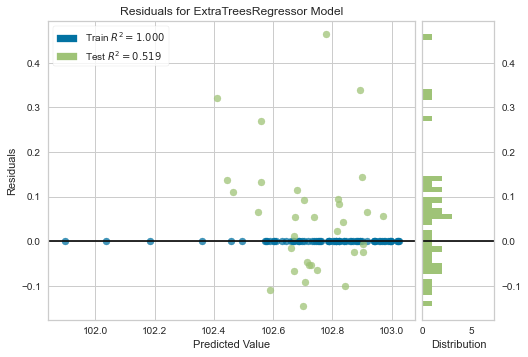

In [51]:
plot_model(et)

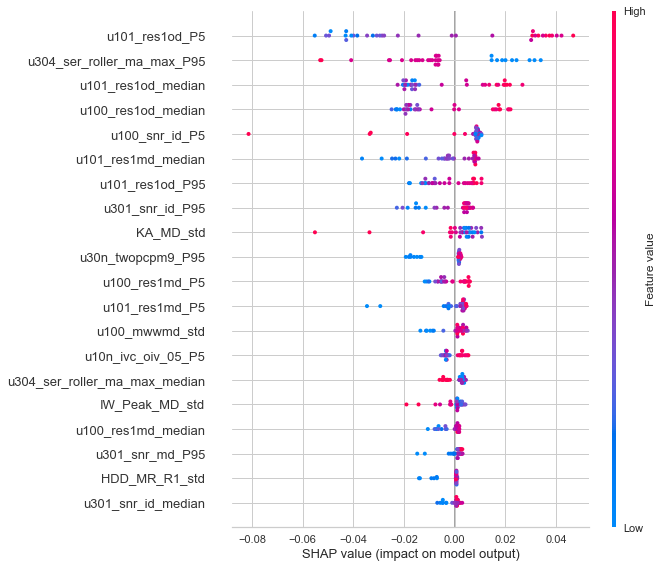

In [52]:
interpret_model(et)

### Feature selection

In [5]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel

sel_ = SelectFromModel(GradientBoostingRegressor())
sel_.fit(X_train, y_train)

selected_feat = X_train.columns[sel_.get_support()]
len(selected_feat)

35

In [6]:
selected_feat

Index(['u101_mrwod_P5', 'u101_mrwod_median', 'u101_mrwod_std',
       'u100_mwwmd_std', 'u101_mwwmd_std', 'u100_snr_md_std', 'u100_snr_id_P5',
       'u300_snr_md_P95', 'u300_snr_id_P95', 'u301_snr_md_P95',
       'u301_snr_md_std', 'u301_snr_id_P95', 'u100_res1od_median',
       'u100_res1md_P5', 'u100_res1md_P95', 'u101_res1od_P5', 'u101_res1md_P5',
       'u101_res1md_P95', 'u101_res1md_median', 'u10n_trfittc9_P95',
       'u100_tfcrd31_P95', 'u10n_zerotfcfh00_median', 'u10n_ivc_kc_01_P5',
       'u10n_ivc_kc_04_P95', 'u30n_twopcpm1_P95', 'u100_pdr_std',
       'u304_ser_roller_ma_max_P95', 'MCW_MD_P5', 'MCW_MD_std',
       'OWP_MD_median', 'OWC_MD_std', 'OWC_ID_median', 'OWC_ID_std',
       'AMPLF_MD_R0_median', 'TDP_OD_P5'],
      dtype='object')

### Modelling

### catboost

In [8]:
import warnings 
warnings.filterwarnings("ignore")

# 一个训练优化模型的函数
def train_optimal_classifier(clf,param):
    grid_search = GridSearchCV(
        clf,
        param_grid=param,
        cv=5,
        verbose=0,
        scoring='r2',
        error_score=0,
        refit=True
        )
    grid_search.fit(X_train[selected_feat], y_train)
    print("Best parameters")
    print(grid_search.best_params_)
    print('best R2: ')
    print(grid_search.best_score_)
    return (grid_search.best_estimator_)

In [9]:
cat_cv = CatBoostRegressor()
param_dic = {'depth': [3, 5, 7],
             'learning_rate': [0.1, 0.5],
             'iterations': [50, 100, 500],
             'l2_leaf_reg': [1, 2, 3]
             }
train_optimal_classifier(cat_cv,param_dic)

0:	learn: 0.2179108	total: 755us	remaining: 37ms
1:	learn: 0.2071716	total: 1.67ms	remaining: 40.2ms
2:	learn: 0.1975508	total: 2.47ms	remaining: 38.7ms
3:	learn: 0.1858197	total: 3.23ms	remaining: 37.1ms
4:	learn: 0.1752563	total: 3.99ms	remaining: 35.9ms
5:	learn: 0.1676203	total: 4.85ms	remaining: 35.5ms
6:	learn: 0.1583695	total: 5.63ms	remaining: 34.6ms
7:	learn: 0.1506453	total: 6.45ms	remaining: 33.9ms
8:	learn: 0.1438810	total: 7.19ms	remaining: 32.7ms
9:	learn: 0.1358363	total: 7.87ms	remaining: 31.5ms
10:	learn: 0.1290737	total: 8.56ms	remaining: 30.3ms
11:	learn: 0.1229939	total: 10.4ms	remaining: 33ms
12:	learn: 0.1178741	total: 11.2ms	remaining: 32ms
13:	learn: 0.1121879	total: 12.1ms	remaining: 31ms
14:	learn: 0.1073732	total: 12.9ms	remaining: 30.1ms
15:	learn: 0.1030160	total: 13.6ms	remaining: 29ms
16:	learn: 0.0988006	total: 14.4ms	remaining: 28ms
17:	learn: 0.0942977	total: 15.2ms	remaining: 27ms
18:	learn: 0.0908921	total: 15.9ms	remaining: 26ms
19:	learn: 0.0877631

4:	learn: 0.1704263	total: 3.82ms	remaining: 34.4ms
5:	learn: 0.1630809	total: 5.05ms	remaining: 37ms
6:	learn: 0.1533562	total: 5.9ms	remaining: 36.2ms
7:	learn: 0.1455991	total: 6.73ms	remaining: 35.3ms
8:	learn: 0.1384587	total: 7.49ms	remaining: 34.1ms
9:	learn: 0.1311667	total: 8.26ms	remaining: 33ms
10:	learn: 0.1234564	total: 9.23ms	remaining: 32.7ms
11:	learn: 0.1171189	total: 9.97ms	remaining: 31.6ms
12:	learn: 0.1127347	total: 10.7ms	remaining: 30.4ms
13:	learn: 0.1063719	total: 11.6ms	remaining: 29.8ms
14:	learn: 0.1008546	total: 12.4ms	remaining: 28.8ms
15:	learn: 0.0961951	total: 13.7ms	remaining: 29.1ms
16:	learn: 0.0928072	total: 14.5ms	remaining: 28.1ms
17:	learn: 0.0888447	total: 15.3ms	remaining: 27.1ms
18:	learn: 0.0851305	total: 16ms	remaining: 26.2ms
19:	learn: 0.0820465	total: 16.8ms	remaining: 25.2ms
20:	learn: 0.0792808	total: 17.6ms	remaining: 24.3ms
21:	learn: 0.0761910	total: 18.4ms	remaining: 23.4ms
22:	learn: 0.0738440	total: 19.2ms	remaining: 22.6ms
23:	le

30:	learn: 0.0038438	total: 23.2ms	remaining: 14.2ms
31:	learn: 0.0035326	total: 24ms	remaining: 13.5ms
32:	learn: 0.0031676	total: 24.7ms	remaining: 12.7ms
33:	learn: 0.0027899	total: 25.3ms	remaining: 11.9ms
34:	learn: 0.0025039	total: 25.9ms	remaining: 11.1ms
35:	learn: 0.0022840	total: 26.6ms	remaining: 10.3ms
36:	learn: 0.0021431	total: 27.3ms	remaining: 9.58ms
37:	learn: 0.0019029	total: 27.9ms	remaining: 8.81ms
38:	learn: 0.0016923	total: 28.5ms	remaining: 8.05ms
39:	learn: 0.0015436	total: 29.2ms	remaining: 7.3ms
40:	learn: 0.0013444	total: 29.9ms	remaining: 6.55ms
41:	learn: 0.0012463	total: 30.5ms	remaining: 5.82ms
42:	learn: 0.0011781	total: 31.5ms	remaining: 5.12ms
43:	learn: 0.0010897	total: 32.1ms	remaining: 4.38ms
44:	learn: 0.0009957	total: 32.8ms	remaining: 3.64ms
45:	learn: 0.0008990	total: 33.4ms	remaining: 2.9ms
46:	learn: 0.0008310	total: 34.1ms	remaining: 2.17ms
47:	learn: 0.0007732	total: 34.7ms	remaining: 1.45ms
48:	learn: 0.0007278	total: 35.4ms	remaining: 722u

26:	learn: 0.0808463	total: 17.9ms	remaining: 15.3ms
27:	learn: 0.0785508	total: 19.2ms	remaining: 15.1ms
28:	learn: 0.0773381	total: 20ms	remaining: 14.5ms
29:	learn: 0.0758885	total: 20.8ms	remaining: 13.9ms
30:	learn: 0.0747652	total: 22.4ms	remaining: 13.7ms
31:	learn: 0.0730211	total: 23.6ms	remaining: 13.2ms
32:	learn: 0.0711868	total: 24.6ms	remaining: 12.7ms
33:	learn: 0.0691945	total: 25.5ms	remaining: 12ms
34:	learn: 0.0677335	total: 26.7ms	remaining: 11.4ms
35:	learn: 0.0666256	total: 27.5ms	remaining: 10.7ms
36:	learn: 0.0654696	total: 28.3ms	remaining: 9.93ms
37:	learn: 0.0636607	total: 29.1ms	remaining: 9.18ms
38:	learn: 0.0620822	total: 30ms	remaining: 8.47ms
39:	learn: 0.0609865	total: 30.8ms	remaining: 7.69ms
40:	learn: 0.0594677	total: 31.4ms	remaining: 6.89ms
41:	learn: 0.0583256	total: 32.5ms	remaining: 6.19ms
42:	learn: 0.0567013	total: 33.3ms	remaining: 5.41ms
43:	learn: 0.0553594	total: 34ms	remaining: 4.64ms
44:	learn: 0.0547277	total: 34.7ms	remaining: 3.85ms
4

6:	learn: 0.0741500	total: 12ms	remaining: 73.8ms
7:	learn: 0.0690932	total: 12.8ms	remaining: 67.3ms
8:	learn: 0.0646718	total: 13.5ms	remaining: 61.7ms
9:	learn: 0.0579162	total: 14.2ms	remaining: 56.7ms
10:	learn: 0.0537866	total: 14.8ms	remaining: 52.3ms
11:	learn: 0.0482219	total: 15.4ms	remaining: 48.7ms
12:	learn: 0.0434043	total: 16ms	remaining: 45.5ms
13:	learn: 0.0409672	total: 16.6ms	remaining: 42.7ms
14:	learn: 0.0348154	total: 17.2ms	remaining: 40.1ms
15:	learn: 0.0313471	total: 17.8ms	remaining: 37.8ms
16:	learn: 0.0282907	total: 19.2ms	remaining: 37.3ms
17:	learn: 0.0267515	total: 21.3ms	remaining: 37.9ms
18:	learn: 0.0244537	total: 22.1ms	remaining: 36.1ms
19:	learn: 0.0233010	total: 22.9ms	remaining: 34.3ms
20:	learn: 0.0207301	total: 23.6ms	remaining: 32.6ms
21:	learn: 0.0186280	total: 24.4ms	remaining: 31ms
22:	learn: 0.0167408	total: 25.1ms	remaining: 29.4ms
23:	learn: 0.0144611	total: 25.9ms	remaining: 28ms
24:	learn: 0.0135227	total: 26.7ms	remaining: 26.7ms
25:	l

1:	learn: 0.1389175	total: 3.56ms	remaining: 85.3ms
2:	learn: 0.1065265	total: 5.88ms	remaining: 92.2ms
3:	learn: 0.0918560	total: 7.35ms	remaining: 84.6ms
4:	learn: 0.0774103	total: 8.45ms	remaining: 76.1ms
5:	learn: 0.0693819	total: 9.65ms	remaining: 70.8ms
6:	learn: 0.0644291	total: 11ms	remaining: 67.4ms
7:	learn: 0.0593873	total: 12ms	remaining: 62.8ms
8:	learn: 0.0520920	total: 12.9ms	remaining: 58.9ms
9:	learn: 0.0473763	total: 13.9ms	remaining: 55.7ms
10:	learn: 0.0423415	total: 15.1ms	remaining: 53.6ms
11:	learn: 0.0386305	total: 16ms	remaining: 50.8ms
12:	learn: 0.0358639	total: 16.9ms	remaining: 48ms
13:	learn: 0.0330918	total: 17.7ms	remaining: 45.5ms
14:	learn: 0.0282593	total: 18.6ms	remaining: 43.5ms
15:	learn: 0.0271135	total: 19.8ms	remaining: 42ms
16:	learn: 0.0244860	total: 20.4ms	remaining: 39.6ms
17:	learn: 0.0231517	total: 21ms	remaining: 37.3ms
18:	learn: 0.0207499	total: 21.6ms	remaining: 35.2ms
19:	learn: 0.0187493	total: 22.9ms	remaining: 34.4ms
20:	learn: 0.0

25:	learn: 0.0750910	total: 21.2ms	remaining: 19.6ms
26:	learn: 0.0730710	total: 22.1ms	remaining: 18.8ms
27:	learn: 0.0705370	total: 22.7ms	remaining: 17.9ms
28:	learn: 0.0688756	total: 23.4ms	remaining: 16.9ms
29:	learn: 0.0674209	total: 24ms	remaining: 16ms
30:	learn: 0.0653584	total: 24.6ms	remaining: 15.1ms
31:	learn: 0.0634204	total: 25.2ms	remaining: 14.2ms
32:	learn: 0.0623531	total: 25.9ms	remaining: 13.3ms
33:	learn: 0.0616962	total: 26.6ms	remaining: 12.5ms
34:	learn: 0.0598363	total: 27.2ms	remaining: 11.7ms
35:	learn: 0.0592513	total: 28ms	remaining: 10.9ms
36:	learn: 0.0575648	total: 28.6ms	remaining: 10ms
37:	learn: 0.0559716	total: 29.2ms	remaining: 9.23ms
38:	learn: 0.0542214	total: 30.2ms	remaining: 8.52ms
39:	learn: 0.0529593	total: 31.1ms	remaining: 7.78ms
40:	learn: 0.0519201	total: 31.8ms	remaining: 6.99ms
41:	learn: 0.0509998	total: 32.5ms	remaining: 6.2ms
42:	learn: 0.0499325	total: 33.4ms	remaining: 5.43ms
43:	learn: 0.0485024	total: 34.2ms	remaining: 4.66ms
44

3:	learn: 0.1096507	total: 3.14ms	remaining: 36.1ms
4:	learn: 0.0979591	total: 4.16ms	remaining: 37.4ms
5:	learn: 0.0824841	total: 5.04ms	remaining: 37ms
6:	learn: 0.0749735	total: 6.03ms	remaining: 37ms
7:	learn: 0.0644662	total: 6.78ms	remaining: 35.6ms
8:	learn: 0.0584390	total: 7.5ms	remaining: 34.2ms
9:	learn: 0.0533501	total: 8.29ms	remaining: 33.2ms
10:	learn: 0.0518046	total: 9.06ms	remaining: 32.1ms
11:	learn: 0.0452193	total: 9.93ms	remaining: 31.4ms
12:	learn: 0.0414899	total: 10.7ms	remaining: 30.5ms
13:	learn: 0.0370585	total: 11.5ms	remaining: 29.6ms
14:	learn: 0.0337606	total: 12.3ms	remaining: 28.7ms
15:	learn: 0.0307283	total: 13ms	remaining: 27.7ms
16:	learn: 0.0295331	total: 13.8ms	remaining: 26.8ms
17:	learn: 0.0268269	total: 14.5ms	remaining: 25.8ms
18:	learn: 0.0245649	total: 15.6ms	remaining: 25.5ms
19:	learn: 0.0240009	total: 16.2ms	remaining: 24.3ms
20:	learn: 0.0226192	total: 16.9ms	remaining: 23.3ms
21:	learn: 0.0204896	total: 17.5ms	remaining: 22.2ms
22:	lea

0:	learn: 0.2179108	total: 1.04ms	remaining: 103ms
1:	learn: 0.2071716	total: 2.03ms	remaining: 99.4ms
2:	learn: 0.1975508	total: 2.74ms	remaining: 88.6ms
3:	learn: 0.1858197	total: 3.6ms	remaining: 86.5ms
4:	learn: 0.1752563	total: 5.05ms	remaining: 95.9ms
5:	learn: 0.1676203	total: 5.73ms	remaining: 89.8ms
6:	learn: 0.1583695	total: 6.34ms	remaining: 84.2ms
7:	learn: 0.1506453	total: 6.95ms	remaining: 79.9ms
8:	learn: 0.1438810	total: 7.79ms	remaining: 78.8ms
9:	learn: 0.1358363	total: 8.4ms	remaining: 75.6ms
10:	learn: 0.1290737	total: 9.01ms	remaining: 72.9ms
11:	learn: 0.1229939	total: 9.61ms	remaining: 70.5ms
12:	learn: 0.1178741	total: 10.3ms	remaining: 68.7ms
13:	learn: 0.1121879	total: 11.4ms	remaining: 70.2ms
14:	learn: 0.1073732	total: 12.1ms	remaining: 68.6ms
15:	learn: 0.1030160	total: 12.7ms	remaining: 66.8ms
16:	learn: 0.0988006	total: 13.3ms	remaining: 65.1ms
17:	learn: 0.0942977	total: 13.9ms	remaining: 63.5ms
18:	learn: 0.0908921	total: 14.6ms	remaining: 62.1ms
19:	le

65:	learn: 0.0201847	total: 46.4ms	remaining: 23.9ms
66:	learn: 0.0198891	total: 47.3ms	remaining: 23.3ms
67:	learn: 0.0194763	total: 48.4ms	remaining: 22.8ms
68:	learn: 0.0188080	total: 49.2ms	remaining: 22.1ms
69:	learn: 0.0183881	total: 50ms	remaining: 21.4ms
70:	learn: 0.0180784	total: 50.8ms	remaining: 20.8ms
71:	learn: 0.0175653	total: 51.6ms	remaining: 20.1ms
72:	learn: 0.0169528	total: 52.4ms	remaining: 19.4ms
73:	learn: 0.0164490	total: 53.2ms	remaining: 18.7ms
74:	learn: 0.0159209	total: 54ms	remaining: 18ms
75:	learn: 0.0155894	total: 54.7ms	remaining: 17.3ms
76:	learn: 0.0151725	total: 55.4ms	remaining: 16.6ms
77:	learn: 0.0148633	total: 56.3ms	remaining: 15.9ms
78:	learn: 0.0145893	total: 57.1ms	remaining: 15.2ms
79:	learn: 0.0144451	total: 58ms	remaining: 14.5ms
80:	learn: 0.0141228	total: 58.7ms	remaining: 13.8ms
81:	learn: 0.0138763	total: 59.7ms	remaining: 13.1ms
82:	learn: 0.0135992	total: 60.6ms	remaining: 12.4ms
83:	learn: 0.0132425	total: 61.3ms	remaining: 11.7ms
8

16:	learn: 0.0177622	total: 11.5ms	remaining: 56.1ms
17:	learn: 0.0159600	total: 12.8ms	remaining: 58.2ms
18:	learn: 0.0142096	total: 13.5ms	remaining: 57.6ms
19:	learn: 0.0130950	total: 14.3ms	remaining: 57.4ms
20:	learn: 0.0120463	total: 15.2ms	remaining: 57.1ms
21:	learn: 0.0112474	total: 16.1ms	remaining: 57ms
22:	learn: 0.0100756	total: 16.8ms	remaining: 56.3ms
23:	learn: 0.0089134	total: 17.6ms	remaining: 55.7ms
24:	learn: 0.0078413	total: 18.4ms	remaining: 55.1ms
25:	learn: 0.0070170	total: 19.1ms	remaining: 54.3ms
26:	learn: 0.0062097	total: 19.8ms	remaining: 53.6ms
27:	learn: 0.0056275	total: 20.6ms	remaining: 52.9ms
28:	learn: 0.0051791	total: 21.6ms	remaining: 52.9ms
29:	learn: 0.0048830	total: 22.3ms	remaining: 52.1ms
30:	learn: 0.0046846	total: 23.2ms	remaining: 51.5ms
31:	learn: 0.0041688	total: 23.9ms	remaining: 50.8ms
32:	learn: 0.0037875	total: 24.9ms	remaining: 50.6ms
33:	learn: 0.0034655	total: 26.3ms	remaining: 51.1ms
34:	learn: 0.0031829	total: 27ms	remaining: 50.2

42:	learn: 0.0011781	total: 28.2ms	remaining: 37.4ms
43:	learn: 0.0010897	total: 29.4ms	remaining: 37.4ms
44:	learn: 0.0009957	total: 30.2ms	remaining: 36.9ms
45:	learn: 0.0008990	total: 31ms	remaining: 36.4ms
46:	learn: 0.0008310	total: 31.7ms	remaining: 35.8ms
47:	learn: 0.0007732	total: 32.5ms	remaining: 35.2ms
48:	learn: 0.0007278	total: 33.2ms	remaining: 34.6ms
49:	learn: 0.0006548	total: 34ms	remaining: 34ms
50:	learn: 0.0006094	total: 34.7ms	remaining: 33.4ms
51:	learn: 0.0005411	total: 35.5ms	remaining: 32.8ms
52:	learn: 0.0004999	total: 36.3ms	remaining: 32.2ms
53:	learn: 0.0004529	total: 37.6ms	remaining: 32ms
54:	learn: 0.0004316	total: 38.4ms	remaining: 31.4ms
55:	learn: 0.0003740	total: 39.4ms	remaining: 30.9ms
56:	learn: 0.0003620	total: 40.3ms	remaining: 30.4ms
57:	learn: 0.0003407	total: 41ms	remaining: 29.7ms
58:	learn: 0.0003221	total: 41.8ms	remaining: 29ms
59:	learn: 0.0002949	total: 42.9ms	remaining: 28.6ms
60:	learn: 0.0002824	total: 44ms	remaining: 28.1ms
61:	lea

57:	learn: 0.0005120	total: 48.4ms	remaining: 35.1ms
58:	learn: 0.0004767	total: 49.8ms	remaining: 34.6ms
59:	learn: 0.0004335	total: 50.9ms	remaining: 33.9ms
60:	learn: 0.0003945	total: 52.1ms	remaining: 33.3ms
61:	learn: 0.0003700	total: 53ms	remaining: 32.5ms
62:	learn: 0.0003387	total: 53.9ms	remaining: 31.6ms
63:	learn: 0.0003172	total: 54.9ms	remaining: 30.9ms
64:	learn: 0.0002908	total: 56.1ms	remaining: 30.2ms
65:	learn: 0.0002695	total: 57.1ms	remaining: 29.4ms
66:	learn: 0.0002541	total: 58.4ms	remaining: 28.8ms
67:	learn: 0.0002214	total: 59.3ms	remaining: 27.9ms
68:	learn: 0.0002008	total: 60.3ms	remaining: 27.1ms
69:	learn: 0.0001904	total: 61.3ms	remaining: 26.3ms
70:	learn: 0.0001833	total: 62.7ms	remaining: 25.6ms
71:	learn: 0.0001714	total: 63.5ms	remaining: 24.7ms
72:	learn: 0.0001532	total: 64.3ms	remaining: 23.8ms
73:	learn: 0.0001450	total: 65.2ms	remaining: 22.9ms
74:	learn: 0.0001328	total: 65.9ms	remaining: 22ms
75:	learn: 0.0001258	total: 66.6ms	remaining: 21ms

0:	learn: 0.1869804	total: 882us	remaining: 87.3ms
1:	learn: 0.1803181	total: 1.71ms	remaining: 83.6ms
2:	learn: 0.1720408	total: 2.46ms	remaining: 79.7ms
3:	learn: 0.1638493	total: 3.16ms	remaining: 75.9ms
4:	learn: 0.1561480	total: 3.9ms	remaining: 74.2ms
5:	learn: 0.1501048	total: 4.65ms	remaining: 72.9ms
6:	learn: 0.1418601	total: 5.46ms	remaining: 72.5ms
7:	learn: 0.1359922	total: 6.45ms	remaining: 74.1ms
8:	learn: 0.1305607	total: 7.29ms	remaining: 73.8ms
9:	learn: 0.1254072	total: 8.13ms	remaining: 73.2ms
10:	learn: 0.1198851	total: 8.86ms	remaining: 71.7ms
11:	learn: 0.1143066	total: 9.5ms	remaining: 69.6ms
12:	learn: 0.1096342	total: 10.2ms	remaining: 68.3ms
13:	learn: 0.1052337	total: 10.9ms	remaining: 67ms
14:	learn: 0.1020893	total: 11.6ms	remaining: 65.7ms
15:	learn: 0.0979754	total: 12.3ms	remaining: 64.7ms
16:	learn: 0.0951611	total: 13ms	remaining: 63.6ms
17:	learn: 0.0906577	total: 13.6ms	remaining: 62.1ms
18:	learn: 0.0877693	total: 14.3ms	remaining: 60.8ms
19:	learn:

93:	learn: 0.0186785	total: 61.6ms	remaining: 3.93ms
94:	learn: 0.0184307	total: 62.4ms	remaining: 3.29ms
95:	learn: 0.0180909	total: 63.4ms	remaining: 2.64ms
96:	learn: 0.0178385	total: 64.2ms	remaining: 1.99ms
97:	learn: 0.0173543	total: 65.1ms	remaining: 1.33ms
98:	learn: 0.0171775	total: 66.1ms	remaining: 667us
99:	learn: 0.0167554	total: 66.8ms	remaining: 0us
0:	learn: 0.1948286	total: 708us	remaining: 70.1ms
1:	learn: 0.1546933	total: 1.52ms	remaining: 74.5ms
2:	learn: 0.1269761	total: 2.15ms	remaining: 69.5ms
3:	learn: 0.1010671	total: 2.75ms	remaining: 66.1ms
4:	learn: 0.0874740	total: 3.36ms	remaining: 63.9ms
5:	learn: 0.0788572	total: 4.06ms	remaining: 63.6ms
6:	learn: 0.0741500	total: 4.66ms	remaining: 61.9ms
7:	learn: 0.0690932	total: 5.25ms	remaining: 60.4ms
8:	learn: 0.0646718	total: 5.87ms	remaining: 59.3ms
9:	learn: 0.0579162	total: 6.47ms	remaining: 58.2ms
10:	learn: 0.0537866	total: 7.12ms	remaining: 57.6ms
11:	learn: 0.0482219	total: 7.74ms	remaining: 56.8ms
12:	lear

15:	learn: 0.0218632	total: 10.3ms	remaining: 54.3ms
16:	learn: 0.0204141	total: 11.2ms	remaining: 54.8ms
17:	learn: 0.0179734	total: 12.4ms	remaining: 56.5ms
18:	learn: 0.0163345	total: 13.2ms	remaining: 56.2ms
19:	learn: 0.0144779	total: 13.9ms	remaining: 55.8ms
20:	learn: 0.0123481	total: 14.7ms	remaining: 55.2ms
21:	learn: 0.0115634	total: 15.4ms	remaining: 54.7ms
22:	learn: 0.0107433	total: 16.2ms	remaining: 54.1ms
23:	learn: 0.0098748	total: 16.9ms	remaining: 53.5ms
24:	learn: 0.0088601	total: 17.8ms	remaining: 53.5ms
25:	learn: 0.0084593	total: 18.6ms	remaining: 52.9ms
26:	learn: 0.0077237	total: 19.9ms	remaining: 53.8ms
27:	learn: 0.0072987	total: 20.9ms	remaining: 53.7ms
28:	learn: 0.0066353	total: 21.8ms	remaining: 53.3ms
29:	learn: 0.0060317	total: 22.5ms	remaining: 52.6ms
30:	learn: 0.0053410	total: 23.4ms	remaining: 52ms
31:	learn: 0.0048972	total: 24.1ms	remaining: 51.3ms
32:	learn: 0.0044856	total: 25.4ms	remaining: 51.5ms
33:	learn: 0.0043250	total: 26ms	remaining: 50.5

1:	learn: 0.1389175	total: 1.72ms	remaining: 84.4ms
2:	learn: 0.1065265	total: 3.15ms	remaining: 102ms
3:	learn: 0.0918560	total: 3.94ms	remaining: 94.5ms
4:	learn: 0.0774103	total: 4.72ms	remaining: 89.7ms
5:	learn: 0.0693819	total: 5.49ms	remaining: 86.1ms
6:	learn: 0.0644291	total: 6.26ms	remaining: 83.2ms
7:	learn: 0.0593873	total: 6.99ms	remaining: 80.4ms
8:	learn: 0.0520920	total: 7.75ms	remaining: 78.3ms
9:	learn: 0.0473763	total: 8.48ms	remaining: 76.3ms
10:	learn: 0.0423415	total: 9.24ms	remaining: 74.7ms
11:	learn: 0.0386305	total: 10ms	remaining: 73.7ms
12:	learn: 0.0358639	total: 10.9ms	remaining: 73.2ms
13:	learn: 0.0330918	total: 11.7ms	remaining: 71.6ms
14:	learn: 0.0282593	total: 12.7ms	remaining: 71.9ms
15:	learn: 0.0271135	total: 13.5ms	remaining: 70.7ms
16:	learn: 0.0244860	total: 14.2ms	remaining: 69.2ms
17:	learn: 0.0231517	total: 15.2ms	remaining: 69.5ms
18:	learn: 0.0207499	total: 15.9ms	remaining: 68ms
19:	learn: 0.0187493	total: 16.7ms	remaining: 66.9ms
20:	lea

0:	learn: 0.1877186	total: 954us	remaining: 94.5ms
1:	learn: 0.1832648	total: 2.22ms	remaining: 109ms
2:	learn: 0.1767835	total: 2.96ms	remaining: 95.7ms
3:	learn: 0.1712375	total: 3.68ms	remaining: 88.3ms
4:	learn: 0.1669766	total: 4.39ms	remaining: 83.4ms
5:	learn: 0.1619407	total: 5.26ms	remaining: 82.3ms
6:	learn: 0.1567311	total: 6.11ms	remaining: 81.1ms
7:	learn: 0.1511647	total: 6.78ms	remaining: 78ms
8:	learn: 0.1444072	total: 7.53ms	remaining: 76.1ms
9:	learn: 0.1387836	total: 8.34ms	remaining: 75ms
10:	learn: 0.1348966	total: 9.33ms	remaining: 75.5ms
11:	learn: 0.1308686	total: 10ms	remaining: 73.5ms
12:	learn: 0.1254708	total: 11.1ms	remaining: 74.2ms
13:	learn: 0.1213960	total: 12.2ms	remaining: 74.8ms
14:	learn: 0.1193316	total: 13.4ms	remaining: 76ms
15:	learn: 0.1155077	total: 14.1ms	remaining: 73.9ms
16:	learn: 0.1137905	total: 14.7ms	remaining: 71.7ms
17:	learn: 0.1102633	total: 15.3ms	remaining: 69.5ms
18:	learn: 0.1086482	total: 15.9ms	remaining: 67.6ms
19:	learn: 0.

11:	learn: 0.1368304	total: 9.11ms	remaining: 66.8ms
12:	learn: 0.1339944	total: 10.4ms	remaining: 69.4ms
13:	learn: 0.1298125	total: 11.2ms	remaining: 68.5ms
14:	learn: 0.1251972	total: 11.9ms	remaining: 67.4ms
15:	learn: 0.1212803	total: 12.6ms	remaining: 66.3ms
16:	learn: 0.1192421	total: 14.6ms	remaining: 71.3ms
17:	learn: 0.1150705	total: 15.6ms	remaining: 71.1ms
18:	learn: 0.1132369	total: 16.4ms	remaining: 69.9ms
19:	learn: 0.1105428	total: 17.2ms	remaining: 68.7ms
20:	learn: 0.1067484	total: 17.9ms	remaining: 67.5ms
21:	learn: 0.1034744	total: 19.2ms	remaining: 68.2ms
22:	learn: 0.0998898	total: 20ms	remaining: 66.8ms
23:	learn: 0.0981862	total: 20.8ms	remaining: 65.7ms
24:	learn: 0.0952734	total: 22.4ms	remaining: 67.3ms
25:	learn: 0.0929625	total: 23.5ms	remaining: 66.9ms
26:	learn: 0.0905538	total: 24.2ms	remaining: 65.4ms
27:	learn: 0.0889317	total: 25.3ms	remaining: 64.9ms
28:	learn: 0.0873684	total: 26.5ms	remaining: 64.8ms
29:	learn: 0.0857872	total: 27.5ms	remaining: 64

34:	learn: 0.0072094	total: 24.5ms	remaining: 45.5ms
35:	learn: 0.0065587	total: 25.7ms	remaining: 45.6ms
36:	learn: 0.0062348	total: 26.3ms	remaining: 44.8ms
37:	learn: 0.0060070	total: 26.9ms	remaining: 43.9ms
38:	learn: 0.0056045	total: 27.7ms	remaining: 43.3ms
39:	learn: 0.0055156	total: 28.4ms	remaining: 42.6ms
40:	learn: 0.0050827	total: 29ms	remaining: 41.7ms
41:	learn: 0.0043134	total: 29.6ms	remaining: 40.9ms
42:	learn: 0.0038320	total: 30.2ms	remaining: 40ms
43:	learn: 0.0035381	total: 30.8ms	remaining: 39.2ms
44:	learn: 0.0031602	total: 31.5ms	remaining: 38.4ms
45:	learn: 0.0030007	total: 32.1ms	remaining: 37.6ms
46:	learn: 0.0029368	total: 32.7ms	remaining: 36.9ms
47:	learn: 0.0027213	total: 33.5ms	remaining: 36.3ms
48:	learn: 0.0026729	total: 34.4ms	remaining: 35.8ms
49:	learn: 0.0024129	total: 35.1ms	remaining: 35.1ms
50:	learn: 0.0022037	total: 35.9ms	remaining: 34.5ms
51:	learn: 0.0020809	total: 36.6ms	remaining: 33.8ms
52:	learn: 0.0019358	total: 37.3ms	remaining: 33.1

61:	learn: 0.0013893	total: 42.6ms	remaining: 26.1ms
62:	learn: 0.0013042	total: 43.8ms	remaining: 25.7ms
63:	learn: 0.0012472	total: 44.6ms	remaining: 25.1ms
64:	learn: 0.0012285	total: 45.4ms	remaining: 24.4ms
65:	learn: 0.0011430	total: 46.3ms	remaining: 23.9ms
66:	learn: 0.0010602	total: 47.9ms	remaining: 23.6ms
67:	learn: 0.0009689	total: 48.8ms	remaining: 22.9ms
68:	learn: 0.0009473	total: 49.5ms	remaining: 22.2ms
69:	learn: 0.0008593	total: 50.2ms	remaining: 21.5ms
70:	learn: 0.0008081	total: 51ms	remaining: 20.8ms
71:	learn: 0.0007502	total: 51.9ms	remaining: 20.2ms
72:	learn: 0.0006922	total: 53ms	remaining: 19.6ms
73:	learn: 0.0006576	total: 53.7ms	remaining: 18.9ms
74:	learn: 0.0006145	total: 54.9ms	remaining: 18.3ms
75:	learn: 0.0006036	total: 55.7ms	remaining: 17.6ms
76:	learn: 0.0005731	total: 56.6ms	remaining: 16.9ms
77:	learn: 0.0005535	total: 57.4ms	remaining: 16.2ms
78:	learn: 0.0005454	total: 58.3ms	remaining: 15.5ms
79:	learn: 0.0004985	total: 59ms	remaining: 14.7ms

44:	learn: 0.0042474	total: 40.2ms	remaining: 49.1ms
45:	learn: 0.0040994	total: 41.4ms	remaining: 48.7ms
46:	learn: 0.0038418	total: 42.2ms	remaining: 47.6ms
47:	learn: 0.0035268	total: 43ms	remaining: 46.6ms
48:	learn: 0.0032289	total: 43.7ms	remaining: 45.5ms
49:	learn: 0.0030070	total: 44.6ms	remaining: 44.6ms
50:	learn: 0.0028063	total: 45.4ms	remaining: 43.6ms
51:	learn: 0.0026752	total: 46.2ms	remaining: 42.6ms
52:	learn: 0.0024495	total: 47ms	remaining: 41.7ms
53:	learn: 0.0023663	total: 47.8ms	remaining: 40.7ms
54:	learn: 0.0021731	total: 48.6ms	remaining: 39.7ms
55:	learn: 0.0020900	total: 49.5ms	remaining: 38.9ms
56:	learn: 0.0019957	total: 50.4ms	remaining: 38ms
57:	learn: 0.0019220	total: 51.1ms	remaining: 37ms
58:	learn: 0.0017558	total: 52.1ms	remaining: 36.2ms
59:	learn: 0.0015755	total: 52.7ms	remaining: 35.2ms
60:	learn: 0.0014117	total: 53.4ms	remaining: 34.1ms
61:	learn: 0.0013309	total: 54ms	remaining: 33.1ms
62:	learn: 0.0012020	total: 54.6ms	remaining: 32.1ms
63:

243:	learn: 0.0009412	total: 172ms	remaining: 180ms
244:	learn: 0.0009262	total: 173ms	remaining: 180ms
245:	learn: 0.0009080	total: 174ms	remaining: 179ms
246:	learn: 0.0008950	total: 174ms	remaining: 179ms
247:	learn: 0.0008832	total: 175ms	remaining: 178ms
248:	learn: 0.0008717	total: 176ms	remaining: 177ms
249:	learn: 0.0008616	total: 177ms	remaining: 177ms
250:	learn: 0.0008459	total: 177ms	remaining: 176ms
251:	learn: 0.0008331	total: 178ms	remaining: 175ms
252:	learn: 0.0008171	total: 179ms	remaining: 175ms
253:	learn: 0.0008059	total: 180ms	remaining: 174ms
254:	learn: 0.0007964	total: 180ms	remaining: 173ms
255:	learn: 0.0007809	total: 182ms	remaining: 173ms
256:	learn: 0.0007663	total: 182ms	remaining: 172ms
257:	learn: 0.0007577	total: 183ms	remaining: 172ms
258:	learn: 0.0007420	total: 184ms	remaining: 171ms
259:	learn: 0.0007189	total: 185ms	remaining: 171ms
260:	learn: 0.0007030	total: 186ms	remaining: 170ms
261:	learn: 0.0006901	total: 187ms	remaining: 170ms
262:	learn: 

420:	learn: 0.0000440	total: 293ms	remaining: 54.9ms
421:	learn: 0.0000432	total: 293ms	remaining: 54.2ms
422:	learn: 0.0000424	total: 294ms	remaining: 53.6ms
423:	learn: 0.0000418	total: 295ms	remaining: 52.9ms
424:	learn: 0.0000410	total: 296ms	remaining: 52.2ms
425:	learn: 0.0000405	total: 297ms	remaining: 51.6ms
426:	learn: 0.0000400	total: 298ms	remaining: 50.9ms
427:	learn: 0.0000389	total: 298ms	remaining: 50.2ms
428:	learn: 0.0000383	total: 299ms	remaining: 49.5ms
429:	learn: 0.0000377	total: 300ms	remaining: 48.8ms
430:	learn: 0.0000371	total: 301ms	remaining: 48.1ms
431:	learn: 0.0000365	total: 301ms	remaining: 47.4ms
432:	learn: 0.0000357	total: 302ms	remaining: 46.7ms
433:	learn: 0.0000351	total: 303ms	remaining: 46.1ms
434:	learn: 0.0000342	total: 304ms	remaining: 45.4ms
435:	learn: 0.0000337	total: 304ms	remaining: 44.7ms
436:	learn: 0.0000332	total: 306ms	remaining: 44.1ms
437:	learn: 0.0000325	total: 306ms	remaining: 43.4ms
438:	learn: 0.0000318	total: 307ms	remaining: 

211:	learn: 0.0018966	total: 146ms	remaining: 199ms
212:	learn: 0.0018631	total: 147ms	remaining: 198ms
213:	learn: 0.0018413	total: 148ms	remaining: 198ms
214:	learn: 0.0017997	total: 149ms	remaining: 197ms
215:	learn: 0.0017516	total: 150ms	remaining: 197ms
216:	learn: 0.0017282	total: 151ms	remaining: 196ms
217:	learn: 0.0017007	total: 152ms	remaining: 196ms
218:	learn: 0.0016594	total: 153ms	remaining: 196ms
219:	learn: 0.0016423	total: 154ms	remaining: 196ms
220:	learn: 0.0016077	total: 155ms	remaining: 196ms
221:	learn: 0.0015711	total: 156ms	remaining: 195ms
222:	learn: 0.0015348	total: 157ms	remaining: 195ms
223:	learn: 0.0015006	total: 158ms	remaining: 194ms
224:	learn: 0.0014694	total: 159ms	remaining: 194ms
225:	learn: 0.0014391	total: 160ms	remaining: 194ms
226:	learn: 0.0014147	total: 161ms	remaining: 193ms
227:	learn: 0.0013895	total: 162ms	remaining: 193ms
228:	learn: 0.0013605	total: 163ms	remaining: 193ms
229:	learn: 0.0013340	total: 164ms	remaining: 193ms
230:	learn: 

370:	learn: 0.0001330	total: 267ms	remaining: 92.9ms
371:	learn: 0.0001316	total: 268ms	remaining: 92.3ms
372:	learn: 0.0001303	total: 269ms	remaining: 91.6ms
373:	learn: 0.0001286	total: 270ms	remaining: 90.9ms
374:	learn: 0.0001272	total: 271ms	remaining: 90.2ms
375:	learn: 0.0001259	total: 271ms	remaining: 89.5ms
376:	learn: 0.0001243	total: 272ms	remaining: 88.8ms
377:	learn: 0.0001223	total: 273ms	remaining: 88.1ms
378:	learn: 0.0001209	total: 274ms	remaining: 87.4ms
379:	learn: 0.0001195	total: 274ms	remaining: 86.7ms
380:	learn: 0.0001161	total: 275ms	remaining: 86ms
381:	learn: 0.0001143	total: 276ms	remaining: 85.3ms
382:	learn: 0.0001132	total: 277ms	remaining: 84.7ms
383:	learn: 0.0001113	total: 278ms	remaining: 84ms
384:	learn: 0.0001099	total: 279ms	remaining: 83.5ms
385:	learn: 0.0001082	total: 280ms	remaining: 82.8ms
386:	learn: 0.0001061	total: 282ms	remaining: 82.2ms
387:	learn: 0.0001042	total: 282ms	remaining: 81.5ms
388:	learn: 0.0001031	total: 283ms	remaining: 80.7

176:	learn: 0.0026222	total: 115ms	remaining: 210ms
177:	learn: 0.0025700	total: 116ms	remaining: 210ms
178:	learn: 0.0025372	total: 117ms	remaining: 210ms
179:	learn: 0.0025106	total: 118ms	remaining: 210ms
180:	learn: 0.0024738	total: 119ms	remaining: 210ms
181:	learn: 0.0024460	total: 120ms	remaining: 209ms
182:	learn: 0.0024007	total: 120ms	remaining: 209ms
183:	learn: 0.0023630	total: 121ms	remaining: 208ms
184:	learn: 0.0023215	total: 122ms	remaining: 208ms
185:	learn: 0.0022975	total: 123ms	remaining: 207ms
186:	learn: 0.0022530	total: 124ms	remaining: 207ms
187:	learn: 0.0022328	total: 124ms	remaining: 206ms
188:	learn: 0.0022095	total: 125ms	remaining: 206ms
189:	learn: 0.0021694	total: 126ms	remaining: 206ms
190:	learn: 0.0021361	total: 127ms	remaining: 205ms
191:	learn: 0.0020931	total: 128ms	remaining: 205ms
192:	learn: 0.0020561	total: 129ms	remaining: 205ms
193:	learn: 0.0020203	total: 130ms	remaining: 204ms
194:	learn: 0.0019850	total: 130ms	remaining: 204ms
195:	learn: 

347:	learn: 0.0001959	total: 237ms	remaining: 103ms
348:	learn: 0.0001943	total: 237ms	remaining: 103ms
349:	learn: 0.0001902	total: 238ms	remaining: 102ms
350:	learn: 0.0001871	total: 239ms	remaining: 102ms
351:	learn: 0.0001855	total: 240ms	remaining: 101ms
352:	learn: 0.0001842	total: 241ms	remaining: 100ms
353:	learn: 0.0001813	total: 241ms	remaining: 99.6ms
354:	learn: 0.0001788	total: 242ms	remaining: 98.9ms
355:	learn: 0.0001759	total: 243ms	remaining: 98.4ms
356:	learn: 0.0001730	total: 244ms	remaining: 97.8ms
357:	learn: 0.0001698	total: 245ms	remaining: 97.2ms
358:	learn: 0.0001685	total: 246ms	remaining: 96.5ms
359:	learn: 0.0001658	total: 246ms	remaining: 95.9ms
360:	learn: 0.0001629	total: 247ms	remaining: 95.2ms
361:	learn: 0.0001596	total: 248ms	remaining: 94.6ms
362:	learn: 0.0001576	total: 250ms	remaining: 94.2ms
363:	learn: 0.0001551	total: 250ms	remaining: 93.5ms
364:	learn: 0.0001543	total: 251ms	remaining: 92.8ms
365:	learn: 0.0001521	total: 251ms	remaining: 92.1ms

114:	learn: 0.0097625	total: 81.3ms	remaining: 272ms
115:	learn: 0.0095037	total: 82.4ms	remaining: 273ms
116:	learn: 0.0093120	total: 83.1ms	remaining: 272ms
117:	learn: 0.0091297	total: 84ms	remaining: 272ms
118:	learn: 0.0088766	total: 84.8ms	remaining: 272ms
119:	learn: 0.0086568	total: 85.7ms	remaining: 271ms
120:	learn: 0.0084920	total: 86.3ms	remaining: 270ms
121:	learn: 0.0083601	total: 87.1ms	remaining: 270ms
122:	learn: 0.0081391	total: 87.8ms	remaining: 269ms
123:	learn: 0.0080148	total: 88.7ms	remaining: 269ms
124:	learn: 0.0078908	total: 89.5ms	remaining: 268ms
125:	learn: 0.0076735	total: 90.3ms	remaining: 268ms
126:	learn: 0.0074812	total: 91.1ms	remaining: 268ms
127:	learn: 0.0073444	total: 92ms	remaining: 267ms
128:	learn: 0.0071829	total: 92.9ms	remaining: 267ms
129:	learn: 0.0070325	total: 93.8ms	remaining: 267ms
130:	learn: 0.0069385	total: 94.8ms	remaining: 267ms
131:	learn: 0.0067760	total: 95.6ms	remaining: 266ms
132:	learn: 0.0066495	total: 96.5ms	remaining: 266

297:	learn: 0.0004691	total: 203ms	remaining: 137ms
298:	learn: 0.0004650	total: 203ms	remaining: 137ms
299:	learn: 0.0004564	total: 205ms	remaining: 136ms
300:	learn: 0.0004491	total: 206ms	remaining: 136ms
301:	learn: 0.0004408	total: 206ms	remaining: 135ms
302:	learn: 0.0004356	total: 207ms	remaining: 135ms
303:	learn: 0.0004287	total: 208ms	remaining: 134ms
304:	learn: 0.0004212	total: 208ms	remaining: 133ms
305:	learn: 0.0004124	total: 209ms	remaining: 133ms
306:	learn: 0.0004063	total: 210ms	remaining: 132ms
307:	learn: 0.0003996	total: 211ms	remaining: 131ms
308:	learn: 0.0003902	total: 211ms	remaining: 131ms
309:	learn: 0.0003836	total: 212ms	remaining: 130ms
310:	learn: 0.0003795	total: 213ms	remaining: 129ms
311:	learn: 0.0003731	total: 214ms	remaining: 129ms
312:	learn: 0.0003699	total: 215ms	remaining: 128ms
313:	learn: 0.0003632	total: 215ms	remaining: 128ms
314:	learn: 0.0003564	total: 216ms	remaining: 127ms
315:	learn: 0.0003536	total: 217ms	remaining: 126ms
316:	learn: 

475:	learn: 0.0000327	total: 322ms	remaining: 16.2ms
476:	learn: 0.0000324	total: 323ms	remaining: 15.6ms
477:	learn: 0.0000319	total: 324ms	remaining: 14.9ms
478:	learn: 0.0000315	total: 324ms	remaining: 14.2ms
479:	learn: 0.0000311	total: 325ms	remaining: 13.5ms
480:	learn: 0.0000304	total: 326ms	remaining: 12.9ms
481:	learn: 0.0000301	total: 327ms	remaining: 12.2ms
482:	learn: 0.0000296	total: 327ms	remaining: 11.5ms
483:	learn: 0.0000291	total: 328ms	remaining: 10.9ms
484:	learn: 0.0000287	total: 329ms	remaining: 10.2ms
485:	learn: 0.0000283	total: 330ms	remaining: 9.51ms
486:	learn: 0.0000278	total: 331ms	remaining: 8.83ms
487:	learn: 0.0000273	total: 332ms	remaining: 8.16ms
488:	learn: 0.0000271	total: 333ms	remaining: 7.48ms
489:	learn: 0.0000268	total: 333ms	remaining: 6.8ms
490:	learn: 0.0000264	total: 335ms	remaining: 6.14ms
491:	learn: 0.0000258	total: 336ms	remaining: 5.46ms
492:	learn: 0.0000254	total: 336ms	remaining: 4.77ms
493:	learn: 0.0000250	total: 337ms	remaining: 4

289:	learn: 0.0006685	total: 196ms	remaining: 142ms
290:	learn: 0.0006580	total: 197ms	remaining: 141ms
291:	learn: 0.0006435	total: 198ms	remaining: 141ms
292:	learn: 0.0006339	total: 198ms	remaining: 140ms
293:	learn: 0.0006299	total: 199ms	remaining: 140ms
294:	learn: 0.0006158	total: 200ms	remaining: 139ms
295:	learn: 0.0006100	total: 201ms	remaining: 139ms
296:	learn: 0.0005982	total: 202ms	remaining: 138ms
297:	learn: 0.0005913	total: 203ms	remaining: 137ms
298:	learn: 0.0005845	total: 203ms	remaining: 137ms
299:	learn: 0.0005810	total: 204ms	remaining: 136ms
300:	learn: 0.0005762	total: 205ms	remaining: 135ms
301:	learn: 0.0005694	total: 206ms	remaining: 135ms
302:	learn: 0.0005648	total: 206ms	remaining: 134ms
303:	learn: 0.0005525	total: 207ms	remaining: 134ms
304:	learn: 0.0005484	total: 208ms	remaining: 133ms
305:	learn: 0.0005374	total: 209ms	remaining: 132ms
306:	learn: 0.0005296	total: 209ms	remaining: 132ms
307:	learn: 0.0005247	total: 210ms	remaining: 131ms
308:	learn: 

466:	learn: 0.0000500	total: 315ms	remaining: 22.2ms
467:	learn: 0.0000494	total: 315ms	remaining: 21.6ms
468:	learn: 0.0000489	total: 316ms	remaining: 20.9ms
469:	learn: 0.0000482	total: 317ms	remaining: 20.2ms
470:	learn: 0.0000470	total: 318ms	remaining: 19.6ms
471:	learn: 0.0000461	total: 319ms	remaining: 18.9ms
472:	learn: 0.0000456	total: 320ms	remaining: 18.2ms
473:	learn: 0.0000452	total: 320ms	remaining: 17.6ms
474:	learn: 0.0000448	total: 321ms	remaining: 16.9ms
475:	learn: 0.0000441	total: 322ms	remaining: 16.2ms
476:	learn: 0.0000431	total: 322ms	remaining: 15.6ms
477:	learn: 0.0000425	total: 323ms	remaining: 14.9ms
478:	learn: 0.0000420	total: 324ms	remaining: 14.2ms
479:	learn: 0.0000412	total: 325ms	remaining: 13.5ms
480:	learn: 0.0000408	total: 326ms	remaining: 12.9ms
481:	learn: 0.0000403	total: 327ms	remaining: 12.2ms
482:	learn: 0.0000395	total: 328ms	remaining: 11.5ms
483:	learn: 0.0000389	total: 328ms	remaining: 10.9ms
484:	learn: 0.0000380	total: 329ms	remaining: 

199:	learn: 0.0000000	total: 152ms	remaining: 227ms
200:	learn: 0.0000000	total: 153ms	remaining: 227ms
201:	learn: 0.0000000	total: 154ms	remaining: 227ms
202:	learn: 0.0000000	total: 155ms	remaining: 226ms
203:	learn: 0.0000000	total: 156ms	remaining: 226ms
204:	learn: 0.0000000	total: 156ms	remaining: 225ms
205:	learn: 0.0000000	total: 157ms	remaining: 224ms
206:	learn: 0.0000000	total: 158ms	remaining: 223ms
207:	learn: 0.0000000	total: 158ms	remaining: 222ms
208:	learn: 0.0000000	total: 159ms	remaining: 222ms
209:	learn: 0.0000000	total: 160ms	remaining: 221ms
210:	learn: 0.0000000	total: 161ms	remaining: 220ms
211:	learn: 0.0000000	total: 162ms	remaining: 219ms
212:	learn: 0.0000000	total: 163ms	remaining: 219ms
213:	learn: 0.0000000	total: 163ms	remaining: 218ms
214:	learn: 0.0000000	total: 164ms	remaining: 217ms
215:	learn: 0.0000000	total: 165ms	remaining: 217ms
216:	learn: 0.0000000	total: 166ms	remaining: 216ms
217:	learn: 0.0000000	total: 167ms	remaining: 216ms
218:	learn: 

381:	learn: 0.0000000	total: 275ms	remaining: 84.9ms
382:	learn: 0.0000000	total: 276ms	remaining: 84.2ms
383:	learn: 0.0000000	total: 277ms	remaining: 83.6ms
384:	learn: 0.0000000	total: 278ms	remaining: 83ms
385:	learn: 0.0000000	total: 278ms	remaining: 82.2ms
386:	learn: 0.0000000	total: 279ms	remaining: 81.5ms
387:	learn: 0.0000000	total: 280ms	remaining: 80.8ms
388:	learn: 0.0000000	total: 281ms	remaining: 80.1ms
389:	learn: 0.0000000	total: 281ms	remaining: 79.4ms
390:	learn: 0.0000000	total: 282ms	remaining: 78.7ms
391:	learn: 0.0000000	total: 283ms	remaining: 78ms
392:	learn: 0.0000000	total: 284ms	remaining: 77.3ms
393:	learn: 0.0000000	total: 285ms	remaining: 76.5ms
394:	learn: 0.0000000	total: 285ms	remaining: 75.8ms
395:	learn: 0.0000000	total: 286ms	remaining: 75.1ms
396:	learn: 0.0000000	total: 287ms	remaining: 74.5ms
397:	learn: 0.0000000	total: 288ms	remaining: 73.8ms
398:	learn: 0.0000000	total: 289ms	remaining: 73.2ms
399:	learn: 0.0000000	total: 290ms	remaining: 72.5

169:	learn: 0.0000001	total: 118ms	remaining: 230ms
170:	learn: 0.0000001	total: 119ms	remaining: 229ms
171:	learn: 0.0000001	total: 120ms	remaining: 229ms
172:	learn: 0.0000000	total: 121ms	remaining: 229ms
173:	learn: 0.0000000	total: 122ms	remaining: 228ms
174:	learn: 0.0000000	total: 123ms	remaining: 228ms
175:	learn: 0.0000000	total: 123ms	remaining: 227ms
176:	learn: 0.0000000	total: 124ms	remaining: 227ms
177:	learn: 0.0000000	total: 125ms	remaining: 226ms
178:	learn: 0.0000000	total: 126ms	remaining: 226ms
179:	learn: 0.0000000	total: 127ms	remaining: 225ms
180:	learn: 0.0000000	total: 127ms	remaining: 224ms
181:	learn: 0.0000000	total: 128ms	remaining: 224ms
182:	learn: 0.0000000	total: 129ms	remaining: 223ms
183:	learn: 0.0000000	total: 130ms	remaining: 223ms
184:	learn: 0.0000000	total: 131ms	remaining: 222ms
185:	learn: 0.0000000	total: 131ms	remaining: 222ms
186:	learn: 0.0000000	total: 132ms	remaining: 221ms
187:	learn: 0.0000000	total: 133ms	remaining: 221ms
188:	learn: 

345:	learn: 0.0000000	total: 237ms	remaining: 106ms
346:	learn: 0.0000000	total: 238ms	remaining: 105ms
347:	learn: 0.0000000	total: 239ms	remaining: 105ms
348:	learn: 0.0000000	total: 240ms	remaining: 104ms
349:	learn: 0.0000000	total: 241ms	remaining: 103ms
350:	learn: 0.0000000	total: 242ms	remaining: 103ms
351:	learn: 0.0000000	total: 242ms	remaining: 102ms
352:	learn: 0.0000000	total: 243ms	remaining: 101ms
353:	learn: 0.0000000	total: 244ms	remaining: 101ms
354:	learn: 0.0000000	total: 245ms	remaining: 99.9ms
355:	learn: 0.0000000	total: 246ms	remaining: 99.3ms
356:	learn: 0.0000000	total: 246ms	remaining: 98.7ms
357:	learn: 0.0000000	total: 247ms	remaining: 98.1ms
358:	learn: 0.0000000	total: 248ms	remaining: 97.5ms
359:	learn: 0.0000000	total: 249ms	remaining: 96.8ms
360:	learn: 0.0000000	total: 250ms	remaining: 96.1ms
361:	learn: 0.0000000	total: 251ms	remaining: 95.7ms
362:	learn: 0.0000000	total: 252ms	remaining: 94.9ms
363:	learn: 0.0000000	total: 252ms	remaining: 94.2ms
36

182:	learn: 0.0000000	total: 121ms	remaining: 209ms
183:	learn: 0.0000000	total: 122ms	remaining: 209ms
184:	learn: 0.0000000	total: 123ms	remaining: 209ms
185:	learn: 0.0000000	total: 124ms	remaining: 209ms
186:	learn: 0.0000000	total: 125ms	remaining: 209ms
187:	learn: 0.0000000	total: 126ms	remaining: 209ms
188:	learn: 0.0000000	total: 127ms	remaining: 208ms
189:	learn: 0.0000000	total: 128ms	remaining: 208ms
190:	learn: 0.0000000	total: 128ms	remaining: 208ms
191:	learn: 0.0000000	total: 129ms	remaining: 207ms
192:	learn: 0.0000000	total: 130ms	remaining: 208ms
193:	learn: 0.0000000	total: 131ms	remaining: 207ms
194:	learn: 0.0000000	total: 132ms	remaining: 207ms
195:	learn: 0.0000000	total: 133ms	remaining: 206ms
196:	learn: 0.0000000	total: 134ms	remaining: 206ms
197:	learn: 0.0000000	total: 135ms	remaining: 205ms
198:	learn: 0.0000000	total: 135ms	remaining: 205ms
199:	learn: 0.0000000	total: 136ms	remaining: 204ms
200:	learn: 0.0000000	total: 137ms	remaining: 203ms
201:	learn: 

354:	learn: 0.0000000	total: 238ms	remaining: 97.1ms
355:	learn: 0.0000000	total: 238ms	remaining: 96.4ms
356:	learn: 0.0000000	total: 239ms	remaining: 95.8ms
357:	learn: 0.0000000	total: 240ms	remaining: 95.1ms
358:	learn: 0.0000000	total: 241ms	remaining: 94.6ms
359:	learn: 0.0000000	total: 241ms	remaining: 93.9ms
360:	learn: 0.0000000	total: 242ms	remaining: 93.3ms
361:	learn: 0.0000000	total: 243ms	remaining: 92.7ms
362:	learn: 0.0000000	total: 244ms	remaining: 92ms
363:	learn: 0.0000000	total: 245ms	remaining: 91.4ms
364:	learn: 0.0000000	total: 245ms	remaining: 90.8ms
365:	learn: 0.0000000	total: 246ms	remaining: 90.2ms
366:	learn: 0.0000000	total: 247ms	remaining: 89.6ms
367:	learn: 0.0000000	total: 248ms	remaining: 88.9ms
368:	learn: 0.0000000	total: 249ms	remaining: 88.3ms
369:	learn: 0.0000000	total: 249ms	remaining: 87.7ms
370:	learn: 0.0000000	total: 251ms	remaining: 87.2ms
371:	learn: 0.0000000	total: 252ms	remaining: 86.6ms
372:	learn: 0.0000000	total: 252ms	remaining: 85

181:	learn: 0.0000000	total: 121ms	remaining: 211ms
182:	learn: 0.0000000	total: 122ms	remaining: 211ms
183:	learn: 0.0000000	total: 123ms	remaining: 211ms
184:	learn: 0.0000000	total: 124ms	remaining: 210ms
185:	learn: 0.0000000	total: 124ms	remaining: 210ms
186:	learn: 0.0000000	total: 125ms	remaining: 209ms
187:	learn: 0.0000000	total: 126ms	remaining: 209ms
188:	learn: 0.0000000	total: 127ms	remaining: 209ms
189:	learn: 0.0000000	total: 127ms	remaining: 208ms
190:	learn: 0.0000000	total: 128ms	remaining: 208ms
191:	learn: 0.0000000	total: 129ms	remaining: 207ms
192:	learn: 0.0000000	total: 130ms	remaining: 207ms
193:	learn: 0.0000000	total: 131ms	remaining: 206ms
194:	learn: 0.0000000	total: 132ms	remaining: 206ms
195:	learn: 0.0000000	total: 132ms	remaining: 205ms
196:	learn: 0.0000000	total: 133ms	remaining: 205ms
197:	learn: 0.0000000	total: 134ms	remaining: 204ms
198:	learn: 0.0000000	total: 135ms	remaining: 204ms
199:	learn: 0.0000000	total: 136ms	remaining: 203ms
200:	learn: 

362:	learn: 0.0000000	total: 241ms	remaining: 91ms
363:	learn: 0.0000000	total: 242ms	remaining: 90.3ms
364:	learn: 0.0000000	total: 243ms	remaining: 89.8ms
365:	learn: 0.0000000	total: 244ms	remaining: 89.3ms
366:	learn: 0.0000000	total: 245ms	remaining: 88.6ms
367:	learn: 0.0000000	total: 245ms	remaining: 88ms
368:	learn: 0.0000000	total: 246ms	remaining: 87.3ms
369:	learn: 0.0000000	total: 247ms	remaining: 86.7ms
370:	learn: 0.0000000	total: 248ms	remaining: 86.1ms
371:	learn: 0.0000000	total: 248ms	remaining: 85.4ms
372:	learn: 0.0000000	total: 249ms	remaining: 84.8ms
373:	learn: 0.0000000	total: 250ms	remaining: 84.2ms
374:	learn: 0.0000000	total: 251ms	remaining: 83.7ms
375:	learn: 0.0000000	total: 252ms	remaining: 83.1ms
376:	learn: 0.0000000	total: 253ms	remaining: 82.5ms
377:	learn: 0.0000000	total: 254ms	remaining: 82ms
378:	learn: 0.0000000	total: 255ms	remaining: 81.4ms
379:	learn: 0.0000000	total: 256ms	remaining: 80.8ms
380:	learn: 0.0000000	total: 257ms	remaining: 80.1ms

183:	learn: 0.0000000	total: 126ms	remaining: 216ms
184:	learn: 0.0000000	total: 126ms	remaining: 215ms
185:	learn: 0.0000000	total: 127ms	remaining: 215ms
186:	learn: 0.0000000	total: 128ms	remaining: 214ms
187:	learn: 0.0000000	total: 129ms	remaining: 214ms
188:	learn: 0.0000000	total: 130ms	remaining: 213ms
189:	learn: 0.0000000	total: 130ms	remaining: 213ms
190:	learn: 0.0000000	total: 131ms	remaining: 213ms
191:	learn: 0.0000000	total: 132ms	remaining: 212ms
192:	learn: 0.0000000	total: 133ms	remaining: 211ms
193:	learn: 0.0000000	total: 134ms	remaining: 211ms
194:	learn: 0.0000000	total: 135ms	remaining: 211ms
195:	learn: 0.0000000	total: 135ms	remaining: 210ms
196:	learn: 0.0000000	total: 136ms	remaining: 209ms
197:	learn: 0.0000000	total: 137ms	remaining: 209ms
198:	learn: 0.0000000	total: 138ms	remaining: 208ms
199:	learn: 0.0000000	total: 138ms	remaining: 208ms
200:	learn: 0.0000000	total: 139ms	remaining: 207ms
201:	learn: 0.0000000	total: 140ms	remaining: 207ms
202:	learn: 

363:	learn: 0.0000000	total: 245ms	remaining: 91.7ms
364:	learn: 0.0000000	total: 247ms	remaining: 91.2ms
365:	learn: 0.0000000	total: 247ms	remaining: 90.5ms
366:	learn: 0.0000000	total: 248ms	remaining: 90ms
367:	learn: 0.0000000	total: 249ms	remaining: 89.3ms
368:	learn: 0.0000000	total: 250ms	remaining: 88.6ms
369:	learn: 0.0000000	total: 250ms	remaining: 88ms
370:	learn: 0.0000000	total: 251ms	remaining: 87.3ms
371:	learn: 0.0000000	total: 252ms	remaining: 86.7ms
372:	learn: 0.0000000	total: 253ms	remaining: 86.1ms
373:	learn: 0.0000000	total: 254ms	remaining: 85.4ms
374:	learn: 0.0000000	total: 255ms	remaining: 84.9ms
375:	learn: 0.0000000	total: 256ms	remaining: 84.3ms
376:	learn: 0.0000000	total: 256ms	remaining: 83.6ms
377:	learn: 0.0000000	total: 257ms	remaining: 82.9ms
378:	learn: 0.0000000	total: 258ms	remaining: 82.3ms
379:	learn: 0.0000000	total: 259ms	remaining: 81.7ms
380:	learn: 0.0000000	total: 260ms	remaining: 81.1ms
381:	learn: 0.0000000	total: 260ms	remaining: 80.4

186:	learn: 0.0049135	total: 126ms	remaining: 211ms
187:	learn: 0.0048001	total: 127ms	remaining: 210ms
188:	learn: 0.0047370	total: 127ms	remaining: 210ms
189:	learn: 0.0046566	total: 129ms	remaining: 210ms
190:	learn: 0.0045938	total: 130ms	remaining: 210ms
191:	learn: 0.0045705	total: 131ms	remaining: 209ms
192:	learn: 0.0044971	total: 131ms	remaining: 209ms
193:	learn: 0.0044068	total: 132ms	remaining: 208ms
194:	learn: 0.0043520	total: 133ms	remaining: 208ms
195:	learn: 0.0042227	total: 134ms	remaining: 207ms
196:	learn: 0.0041405	total: 134ms	remaining: 207ms
197:	learn: 0.0040601	total: 135ms	remaining: 206ms
198:	learn: 0.0040059	total: 136ms	remaining: 206ms
199:	learn: 0.0039301	total: 137ms	remaining: 205ms
200:	learn: 0.0038853	total: 138ms	remaining: 205ms
201:	learn: 0.0038463	total: 139ms	remaining: 204ms
202:	learn: 0.0037965	total: 139ms	remaining: 204ms
203:	learn: 0.0037312	total: 140ms	remaining: 203ms
204:	learn: 0.0037122	total: 141ms	remaining: 203ms
205:	learn: 

354:	learn: 0.0005101	total: 249ms	remaining: 102ms
355:	learn: 0.0005020	total: 249ms	remaining: 101ms
356:	learn: 0.0004967	total: 250ms	remaining: 100ms
357:	learn: 0.0004882	total: 251ms	remaining: 99.6ms
358:	learn: 0.0004849	total: 252ms	remaining: 98.9ms
359:	learn: 0.0004778	total: 253ms	remaining: 98.3ms
360:	learn: 0.0004737	total: 254ms	remaining: 97.7ms
361:	learn: 0.0004672	total: 255ms	remaining: 97.1ms
362:	learn: 0.0004621	total: 255ms	remaining: 96.4ms
363:	learn: 0.0004608	total: 256ms	remaining: 95.8ms
364:	learn: 0.0004534	total: 258ms	remaining: 95.3ms
365:	learn: 0.0004522	total: 259ms	remaining: 94.7ms
366:	learn: 0.0004469	total: 259ms	remaining: 94ms
367:	learn: 0.0004440	total: 260ms	remaining: 93.3ms
368:	learn: 0.0004426	total: 261ms	remaining: 92.6ms
369:	learn: 0.0004369	total: 262ms	remaining: 92.1ms
370:	learn: 0.0004314	total: 263ms	remaining: 91.3ms
371:	learn: 0.0004263	total: 263ms	remaining: 90.6ms
372:	learn: 0.0004167	total: 264ms	remaining: 89.9m

143:	learn: 0.0091500	total: 112ms	remaining: 276ms
144:	learn: 0.0089736	total: 113ms	remaining: 276ms
145:	learn: 0.0088123	total: 114ms	remaining: 275ms
146:	learn: 0.0087724	total: 114ms	remaining: 275ms
147:	learn: 0.0086440	total: 117ms	remaining: 278ms
148:	learn: 0.0084781	total: 118ms	remaining: 277ms
149:	learn: 0.0083760	total: 119ms	remaining: 277ms
150:	learn: 0.0082475	total: 119ms	remaining: 276ms
151:	learn: 0.0081362	total: 120ms	remaining: 275ms
152:	learn: 0.0080998	total: 121ms	remaining: 274ms
153:	learn: 0.0079609	total: 122ms	remaining: 274ms
154:	learn: 0.0078136	total: 123ms	remaining: 274ms
155:	learn: 0.0077110	total: 124ms	remaining: 273ms
156:	learn: 0.0076774	total: 125ms	remaining: 272ms
157:	learn: 0.0075317	total: 125ms	remaining: 271ms
158:	learn: 0.0074771	total: 127ms	remaining: 272ms
159:	learn: 0.0073730	total: 128ms	remaining: 272ms
160:	learn: 0.0072671	total: 129ms	remaining: 272ms
161:	learn: 0.0071047	total: 130ms	remaining: 271ms
162:	learn: 

387:	learn: 0.0003233	total: 355ms	remaining: 102ms
388:	learn: 0.0003190	total: 356ms	remaining: 101ms
389:	learn: 0.0003160	total: 356ms	remaining: 101ms
390:	learn: 0.0003133	total: 357ms	remaining: 99.5ms
391:	learn: 0.0003109	total: 358ms	remaining: 98.6ms
392:	learn: 0.0003045	total: 359ms	remaining: 97.6ms
393:	learn: 0.0003003	total: 359ms	remaining: 96.7ms
394:	learn: 0.0002968	total: 360ms	remaining: 95.7ms
395:	learn: 0.0002928	total: 361ms	remaining: 94.8ms
396:	learn: 0.0002893	total: 362ms	remaining: 93.9ms
397:	learn: 0.0002857	total: 363ms	remaining: 92.9ms
398:	learn: 0.0002816	total: 363ms	remaining: 92ms
399:	learn: 0.0002794	total: 364ms	remaining: 91ms
400:	learn: 0.0002748	total: 365ms	remaining: 90ms
401:	learn: 0.0002729	total: 365ms	remaining: 89.1ms
402:	learn: 0.0002686	total: 366ms	remaining: 88.1ms
403:	learn: 0.0002632	total: 367ms	remaining: 87.2ms
404:	learn: 0.0002592	total: 368ms	remaining: 86.3ms
405:	learn: 0.0002560	total: 368ms	remaining: 85.3ms
40

150:	learn: 0.0060712	total: 111ms	remaining: 257ms
151:	learn: 0.0059403	total: 112ms	remaining: 257ms
152:	learn: 0.0058876	total: 113ms	remaining: 257ms
153:	learn: 0.0057976	total: 114ms	remaining: 256ms
154:	learn: 0.0056813	total: 115ms	remaining: 257ms
155:	learn: 0.0056529	total: 116ms	remaining: 256ms
156:	learn: 0.0055311	total: 117ms	remaining: 255ms
157:	learn: 0.0054008	total: 118ms	remaining: 255ms
158:	learn: 0.0053468	total: 119ms	remaining: 255ms
159:	learn: 0.0053091	total: 120ms	remaining: 254ms
160:	learn: 0.0052540	total: 121ms	remaining: 254ms
161:	learn: 0.0052250	total: 121ms	remaining: 253ms
162:	learn: 0.0051127	total: 122ms	remaining: 253ms
163:	learn: 0.0049913	total: 123ms	remaining: 252ms
164:	learn: 0.0049058	total: 124ms	remaining: 251ms
165:	learn: 0.0047885	total: 125ms	remaining: 251ms
166:	learn: 0.0047139	total: 126ms	remaining: 251ms
167:	learn: 0.0046369	total: 127ms	remaining: 250ms
168:	learn: 0.0045467	total: 127ms	remaining: 249ms
169:	learn: 

310:	learn: 0.0005693	total: 231ms	remaining: 140ms
311:	learn: 0.0005605	total: 231ms	remaining: 139ms
312:	learn: 0.0005562	total: 233ms	remaining: 139ms
313:	learn: 0.0005482	total: 234ms	remaining: 138ms
314:	learn: 0.0005386	total: 234ms	remaining: 138ms
315:	learn: 0.0005345	total: 235ms	remaining: 137ms
316:	learn: 0.0005297	total: 236ms	remaining: 136ms
317:	learn: 0.0005230	total: 236ms	remaining: 135ms
318:	learn: 0.0005187	total: 237ms	remaining: 134ms
319:	learn: 0.0005120	total: 238ms	remaining: 134ms
320:	learn: 0.0005094	total: 239ms	remaining: 133ms
321:	learn: 0.0004970	total: 239ms	remaining: 132ms
322:	learn: 0.0004934	total: 240ms	remaining: 132ms
323:	learn: 0.0004876	total: 241ms	remaining: 131ms
324:	learn: 0.0004836	total: 241ms	remaining: 130ms
325:	learn: 0.0004731	total: 243ms	remaining: 130ms
326:	learn: 0.0004686	total: 244ms	remaining: 129ms
327:	learn: 0.0004664	total: 245ms	remaining: 128ms
328:	learn: 0.0004602	total: 246ms	remaining: 128ms
329:	learn: 

73:	learn: 0.0273128	total: 52.2ms	remaining: 301ms
74:	learn: 0.0270244	total: 53.3ms	remaining: 302ms
75:	learn: 0.0264995	total: 54ms	remaining: 301ms
76:	learn: 0.0260703	total: 54.9ms	remaining: 301ms
77:	learn: 0.0256896	total: 55.5ms	remaining: 300ms
78:	learn: 0.0251572	total: 56.1ms	remaining: 299ms
79:	learn: 0.0245702	total: 56.8ms	remaining: 298ms
80:	learn: 0.0239145	total: 57.4ms	remaining: 297ms
81:	learn: 0.0237434	total: 58.3ms	remaining: 297ms
82:	learn: 0.0231881	total: 59.2ms	remaining: 297ms
83:	learn: 0.0226136	total: 60ms	remaining: 297ms
84:	learn: 0.0220745	total: 60.8ms	remaining: 297ms
85:	learn: 0.0216773	total: 61.5ms	remaining: 296ms
86:	learn: 0.0212763	total: 62.3ms	remaining: 296ms
87:	learn: 0.0208333	total: 63ms	remaining: 295ms
88:	learn: 0.0206660	total: 64ms	remaining: 296ms
89:	learn: 0.0204070	total: 64.8ms	remaining: 295ms
90:	learn: 0.0200465	total: 65.5ms	remaining: 295ms
91:	learn: 0.0197161	total: 66.3ms	remaining: 294ms
92:	learn: 0.0192704

236:	learn: 0.0021942	total: 171ms	remaining: 189ms
237:	learn: 0.0021732	total: 172ms	remaining: 189ms
238:	learn: 0.0021527	total: 173ms	remaining: 189ms
239:	learn: 0.0021239	total: 174ms	remaining: 188ms
240:	learn: 0.0020795	total: 175ms	remaining: 188ms
241:	learn: 0.0020433	total: 176ms	remaining: 187ms
242:	learn: 0.0020269	total: 177ms	remaining: 187ms
243:	learn: 0.0020048	total: 178ms	remaining: 187ms
244:	learn: 0.0019712	total: 179ms	remaining: 186ms
245:	learn: 0.0019580	total: 180ms	remaining: 185ms
246:	learn: 0.0019449	total: 180ms	remaining: 185ms
247:	learn: 0.0019356	total: 181ms	remaining: 184ms
248:	learn: 0.0019066	total: 182ms	remaining: 183ms
249:	learn: 0.0018940	total: 183ms	remaining: 183ms
250:	learn: 0.0018662	total: 184ms	remaining: 183ms
251:	learn: 0.0018313	total: 185ms	remaining: 182ms
252:	learn: 0.0018122	total: 186ms	remaining: 181ms
253:	learn: 0.0018007	total: 186ms	remaining: 181ms
254:	learn: 0.0017740	total: 187ms	remaining: 180ms
255:	learn: 

396:	learn: 0.0002851	total: 287ms	remaining: 74.5ms
397:	learn: 0.0002806	total: 289ms	remaining: 74ms
398:	learn: 0.0002762	total: 290ms	remaining: 73.4ms
399:	learn: 0.0002743	total: 291ms	remaining: 72.6ms
400:	learn: 0.0002701	total: 291ms	remaining: 71.9ms
401:	learn: 0.0002654	total: 292ms	remaining: 71.2ms
402:	learn: 0.0002645	total: 293ms	remaining: 70.5ms
403:	learn: 0.0002613	total: 294ms	remaining: 69.8ms
404:	learn: 0.0002575	total: 294ms	remaining: 69.1ms
405:	learn: 0.0002536	total: 295ms	remaining: 68.3ms
406:	learn: 0.0002528	total: 296ms	remaining: 67.6ms
407:	learn: 0.0002513	total: 297ms	remaining: 66.9ms
408:	learn: 0.0002478	total: 297ms	remaining: 66.2ms
409:	learn: 0.0002435	total: 298ms	remaining: 65.5ms
410:	learn: 0.0002400	total: 299ms	remaining: 64.8ms
411:	learn: 0.0002380	total: 300ms	remaining: 64.1ms
412:	learn: 0.0002346	total: 301ms	remaining: 63.4ms
413:	learn: 0.0002298	total: 302ms	remaining: 62.7ms
414:	learn: 0.0002249	total: 302ms	remaining: 61

194:	learn: 0.0050922	total: 139ms	remaining: 218ms
195:	learn: 0.0050154	total: 140ms	remaining: 217ms
196:	learn: 0.0049933	total: 141ms	remaining: 217ms
197:	learn: 0.0049185	total: 142ms	remaining: 216ms
198:	learn: 0.0048717	total: 142ms	remaining: 215ms
199:	learn: 0.0048541	total: 143ms	remaining: 215ms
200:	learn: 0.0047862	total: 144ms	remaining: 214ms
201:	learn: 0.0046670	total: 144ms	remaining: 213ms
202:	learn: 0.0046066	total: 145ms	remaining: 213ms
203:	learn: 0.0045280	total: 146ms	remaining: 212ms
204:	learn: 0.0044319	total: 147ms	remaining: 212ms
205:	learn: 0.0043930	total: 148ms	remaining: 211ms
206:	learn: 0.0043074	total: 149ms	remaining: 210ms
207:	learn: 0.0042688	total: 149ms	remaining: 210ms
208:	learn: 0.0042279	total: 150ms	remaining: 209ms
209:	learn: 0.0041892	total: 151ms	remaining: 209ms
210:	learn: 0.0041385	total: 152ms	remaining: 208ms
211:	learn: 0.0040336	total: 153ms	remaining: 207ms
212:	learn: 0.0039833	total: 153ms	remaining: 207ms
213:	learn: 

360:	learn: 0.0004591	total: 257ms	remaining: 99.1ms
361:	learn: 0.0004507	total: 258ms	remaining: 98.5ms
362:	learn: 0.0004409	total: 259ms	remaining: 97.8ms
363:	learn: 0.0004328	total: 260ms	remaining: 97.2ms
364:	learn: 0.0004302	total: 261ms	remaining: 96.5ms
365:	learn: 0.0004253	total: 262ms	remaining: 95.8ms
366:	learn: 0.0004223	total: 263ms	remaining: 95.2ms
367:	learn: 0.0004181	total: 263ms	remaining: 94.5ms
368:	learn: 0.0004158	total: 264ms	remaining: 93.8ms
369:	learn: 0.0004094	total: 265ms	remaining: 93.1ms
370:	learn: 0.0004031	total: 266ms	remaining: 92.4ms
371:	learn: 0.0003997	total: 266ms	remaining: 91.7ms
372:	learn: 0.0003965	total: 267ms	remaining: 91ms
373:	learn: 0.0003944	total: 268ms	remaining: 90.3ms
374:	learn: 0.0003864	total: 269ms	remaining: 89.8ms
375:	learn: 0.0003843	total: 270ms	remaining: 89.1ms
376:	learn: 0.0003824	total: 271ms	remaining: 88.3ms
377:	learn: 0.0003775	total: 271ms	remaining: 87.6ms
378:	learn: 0.0003718	total: 272ms	remaining: 86

155:	learn: 0.0000003	total: 116ms	remaining: 256ms
156:	learn: 0.0000003	total: 117ms	remaining: 255ms
157:	learn: 0.0000003	total: 118ms	remaining: 255ms
158:	learn: 0.0000003	total: 118ms	remaining: 254ms
159:	learn: 0.0000003	total: 119ms	remaining: 253ms
160:	learn: 0.0000002	total: 120ms	remaining: 253ms
161:	learn: 0.0000002	total: 121ms	remaining: 252ms
162:	learn: 0.0000002	total: 122ms	remaining: 251ms
163:	learn: 0.0000002	total: 122ms	remaining: 251ms
164:	learn: 0.0000002	total: 123ms	remaining: 250ms
165:	learn: 0.0000002	total: 124ms	remaining: 249ms
166:	learn: 0.0000001	total: 125ms	remaining: 248ms
167:	learn: 0.0000001	total: 126ms	remaining: 248ms
168:	learn: 0.0000001	total: 126ms	remaining: 248ms
169:	learn: 0.0000001	total: 127ms	remaining: 247ms
170:	learn: 0.0000001	total: 128ms	remaining: 247ms
171:	learn: 0.0000001	total: 129ms	remaining: 246ms
172:	learn: 0.0000001	total: 130ms	remaining: 245ms
173:	learn: 0.0000001	total: 131ms	remaining: 245ms
174:	learn: 

464:	learn: 0.0000000	total: 353ms	remaining: 26.5ms
465:	learn: 0.0000000	total: 353ms	remaining: 25.8ms
466:	learn: 0.0000000	total: 354ms	remaining: 25ms
467:	learn: 0.0000000	total: 356ms	remaining: 24.3ms
468:	learn: 0.0000000	total: 357ms	remaining: 23.6ms
469:	learn: 0.0000000	total: 358ms	remaining: 22.8ms
470:	learn: 0.0000000	total: 359ms	remaining: 22.1ms
471:	learn: 0.0000000	total: 359ms	remaining: 21.3ms
472:	learn: 0.0000000	total: 360ms	remaining: 20.6ms
473:	learn: 0.0000000	total: 361ms	remaining: 19.8ms
474:	learn: 0.0000000	total: 362ms	remaining: 19ms
475:	learn: 0.0000000	total: 363ms	remaining: 18.3ms
476:	learn: 0.0000000	total: 363ms	remaining: 17.5ms
477:	learn: 0.0000000	total: 364ms	remaining: 16.8ms
478:	learn: 0.0000000	total: 365ms	remaining: 16ms
479:	learn: 0.0000000	total: 366ms	remaining: 15.2ms
480:	learn: 0.0000000	total: 367ms	remaining: 14.5ms
481:	learn: 0.0000000	total: 368ms	remaining: 13.7ms
482:	learn: 0.0000000	total: 368ms	remaining: 13ms
4

254:	learn: 0.0000000	total: 172ms	remaining: 165ms
255:	learn: 0.0000000	total: 173ms	remaining: 165ms
256:	learn: 0.0000000	total: 174ms	remaining: 164ms
257:	learn: 0.0000000	total: 175ms	remaining: 164ms
258:	learn: 0.0000000	total: 176ms	remaining: 163ms
259:	learn: 0.0000000	total: 176ms	remaining: 163ms
260:	learn: 0.0000000	total: 177ms	remaining: 162ms
261:	learn: 0.0000000	total: 179ms	remaining: 162ms
262:	learn: 0.0000000	total: 179ms	remaining: 162ms
263:	learn: 0.0000000	total: 180ms	remaining: 161ms
264:	learn: 0.0000000	total: 181ms	remaining: 161ms
265:	learn: 0.0000000	total: 182ms	remaining: 160ms
266:	learn: 0.0000000	total: 183ms	remaining: 160ms
267:	learn: 0.0000000	total: 184ms	remaining: 160ms
268:	learn: 0.0000000	total: 185ms	remaining: 159ms
269:	learn: 0.0000000	total: 186ms	remaining: 158ms
270:	learn: 0.0000000	total: 187ms	remaining: 158ms
271:	learn: 0.0000000	total: 187ms	remaining: 157ms
272:	learn: 0.0000000	total: 189ms	remaining: 157ms
273:	learn: 

0:	learn: 0.1567534	total: 792us	remaining: 396ms
1:	learn: 0.1315753	total: 1.54ms	remaining: 385ms
2:	learn: 0.1061884	total: 4.49ms	remaining: 744ms
3:	learn: 0.0851834	total: 6.59ms	remaining: 818ms
4:	learn: 0.0735235	total: 7.22ms	remaining: 715ms
5:	learn: 0.0623070	total: 7.8ms	remaining: 642ms
6:	learn: 0.0527695	total: 8.37ms	remaining: 590ms
7:	learn: 0.0484493	total: 9.27ms	remaining: 570ms
8:	learn: 0.0439372	total: 10.8ms	remaining: 588ms
9:	learn: 0.0385175	total: 11.5ms	remaining: 561ms
10:	learn: 0.0367578	total: 12ms	remaining: 535ms
11:	learn: 0.0331287	total: 12.7ms	remaining: 515ms
12:	learn: 0.0299014	total: 13.6ms	remaining: 509ms
13:	learn: 0.0259542	total: 15ms	remaining: 521ms
14:	learn: 0.0237991	total: 15.7ms	remaining: 509ms
15:	learn: 0.0218632	total: 16.4ms	remaining: 495ms
16:	learn: 0.0204141	total: 17.1ms	remaining: 485ms
17:	learn: 0.0179734	total: 17.7ms	remaining: 474ms
18:	learn: 0.0163345	total: 18.3ms	remaining: 464ms
19:	learn: 0.0144779	total: 

308:	learn: 0.0000000	total: 233ms	remaining: 144ms
309:	learn: 0.0000000	total: 234ms	remaining: 143ms
310:	learn: 0.0000000	total: 235ms	remaining: 143ms
311:	learn: 0.0000000	total: 236ms	remaining: 142ms
312:	learn: 0.0000000	total: 236ms	remaining: 141ms
313:	learn: 0.0000000	total: 237ms	remaining: 140ms
314:	learn: 0.0000000	total: 238ms	remaining: 140ms
315:	learn: 0.0000000	total: 238ms	remaining: 139ms
316:	learn: 0.0000000	total: 239ms	remaining: 138ms
317:	learn: 0.0000000	total: 240ms	remaining: 137ms
318:	learn: 0.0000000	total: 240ms	remaining: 136ms
319:	learn: 0.0000000	total: 241ms	remaining: 135ms
320:	learn: 0.0000000	total: 241ms	remaining: 135ms
321:	learn: 0.0000000	total: 242ms	remaining: 134ms
322:	learn: 0.0000000	total: 243ms	remaining: 133ms
323:	learn: 0.0000000	total: 243ms	remaining: 132ms
324:	learn: 0.0000000	total: 244ms	remaining: 131ms
325:	learn: 0.0000000	total: 245ms	remaining: 131ms
326:	learn: 0.0000000	total: 246ms	remaining: 130ms
327:	learn: 

466:	learn: 0.0000000	total: 350ms	remaining: 24.8ms
467:	learn: 0.0000000	total: 351ms	remaining: 24ms
468:	learn: 0.0000000	total: 352ms	remaining: 23.3ms
469:	learn: 0.0000000	total: 353ms	remaining: 22.5ms
470:	learn: 0.0000000	total: 354ms	remaining: 21.8ms
471:	learn: 0.0000000	total: 354ms	remaining: 21ms
472:	learn: 0.0000000	total: 355ms	remaining: 20.3ms
473:	learn: 0.0000000	total: 356ms	remaining: 19.5ms
474:	learn: 0.0000000	total: 357ms	remaining: 18.8ms
475:	learn: 0.0000000	total: 358ms	remaining: 18ms
476:	learn: 0.0000000	total: 358ms	remaining: 17.3ms
477:	learn: 0.0000000	total: 359ms	remaining: 16.5ms
478:	learn: 0.0000000	total: 360ms	remaining: 15.8ms
479:	learn: 0.0000000	total: 360ms	remaining: 15ms
480:	learn: 0.0000000	total: 361ms	remaining: 14.3ms
481:	learn: 0.0000000	total: 362ms	remaining: 13.5ms
482:	learn: 0.0000000	total: 363ms	remaining: 12.8ms
483:	learn: 0.0000000	total: 364ms	remaining: 12ms
484:	learn: 0.0000000	total: 365ms	remaining: 11.3ms
485

255:	learn: 0.0000000	total: 178ms	remaining: 170ms
256:	learn: 0.0000000	total: 179ms	remaining: 170ms
257:	learn: 0.0000000	total: 180ms	remaining: 169ms
258:	learn: 0.0000000	total: 181ms	remaining: 168ms
259:	learn: 0.0000000	total: 182ms	remaining: 168ms
260:	learn: 0.0000000	total: 183ms	remaining: 167ms
261:	learn: 0.0000000	total: 183ms	remaining: 166ms
262:	learn: 0.0000000	total: 184ms	remaining: 166ms
263:	learn: 0.0000000	total: 186ms	remaining: 167ms
264:	learn: 0.0000000	total: 187ms	remaining: 166ms
265:	learn: 0.0000000	total: 188ms	remaining: 165ms
266:	learn: 0.0000000	total: 189ms	remaining: 165ms
267:	learn: 0.0000000	total: 190ms	remaining: 164ms
268:	learn: 0.0000000	total: 190ms	remaining: 163ms
269:	learn: 0.0000000	total: 191ms	remaining: 163ms
270:	learn: 0.0000000	total: 192ms	remaining: 162ms
271:	learn: 0.0000000	total: 193ms	remaining: 161ms
272:	learn: 0.0000000	total: 194ms	remaining: 161ms
273:	learn: 0.0000000	total: 194ms	remaining: 160ms
274:	learn: 

433:	learn: 0.0000000	total: 297ms	remaining: 45.2ms
434:	learn: 0.0000000	total: 298ms	remaining: 44.5ms
435:	learn: 0.0000000	total: 299ms	remaining: 43.9ms
436:	learn: 0.0000000	total: 300ms	remaining: 43.2ms
437:	learn: 0.0000000	total: 300ms	remaining: 42.5ms
438:	learn: 0.0000000	total: 301ms	remaining: 41.8ms
439:	learn: 0.0000000	total: 302ms	remaining: 41.2ms
440:	learn: 0.0000000	total: 303ms	remaining: 40.5ms
441:	learn: 0.0000000	total: 304ms	remaining: 39.9ms
442:	learn: 0.0000000	total: 305ms	remaining: 39.2ms
443:	learn: 0.0000000	total: 306ms	remaining: 38.5ms
444:	learn: 0.0000000	total: 306ms	remaining: 37.9ms
445:	learn: 0.0000000	total: 308ms	remaining: 37.2ms
446:	learn: 0.0000000	total: 308ms	remaining: 36.6ms
447:	learn: 0.0000000	total: 309ms	remaining: 35.9ms
448:	learn: 0.0000000	total: 310ms	remaining: 35.2ms
449:	learn: 0.0000000	total: 311ms	remaining: 34.5ms
450:	learn: 0.0000000	total: 312ms	remaining: 33.9ms
451:	learn: 0.0000000	total: 312ms	remaining: 

174:	learn: 0.0000005	total: 122ms	remaining: 227ms
175:	learn: 0.0000005	total: 123ms	remaining: 226ms
176:	learn: 0.0000005	total: 124ms	remaining: 226ms
177:	learn: 0.0000005	total: 125ms	remaining: 225ms
178:	learn: 0.0000004	total: 125ms	remaining: 225ms
179:	learn: 0.0000004	total: 126ms	remaining: 224ms
180:	learn: 0.0000004	total: 127ms	remaining: 224ms
181:	learn: 0.0000004	total: 128ms	remaining: 223ms
182:	learn: 0.0000003	total: 128ms	remaining: 222ms
183:	learn: 0.0000003	total: 129ms	remaining: 222ms
184:	learn: 0.0000003	total: 130ms	remaining: 221ms
185:	learn: 0.0000003	total: 131ms	remaining: 221ms
186:	learn: 0.0000003	total: 131ms	remaining: 220ms
187:	learn: 0.0000002	total: 132ms	remaining: 219ms
188:	learn: 0.0000002	total: 133ms	remaining: 219ms
189:	learn: 0.0000002	total: 134ms	remaining: 218ms
190:	learn: 0.0000002	total: 134ms	remaining: 218ms
191:	learn: 0.0000002	total: 135ms	remaining: 217ms
192:	learn: 0.0000002	total: 136ms	remaining: 216ms
193:	learn: 

473:	learn: 0.0000000	total: 362ms	remaining: 19.9ms
474:	learn: 0.0000000	total: 364ms	remaining: 19.1ms
475:	learn: 0.0000000	total: 365ms	remaining: 18.4ms
476:	learn: 0.0000000	total: 366ms	remaining: 17.6ms
477:	learn: 0.0000000	total: 367ms	remaining: 16.9ms
478:	learn: 0.0000000	total: 367ms	remaining: 16.1ms
479:	learn: 0.0000000	total: 368ms	remaining: 15.3ms
480:	learn: 0.0000000	total: 369ms	remaining: 14.6ms
481:	learn: 0.0000000	total: 370ms	remaining: 13.8ms
482:	learn: 0.0000000	total: 371ms	remaining: 13.1ms
483:	learn: 0.0000000	total: 372ms	remaining: 12.3ms
484:	learn: 0.0000000	total: 373ms	remaining: 11.5ms
485:	learn: 0.0000000	total: 374ms	remaining: 10.8ms
486:	learn: 0.0000000	total: 375ms	remaining: 10ms
487:	learn: 0.0000000	total: 375ms	remaining: 9.23ms
488:	learn: 0.0000000	total: 376ms	remaining: 8.46ms
489:	learn: 0.0000000	total: 377ms	remaining: 7.69ms
490:	learn: 0.0000000	total: 378ms	remaining: 6.92ms
491:	learn: 0.0000000	total: 378ms	remaining: 6.

254:	learn: 0.0030183	total: 182ms	remaining: 175ms
255:	learn: 0.0029837	total: 183ms	remaining: 174ms
256:	learn: 0.0029379	total: 184ms	remaining: 174ms
257:	learn: 0.0028926	total: 185ms	remaining: 173ms
258:	learn: 0.0028477	total: 186ms	remaining: 173ms
259:	learn: 0.0028036	total: 186ms	remaining: 172ms
260:	learn: 0.0027657	total: 187ms	remaining: 171ms
261:	learn: 0.0027507	total: 188ms	remaining: 171ms
262:	learn: 0.0027063	total: 189ms	remaining: 170ms
263:	learn: 0.0026634	total: 190ms	remaining: 170ms
264:	learn: 0.0026250	total: 191ms	remaining: 169ms
265:	learn: 0.0025966	total: 191ms	remaining: 168ms
266:	learn: 0.0025570	total: 192ms	remaining: 168ms
267:	learn: 0.0025181	total: 193ms	remaining: 167ms
268:	learn: 0.0024827	total: 194ms	remaining: 166ms
269:	learn: 0.0024471	total: 195ms	remaining: 166ms
270:	learn: 0.0024183	total: 196ms	remaining: 165ms
271:	learn: 0.0024062	total: 197ms	remaining: 165ms
272:	learn: 0.0023704	total: 197ms	remaining: 164ms
273:	learn: 

427:	learn: 0.0004391	total: 302ms	remaining: 50.9ms
428:	learn: 0.0004337	total: 303ms	remaining: 50.2ms
429:	learn: 0.0004279	total: 304ms	remaining: 49.6ms
430:	learn: 0.0004198	total: 305ms	remaining: 48.9ms
431:	learn: 0.0004142	total: 306ms	remaining: 48.2ms
432:	learn: 0.0004070	total: 307ms	remaining: 47.5ms
433:	learn: 0.0004053	total: 308ms	remaining: 46.8ms
434:	learn: 0.0004021	total: 308ms	remaining: 46.1ms
435:	learn: 0.0003982	total: 309ms	remaining: 45.4ms
436:	learn: 0.0003920	total: 310ms	remaining: 44.7ms
437:	learn: 0.0003904	total: 311ms	remaining: 44ms
438:	learn: 0.0003873	total: 311ms	remaining: 43.3ms
439:	learn: 0.0003836	total: 312ms	remaining: 42.6ms
440:	learn: 0.0003805	total: 313ms	remaining: 41.9ms
441:	learn: 0.0003762	total: 314ms	remaining: 41.2ms
442:	learn: 0.0003686	total: 315ms	remaining: 40.5ms
443:	learn: 0.0003650	total: 316ms	remaining: 39.8ms
444:	learn: 0.0003600	total: 317ms	remaining: 39.1ms
445:	learn: 0.0003572	total: 318ms	remaining: 38

243:	learn: 0.0039058	total: 162ms	remaining: 170ms
244:	learn: 0.0038862	total: 163ms	remaining: 170ms
245:	learn: 0.0038493	total: 164ms	remaining: 169ms
246:	learn: 0.0037868	total: 165ms	remaining: 169ms
247:	learn: 0.0037693	total: 166ms	remaining: 168ms
248:	learn: 0.0037373	total: 166ms	remaining: 168ms
249:	learn: 0.0036559	total: 167ms	remaining: 167ms
250:	learn: 0.0036117	total: 168ms	remaining: 166ms
251:	learn: 0.0035613	total: 169ms	remaining: 166ms
252:	learn: 0.0035205	total: 169ms	remaining: 165ms
253:	learn: 0.0034840	total: 170ms	remaining: 165ms
254:	learn: 0.0034286	total: 171ms	remaining: 164ms
255:	learn: 0.0033642	total: 172ms	remaining: 164ms
256:	learn: 0.0033432	total: 172ms	remaining: 163ms
257:	learn: 0.0032936	total: 173ms	remaining: 162ms
258:	learn: 0.0032308	total: 174ms	remaining: 162ms
259:	learn: 0.0031878	total: 175ms	remaining: 161ms
260:	learn: 0.0031558	total: 175ms	remaining: 161ms
261:	learn: 0.0031327	total: 176ms	remaining: 160ms
262:	learn: 

425:	learn: 0.0005627	total: 285ms	remaining: 49.4ms
426:	learn: 0.0005611	total: 285ms	remaining: 48.8ms
427:	learn: 0.0005536	total: 286ms	remaining: 48.2ms
428:	learn: 0.0005465	total: 287ms	remaining: 47.5ms
429:	learn: 0.0005390	total: 288ms	remaining: 46.9ms
430:	learn: 0.0005322	total: 289ms	remaining: 46.3ms
431:	learn: 0.0005305	total: 290ms	remaining: 45.6ms
432:	learn: 0.0005267	total: 290ms	remaining: 44.9ms
433:	learn: 0.0005175	total: 291ms	remaining: 44.3ms
434:	learn: 0.0005124	total: 292ms	remaining: 43.6ms
435:	learn: 0.0005047	total: 293ms	remaining: 43ms
436:	learn: 0.0005027	total: 294ms	remaining: 42.3ms
437:	learn: 0.0004946	total: 294ms	remaining: 41.7ms
438:	learn: 0.0004930	total: 295ms	remaining: 41ms
439:	learn: 0.0004916	total: 296ms	remaining: 40.3ms
440:	learn: 0.0004862	total: 297ms	remaining: 39.7ms
441:	learn: 0.0004853	total: 297ms	remaining: 39ms
442:	learn: 0.0004793	total: 298ms	remaining: 38.4ms
443:	learn: 0.0004732	total: 299ms	remaining: 37.8ms

250:	learn: 0.0029830	total: 167ms	remaining: 166ms
251:	learn: 0.0029453	total: 168ms	remaining: 166ms
252:	learn: 0.0029338	total: 169ms	remaining: 165ms
253:	learn: 0.0029169	total: 170ms	remaining: 165ms
254:	learn: 0.0028576	total: 171ms	remaining: 164ms
255:	learn: 0.0028102	total: 172ms	remaining: 164ms
256:	learn: 0.0027536	total: 173ms	remaining: 163ms
257:	learn: 0.0027106	total: 174ms	remaining: 163ms
258:	learn: 0.0026795	total: 174ms	remaining: 162ms
259:	learn: 0.0026345	total: 175ms	remaining: 162ms
260:	learn: 0.0026004	total: 176ms	remaining: 161ms
261:	learn: 0.0025698	total: 177ms	remaining: 161ms
262:	learn: 0.0025558	total: 178ms	remaining: 160ms
263:	learn: 0.0025142	total: 178ms	remaining: 159ms
264:	learn: 0.0024811	total: 179ms	remaining: 159ms
265:	learn: 0.0024680	total: 180ms	remaining: 158ms
266:	learn: 0.0024207	total: 181ms	remaining: 158ms
267:	learn: 0.0023830	total: 181ms	remaining: 157ms
268:	learn: 0.0023494	total: 182ms	remaining: 156ms
269:	learn: 

427:	learn: 0.0003422	total: 288ms	remaining: 48.4ms
428:	learn: 0.0003400	total: 289ms	remaining: 47.8ms
429:	learn: 0.0003353	total: 290ms	remaining: 47.2ms
430:	learn: 0.0003313	total: 291ms	remaining: 46.5ms
431:	learn: 0.0003303	total: 291ms	remaining: 45.9ms
432:	learn: 0.0003251	total: 292ms	remaining: 45.2ms
433:	learn: 0.0003238	total: 293ms	remaining: 44.5ms
434:	learn: 0.0003192	total: 294ms	remaining: 43.9ms
435:	learn: 0.0003180	total: 295ms	remaining: 43.3ms
436:	learn: 0.0003170	total: 295ms	remaining: 42.6ms
437:	learn: 0.0003136	total: 296ms	remaining: 41.9ms
438:	learn: 0.0003070	total: 297ms	remaining: 41.3ms
439:	learn: 0.0003041	total: 298ms	remaining: 40.6ms
440:	learn: 0.0003030	total: 299ms	remaining: 40ms
441:	learn: 0.0002989	total: 300ms	remaining: 39.3ms
442:	learn: 0.0002978	total: 300ms	remaining: 38.6ms
443:	learn: 0.0002958	total: 301ms	remaining: 38ms
444:	learn: 0.0002917	total: 302ms	remaining: 37.3ms
445:	learn: 0.0002909	total: 303ms	remaining: 36.7

241:	learn: 0.0036231	total: 163ms	remaining: 173ms
242:	learn: 0.0035918	total: 163ms	remaining: 173ms
243:	learn: 0.0035387	total: 164ms	remaining: 172ms
244:	learn: 0.0034515	total: 165ms	remaining: 172ms
245:	learn: 0.0034238	total: 166ms	remaining: 171ms
246:	learn: 0.0033660	total: 167ms	remaining: 171ms
247:	learn: 0.0033541	total: 167ms	remaining: 170ms
248:	learn: 0.0033045	total: 168ms	remaining: 170ms
249:	learn: 0.0032932	total: 169ms	remaining: 169ms
250:	learn: 0.0032596	total: 170ms	remaining: 168ms
251:	learn: 0.0032139	total: 172ms	remaining: 169ms
252:	learn: 0.0031597	total: 173ms	remaining: 169ms
253:	learn: 0.0031072	total: 173ms	remaining: 168ms
254:	learn: 0.0030612	total: 174ms	remaining: 167ms
255:	learn: 0.0030173	total: 175ms	remaining: 167ms
256:	learn: 0.0029886	total: 176ms	remaining: 166ms
257:	learn: 0.0029801	total: 177ms	remaining: 166ms
258:	learn: 0.0029407	total: 178ms	remaining: 165ms
259:	learn: 0.0029341	total: 178ms	remaining: 165ms
260:	learn: 

415:	learn: 0.0005378	total: 282ms	remaining: 56.9ms
416:	learn: 0.0005272	total: 283ms	remaining: 56.3ms
417:	learn: 0.0005236	total: 284ms	remaining: 55.6ms
418:	learn: 0.0005205	total: 285ms	remaining: 55ms
419:	learn: 0.0005177	total: 285ms	remaining: 54.4ms
420:	learn: 0.0005141	total: 286ms	remaining: 53.7ms
421:	learn: 0.0005131	total: 287ms	remaining: 53ms
422:	learn: 0.0005097	total: 287ms	remaining: 52.3ms
423:	learn: 0.0005017	total: 288ms	remaining: 51.7ms
424:	learn: 0.0004982	total: 289ms	remaining: 51ms
425:	learn: 0.0004888	total: 290ms	remaining: 50.4ms
426:	learn: 0.0004877	total: 291ms	remaining: 49.7ms
427:	learn: 0.0004813	total: 292ms	remaining: 49.1ms
428:	learn: 0.0004790	total: 293ms	remaining: 48.5ms
429:	learn: 0.0004706	total: 294ms	remaining: 47.8ms
430:	learn: 0.0004643	total: 294ms	remaining: 47.1ms
431:	learn: 0.0004567	total: 295ms	remaining: 46.5ms
432:	learn: 0.0004538	total: 296ms	remaining: 45.8ms
433:	learn: 0.0004529	total: 297ms	remaining: 45.2ms

218:	learn: 0.0060568	total: 157ms	remaining: 201ms
219:	learn: 0.0059894	total: 158ms	remaining: 201ms
220:	learn: 0.0059261	total: 159ms	remaining: 200ms
221:	learn: 0.0058370	total: 160ms	remaining: 200ms
222:	learn: 0.0057377	total: 161ms	remaining: 199ms
223:	learn: 0.0056830	total: 161ms	remaining: 199ms
224:	learn: 0.0056314	total: 162ms	remaining: 198ms
225:	learn: 0.0055209	total: 163ms	remaining: 198ms
226:	learn: 0.0054708	total: 164ms	remaining: 197ms
227:	learn: 0.0054108	total: 165ms	remaining: 196ms
228:	learn: 0.0053624	total: 165ms	remaining: 196ms
229:	learn: 0.0053415	total: 166ms	remaining: 195ms
230:	learn: 0.0052423	total: 167ms	remaining: 195ms
231:	learn: 0.0051606	total: 168ms	remaining: 194ms
232:	learn: 0.0050659	total: 169ms	remaining: 194ms
233:	learn: 0.0050219	total: 170ms	remaining: 193ms
234:	learn: 0.0049705	total: 171ms	remaining: 192ms
235:	learn: 0.0049297	total: 171ms	remaining: 192ms
236:	learn: 0.0048622	total: 172ms	remaining: 191ms
237:	learn: 

395:	learn: 0.0007767	total: 279ms	remaining: 73.3ms
396:	learn: 0.0007644	total: 280ms	remaining: 72.6ms
397:	learn: 0.0007587	total: 281ms	remaining: 72ms
398:	learn: 0.0007559	total: 282ms	remaining: 71.4ms
399:	learn: 0.0007481	total: 283ms	remaining: 70.7ms
400:	learn: 0.0007439	total: 284ms	remaining: 70ms
401:	learn: 0.0007413	total: 284ms	remaining: 69.3ms
402:	learn: 0.0007385	total: 285ms	remaining: 68.6ms
403:	learn: 0.0007363	total: 286ms	remaining: 67.9ms
404:	learn: 0.0007252	total: 287ms	remaining: 67.3ms
405:	learn: 0.0007137	total: 288ms	remaining: 66.6ms
406:	learn: 0.0007094	total: 288ms	remaining: 65.9ms
407:	learn: 0.0007023	total: 289ms	remaining: 65.2ms
408:	learn: 0.0006997	total: 290ms	remaining: 64.6ms
409:	learn: 0.0006900	total: 291ms	remaining: 63.9ms
410:	learn: 0.0006848	total: 292ms	remaining: 63.2ms
411:	learn: 0.0006808	total: 293ms	remaining: 62.5ms
412:	learn: 0.0006695	total: 293ms	remaining: 61.8ms
413:	learn: 0.0006624	total: 295ms	remaining: 61.3

205:	learn: 0.0000003	total: 138ms	remaining: 197ms
206:	learn: 0.0000003	total: 139ms	remaining: 197ms
207:	learn: 0.0000003	total: 140ms	remaining: 197ms
208:	learn: 0.0000003	total: 141ms	remaining: 196ms
209:	learn: 0.0000003	total: 142ms	remaining: 196ms
210:	learn: 0.0000003	total: 142ms	remaining: 195ms
211:	learn: 0.0000002	total: 143ms	remaining: 195ms
212:	learn: 0.0000002	total: 144ms	remaining: 194ms
213:	learn: 0.0000002	total: 145ms	remaining: 194ms
214:	learn: 0.0000002	total: 146ms	remaining: 194ms
215:	learn: 0.0000002	total: 147ms	remaining: 193ms
216:	learn: 0.0000002	total: 147ms	remaining: 192ms
217:	learn: 0.0000002	total: 148ms	remaining: 192ms
218:	learn: 0.0000002	total: 149ms	remaining: 191ms
219:	learn: 0.0000001	total: 150ms	remaining: 191ms
220:	learn: 0.0000001	total: 150ms	remaining: 190ms
221:	learn: 0.0000001	total: 151ms	remaining: 189ms
222:	learn: 0.0000001	total: 152ms	remaining: 189ms
223:	learn: 0.0000001	total: 153ms	remaining: 188ms
224:	learn: 

387:	learn: 0.0000000	total: 260ms	remaining: 75.2ms
388:	learn: 0.0000000	total: 261ms	remaining: 74.5ms
389:	learn: 0.0000000	total: 262ms	remaining: 73.9ms
390:	learn: 0.0000000	total: 263ms	remaining: 73.2ms
391:	learn: 0.0000000	total: 264ms	remaining: 72.6ms
392:	learn: 0.0000000	total: 264ms	remaining: 72ms
393:	learn: 0.0000000	total: 265ms	remaining: 71.3ms
394:	learn: 0.0000000	total: 266ms	remaining: 70.7ms
395:	learn: 0.0000000	total: 267ms	remaining: 70ms
396:	learn: 0.0000000	total: 267ms	remaining: 69.4ms
397:	learn: 0.0000000	total: 268ms	remaining: 68.8ms
398:	learn: 0.0000000	total: 269ms	remaining: 68.1ms
399:	learn: 0.0000000	total: 270ms	remaining: 67.6ms
400:	learn: 0.0000000	total: 271ms	remaining: 66.9ms
401:	learn: 0.0000000	total: 272ms	remaining: 66.3ms
402:	learn: 0.0000000	total: 273ms	remaining: 65.6ms
403:	learn: 0.0000000	total: 273ms	remaining: 65ms
404:	learn: 0.0000000	total: 274ms	remaining: 64.3ms
405:	learn: 0.0000000	total: 275ms	remaining: 63.7ms

197:	learn: 0.0000005	total: 130ms	remaining: 198ms
198:	learn: 0.0000005	total: 131ms	remaining: 198ms
199:	learn: 0.0000005	total: 132ms	remaining: 198ms
200:	learn: 0.0000005	total: 133ms	remaining: 198ms
201:	learn: 0.0000004	total: 134ms	remaining: 197ms
202:	learn: 0.0000004	total: 134ms	remaining: 197ms
203:	learn: 0.0000004	total: 135ms	remaining: 196ms
204:	learn: 0.0000004	total: 136ms	remaining: 196ms
205:	learn: 0.0000003	total: 137ms	remaining: 196ms
206:	learn: 0.0000003	total: 138ms	remaining: 195ms
207:	learn: 0.0000003	total: 139ms	remaining: 195ms
208:	learn: 0.0000003	total: 140ms	remaining: 194ms
209:	learn: 0.0000003	total: 140ms	remaining: 194ms
210:	learn: 0.0000003	total: 141ms	remaining: 193ms
211:	learn: 0.0000003	total: 142ms	remaining: 193ms
212:	learn: 0.0000002	total: 143ms	remaining: 192ms
213:	learn: 0.0000002	total: 144ms	remaining: 192ms
214:	learn: 0.0000002	total: 144ms	remaining: 191ms
215:	learn: 0.0000002	total: 145ms	remaining: 191ms
216:	learn: 

375:	learn: 0.0000000	total: 251ms	remaining: 82.7ms
376:	learn: 0.0000000	total: 252ms	remaining: 82.1ms
377:	learn: 0.0000000	total: 253ms	remaining: 81.5ms
378:	learn: 0.0000000	total: 253ms	remaining: 80.9ms
379:	learn: 0.0000000	total: 254ms	remaining: 80.2ms
380:	learn: 0.0000000	total: 255ms	remaining: 79.6ms
381:	learn: 0.0000000	total: 256ms	remaining: 79ms
382:	learn: 0.0000000	total: 256ms	remaining: 78.3ms
383:	learn: 0.0000000	total: 257ms	remaining: 77.7ms
384:	learn: 0.0000000	total: 258ms	remaining: 77ms
385:	learn: 0.0000000	total: 259ms	remaining: 76.4ms
386:	learn: 0.0000000	total: 259ms	remaining: 75.8ms
387:	learn: 0.0000000	total: 260ms	remaining: 75.1ms
388:	learn: 0.0000000	total: 261ms	remaining: 74.4ms
389:	learn: 0.0000000	total: 262ms	remaining: 73.8ms
390:	learn: 0.0000000	total: 262ms	remaining: 73.2ms
391:	learn: 0.0000000	total: 263ms	remaining: 72.5ms
392:	learn: 0.0000000	total: 264ms	remaining: 71.9ms
393:	learn: 0.0000000	total: 265ms	remaining: 71.3

178:	learn: 0.0000029	total: 128ms	remaining: 229ms
179:	learn: 0.0000027	total: 129ms	remaining: 229ms
180:	learn: 0.0000025	total: 130ms	remaining: 229ms
181:	learn: 0.0000024	total: 131ms	remaining: 229ms
182:	learn: 0.0000022	total: 132ms	remaining: 229ms
183:	learn: 0.0000022	total: 133ms	remaining: 228ms
184:	learn: 0.0000021	total: 134ms	remaining: 228ms
185:	learn: 0.0000020	total: 135ms	remaining: 227ms
186:	learn: 0.0000019	total: 135ms	remaining: 227ms
187:	learn: 0.0000018	total: 136ms	remaining: 226ms
188:	learn: 0.0000017	total: 137ms	remaining: 225ms
189:	learn: 0.0000016	total: 138ms	remaining: 225ms
190:	learn: 0.0000015	total: 138ms	remaining: 224ms
191:	learn: 0.0000015	total: 139ms	remaining: 223ms
192:	learn: 0.0000015	total: 140ms	remaining: 223ms
193:	learn: 0.0000014	total: 141ms	remaining: 222ms
194:	learn: 0.0000012	total: 142ms	remaining: 222ms
195:	learn: 0.0000012	total: 142ms	remaining: 221ms
196:	learn: 0.0000010	total: 143ms	remaining: 220ms
197:	learn: 

358:	learn: 0.0000000	total: 246ms	remaining: 96.8ms
359:	learn: 0.0000000	total: 247ms	remaining: 96.2ms
360:	learn: 0.0000000	total: 248ms	remaining: 95.6ms
361:	learn: 0.0000000	total: 249ms	remaining: 95ms
362:	learn: 0.0000000	total: 250ms	remaining: 94.3ms
363:	learn: 0.0000000	total: 251ms	remaining: 93.7ms
364:	learn: 0.0000000	total: 252ms	remaining: 93.1ms
365:	learn: 0.0000000	total: 252ms	remaining: 92.4ms
366:	learn: 0.0000000	total: 253ms	remaining: 91.7ms
367:	learn: 0.0000000	total: 254ms	remaining: 91.1ms
368:	learn: 0.0000000	total: 255ms	remaining: 90.5ms
369:	learn: 0.0000000	total: 256ms	remaining: 89.9ms
370:	learn: 0.0000000	total: 257ms	remaining: 89.2ms
371:	learn: 0.0000000	total: 257ms	remaining: 88.6ms
372:	learn: 0.0000000	total: 258ms	remaining: 87.9ms
373:	learn: 0.0000000	total: 259ms	remaining: 87.2ms
374:	learn: 0.0000000	total: 260ms	remaining: 86.5ms
375:	learn: 0.0000000	total: 260ms	remaining: 85.9ms
376:	learn: 0.0000000	total: 261ms	remaining: 85

177:	learn: 0.0000008	total: 118ms	remaining: 214ms
178:	learn: 0.0000008	total: 119ms	remaining: 214ms
179:	learn: 0.0000007	total: 120ms	remaining: 214ms
180:	learn: 0.0000006	total: 121ms	remaining: 214ms
181:	learn: 0.0000006	total: 122ms	remaining: 213ms
182:	learn: 0.0000006	total: 123ms	remaining: 213ms
183:	learn: 0.0000005	total: 124ms	remaining: 212ms
184:	learn: 0.0000005	total: 124ms	remaining: 212ms
185:	learn: 0.0000005	total: 125ms	remaining: 211ms
186:	learn: 0.0000004	total: 126ms	remaining: 211ms
187:	learn: 0.0000004	total: 127ms	remaining: 210ms
188:	learn: 0.0000004	total: 127ms	remaining: 210ms
189:	learn: 0.0000004	total: 128ms	remaining: 209ms
190:	learn: 0.0000003	total: 129ms	remaining: 209ms
191:	learn: 0.0000003	total: 130ms	remaining: 209ms
192:	learn: 0.0000003	total: 131ms	remaining: 208ms
193:	learn: 0.0000003	total: 132ms	remaining: 208ms
194:	learn: 0.0000003	total: 132ms	remaining: 207ms
195:	learn: 0.0000003	total: 133ms	remaining: 207ms
196:	learn: 

441:	learn: 0.0000000	total: 359ms	remaining: 47.1ms
442:	learn: 0.0000000	total: 361ms	remaining: 46.4ms
443:	learn: 0.0000000	total: 361ms	remaining: 45.6ms
444:	learn: 0.0000000	total: 362ms	remaining: 44.8ms
445:	learn: 0.0000000	total: 363ms	remaining: 44ms
446:	learn: 0.0000000	total: 364ms	remaining: 43.1ms
447:	learn: 0.0000000	total: 365ms	remaining: 42.3ms
448:	learn: 0.0000000	total: 365ms	remaining: 41.5ms
449:	learn: 0.0000000	total: 369ms	remaining: 41ms
450:	learn: 0.0000000	total: 370ms	remaining: 40.2ms
451:	learn: 0.0000000	total: 371ms	remaining: 39.4ms
452:	learn: 0.0000000	total: 372ms	remaining: 38.5ms
453:	learn: 0.0000000	total: 372ms	remaining: 37.7ms
454:	learn: 0.0000000	total: 373ms	remaining: 36.9ms
455:	learn: 0.0000000	total: 374ms	remaining: 36.1ms
456:	learn: 0.0000000	total: 375ms	remaining: 35.3ms
457:	learn: 0.0000000	total: 376ms	remaining: 34.5ms
458:	learn: 0.0000000	total: 379ms	remaining: 33.8ms
459:	learn: 0.0000000	total: 379ms	remaining: 33ms

238:	learn: 0.0000001	total: 163ms	remaining: 178ms
239:	learn: 0.0000000	total: 164ms	remaining: 177ms
240:	learn: 0.0000000	total: 165ms	remaining: 177ms
241:	learn: 0.0000000	total: 165ms	remaining: 176ms
242:	learn: 0.0000000	total: 166ms	remaining: 176ms
243:	learn: 0.0000000	total: 167ms	remaining: 175ms
244:	learn: 0.0000000	total: 168ms	remaining: 174ms
245:	learn: 0.0000000	total: 168ms	remaining: 174ms
246:	learn: 0.0000000	total: 169ms	remaining: 173ms
247:	learn: 0.0000000	total: 170ms	remaining: 173ms
248:	learn: 0.0000000	total: 171ms	remaining: 172ms
249:	learn: 0.0000000	total: 171ms	remaining: 171ms
250:	learn: 0.0000000	total: 172ms	remaining: 171ms
251:	learn: 0.0000000	total: 173ms	remaining: 170ms
252:	learn: 0.0000000	total: 174ms	remaining: 170ms
253:	learn: 0.0000000	total: 175ms	remaining: 169ms
254:	learn: 0.0000000	total: 176ms	remaining: 169ms
255:	learn: 0.0000000	total: 176ms	remaining: 168ms
256:	learn: 0.0000000	total: 177ms	remaining: 168ms
257:	learn: 

422:	learn: 0.0000000	total: 283ms	remaining: 51.5ms
423:	learn: 0.0000000	total: 284ms	remaining: 50.9ms
424:	learn: 0.0000000	total: 285ms	remaining: 50.2ms
425:	learn: 0.0000000	total: 286ms	remaining: 49.6ms
426:	learn: 0.0000000	total: 286ms	remaining: 48.9ms
427:	learn: 0.0000000	total: 287ms	remaining: 48.3ms
428:	learn: 0.0000000	total: 288ms	remaining: 47.6ms
429:	learn: 0.0000000	total: 289ms	remaining: 47ms
430:	learn: 0.0000000	total: 289ms	remaining: 46.3ms
431:	learn: 0.0000000	total: 290ms	remaining: 45.7ms
432:	learn: 0.0000000	total: 291ms	remaining: 45ms
433:	learn: 0.0000000	total: 292ms	remaining: 44.5ms
434:	learn: 0.0000000	total: 293ms	remaining: 43.8ms
435:	learn: 0.0000000	total: 294ms	remaining: 43.2ms
436:	learn: 0.0000000	total: 295ms	remaining: 42.5ms
437:	learn: 0.0000000	total: 295ms	remaining: 41.8ms
438:	learn: 0.0000000	total: 296ms	remaining: 41.2ms
439:	learn: 0.0000000	total: 297ms	remaining: 40.5ms
440:	learn: 0.0000000	total: 298ms	remaining: 39.8

0:	learn: 0.1977074	total: 1.9ms	remaining: 93ms
1:	learn: 0.1866251	total: 3.95ms	remaining: 94.9ms
2:	learn: 0.1772158	total: 5.5ms	remaining: 86.1ms
3:	learn: 0.1685035	total: 6.95ms	remaining: 79.9ms
4:	learn: 0.1583712	total: 8.39ms	remaining: 75.5ms
5:	learn: 0.1524515	total: 9.87ms	remaining: 72.4ms
6:	learn: 0.1429615	total: 11.6ms	remaining: 71.1ms
7:	learn: 0.1375935	total: 13.1ms	remaining: 68.6ms
8:	learn: 0.1295582	total: 14.7ms	remaining: 67.2ms
9:	learn: 0.1240166	total: 16.3ms	remaining: 65.3ms
10:	learn: 0.1194147	total: 17.8ms	remaining: 63ms
11:	learn: 0.1135234	total: 20.1ms	remaining: 63.5ms
12:	learn: 0.1074055	total: 21.3ms	remaining: 60.7ms
13:	learn: 0.1015543	total: 22.6ms	remaining: 58ms
14:	learn: 0.0968187	total: 23.8ms	remaining: 55.5ms
15:	learn: 0.0918829	total: 25.2ms	remaining: 53.5ms
16:	learn: 0.0877173	total: 26.9ms	remaining: 52.2ms
17:	learn: 0.0827629	total: 28.5ms	remaining: 50.7ms
18:	learn: 0.0793294	total: 30ms	remaining: 49ms
19:	learn: 0.07

11:	learn: 0.0156337	total: 16.5ms	remaining: 52.3ms
12:	learn: 0.0126983	total: 18.5ms	remaining: 52.8ms
13:	learn: 0.0101811	total: 20.4ms	remaining: 52.5ms
14:	learn: 0.0083425	total: 22.5ms	remaining: 52.4ms
15:	learn: 0.0066512	total: 24.3ms	remaining: 51.6ms
16:	learn: 0.0055599	total: 26.1ms	remaining: 50.7ms
17:	learn: 0.0046871	total: 28ms	remaining: 49.7ms
18:	learn: 0.0036520	total: 29.9ms	remaining: 48.8ms
19:	learn: 0.0029824	total: 31.5ms	remaining: 47.2ms
20:	learn: 0.0025233	total: 33.3ms	remaining: 46ms
21:	learn: 0.0020895	total: 35.5ms	remaining: 45.2ms
22:	learn: 0.0016227	total: 37.2ms	remaining: 43.7ms
23:	learn: 0.0014053	total: 38.4ms	remaining: 41.6ms
24:	learn: 0.0011260	total: 39.9ms	remaining: 39.9ms
25:	learn: 0.0009222	total: 41ms	remaining: 37.9ms
26:	learn: 0.0008084	total: 42.4ms	remaining: 36.1ms
27:	learn: 0.0006206	total: 43.6ms	remaining: 34.2ms
28:	learn: 0.0005960	total: 44.2ms	remaining: 32ms
29:	learn: 0.0004692	total: 45.4ms	remaining: 30.3ms
3

0:	learn: 0.1866743	total: 2.98ms	remaining: 146ms
1:	learn: 0.1799329	total: 4.15ms	remaining: 99.6ms
2:	learn: 0.1746408	total: 5.43ms	remaining: 85.1ms
3:	learn: 0.1676945	total: 6.75ms	remaining: 77.6ms
4:	learn: 0.1629918	total: 7.96ms	remaining: 71.6ms
5:	learn: 0.1565484	total: 9.16ms	remaining: 67.2ms
6:	learn: 0.1498636	total: 10.3ms	remaining: 63.6ms
7:	learn: 0.1444003	total: 11.5ms	remaining: 60.3ms
8:	learn: 0.1390089	total: 13.6ms	remaining: 61.9ms
9:	learn: 0.1336244	total: 14.9ms	remaining: 59.6ms
10:	learn: 0.1294341	total: 16.1ms	remaining: 56.9ms
11:	learn: 0.1251280	total: 17.2ms	remaining: 54.5ms
12:	learn: 0.1196206	total: 18.8ms	remaining: 53.5ms
13:	learn: 0.1143114	total: 20ms	remaining: 51.5ms
14:	learn: 0.1103383	total: 21.2ms	remaining: 49.6ms
15:	learn: 0.1064243	total: 22.4ms	remaining: 47.6ms
16:	learn: 0.1029537	total: 24.7ms	remaining: 47.9ms
17:	learn: 0.0996710	total: 25.9ms	remaining: 46ms
18:	learn: 0.0976329	total: 27ms	remaining: 44.1ms
19:	learn:

12:	learn: 0.0283253	total: 47.7ms	remaining: 136ms
13:	learn: 0.0242644	total: 49.9ms	remaining: 128ms
14:	learn: 0.0207320	total: 55.6ms	remaining: 130ms
15:	learn: 0.0185945	total: 58.8ms	remaining: 125ms
16:	learn: 0.0171410	total: 61.8ms	remaining: 120ms
17:	learn: 0.0145186	total: 73.2ms	remaining: 130ms
18:	learn: 0.0125964	total: 75.7ms	remaining: 124ms
19:	learn: 0.0106752	total: 77.8ms	remaining: 117ms
20:	learn: 0.0091475	total: 79.5ms	remaining: 110ms
21:	learn: 0.0080914	total: 81.9ms	remaining: 104ms
22:	learn: 0.0071663	total: 86.7ms	remaining: 102ms
23:	learn: 0.0059720	total: 92.9ms	remaining: 101ms
24:	learn: 0.0055908	total: 100ms	remaining: 100ms
25:	learn: 0.0049319	total: 102ms	remaining: 94.4ms
26:	learn: 0.0042504	total: 104ms	remaining: 88.4ms
27:	learn: 0.0034294	total: 105ms	remaining: 82.4ms
28:	learn: 0.0031841	total: 106ms	remaining: 76.8ms
29:	learn: 0.0027440	total: 107ms	remaining: 71.5ms
30:	learn: 0.0023253	total: 108ms	remaining: 66.4ms
31:	learn: 0.

0:	learn: 0.1736867	total: 2.82ms	remaining: 138ms
1:	learn: 0.1342333	total: 4.05ms	remaining: 97.3ms
2:	learn: 0.1090905	total: 5.53ms	remaining: 86.6ms
3:	learn: 0.0895758	total: 7.15ms	remaining: 82.2ms
4:	learn: 0.0808345	total: 8.36ms	remaining: 75.2ms
5:	learn: 0.0679411	total: 9.65ms	remaining: 70.7ms
6:	learn: 0.0604985	total: 10.9ms	remaining: 67ms
7:	learn: 0.0547375	total: 12ms	remaining: 63.1ms
8:	learn: 0.0459917	total: 13.3ms	remaining: 60.6ms
9:	learn: 0.0403920	total: 14.5ms	remaining: 58.1ms
10:	learn: 0.0365769	total: 15.9ms	remaining: 56.2ms
11:	learn: 0.0303854	total: 17ms	remaining: 53.8ms
12:	learn: 0.0256535	total: 18.4ms	remaining: 52.3ms
13:	learn: 0.0220337	total: 19.6ms	remaining: 50.3ms
14:	learn: 0.0188734	total: 20.7ms	remaining: 48.3ms
15:	learn: 0.0158558	total: 21.9ms	remaining: 46.6ms
16:	learn: 0.0133559	total: 23.4ms	remaining: 45.3ms
17:	learn: 0.0118534	total: 25.3ms	remaining: 44.9ms
18:	learn: 0.0101773	total: 26.7ms	remaining: 43.5ms
19:	learn:

11:	learn: 0.1390505	total: 15.2ms	remaining: 48.2ms
12:	learn: 0.1336003	total: 16.4ms	remaining: 46.7ms
13:	learn: 0.1281520	total: 17.6ms	remaining: 45.3ms
14:	learn: 0.1248477	total: 18.8ms	remaining: 43.9ms
15:	learn: 0.1197904	total: 20ms	remaining: 42.5ms
16:	learn: 0.1156922	total: 21.1ms	remaining: 41ms
17:	learn: 0.1117967	total: 22.3ms	remaining: 39.6ms
18:	learn: 0.1093020	total: 23.6ms	remaining: 38.6ms
19:	learn: 0.1062389	total: 24.8ms	remaining: 37.2ms
20:	learn: 0.1032459	total: 26.1ms	remaining: 36.1ms
21:	learn: 0.0993817	total: 27.3ms	remaining: 34.7ms
22:	learn: 0.0967245	total: 28.6ms	remaining: 33.5ms
23:	learn: 0.0947100	total: 29.7ms	remaining: 32.2ms
24:	learn: 0.0927140	total: 30.8ms	remaining: 30.8ms
25:	learn: 0.0907018	total: 32.4ms	remaining: 29.9ms
26:	learn: 0.0880522	total: 33.6ms	remaining: 28.6ms
27:	learn: 0.0859923	total: 34.7ms	remaining: 27.3ms
28:	learn: 0.0831594	total: 36ms	remaining: 26.1ms
29:	learn: 0.0815803	total: 36.7ms	remaining: 24.5ms

42:	learn: 0.0007523	total: 53.3ms	remaining: 8.67ms
43:	learn: 0.0007308	total: 54.5ms	remaining: 7.43ms
44:	learn: 0.0006369	total: 55.8ms	remaining: 6.2ms
45:	learn: 0.0005566	total: 56.9ms	remaining: 4.95ms
46:	learn: 0.0004915	total: 58.1ms	remaining: 3.71ms
47:	learn: 0.0004399	total: 59.2ms	remaining: 2.47ms
48:	learn: 0.0003779	total: 60.3ms	remaining: 1.23ms
49:	learn: 0.0003400	total: 61.5ms	remaining: 0us
0:	learn: 0.1763256	total: 1.53ms	remaining: 75ms
1:	learn: 0.1408396	total: 2.73ms	remaining: 65.5ms
2:	learn: 0.1213224	total: 3.94ms	remaining: 61.7ms
3:	learn: 0.1086168	total: 5.14ms	remaining: 59.1ms
4:	learn: 0.1003342	total: 6.28ms	remaining: 56.5ms
5:	learn: 0.0869580	total: 7.49ms	remaining: 55ms
6:	learn: 0.0741939	total: 9ms	remaining: 55.3ms
7:	learn: 0.0664922	total: 10.2ms	remaining: 53.4ms
8:	learn: 0.0583826	total: 11.4ms	remaining: 52.2ms
9:	learn: 0.0524233	total: 12.7ms	remaining: 50.9ms
10:	learn: 0.0460990	total: 13.9ms	remaining: 49.3ms
11:	learn: 0.0

65:	learn: 0.0147906	total: 149ms	remaining: 76.6ms
66:	learn: 0.0142257	total: 151ms	remaining: 74.3ms
67:	learn: 0.0137115	total: 154ms	remaining: 72.3ms
68:	learn: 0.0131303	total: 155ms	remaining: 69.6ms
69:	learn: 0.0126437	total: 158ms	remaining: 67.5ms
70:	learn: 0.0122452	total: 160ms	remaining: 65.2ms
71:	learn: 0.0116475	total: 161ms	remaining: 62.8ms
72:	learn: 0.0111807	total: 164ms	remaining: 60.5ms
73:	learn: 0.0108626	total: 166ms	remaining: 58.2ms
74:	learn: 0.0103672	total: 167ms	remaining: 55.7ms
75:	learn: 0.0099080	total: 168ms	remaining: 53.2ms
76:	learn: 0.0095478	total: 171ms	remaining: 51.1ms
77:	learn: 0.0091749	total: 173ms	remaining: 48.7ms
78:	learn: 0.0088158	total: 174ms	remaining: 46.3ms
79:	learn: 0.0085052	total: 180ms	remaining: 44.9ms
80:	learn: 0.0082426	total: 181ms	remaining: 42.5ms
81:	learn: 0.0079453	total: 183ms	remaining: 40.1ms
82:	learn: 0.0076565	total: 185ms	remaining: 37.9ms
83:	learn: 0.0072873	total: 187ms	remaining: 35.7ms
84:	learn: 0

80:	learn: 0.0060823	total: 138ms	remaining: 32.3ms
81:	learn: 0.0058605	total: 139ms	remaining: 30.5ms
82:	learn: 0.0056292	total: 141ms	remaining: 28.8ms
83:	learn: 0.0054807	total: 142ms	remaining: 27.1ms
84:	learn: 0.0053187	total: 144ms	remaining: 25.4ms
85:	learn: 0.0050881	total: 146ms	remaining: 23.7ms
86:	learn: 0.0049642	total: 147ms	remaining: 21.9ms
87:	learn: 0.0047561	total: 148ms	remaining: 20.2ms
88:	learn: 0.0045642	total: 150ms	remaining: 18.5ms
89:	learn: 0.0043850	total: 151ms	remaining: 16.8ms
90:	learn: 0.0041791	total: 152ms	remaining: 15.1ms
91:	learn: 0.0039924	total: 154ms	remaining: 13.4ms
92:	learn: 0.0038935	total: 155ms	remaining: 11.7ms
93:	learn: 0.0037113	total: 157ms	remaining: 10ms
94:	learn: 0.0035969	total: 159ms	remaining: 8.35ms
95:	learn: 0.0035027	total: 161ms	remaining: 6.69ms
96:	learn: 0.0033584	total: 162ms	remaining: 5.01ms
97:	learn: 0.0032272	total: 163ms	remaining: 3.33ms
98:	learn: 0.0031637	total: 165ms	remaining: 1.66ms
99:	learn: 0.0

79:	learn: 0.0081141	total: 131ms	remaining: 32.7ms
80:	learn: 0.0078449	total: 132ms	remaining: 31ms
81:	learn: 0.0075548	total: 134ms	remaining: 29.4ms
82:	learn: 0.0072752	total: 136ms	remaining: 27.8ms
83:	learn: 0.0070246	total: 137ms	remaining: 26.1ms
84:	learn: 0.0068041	total: 139ms	remaining: 24.5ms
85:	learn: 0.0065514	total: 140ms	remaining: 22.8ms
86:	learn: 0.0062887	total: 142ms	remaining: 21.2ms
87:	learn: 0.0060250	total: 143ms	remaining: 19.5ms
88:	learn: 0.0058141	total: 145ms	remaining: 17.9ms
89:	learn: 0.0055804	total: 147ms	remaining: 16.3ms
90:	learn: 0.0053217	total: 148ms	remaining: 14.7ms
91:	learn: 0.0051082	total: 150ms	remaining: 13ms
92:	learn: 0.0049255	total: 152ms	remaining: 11.4ms
93:	learn: 0.0047652	total: 154ms	remaining: 9.8ms
94:	learn: 0.0046088	total: 155ms	remaining: 8.14ms
95:	learn: 0.0044511	total: 156ms	remaining: 6.51ms
96:	learn: 0.0043019	total: 158ms	remaining: 4.88ms
97:	learn: 0.0041532	total: 159ms	remaining: 3.25ms
98:	learn: 0.0039

87:	learn: 0.0000000	total: 143ms	remaining: 19.6ms
88:	learn: 0.0000000	total: 145ms	remaining: 17.9ms
89:	learn: 0.0000000	total: 147ms	remaining: 16.3ms
90:	learn: 0.0000000	total: 148ms	remaining: 14.7ms
91:	learn: 0.0000000	total: 150ms	remaining: 13.1ms
92:	learn: 0.0000000	total: 152ms	remaining: 11.4ms
93:	learn: 0.0000000	total: 154ms	remaining: 9.8ms
94:	learn: 0.0000000	total: 155ms	remaining: 8.17ms
95:	learn: 0.0000000	total: 157ms	remaining: 6.52ms
96:	learn: 0.0000000	total: 158ms	remaining: 4.9ms
97:	learn: 0.0000000	total: 160ms	remaining: 3.26ms
98:	learn: 0.0000000	total: 161ms	remaining: 1.63ms
99:	learn: 0.0000000	total: 163ms	remaining: 0us
0:	learn: 0.1495059	total: 2.22ms	remaining: 220ms
1:	learn: 0.1118271	total: 3.81ms	remaining: 187ms
2:	learn: 0.0843140	total: 5.27ms	remaining: 170ms
3:	learn: 0.0653390	total: 6.91ms	remaining: 166ms
4:	learn: 0.0515116	total: 8.48ms	remaining: 161ms
5:	learn: 0.0435585	total: 13.8ms	remaining: 216ms
6:	learn: 0.0369618	tot

93:	learn: 0.0000000	total: 142ms	remaining: 9.04ms
94:	learn: 0.0000000	total: 143ms	remaining: 7.52ms
95:	learn: 0.0000000	total: 144ms	remaining: 6ms
96:	learn: 0.0000000	total: 145ms	remaining: 4.49ms
97:	learn: 0.0000000	total: 146ms	remaining: 2.99ms
98:	learn: 0.0000000	total: 148ms	remaining: 1.49ms
99:	learn: 0.0000000	total: 149ms	remaining: 0us
0:	learn: 0.1658042	total: 2.55ms	remaining: 253ms
1:	learn: 0.1152990	total: 5.07ms	remaining: 248ms
2:	learn: 0.0915692	total: 10.8ms	remaining: 350ms
3:	learn: 0.0723662	total: 12.2ms	remaining: 292ms
4:	learn: 0.0611118	total: 13.4ms	remaining: 255ms
5:	learn: 0.0495821	total: 14.7ms	remaining: 230ms
6:	learn: 0.0449624	total: 16ms	remaining: 212ms
7:	learn: 0.0389870	total: 17.2ms	remaining: 198ms
8:	learn: 0.0314303	total: 18.5ms	remaining: 188ms
9:	learn: 0.0278958	total: 21.3ms	remaining: 192ms
10:	learn: 0.0249868	total: 23.5ms	remaining: 190ms
11:	learn: 0.0200046	total: 27.1ms	remaining: 199ms
12:	learn: 0.0177173	total: 29

88:	learn: 0.0132416	total: 143ms	remaining: 17.7ms
89:	learn: 0.0129762	total: 144ms	remaining: 16ms
90:	learn: 0.0126661	total: 146ms	remaining: 14.4ms
91:	learn: 0.0121519	total: 147ms	remaining: 12.8ms
92:	learn: 0.0117578	total: 149ms	remaining: 11.2ms
93:	learn: 0.0115301	total: 151ms	remaining: 9.64ms
94:	learn: 0.0112525	total: 153ms	remaining: 8.06ms
95:	learn: 0.0109643	total: 155ms	remaining: 6.44ms
96:	learn: 0.0106649	total: 156ms	remaining: 4.83ms
97:	learn: 0.0103870	total: 158ms	remaining: 3.22ms
98:	learn: 0.0100294	total: 160ms	remaining: 1.61ms
99:	learn: 0.0097055	total: 161ms	remaining: 0us
0:	learn: 0.1866743	total: 1.5ms	remaining: 148ms
1:	learn: 0.1799329	total: 2.6ms	remaining: 128ms
2:	learn: 0.1746408	total: 3.88ms	remaining: 125ms
3:	learn: 0.1676945	total: 4.99ms	remaining: 120ms
4:	learn: 0.1629918	total: 6.07ms	remaining: 115ms
5:	learn: 0.1565484	total: 7.18ms	remaining: 113ms
6:	learn: 0.1498636	total: 8.85ms	remaining: 118ms
7:	learn: 0.1444003	total:

52:	learn: 0.0280475	total: 67.1ms	remaining: 59.5ms
53:	learn: 0.0273283	total: 68.5ms	remaining: 58.3ms
54:	learn: 0.0266133	total: 69.6ms	remaining: 56.9ms
55:	learn: 0.0259022	total: 70.8ms	remaining: 55.7ms
56:	learn: 0.0253912	total: 72ms	remaining: 54.3ms
57:	learn: 0.0243233	total: 73.1ms	remaining: 52.9ms
58:	learn: 0.0237065	total: 74.8ms	remaining: 52ms
59:	learn: 0.0231778	total: 76.2ms	remaining: 50.8ms
60:	learn: 0.0228041	total: 77.4ms	remaining: 49.5ms
61:	learn: 0.0219275	total: 79ms	remaining: 48.4ms
62:	learn: 0.0215257	total: 80.7ms	remaining: 47.4ms
63:	learn: 0.0210936	total: 82.5ms	remaining: 46.4ms
64:	learn: 0.0203134	total: 84.4ms	remaining: 45.4ms
65:	learn: 0.0197894	total: 86.3ms	remaining: 44.5ms
66:	learn: 0.0193864	total: 87.4ms	remaining: 43ms
67:	learn: 0.0190900	total: 89ms	remaining: 41.9ms
68:	learn: 0.0183309	total: 91ms	remaining: 40.9ms
69:	learn: 0.0177787	total: 92.6ms	remaining: 39.7ms
70:	learn: 0.0172444	total: 94ms	remaining: 38.4ms
71:	lea

0:	learn: 0.1897599	total: 1.85ms	remaining: 183ms
1:	learn: 0.1435949	total: 3.25ms	remaining: 159ms
2:	learn: 0.1185722	total: 4.87ms	remaining: 157ms
3:	learn: 0.0986881	total: 6.4ms	remaining: 154ms
4:	learn: 0.0838130	total: 7.94ms	remaining: 151ms
5:	learn: 0.0746354	total: 9.48ms	remaining: 149ms
6:	learn: 0.0671596	total: 11.8ms	remaining: 157ms
7:	learn: 0.0575014	total: 16.9ms	remaining: 194ms
8:	learn: 0.0492078	total: 18.4ms	remaining: 186ms
9:	learn: 0.0450967	total: 20ms	remaining: 180ms
10:	learn: 0.0395498	total: 21.7ms	remaining: 176ms
11:	learn: 0.0342436	total: 24.3ms	remaining: 178ms
12:	learn: 0.0283253	total: 25.5ms	remaining: 171ms
13:	learn: 0.0242644	total: 27.3ms	remaining: 168ms
14:	learn: 0.0207320	total: 29.5ms	remaining: 167ms
15:	learn: 0.0185945	total: 30.6ms	remaining: 161ms
16:	learn: 0.0171410	total: 31.9ms	remaining: 156ms
17:	learn: 0.0145186	total: 33.1ms	remaining: 151ms
18:	learn: 0.0125964	total: 34.3ms	remaining: 146ms
19:	learn: 0.0106752	tota

0:	learn: 0.1547927	total: 2.77ms	remaining: 274ms
1:	learn: 0.1210260	total: 4.76ms	remaining: 233ms
2:	learn: 0.0974281	total: 6.94ms	remaining: 224ms
3:	learn: 0.0775619	total: 8.84ms	remaining: 212ms
4:	learn: 0.0623627	total: 11.8ms	remaining: 224ms
5:	learn: 0.0534713	total: 13.2ms	remaining: 206ms
6:	learn: 0.0455384	total: 14.4ms	remaining: 192ms
7:	learn: 0.0368145	total: 15.9ms	remaining: 183ms
8:	learn: 0.0323576	total: 17.4ms	remaining: 176ms
9:	learn: 0.0283260	total: 18.6ms	remaining: 168ms
10:	learn: 0.0244895	total: 20.2ms	remaining: 164ms
11:	learn: 0.0220510	total: 23.4ms	remaining: 172ms
12:	learn: 0.0201170	total: 25.5ms	remaining: 171ms
13:	learn: 0.0178084	total: 28ms	remaining: 172ms
14:	learn: 0.0144145	total: 29.5ms	remaining: 167ms
15:	learn: 0.0120239	total: 30.9ms	remaining: 162ms
16:	learn: 0.0100415	total: 33.2ms	remaining: 162ms
17:	learn: 0.0092259	total: 35ms	remaining: 159ms
18:	learn: 0.0085958	total: 37ms	remaining: 158ms
19:	learn: 0.0070021	total: 

8:	learn: 0.0459917	total: 15.5ms	remaining: 157ms
9:	learn: 0.0403920	total: 16.8ms	remaining: 151ms
10:	learn: 0.0365769	total: 18.5ms	remaining: 150ms
11:	learn: 0.0303854	total: 19.8ms	remaining: 145ms
12:	learn: 0.0256535	total: 21ms	remaining: 141ms
13:	learn: 0.0220337	total: 22.5ms	remaining: 138ms
14:	learn: 0.0188734	total: 23.8ms	remaining: 135ms
15:	learn: 0.0158558	total: 25ms	remaining: 131ms
16:	learn: 0.0133559	total: 26.2ms	remaining: 128ms
17:	learn: 0.0118534	total: 27.4ms	remaining: 125ms
18:	learn: 0.0101773	total: 28.6ms	remaining: 122ms
19:	learn: 0.0087104	total: 30.2ms	remaining: 121ms
20:	learn: 0.0077603	total: 31.5ms	remaining: 119ms
21:	learn: 0.0070831	total: 32.7ms	remaining: 116ms
22:	learn: 0.0061266	total: 34.1ms	remaining: 114ms
23:	learn: 0.0048758	total: 35.3ms	remaining: 112ms
24:	learn: 0.0041481	total: 36.5ms	remaining: 109ms
25:	learn: 0.0036742	total: 37.8ms	remaining: 107ms
26:	learn: 0.0032438	total: 39.1ms	remaining: 106ms
27:	learn: 0.00266

0:	learn: 0.1875789	total: 1.52ms	remaining: 150ms
1:	learn: 0.1805593	total: 2.72ms	remaining: 133ms
2:	learn: 0.1740163	total: 4.33ms	remaining: 140ms
3:	learn: 0.1677483	total: 6.09ms	remaining: 146ms
4:	learn: 0.1639501	total: 7.28ms	remaining: 138ms
5:	learn: 0.1585543	total: 8.43ms	remaining: 132ms
6:	learn: 0.1528264	total: 9.54ms	remaining: 127ms
7:	learn: 0.1481451	total: 10.7ms	remaining: 123ms
8:	learn: 0.1434597	total: 11.9ms	remaining: 120ms
9:	learn: 0.1386817	total: 13.1ms	remaining: 118ms
10:	learn: 0.1348292	total: 14.2ms	remaining: 115ms
11:	learn: 0.1320058	total: 15.3ms	remaining: 112ms
12:	learn: 0.1271718	total: 16.4ms	remaining: 110ms
13:	learn: 0.1223618	total: 17.6ms	remaining: 108ms
14:	learn: 0.1188599	total: 18.8ms	remaining: 106ms
15:	learn: 0.1152159	total: 19.8ms	remaining: 104ms
16:	learn: 0.1115228	total: 21.2ms	remaining: 103ms
17:	learn: 0.1087572	total: 22.3ms	remaining: 102ms
18:	learn: 0.1069860	total: 23.4ms	remaining: 99.9ms
19:	learn: 0.1050145	

1:	learn: 0.1925380	total: 3.52ms	remaining: 173ms
2:	learn: 0.1868628	total: 4.74ms	remaining: 153ms
3:	learn: 0.1804924	total: 5.87ms	remaining: 141ms
4:	learn: 0.1762751	total: 6.97ms	remaining: 133ms
5:	learn: 0.1699936	total: 8.09ms	remaining: 127ms
6:	learn: 0.1621881	total: 9.21ms	remaining: 122ms
7:	learn: 0.1572471	total: 10.3ms	remaining: 118ms
8:	learn: 0.1507515	total: 11.5ms	remaining: 116ms
9:	learn: 0.1464070	total: 12.6ms	remaining: 114ms
10:	learn: 0.1436646	total: 13.8ms	remaining: 112ms
11:	learn: 0.1390505	total: 14.9ms	remaining: 109ms
12:	learn: 0.1336003	total: 16ms	remaining: 107ms
13:	learn: 0.1281520	total: 17.1ms	remaining: 105ms
14:	learn: 0.1248477	total: 18.4ms	remaining: 105ms
15:	learn: 0.1197904	total: 19.9ms	remaining: 105ms
16:	learn: 0.1156922	total: 21.1ms	remaining: 103ms
17:	learn: 0.1117967	total: 22.9ms	remaining: 104ms
18:	learn: 0.1093020	total: 24.4ms	remaining: 104ms
19:	learn: 0.1062389	total: 26.1ms	remaining: 104ms
20:	learn: 0.1032459	to

0:	learn: 0.1936038	total: 1.86ms	remaining: 184ms
1:	learn: 0.1607083	total: 3.17ms	remaining: 155ms
2:	learn: 0.1373743	total: 4.72ms	remaining: 153ms
3:	learn: 0.1143876	total: 5.9ms	remaining: 142ms
4:	learn: 0.0966489	total: 7.07ms	remaining: 134ms
5:	learn: 0.0854045	total: 8.23ms	remaining: 129ms
6:	learn: 0.0765429	total: 9.87ms	remaining: 131ms
7:	learn: 0.0665595	total: 11ms	remaining: 127ms
8:	learn: 0.0581331	total: 12.2ms	remaining: 123ms
9:	learn: 0.0487787	total: 13.5ms	remaining: 121ms
10:	learn: 0.0438112	total: 14.7ms	remaining: 119ms
11:	learn: 0.0383272	total: 16.1ms	remaining: 118ms
12:	learn: 0.0335155	total: 17.3ms	remaining: 116ms
13:	learn: 0.0319477	total: 18.5ms	remaining: 114ms
14:	learn: 0.0290271	total: 19.6ms	remaining: 111ms
15:	learn: 0.0256639	total: 21.2ms	remaining: 111ms
16:	learn: 0.0243881	total: 22.4ms	remaining: 109ms
17:	learn: 0.0225562	total: 23.6ms	remaining: 107ms
18:	learn: 0.0191698	total: 24.7ms	remaining: 105ms
19:	learn: 0.0173919	tota

74:	learn: 0.0000376	total: 89.9ms	remaining: 30ms
75:	learn: 0.0000350	total: 91.1ms	remaining: 28.8ms
76:	learn: 0.0000299	total: 92.2ms	remaining: 27.6ms
77:	learn: 0.0000286	total: 93.3ms	remaining: 26.3ms
78:	learn: 0.0000252	total: 94.5ms	remaining: 25.1ms
79:	learn: 0.0000243	total: 95.6ms	remaining: 23.9ms
80:	learn: 0.0000224	total: 96.7ms	remaining: 22.7ms
81:	learn: 0.0000219	total: 97.9ms	remaining: 21.5ms
82:	learn: 0.0000193	total: 99.7ms	remaining: 20.4ms
83:	learn: 0.0000181	total: 101ms	remaining: 19.2ms
84:	learn: 0.0000159	total: 102ms	remaining: 18ms
85:	learn: 0.0000141	total: 103ms	remaining: 16.8ms
86:	learn: 0.0000127	total: 104ms	remaining: 15.6ms
87:	learn: 0.0000113	total: 106ms	remaining: 14.4ms
88:	learn: 0.0000102	total: 107ms	remaining: 13.2ms
89:	learn: 0.0000092	total: 108ms	remaining: 12ms
90:	learn: 0.0000088	total: 109ms	remaining: 10.8ms
91:	learn: 0.0000077	total: 110ms	remaining: 9.58ms
92:	learn: 0.0000066	total: 111ms	remaining: 8.39ms
93:	learn

35:	learn: 0.0029797	total: 46.1ms	remaining: 81.9ms
36:	learn: 0.0025267	total: 47.3ms	remaining: 80.5ms
37:	learn: 0.0021793	total: 48.5ms	remaining: 79.1ms
38:	learn: 0.0019394	total: 49.6ms	remaining: 77.6ms
39:	learn: 0.0016952	total: 50.8ms	remaining: 76.2ms
40:	learn: 0.0014718	total: 52.1ms	remaining: 74.9ms
41:	learn: 0.0013728	total: 53.2ms	remaining: 73.5ms
42:	learn: 0.0011816	total: 54.4ms	remaining: 72.1ms
43:	learn: 0.0010385	total: 55.5ms	remaining: 70.6ms
44:	learn: 0.0009007	total: 56.8ms	remaining: 69.4ms
45:	learn: 0.0007909	total: 58ms	remaining: 68.1ms
46:	learn: 0.0006854	total: 59.2ms	remaining: 66.7ms
47:	learn: 0.0005853	total: 60.4ms	remaining: 65.4ms
48:	learn: 0.0005157	total: 61.5ms	remaining: 64ms
49:	learn: 0.0004426	total: 62.6ms	remaining: 62.6ms
50:	learn: 0.0004097	total: 63.8ms	remaining: 61.3ms
51:	learn: 0.0003592	total: 64.9ms	remaining: 59.9ms
52:	learn: 0.0003212	total: 66.1ms	remaining: 58.6ms
53:	learn: 0.0002812	total: 67.6ms	remaining: 57.6

11:	learn: 0.1175305	total: 14.9ms	remaining: 606ms
12:	learn: 0.1114687	total: 16.1ms	remaining: 605ms
13:	learn: 0.1059111	total: 17.4ms	remaining: 604ms
14:	learn: 0.1009772	total: 19ms	remaining: 613ms
15:	learn: 0.0961289	total: 20.1ms	remaining: 609ms
16:	learn: 0.0916525	total: 21.3ms	remaining: 605ms
17:	learn: 0.0870961	total: 22.5ms	remaining: 603ms
18:	learn: 0.0830928	total: 23.7ms	remaining: 599ms
19:	learn: 0.0793183	total: 24.9ms	remaining: 599ms
20:	learn: 0.0757566	total: 26.1ms	remaining: 595ms
21:	learn: 0.0717745	total: 27.6ms	remaining: 599ms
22:	learn: 0.0691361	total: 28.8ms	remaining: 597ms
23:	learn: 0.0674187	total: 30ms	remaining: 596ms
24:	learn: 0.0648054	total: 31.3ms	remaining: 595ms
25:	learn: 0.0626474	total: 32.6ms	remaining: 595ms
26:	learn: 0.0600157	total: 34.1ms	remaining: 597ms
27:	learn: 0.0572791	total: 35.2ms	remaining: 594ms
28:	learn: 0.0549037	total: 36.6ms	remaining: 594ms
29:	learn: 0.0533613	total: 37.7ms	remaining: 591ms
30:	learn: 0.051

239:	learn: 0.0000407	total: 292ms	remaining: 317ms
240:	learn: 0.0000390	total: 294ms	remaining: 316ms
241:	learn: 0.0000375	total: 295ms	remaining: 314ms
242:	learn: 0.0000360	total: 296ms	remaining: 313ms
243:	learn: 0.0000350	total: 297ms	remaining: 312ms
244:	learn: 0.0000337	total: 298ms	remaining: 311ms
245:	learn: 0.0000323	total: 300ms	remaining: 309ms
246:	learn: 0.0000310	total: 301ms	remaining: 308ms
247:	learn: 0.0000300	total: 302ms	remaining: 307ms
248:	learn: 0.0000289	total: 303ms	remaining: 305ms
249:	learn: 0.0000285	total: 304ms	remaining: 304ms
250:	learn: 0.0000275	total: 305ms	remaining: 303ms
251:	learn: 0.0000265	total: 307ms	remaining: 302ms
252:	learn: 0.0000257	total: 308ms	remaining: 300ms
253:	learn: 0.0000247	total: 309ms	remaining: 299ms
254:	learn: 0.0000238	total: 310ms	remaining: 298ms
255:	learn: 0.0000230	total: 311ms	remaining: 297ms
256:	learn: 0.0000227	total: 313ms	remaining: 296ms
257:	learn: 0.0000217	total: 314ms	remaining: 294ms
258:	learn: 

464:	learn: 0.0000000	total: 573ms	remaining: 43.1ms
465:	learn: 0.0000000	total: 575ms	remaining: 41.9ms
466:	learn: 0.0000000	total: 576ms	remaining: 40.7ms
467:	learn: 0.0000000	total: 577ms	remaining: 39.5ms
468:	learn: 0.0000000	total: 578ms	remaining: 38.2ms
469:	learn: 0.0000000	total: 580ms	remaining: 37ms
470:	learn: 0.0000000	total: 581ms	remaining: 35.8ms
471:	learn: 0.0000000	total: 582ms	remaining: 34.5ms
472:	learn: 0.0000000	total: 584ms	remaining: 33.3ms
473:	learn: 0.0000000	total: 585ms	remaining: 32.1ms
474:	learn: 0.0000000	total: 586ms	remaining: 30.9ms
475:	learn: 0.0000000	total: 587ms	remaining: 29.6ms
476:	learn: 0.0000000	total: 589ms	remaining: 28.4ms
477:	learn: 0.0000000	total: 590ms	remaining: 27.2ms
478:	learn: 0.0000000	total: 592ms	remaining: 25.9ms
479:	learn: 0.0000000	total: 593ms	remaining: 24.7ms
480:	learn: 0.0000000	total: 594ms	remaining: 23.5ms
481:	learn: 0.0000000	total: 596ms	remaining: 22.3ms
482:	learn: 0.0000000	total: 597ms	remaining: 21

151:	learn: 0.0008925	total: 197ms	remaining: 450ms
152:	learn: 0.0008592	total: 198ms	remaining: 448ms
153:	learn: 0.0008402	total: 199ms	remaining: 447ms
154:	learn: 0.0008211	total: 200ms	remaining: 446ms
155:	learn: 0.0008041	total: 202ms	remaining: 445ms
156:	learn: 0.0007758	total: 203ms	remaining: 443ms
157:	learn: 0.0007606	total: 204ms	remaining: 441ms
158:	learn: 0.0007315	total: 205ms	remaining: 440ms
159:	learn: 0.0007105	total: 206ms	remaining: 439ms
160:	learn: 0.0006819	total: 208ms	remaining: 437ms
161:	learn: 0.0006607	total: 209ms	remaining: 436ms
162:	learn: 0.0006385	total: 210ms	remaining: 434ms
163:	learn: 0.0006162	total: 211ms	remaining: 432ms
164:	learn: 0.0005938	total: 212ms	remaining: 431ms
165:	learn: 0.0005788	total: 213ms	remaining: 429ms
166:	learn: 0.0005605	total: 215ms	remaining: 429ms
167:	learn: 0.0005405	total: 216ms	remaining: 427ms
168:	learn: 0.0005306	total: 217ms	remaining: 426ms
169:	learn: 0.0005135	total: 218ms	remaining: 424ms
170:	learn: 

389:	learn: 0.0000006	total: 474ms	remaining: 134ms
390:	learn: 0.0000006	total: 475ms	remaining: 132ms
391:	learn: 0.0000005	total: 476ms	remaining: 131ms
392:	learn: 0.0000005	total: 477ms	remaining: 130ms
393:	learn: 0.0000005	total: 478ms	remaining: 129ms
394:	learn: 0.0000005	total: 480ms	remaining: 127ms
395:	learn: 0.0000005	total: 481ms	remaining: 126ms
396:	learn: 0.0000005	total: 482ms	remaining: 125ms
397:	learn: 0.0000005	total: 483ms	remaining: 124ms
398:	learn: 0.0000004	total: 484ms	remaining: 123ms
399:	learn: 0.0000004	total: 486ms	remaining: 121ms
400:	learn: 0.0000004	total: 487ms	remaining: 120ms
401:	learn: 0.0000004	total: 488ms	remaining: 119ms
402:	learn: 0.0000004	total: 489ms	remaining: 118ms
403:	learn: 0.0000004	total: 490ms	remaining: 117ms
404:	learn: 0.0000004	total: 492ms	remaining: 115ms
405:	learn: 0.0000004	total: 493ms	remaining: 114ms
406:	learn: 0.0000004	total: 494ms	remaining: 113ms
407:	learn: 0.0000004	total: 495ms	remaining: 112ms
408:	learn: 

68:	learn: 0.0091875	total: 92.9ms	remaining: 580ms
69:	learn: 0.0089356	total: 94ms	remaining: 578ms
70:	learn: 0.0085718	total: 95.2ms	remaining: 575ms
71:	learn: 0.0082080	total: 96.9ms	remaining: 576ms
72:	learn: 0.0079399	total: 98.1ms	remaining: 574ms
73:	learn: 0.0076383	total: 99.3ms	remaining: 571ms
74:	learn: 0.0074104	total: 100ms	remaining: 569ms
75:	learn: 0.0072282	total: 102ms	remaining: 571ms
76:	learn: 0.0069053	total: 104ms	remaining: 569ms
77:	learn: 0.0067007	total: 105ms	remaining: 567ms
78:	learn: 0.0064416	total: 106ms	remaining: 565ms
79:	learn: 0.0063004	total: 107ms	remaining: 562ms
80:	learn: 0.0060823	total: 108ms	remaining: 561ms
81:	learn: 0.0058605	total: 110ms	remaining: 559ms
82:	learn: 0.0056292	total: 111ms	remaining: 557ms
83:	learn: 0.0054807	total: 112ms	remaining: 555ms
84:	learn: 0.0053187	total: 114ms	remaining: 555ms
85:	learn: 0.0050881	total: 115ms	remaining: 554ms
86:	learn: 0.0049642	total: 116ms	remaining: 552ms
87:	learn: 0.0047561	total:

259:	learn: 0.0000303	total: 385ms	remaining: 355ms
260:	learn: 0.0000296	total: 387ms	remaining: 354ms
261:	learn: 0.0000287	total: 388ms	remaining: 353ms
262:	learn: 0.0000277	total: 390ms	remaining: 351ms
263:	learn: 0.0000268	total: 391ms	remaining: 350ms
264:	learn: 0.0000261	total: 392ms	remaining: 348ms
265:	learn: 0.0000253	total: 394ms	remaining: 346ms
266:	learn: 0.0000246	total: 396ms	remaining: 346ms
267:	learn: 0.0000235	total: 398ms	remaining: 345ms
268:	learn: 0.0000228	total: 399ms	remaining: 343ms
269:	learn: 0.0000223	total: 400ms	remaining: 341ms
270:	learn: 0.0000217	total: 402ms	remaining: 339ms
271:	learn: 0.0000212	total: 403ms	remaining: 338ms
272:	learn: 0.0000206	total: 404ms	remaining: 336ms
273:	learn: 0.0000202	total: 405ms	remaining: 334ms
274:	learn: 0.0000196	total: 406ms	remaining: 332ms
275:	learn: 0.0000191	total: 408ms	remaining: 331ms
276:	learn: 0.0000185	total: 409ms	remaining: 329ms
277:	learn: 0.0000180	total: 410ms	remaining: 328ms
278:	learn: 

470:	learn: 0.0000001	total: 650ms	remaining: 40ms
471:	learn: 0.0000001	total: 651ms	remaining: 38.6ms
472:	learn: 0.0000001	total: 653ms	remaining: 37.2ms
473:	learn: 0.0000001	total: 654ms	remaining: 35.9ms
474:	learn: 0.0000001	total: 655ms	remaining: 34.5ms
475:	learn: 0.0000000	total: 656ms	remaining: 33.1ms
476:	learn: 0.0000000	total: 657ms	remaining: 31.7ms
477:	learn: 0.0000000	total: 659ms	remaining: 30.3ms
478:	learn: 0.0000000	total: 660ms	remaining: 28.9ms
479:	learn: 0.0000000	total: 661ms	remaining: 27.5ms
480:	learn: 0.0000000	total: 662ms	remaining: 26.2ms
481:	learn: 0.0000000	total: 663ms	remaining: 24.8ms
482:	learn: 0.0000000	total: 665ms	remaining: 23.4ms
483:	learn: 0.0000000	total: 666ms	remaining: 22ms
484:	learn: 0.0000000	total: 667ms	remaining: 20.6ms
485:	learn: 0.0000000	total: 668ms	remaining: 19.2ms
486:	learn: 0.0000000	total: 669ms	remaining: 17.9ms
487:	learn: 0.0000000	total: 671ms	remaining: 16.5ms
488:	learn: 0.0000000	total: 672ms	remaining: 15.1

134:	learn: 0.0013388	total: 211ms	remaining: 569ms
135:	learn: 0.0012887	total: 212ms	remaining: 567ms
136:	learn: 0.0012699	total: 213ms	remaining: 565ms
137:	learn: 0.0012387	total: 214ms	remaining: 562ms
138:	learn: 0.0012185	total: 216ms	remaining: 561ms
139:	learn: 0.0011687	total: 218ms	remaining: 560ms
140:	learn: 0.0011182	total: 220ms	remaining: 559ms
141:	learn: 0.0010740	total: 221ms	remaining: 558ms
142:	learn: 0.0010526	total: 223ms	remaining: 556ms
143:	learn: 0.0010092	total: 224ms	remaining: 553ms
144:	learn: 0.0009715	total: 225ms	remaining: 550ms
145:	learn: 0.0009346	total: 226ms	remaining: 548ms
146:	learn: 0.0008923	total: 228ms	remaining: 547ms
147:	learn: 0.0008546	total: 229ms	remaining: 544ms
148:	learn: 0.0008301	total: 230ms	remaining: 542ms
149:	learn: 0.0008040	total: 232ms	remaining: 540ms
150:	learn: 0.0007749	total: 234ms	remaining: 540ms
151:	learn: 0.0007439	total: 235ms	remaining: 538ms
152:	learn: 0.0007170	total: 236ms	remaining: 535ms
153:	learn: 

326:	learn: 0.0000027	total: 490ms	remaining: 259ms
327:	learn: 0.0000025	total: 492ms	remaining: 258ms
328:	learn: 0.0000024	total: 497ms	remaining: 258ms
329:	learn: 0.0000024	total: 498ms	remaining: 257ms
330:	learn: 0.0000023	total: 500ms	remaining: 255ms
331:	learn: 0.0000023	total: 502ms	remaining: 254ms
332:	learn: 0.0000022	total: 504ms	remaining: 253ms
333:	learn: 0.0000021	total: 509ms	remaining: 253ms
334:	learn: 0.0000020	total: 512ms	remaining: 252ms
335:	learn: 0.0000020	total: 513ms	remaining: 250ms
336:	learn: 0.0000019	total: 514ms	remaining: 249ms
337:	learn: 0.0000018	total: 516ms	remaining: 247ms
338:	learn: 0.0000017	total: 517ms	remaining: 246ms
339:	learn: 0.0000017	total: 520ms	remaining: 245ms
340:	learn: 0.0000016	total: 522ms	remaining: 243ms
341:	learn: 0.0000016	total: 523ms	remaining: 242ms
342:	learn: 0.0000016	total: 525ms	remaining: 240ms
343:	learn: 0.0000015	total: 527ms	remaining: 239ms
344:	learn: 0.0000015	total: 529ms	remaining: 238ms
345:	learn: 

41:	learn: 0.0317521	total: 75.5ms	remaining: 823ms
42:	learn: 0.0309174	total: 78ms	remaining: 829ms
43:	learn: 0.0301517	total: 80.3ms	remaining: 832ms
44:	learn: 0.0290361	total: 82.4ms	remaining: 833ms
45:	learn: 0.0279717	total: 86.2ms	remaining: 851ms
46:	learn: 0.0269069	total: 88.8ms	remaining: 856ms
47:	learn: 0.0256640	total: 101ms	remaining: 954ms
48:	learn: 0.0247351	total: 107ms	remaining: 982ms
49:	learn: 0.0238831	total: 111ms	remaining: 995ms
50:	learn: 0.0231685	total: 113ms	remaining: 998ms
51:	learn: 0.0224012	total: 115ms	remaining: 988ms
52:	learn: 0.0217633	total: 120ms	remaining: 1.01s
53:	learn: 0.0210360	total: 122ms	remaining: 1s
54:	learn: 0.0203590	total: 123ms	remaining: 995ms
55:	learn: 0.0196497	total: 124ms	remaining: 985ms
56:	learn: 0.0190492	total: 126ms	remaining: 979ms
57:	learn: 0.0181748	total: 129ms	remaining: 985ms
58:	learn: 0.0175455	total: 132ms	remaining: 983ms
59:	learn: 0.0167806	total: 133ms	remaining: 976ms
60:	learn: 0.0162607	total: 14

261:	learn: 0.0000211	total: 622ms	remaining: 565ms
262:	learn: 0.0000203	total: 623ms	remaining: 562ms
263:	learn: 0.0000200	total: 624ms	remaining: 558ms
264:	learn: 0.0000194	total: 626ms	remaining: 555ms
265:	learn: 0.0000187	total: 628ms	remaining: 552ms
266:	learn: 0.0000182	total: 645ms	remaining: 563ms
267:	learn: 0.0000178	total: 650ms	remaining: 563ms
268:	learn: 0.0000174	total: 652ms	remaining: 560ms
269:	learn: 0.0000168	total: 654ms	remaining: 557ms
270:	learn: 0.0000162	total: 655ms	remaining: 554ms
271:	learn: 0.0000157	total: 657ms	remaining: 551ms
272:	learn: 0.0000152	total: 662ms	remaining: 551ms
273:	learn: 0.0000146	total: 681ms	remaining: 562ms
274:	learn: 0.0000141	total: 683ms	remaining: 559ms
275:	learn: 0.0000135	total: 685ms	remaining: 556ms
276:	learn: 0.0000131	total: 686ms	remaining: 552ms
277:	learn: 0.0000126	total: 688ms	remaining: 550ms
278:	learn: 0.0000121	total: 690ms	remaining: 546ms
279:	learn: 0.0000116	total: 691ms	remaining: 543ms
280:	learn: 

422:	learn: 0.0000002	total: 900ms	remaining: 164ms
423:	learn: 0.0000002	total: 901ms	remaining: 162ms
424:	learn: 0.0000001	total: 903ms	remaining: 159ms
425:	learn: 0.0000001	total: 904ms	remaining: 157ms
426:	learn: 0.0000001	total: 906ms	remaining: 155ms
427:	learn: 0.0000001	total: 907ms	remaining: 153ms
428:	learn: 0.0000001	total: 909ms	remaining: 150ms
429:	learn: 0.0000001	total: 910ms	remaining: 148ms
430:	learn: 0.0000001	total: 912ms	remaining: 146ms
431:	learn: 0.0000001	total: 913ms	remaining: 144ms
432:	learn: 0.0000001	total: 915ms	remaining: 142ms
433:	learn: 0.0000001	total: 916ms	remaining: 139ms
434:	learn: 0.0000001	total: 918ms	remaining: 137ms
435:	learn: 0.0000001	total: 920ms	remaining: 135ms
436:	learn: 0.0000001	total: 921ms	remaining: 133ms
437:	learn: 0.0000001	total: 922ms	remaining: 131ms
438:	learn: 0.0000001	total: 923ms	remaining: 128ms
439:	learn: 0.0000001	total: 924ms	remaining: 126ms
440:	learn: 0.0000001	total: 926ms	remaining: 124ms
441:	learn: 

111:	learn: 0.0000000	total: 139ms	remaining: 482ms
112:	learn: 0.0000000	total: 141ms	remaining: 483ms
113:	learn: 0.0000000	total: 143ms	remaining: 483ms
114:	learn: 0.0000000	total: 144ms	remaining: 482ms
115:	learn: 0.0000000	total: 146ms	remaining: 482ms
116:	learn: 0.0000000	total: 147ms	remaining: 481ms
117:	learn: 0.0000000	total: 149ms	remaining: 481ms
118:	learn: 0.0000000	total: 150ms	remaining: 480ms
119:	learn: 0.0000000	total: 151ms	remaining: 480ms
120:	learn: 0.0000000	total: 153ms	remaining: 479ms
121:	learn: 0.0000000	total: 154ms	remaining: 478ms
122:	learn: 0.0000000	total: 156ms	remaining: 478ms
123:	learn: 0.0000000	total: 158ms	remaining: 478ms
124:	learn: 0.0000000	total: 160ms	remaining: 480ms
125:	learn: 0.0000000	total: 162ms	remaining: 479ms
126:	learn: 0.0000000	total: 163ms	remaining: 478ms
127:	learn: 0.0000000	total: 164ms	remaining: 476ms
128:	learn: 0.0000000	total: 165ms	remaining: 475ms
129:	learn: 0.0000000	total: 166ms	remaining: 473ms
130:	learn: 

319:	learn: 0.0000000	total: 411ms	remaining: 231ms
320:	learn: 0.0000000	total: 413ms	remaining: 230ms
321:	learn: 0.0000000	total: 415ms	remaining: 229ms
322:	learn: 0.0000000	total: 416ms	remaining: 228ms
323:	learn: 0.0000000	total: 417ms	remaining: 227ms
324:	learn: 0.0000000	total: 419ms	remaining: 225ms
325:	learn: 0.0000000	total: 420ms	remaining: 224ms
326:	learn: 0.0000000	total: 422ms	remaining: 223ms
327:	learn: 0.0000000	total: 424ms	remaining: 222ms
328:	learn: 0.0000000	total: 425ms	remaining: 221ms
329:	learn: 0.0000000	total: 427ms	remaining: 220ms
330:	learn: 0.0000000	total: 428ms	remaining: 219ms
331:	learn: 0.0000000	total: 430ms	remaining: 217ms
332:	learn: 0.0000000	total: 432ms	remaining: 216ms
333:	learn: 0.0000000	total: 433ms	remaining: 215ms
334:	learn: 0.0000000	total: 434ms	remaining: 214ms
335:	learn: 0.0000000	total: 435ms	remaining: 212ms
336:	learn: 0.0000000	total: 437ms	remaining: 211ms
337:	learn: 0.0000000	total: 438ms	remaining: 210ms
338:	learn: 

18:	learn: 0.0054879	total: 22.9ms	remaining: 579ms
19:	learn: 0.0049188	total: 24.6ms	remaining: 590ms
20:	learn: 0.0044116	total: 26.1ms	remaining: 595ms
21:	learn: 0.0033790	total: 27.6ms	remaining: 599ms
22:	learn: 0.0030027	total: 29.2ms	remaining: 605ms
23:	learn: 0.0027494	total: 30.7ms	remaining: 609ms
24:	learn: 0.0023220	total: 32.5ms	remaining: 617ms
25:	learn: 0.0018898	total: 34.3ms	remaining: 625ms
26:	learn: 0.0015369	total: 35.7ms	remaining: 626ms
27:	learn: 0.0012245	total: 37.2ms	remaining: 627ms
28:	learn: 0.0010775	total: 38.6ms	remaining: 627ms
29:	learn: 0.0008822	total: 40.2ms	remaining: 629ms
30:	learn: 0.0007142	total: 41.5ms	remaining: 628ms
31:	learn: 0.0005854	total: 43.6ms	remaining: 638ms
32:	learn: 0.0005136	total: 44.9ms	remaining: 635ms
33:	learn: 0.0004144	total: 46ms	remaining: 631ms
34:	learn: 0.0003344	total: 47.2ms	remaining: 627ms
35:	learn: 0.0002627	total: 48.6ms	remaining: 626ms
36:	learn: 0.0002161	total: 49.8ms	remaining: 623ms
37:	learn: 0.0

239:	learn: 0.0000000	total: 300ms	remaining: 325ms
240:	learn: 0.0000000	total: 302ms	remaining: 325ms
241:	learn: 0.0000000	total: 303ms	remaining: 324ms
242:	learn: 0.0000000	total: 305ms	remaining: 323ms
243:	learn: 0.0000000	total: 306ms	remaining: 322ms
244:	learn: 0.0000000	total: 308ms	remaining: 320ms
245:	learn: 0.0000000	total: 309ms	remaining: 319ms
246:	learn: 0.0000000	total: 311ms	remaining: 319ms
247:	learn: 0.0000000	total: 313ms	remaining: 318ms
248:	learn: 0.0000000	total: 314ms	remaining: 317ms
249:	learn: 0.0000000	total: 316ms	remaining: 316ms
250:	learn: 0.0000000	total: 317ms	remaining: 315ms
251:	learn: 0.0000000	total: 319ms	remaining: 314ms
252:	learn: 0.0000000	total: 321ms	remaining: 313ms
253:	learn: 0.0000000	total: 322ms	remaining: 312ms
254:	learn: 0.0000000	total: 323ms	remaining: 311ms
255:	learn: 0.0000000	total: 325ms	remaining: 310ms
256:	learn: 0.0000000	total: 326ms	remaining: 309ms
257:	learn: 0.0000000	total: 328ms	remaining: 307ms
258:	learn: 

459:	learn: 0.0000000	total: 576ms	remaining: 50.1ms
460:	learn: 0.0000000	total: 578ms	remaining: 48.9ms
461:	learn: 0.0000000	total: 579ms	remaining: 47.6ms
462:	learn: 0.0000000	total: 581ms	remaining: 46.4ms
463:	learn: 0.0000000	total: 583ms	remaining: 45.2ms
464:	learn: 0.0000000	total: 584ms	remaining: 44ms
465:	learn: 0.0000000	total: 586ms	remaining: 42.7ms
466:	learn: 0.0000000	total: 588ms	remaining: 41.5ms
467:	learn: 0.0000000	total: 589ms	remaining: 40.3ms
468:	learn: 0.0000000	total: 591ms	remaining: 39.1ms
469:	learn: 0.0000000	total: 592ms	remaining: 37.8ms
470:	learn: 0.0000000	total: 594ms	remaining: 36.6ms
471:	learn: 0.0000000	total: 595ms	remaining: 35.3ms
472:	learn: 0.0000000	total: 597ms	remaining: 34.1ms
473:	learn: 0.0000000	total: 599ms	remaining: 32.8ms
474:	learn: 0.0000000	total: 600ms	remaining: 31.6ms
475:	learn: 0.0000000	total: 601ms	remaining: 30.3ms
476:	learn: 0.0000000	total: 602ms	remaining: 29ms
477:	learn: 0.0000000	total: 603ms	remaining: 27.8

153:	learn: 0.0000000	total: 192ms	remaining: 431ms
154:	learn: 0.0000000	total: 193ms	remaining: 430ms
155:	learn: 0.0000000	total: 195ms	remaining: 430ms
156:	learn: 0.0000000	total: 196ms	remaining: 429ms
157:	learn: 0.0000000	total: 198ms	remaining: 428ms
158:	learn: 0.0000000	total: 200ms	remaining: 429ms
159:	learn: 0.0000000	total: 201ms	remaining: 428ms
160:	learn: 0.0000000	total: 203ms	remaining: 427ms
161:	learn: 0.0000000	total: 204ms	remaining: 426ms
162:	learn: 0.0000000	total: 206ms	remaining: 425ms
163:	learn: 0.0000000	total: 207ms	remaining: 424ms
164:	learn: 0.0000000	total: 209ms	remaining: 423ms
165:	learn: 0.0000000	total: 210ms	remaining: 423ms
166:	learn: 0.0000000	total: 212ms	remaining: 423ms
167:	learn: 0.0000000	total: 213ms	remaining: 421ms
168:	learn: 0.0000000	total: 214ms	remaining: 420ms
169:	learn: 0.0000000	total: 216ms	remaining: 419ms
170:	learn: 0.0000000	total: 218ms	remaining: 419ms
171:	learn: 0.0000000	total: 219ms	remaining: 417ms
172:	learn: 

375:	learn: 0.0000000	total: 467ms	remaining: 154ms
376:	learn: 0.0000000	total: 468ms	remaining: 153ms
377:	learn: 0.0000000	total: 470ms	remaining: 152ms
378:	learn: 0.0000000	total: 471ms	remaining: 151ms
379:	learn: 0.0000000	total: 473ms	remaining: 149ms
380:	learn: 0.0000000	total: 474ms	remaining: 148ms
381:	learn: 0.0000000	total: 476ms	remaining: 147ms
382:	learn: 0.0000000	total: 477ms	remaining: 146ms
383:	learn: 0.0000000	total: 479ms	remaining: 145ms
384:	learn: 0.0000000	total: 480ms	remaining: 143ms
385:	learn: 0.0000000	total: 482ms	remaining: 142ms
386:	learn: 0.0000000	total: 484ms	remaining: 141ms
387:	learn: 0.0000000	total: 485ms	remaining: 140ms
388:	learn: 0.0000000	total: 488ms	remaining: 139ms
389:	learn: 0.0000000	total: 489ms	remaining: 138ms
390:	learn: 0.0000000	total: 490ms	remaining: 137ms
391:	learn: 0.0000000	total: 491ms	remaining: 135ms
392:	learn: 0.0000000	total: 493ms	remaining: 134ms
393:	learn: 0.0000000	total: 494ms	remaining: 133ms
394:	learn: 

61:	learn: 0.0000024	total: 83.7ms	remaining: 591ms
62:	learn: 0.0000021	total: 85.2ms	remaining: 591ms
63:	learn: 0.0000016	total: 87.2ms	remaining: 594ms
64:	learn: 0.0000014	total: 88.9ms	remaining: 595ms
65:	learn: 0.0000011	total: 90.5ms	remaining: 595ms
66:	learn: 0.0000010	total: 92.4ms	remaining: 597ms
67:	learn: 0.0000008	total: 94.7ms	remaining: 601ms
68:	learn: 0.0000007	total: 96.7ms	remaining: 604ms
69:	learn: 0.0000006	total: 98.6ms	remaining: 606ms
70:	learn: 0.0000005	total: 101ms	remaining: 608ms
71:	learn: 0.0000004	total: 103ms	remaining: 610ms
72:	learn: 0.0000004	total: 106ms	remaining: 620ms
73:	learn: 0.0000003	total: 109ms	remaining: 627ms
74:	learn: 0.0000003	total: 110ms	remaining: 626ms
75:	learn: 0.0000002	total: 112ms	remaining: 624ms
76:	learn: 0.0000002	total: 113ms	remaining: 623ms
77:	learn: 0.0000001	total: 115ms	remaining: 620ms
78:	learn: 0.0000001	total: 116ms	remaining: 618ms
79:	learn: 0.0000001	total: 118ms	remaining: 618ms
80:	learn: 0.0000001	t

252:	learn: 0.0000000	total: 360ms	remaining: 351ms
253:	learn: 0.0000000	total: 361ms	remaining: 350ms
254:	learn: 0.0000000	total: 363ms	remaining: 348ms
255:	learn: 0.0000000	total: 364ms	remaining: 347ms
256:	learn: 0.0000000	total: 366ms	remaining: 346ms
257:	learn: 0.0000000	total: 367ms	remaining: 344ms
258:	learn: 0.0000000	total: 369ms	remaining: 343ms
259:	learn: 0.0000000	total: 371ms	remaining: 342ms
260:	learn: 0.0000000	total: 372ms	remaining: 341ms
261:	learn: 0.0000000	total: 373ms	remaining: 339ms
262:	learn: 0.0000000	total: 375ms	remaining: 338ms
263:	learn: 0.0000000	total: 376ms	remaining: 336ms
264:	learn: 0.0000000	total: 378ms	remaining: 335ms
265:	learn: 0.0000000	total: 380ms	remaining: 335ms
266:	learn: 0.0000000	total: 381ms	remaining: 333ms
267:	learn: 0.0000000	total: 383ms	remaining: 331ms
268:	learn: 0.0000000	total: 384ms	remaining: 329ms
269:	learn: 0.0000000	total: 385ms	remaining: 328ms
270:	learn: 0.0000000	total: 386ms	remaining: 326ms
271:	learn: 

470:	learn: 0.0000000	total: 636ms	remaining: 39.2ms
471:	learn: 0.0000000	total: 638ms	remaining: 37.9ms
472:	learn: 0.0000000	total: 640ms	remaining: 36.5ms
473:	learn: 0.0000000	total: 641ms	remaining: 35.2ms
474:	learn: 0.0000000	total: 643ms	remaining: 33.8ms
475:	learn: 0.0000000	total: 644ms	remaining: 32.5ms
476:	learn: 0.0000000	total: 646ms	remaining: 31.1ms
477:	learn: 0.0000000	total: 648ms	remaining: 29.8ms
478:	learn: 0.0000000	total: 649ms	remaining: 28.5ms
479:	learn: 0.0000000	total: 651ms	remaining: 27.1ms
480:	learn: 0.0000000	total: 652ms	remaining: 25.8ms
481:	learn: 0.0000000	total: 653ms	remaining: 24.4ms
482:	learn: 0.0000000	total: 655ms	remaining: 23ms
483:	learn: 0.0000000	total: 656ms	remaining: 21.7ms
484:	learn: 0.0000000	total: 658ms	remaining: 20.3ms
485:	learn: 0.0000000	total: 660ms	remaining: 19ms
486:	learn: 0.0000000	total: 661ms	remaining: 17.6ms
487:	learn: 0.0000000	total: 662ms	remaining: 16.3ms
488:	learn: 0.0000000	total: 663ms	remaining: 14.9

147:	learn: 0.0000000	total: 199ms	remaining: 473ms
148:	learn: 0.0000000	total: 201ms	remaining: 473ms
149:	learn: 0.0000000	total: 202ms	remaining: 472ms
150:	learn: 0.0000000	total: 204ms	remaining: 471ms
151:	learn: 0.0000000	total: 205ms	remaining: 470ms
152:	learn: 0.0000000	total: 207ms	remaining: 469ms
153:	learn: 0.0000000	total: 209ms	remaining: 469ms
154:	learn: 0.0000000	total: 211ms	remaining: 469ms
155:	learn: 0.0000000	total: 212ms	remaining: 468ms
156:	learn: 0.0000000	total: 214ms	remaining: 467ms
157:	learn: 0.0000000	total: 215ms	remaining: 466ms
158:	learn: 0.0000000	total: 217ms	remaining: 465ms
159:	learn: 0.0000000	total: 219ms	remaining: 465ms
160:	learn: 0.0000000	total: 220ms	remaining: 463ms
161:	learn: 0.0000000	total: 221ms	remaining: 461ms
162:	learn: 0.0000000	total: 222ms	remaining: 459ms
163:	learn: 0.0000000	total: 223ms	remaining: 457ms
164:	learn: 0.0000000	total: 225ms	remaining: 456ms
165:	learn: 0.0000000	total: 226ms	remaining: 454ms
166:	learn: 

371:	learn: 0.0000000	total: 475ms	remaining: 163ms
372:	learn: 0.0000000	total: 477ms	remaining: 162ms
373:	learn: 0.0000000	total: 478ms	remaining: 161ms
374:	learn: 0.0000000	total: 480ms	remaining: 160ms
375:	learn: 0.0000000	total: 481ms	remaining: 159ms
376:	learn: 0.0000000	total: 482ms	remaining: 157ms
377:	learn: 0.0000000	total: 484ms	remaining: 156ms
378:	learn: 0.0000000	total: 486ms	remaining: 155ms
379:	learn: 0.0000000	total: 487ms	remaining: 154ms
380:	learn: 0.0000000	total: 488ms	remaining: 153ms
381:	learn: 0.0000000	total: 490ms	remaining: 151ms
382:	learn: 0.0000000	total: 491ms	remaining: 150ms
383:	learn: 0.0000000	total: 493ms	remaining: 149ms
384:	learn: 0.0000000	total: 494ms	remaining: 148ms
385:	learn: 0.0000000	total: 496ms	remaining: 147ms
386:	learn: 0.0000000	total: 498ms	remaining: 145ms
387:	learn: 0.0000000	total: 499ms	remaining: 144ms
388:	learn: 0.0000000	total: 500ms	remaining: 143ms
389:	learn: 0.0000000	total: 503ms	remaining: 142ms
390:	learn: 

66:	learn: 0.0248108	total: 84.1ms	remaining: 543ms
67:	learn: 0.0240614	total: 85.8ms	remaining: 545ms
68:	learn: 0.0234301	total: 87.3ms	remaining: 545ms
69:	learn: 0.0225613	total: 88.9ms	remaining: 546ms
70:	learn: 0.0219454	total: 90.3ms	remaining: 545ms
71:	learn: 0.0212412	total: 91.7ms	remaining: 545ms
72:	learn: 0.0205039	total: 93.1ms	remaining: 545ms
73:	learn: 0.0199418	total: 94.6ms	remaining: 544ms
74:	learn: 0.0194497	total: 96ms	remaining: 544ms
75:	learn: 0.0188692	total: 97.3ms	remaining: 543ms
76:	learn: 0.0184587	total: 98.7ms	remaining: 542ms
77:	learn: 0.0180902	total: 100ms	remaining: 541ms
78:	learn: 0.0174636	total: 102ms	remaining: 541ms
79:	learn: 0.0172065	total: 105ms	remaining: 551ms
80:	learn: 0.0166317	total: 106ms	remaining: 551ms
81:	learn: 0.0161162	total: 108ms	remaining: 549ms
82:	learn: 0.0157057	total: 109ms	remaining: 546ms
83:	learn: 0.0153974	total: 110ms	remaining: 545ms
84:	learn: 0.0149652	total: 111ms	remaining: 543ms
85:	learn: 0.0145884	t

288:	learn: 0.0000520	total: 362ms	remaining: 264ms
289:	learn: 0.0000506	total: 363ms	remaining: 263ms
290:	learn: 0.0000486	total: 365ms	remaining: 262ms
291:	learn: 0.0000469	total: 366ms	remaining: 261ms
292:	learn: 0.0000454	total: 368ms	remaining: 260ms
293:	learn: 0.0000438	total: 369ms	remaining: 259ms
294:	learn: 0.0000425	total: 371ms	remaining: 258ms
295:	learn: 0.0000414	total: 373ms	remaining: 257ms
296:	learn: 0.0000405	total: 374ms	remaining: 256ms
297:	learn: 0.0000392	total: 375ms	remaining: 255ms
298:	learn: 0.0000380	total: 377ms	remaining: 253ms
299:	learn: 0.0000370	total: 378ms	remaining: 252ms
300:	learn: 0.0000359	total: 380ms	remaining: 251ms
301:	learn: 0.0000351	total: 381ms	remaining: 250ms
302:	learn: 0.0000343	total: 383ms	remaining: 249ms
303:	learn: 0.0000332	total: 385ms	remaining: 248ms
304:	learn: 0.0000323	total: 386ms	remaining: 247ms
305:	learn: 0.0000314	total: 387ms	remaining: 245ms
306:	learn: 0.0000303	total: 388ms	remaining: 244ms
307:	learn: 

0:	learn: 0.1866743	total: 1.47ms	remaining: 735ms
1:	learn: 0.1799329	total: 3.15ms	remaining: 783ms
2:	learn: 0.1746408	total: 4.61ms	remaining: 764ms
3:	learn: 0.1676945	total: 6ms	remaining: 744ms
4:	learn: 0.1629918	total: 7.48ms	remaining: 740ms
5:	learn: 0.1565484	total: 9.13ms	remaining: 752ms
6:	learn: 0.1498636	total: 10.7ms	remaining: 754ms
7:	learn: 0.1444003	total: 12.3ms	remaining: 759ms
8:	learn: 0.1390089	total: 14ms	remaining: 761ms
9:	learn: 0.1336244	total: 15.5ms	remaining: 762ms
10:	learn: 0.1294341	total: 17.1ms	remaining: 759ms
11:	learn: 0.1251280	total: 18.9ms	remaining: 768ms
12:	learn: 0.1196206	total: 20.8ms	remaining: 778ms
13:	learn: 0.1143114	total: 22.7ms	remaining: 789ms
14:	learn: 0.1103383	total: 25.4ms	remaining: 820ms
15:	learn: 0.1064243	total: 26.8ms	remaining: 810ms
16:	learn: 0.1029537	total: 28.1ms	remaining: 799ms
17:	learn: 0.0996710	total: 29.8ms	remaining: 797ms
18:	learn: 0.0976329	total: 31.3ms	remaining: 791ms
19:	learn: 0.0944635	total:

215:	learn: 0.0004519	total: 274ms	remaining: 361ms
216:	learn: 0.0004456	total: 276ms	remaining: 360ms
217:	learn: 0.0004346	total: 277ms	remaining: 359ms
218:	learn: 0.0004232	total: 279ms	remaining: 357ms
219:	learn: 0.0004184	total: 280ms	remaining: 357ms
220:	learn: 0.0004128	total: 282ms	remaining: 356ms
221:	learn: 0.0004082	total: 283ms	remaining: 355ms
222:	learn: 0.0004015	total: 285ms	remaining: 354ms
223:	learn: 0.0003909	total: 286ms	remaining: 352ms
224:	learn: 0.0003804	total: 288ms	remaining: 352ms
225:	learn: 0.0003693	total: 289ms	remaining: 351ms
226:	learn: 0.0003590	total: 291ms	remaining: 349ms
227:	learn: 0.0003524	total: 292ms	remaining: 348ms
228:	learn: 0.0003428	total: 293ms	remaining: 347ms
229:	learn: 0.0003349	total: 296ms	remaining: 347ms
230:	learn: 0.0003248	total: 297ms	remaining: 346ms
231:	learn: 0.0003165	total: 299ms	remaining: 345ms
232:	learn: 0.0003095	total: 300ms	remaining: 344ms
233:	learn: 0.0003040	total: 301ms	remaining: 342ms
234:	learn: 

443:	learn: 0.0000017	total: 554ms	remaining: 69.8ms
444:	learn: 0.0000016	total: 555ms	remaining: 68.6ms
445:	learn: 0.0000016	total: 556ms	remaining: 67.4ms
446:	learn: 0.0000015	total: 558ms	remaining: 66.1ms
447:	learn: 0.0000015	total: 559ms	remaining: 64.9ms
448:	learn: 0.0000015	total: 561ms	remaining: 63.7ms
449:	learn: 0.0000014	total: 563ms	remaining: 62.6ms
450:	learn: 0.0000014	total: 565ms	remaining: 61.4ms
451:	learn: 0.0000014	total: 566ms	remaining: 60.1ms
452:	learn: 0.0000013	total: 568ms	remaining: 58.9ms
453:	learn: 0.0000013	total: 569ms	remaining: 57.7ms
454:	learn: 0.0000013	total: 570ms	remaining: 56.4ms
455:	learn: 0.0000013	total: 572ms	remaining: 55.2ms
456:	learn: 0.0000012	total: 573ms	remaining: 53.9ms
457:	learn: 0.0000012	total: 576ms	remaining: 52.8ms
458:	learn: 0.0000012	total: 577ms	remaining: 51.5ms
459:	learn: 0.0000011	total: 578ms	remaining: 50.3ms
460:	learn: 0.0000011	total: 579ms	remaining: 49ms
461:	learn: 0.0000011	total: 580ms	remaining: 47

137:	learn: 0.0033485	total: 172ms	remaining: 452ms
138:	learn: 0.0032480	total: 174ms	remaining: 452ms
139:	learn: 0.0031181	total: 176ms	remaining: 452ms
140:	learn: 0.0030277	total: 177ms	remaining: 451ms
141:	learn: 0.0029564	total: 179ms	remaining: 450ms
142:	learn: 0.0028712	total: 180ms	remaining: 450ms
143:	learn: 0.0027925	total: 182ms	remaining: 449ms
144:	learn: 0.0026834	total: 183ms	remaining: 448ms
145:	learn: 0.0026136	total: 185ms	remaining: 448ms
146:	learn: 0.0025384	total: 186ms	remaining: 447ms
147:	learn: 0.0024713	total: 188ms	remaining: 446ms
148:	learn: 0.0023766	total: 189ms	remaining: 446ms
149:	learn: 0.0023257	total: 191ms	remaining: 445ms
150:	learn: 0.0022604	total: 194ms	remaining: 448ms
151:	learn: 0.0021929	total: 195ms	remaining: 447ms
152:	learn: 0.0021118	total: 196ms	remaining: 445ms
153:	learn: 0.0020592	total: 198ms	remaining: 444ms
154:	learn: 0.0019942	total: 199ms	remaining: 443ms
155:	learn: 0.0019282	total: 200ms	remaining: 441ms
156:	learn: 

329:	learn: 0.0000417	total: 442ms	remaining: 228ms
330:	learn: 0.0000404	total: 444ms	remaining: 227ms
331:	learn: 0.0000392	total: 446ms	remaining: 225ms
332:	learn: 0.0000385	total: 447ms	remaining: 224ms
333:	learn: 0.0000376	total: 448ms	remaining: 223ms
334:	learn: 0.0000373	total: 450ms	remaining: 222ms
335:	learn: 0.0000365	total: 452ms	remaining: 220ms
336:	learn: 0.0000363	total: 453ms	remaining: 219ms
337:	learn: 0.0000352	total: 455ms	remaining: 218ms
338:	learn: 0.0000344	total: 457ms	remaining: 217ms
339:	learn: 0.0000340	total: 458ms	remaining: 216ms
340:	learn: 0.0000330	total: 459ms	remaining: 214ms
341:	learn: 0.0000327	total: 461ms	remaining: 213ms
342:	learn: 0.0000325	total: 463ms	remaining: 212ms
343:	learn: 0.0000315	total: 464ms	remaining: 211ms
344:	learn: 0.0000308	total: 466ms	remaining: 209ms
345:	learn: 0.0000306	total: 467ms	remaining: 208ms
346:	learn: 0.0000301	total: 469ms	remaining: 207ms
347:	learn: 0.0000295	total: 470ms	remaining: 205ms
348:	learn: 

20:	learn: 0.0909954	total: 26ms	remaining: 594ms
21:	learn: 0.0873337	total: 27.6ms	remaining: 599ms
22:	learn: 0.0846038	total: 29ms	remaining: 601ms
23:	learn: 0.0824596	total: 30.4ms	remaining: 604ms
24:	learn: 0.0804611	total: 32ms	remaining: 607ms
25:	learn: 0.0785584	total: 33.6ms	remaining: 612ms
26:	learn: 0.0759297	total: 35.2ms	remaining: 616ms
27:	learn: 0.0738729	total: 36.8ms	remaining: 620ms
28:	learn: 0.0709849	total: 38.3ms	remaining: 622ms
29:	learn: 0.0694954	total: 39.1ms	remaining: 613ms
30:	learn: 0.0671713	total: 41ms	remaining: 620ms
31:	learn: 0.0655461	total: 42.5ms	remaining: 621ms
32:	learn: 0.0632877	total: 44ms	remaining: 622ms
33:	learn: 0.0616768	total: 46.4ms	remaining: 636ms
34:	learn: 0.0596901	total: 47.6ms	remaining: 632ms
35:	learn: 0.0580938	total: 48.9ms	remaining: 631ms
36:	learn: 0.0569296	total: 50.1ms	remaining: 627ms
37:	learn: 0.0552541	total: 51.2ms	remaining: 623ms
38:	learn: 0.0531563	total: 52.4ms	remaining: 619ms
39:	learn: 0.0513864	t

238:	learn: 0.0002566	total: 304ms	remaining: 332ms
239:	learn: 0.0002472	total: 306ms	remaining: 332ms
240:	learn: 0.0002445	total: 308ms	remaining: 331ms
241:	learn: 0.0002360	total: 309ms	remaining: 330ms
242:	learn: 0.0002306	total: 311ms	remaining: 329ms
243:	learn: 0.0002230	total: 312ms	remaining: 327ms
244:	learn: 0.0002150	total: 314ms	remaining: 326ms
245:	learn: 0.0002096	total: 315ms	remaining: 325ms
246:	learn: 0.0002026	total: 317ms	remaining: 325ms
247:	learn: 0.0001982	total: 319ms	remaining: 324ms
248:	learn: 0.0001937	total: 320ms	remaining: 323ms
249:	learn: 0.0001891	total: 322ms	remaining: 322ms
250:	learn: 0.0001863	total: 323ms	remaining: 320ms
251:	learn: 0.0001834	total: 325ms	remaining: 320ms
252:	learn: 0.0001808	total: 326ms	remaining: 319ms
253:	learn: 0.0001787	total: 328ms	remaining: 317ms
254:	learn: 0.0001740	total: 329ms	remaining: 316ms
255:	learn: 0.0001685	total: 331ms	remaining: 315ms
256:	learn: 0.0001662	total: 332ms	remaining: 314ms
257:	learn: 

462:	learn: 0.0000013	total: 581ms	remaining: 46.4ms
463:	learn: 0.0000012	total: 582ms	remaining: 45.2ms
464:	learn: 0.0000012	total: 584ms	remaining: 44ms
465:	learn: 0.0000012	total: 585ms	remaining: 42.7ms
466:	learn: 0.0000012	total: 587ms	remaining: 41.5ms
467:	learn: 0.0000012	total: 588ms	remaining: 40.2ms
468:	learn: 0.0000011	total: 590ms	remaining: 39ms
469:	learn: 0.0000011	total: 591ms	remaining: 37.7ms
470:	learn: 0.0000011	total: 593ms	remaining: 36.5ms
471:	learn: 0.0000010	total: 595ms	remaining: 35.3ms
472:	learn: 0.0000010	total: 597ms	remaining: 34.1ms
473:	learn: 0.0000010	total: 599ms	remaining: 32.9ms
474:	learn: 0.0000010	total: 602ms	remaining: 31.7ms
475:	learn: 0.0000009	total: 603ms	remaining: 30.4ms
476:	learn: 0.0000009	total: 605ms	remaining: 29.2ms
477:	learn: 0.0000009	total: 606ms	remaining: 27.9ms
478:	learn: 0.0000009	total: 608ms	remaining: 26.7ms
479:	learn: 0.0000009	total: 610ms	remaining: 25.4ms
480:	learn: 0.0000009	total: 611ms	remaining: 24.2

124:	learn: 0.0051365	total: 185ms	remaining: 554ms
125:	learn: 0.0049942	total: 186ms	remaining: 553ms
126:	learn: 0.0048045	total: 188ms	remaining: 551ms
127:	learn: 0.0046463	total: 189ms	remaining: 550ms
128:	learn: 0.0046033	total: 191ms	remaining: 548ms
129:	learn: 0.0044501	total: 192ms	remaining: 547ms
130:	learn: 0.0043308	total: 194ms	remaining: 546ms
131:	learn: 0.0042177	total: 195ms	remaining: 544ms
132:	learn: 0.0041446	total: 197ms	remaining: 543ms
133:	learn: 0.0040169	total: 198ms	remaining: 541ms
134:	learn: 0.0039139	total: 200ms	remaining: 540ms
135:	learn: 0.0038426	total: 201ms	remaining: 538ms
136:	learn: 0.0037547	total: 203ms	remaining: 538ms
137:	learn: 0.0036739	total: 205ms	remaining: 538ms
138:	learn: 0.0036069	total: 206ms	remaining: 536ms
139:	learn: 0.0035301	total: 208ms	remaining: 534ms
140:	learn: 0.0033935	total: 210ms	remaining: 534ms
141:	learn: 0.0033310	total: 211ms	remaining: 533ms
142:	learn: 0.0032342	total: 213ms	remaining: 531ms
143:	learn: 

317:	learn: 0.0000610	total: 460ms	remaining: 263ms
318:	learn: 0.0000602	total: 462ms	remaining: 262ms
319:	learn: 0.0000585	total: 463ms	remaining: 261ms
320:	learn: 0.0000580	total: 465ms	remaining: 259ms
321:	learn: 0.0000562	total: 466ms	remaining: 258ms
322:	learn: 0.0000547	total: 468ms	remaining: 256ms
323:	learn: 0.0000539	total: 469ms	remaining: 255ms
324:	learn: 0.0000526	total: 471ms	remaining: 253ms
325:	learn: 0.0000518	total: 472ms	remaining: 252ms
326:	learn: 0.0000510	total: 474ms	remaining: 251ms
327:	learn: 0.0000505	total: 475ms	remaining: 249ms
328:	learn: 0.0000486	total: 477ms	remaining: 248ms
329:	learn: 0.0000479	total: 478ms	remaining: 246ms
330:	learn: 0.0000467	total: 480ms	remaining: 245ms
331:	learn: 0.0000461	total: 482ms	remaining: 244ms
332:	learn: 0.0000447	total: 483ms	remaining: 242ms
333:	learn: 0.0000442	total: 484ms	remaining: 241ms
334:	learn: 0.0000434	total: 485ms	remaining: 239ms
335:	learn: 0.0000431	total: 486ms	remaining: 237ms
336:	learn: 

4:	learn: 0.0838130	total: 8.7ms	remaining: 861ms
5:	learn: 0.0746354	total: 10.6ms	remaining: 875ms
6:	learn: 0.0671596	total: 12.5ms	remaining: 882ms
7:	learn: 0.0575014	total: 14.3ms	remaining: 877ms
8:	learn: 0.0492078	total: 15.9ms	remaining: 865ms
9:	learn: 0.0450967	total: 17.4ms	remaining: 853ms
10:	learn: 0.0395498	total: 19.1ms	remaining: 849ms
11:	learn: 0.0342436	total: 20.8ms	remaining: 844ms
12:	learn: 0.0283253	total: 22.9ms	remaining: 860ms
13:	learn: 0.0242644	total: 24.4ms	remaining: 849ms
14:	learn: 0.0207320	total: 26.1ms	remaining: 844ms
15:	learn: 0.0185945	total: 27.5ms	remaining: 831ms
16:	learn: 0.0171410	total: 29.1ms	remaining: 826ms
17:	learn: 0.0145186	total: 30.4ms	remaining: 814ms
18:	learn: 0.0125964	total: 32.5ms	remaining: 824ms
19:	learn: 0.0106752	total: 33.8ms	remaining: 810ms
20:	learn: 0.0091475	total: 35.4ms	remaining: 808ms
21:	learn: 0.0080914	total: 36.6ms	remaining: 796ms
22:	learn: 0.0071663	total: 37.8ms	remaining: 785ms
23:	learn: 0.005972

223:	learn: 0.0000000	total: 287ms	remaining: 354ms
224:	learn: 0.0000000	total: 289ms	remaining: 353ms
225:	learn: 0.0000000	total: 291ms	remaining: 352ms
226:	learn: 0.0000000	total: 292ms	remaining: 351ms
227:	learn: 0.0000000	total: 294ms	remaining: 350ms
228:	learn: 0.0000000	total: 295ms	remaining: 349ms
229:	learn: 0.0000000	total: 297ms	remaining: 348ms
230:	learn: 0.0000000	total: 298ms	remaining: 347ms
231:	learn: 0.0000000	total: 300ms	remaining: 346ms
232:	learn: 0.0000000	total: 302ms	remaining: 346ms
233:	learn: 0.0000000	total: 303ms	remaining: 344ms
234:	learn: 0.0000000	total: 304ms	remaining: 343ms
235:	learn: 0.0000000	total: 306ms	remaining: 342ms
236:	learn: 0.0000000	total: 307ms	remaining: 341ms
237:	learn: 0.0000000	total: 309ms	remaining: 341ms
238:	learn: 0.0000000	total: 311ms	remaining: 339ms
239:	learn: 0.0000000	total: 312ms	remaining: 338ms
240:	learn: 0.0000000	total: 313ms	remaining: 336ms
241:	learn: 0.0000000	total: 314ms	remaining: 335ms
242:	learn: 

447:	learn: 0.0000000	total: 561ms	remaining: 65.2ms
448:	learn: 0.0000000	total: 563ms	remaining: 64ms
449:	learn: 0.0000000	total: 565ms	remaining: 62.7ms
450:	learn: 0.0000000	total: 566ms	remaining: 61.5ms
451:	learn: 0.0000000	total: 568ms	remaining: 60.3ms
452:	learn: 0.0000000	total: 569ms	remaining: 59.1ms
453:	learn: 0.0000000	total: 571ms	remaining: 57.9ms
454:	learn: 0.0000000	total: 573ms	remaining: 56.6ms
455:	learn: 0.0000000	total: 574ms	remaining: 55.4ms
456:	learn: 0.0000000	total: 575ms	remaining: 54.1ms
457:	learn: 0.0000000	total: 577ms	remaining: 52.9ms
458:	learn: 0.0000000	total: 578ms	remaining: 51.6ms
459:	learn: 0.0000000	total: 580ms	remaining: 50.4ms
460:	learn: 0.0000000	total: 581ms	remaining: 49.2ms
461:	learn: 0.0000000	total: 583ms	remaining: 48ms
462:	learn: 0.0000000	total: 585ms	remaining: 46.7ms
463:	learn: 0.0000000	total: 586ms	remaining: 45.4ms
464:	learn: 0.0000000	total: 587ms	remaining: 44.2ms
465:	learn: 0.0000000	total: 589ms	remaining: 43ms

141:	learn: 0.0000000	total: 175ms	remaining: 442ms
142:	learn: 0.0000000	total: 177ms	remaining: 442ms
143:	learn: 0.0000000	total: 180ms	remaining: 444ms
144:	learn: 0.0000000	total: 182ms	remaining: 444ms
145:	learn: 0.0000000	total: 184ms	remaining: 446ms
146:	learn: 0.0000000	total: 186ms	remaining: 446ms
147:	learn: 0.0000000	total: 188ms	remaining: 447ms
148:	learn: 0.0000000	total: 190ms	remaining: 448ms
149:	learn: 0.0000000	total: 192ms	remaining: 448ms
150:	learn: 0.0000000	total: 193ms	remaining: 446ms
151:	learn: 0.0000000	total: 194ms	remaining: 445ms
152:	learn: 0.0000000	total: 196ms	remaining: 444ms
153:	learn: 0.0000000	total: 198ms	remaining: 445ms
154:	learn: 0.0000000	total: 200ms	remaining: 444ms
155:	learn: 0.0000000	total: 201ms	remaining: 443ms
156:	learn: 0.0000000	total: 202ms	remaining: 441ms
157:	learn: 0.0000000	total: 203ms	remaining: 439ms
158:	learn: 0.0000000	total: 204ms	remaining: 438ms
159:	learn: 0.0000000	total: 205ms	remaining: 436ms
160:	learn: 

362:	learn: 0.0000000	total: 451ms	remaining: 170ms
363:	learn: 0.0000000	total: 453ms	remaining: 169ms
364:	learn: 0.0000000	total: 454ms	remaining: 168ms
365:	learn: 0.0000000	total: 456ms	remaining: 167ms
366:	learn: 0.0000000	total: 457ms	remaining: 166ms
367:	learn: 0.0000000	total: 459ms	remaining: 165ms
368:	learn: 0.0000000	total: 460ms	remaining: 163ms
369:	learn: 0.0000000	total: 462ms	remaining: 162ms
370:	learn: 0.0000000	total: 464ms	remaining: 161ms
371:	learn: 0.0000000	total: 465ms	remaining: 160ms
372:	learn: 0.0000000	total: 467ms	remaining: 159ms
373:	learn: 0.0000000	total: 468ms	remaining: 158ms
374:	learn: 0.0000000	total: 470ms	remaining: 157ms
375:	learn: 0.0000000	total: 471ms	remaining: 155ms
376:	learn: 0.0000000	total: 474ms	remaining: 155ms
377:	learn: 0.0000000	total: 475ms	remaining: 153ms
378:	learn: 0.0000000	total: 476ms	remaining: 152ms
379:	learn: 0.0000000	total: 478ms	remaining: 151ms
380:	learn: 0.0000000	total: 479ms	remaining: 150ms
381:	learn: 

44:	learn: 0.0002773	total: 67.1ms	remaining: 678ms
45:	learn: 0.0002290	total: 68.5ms	remaining: 676ms
46:	learn: 0.0002029	total: 70.1ms	remaining: 676ms
47:	learn: 0.0001824	total: 71.6ms	remaining: 674ms
48:	learn: 0.0001717	total: 73.2ms	remaining: 673ms
49:	learn: 0.0001538	total: 74.8ms	remaining: 673ms
50:	learn: 0.0001293	total: 76.2ms	remaining: 671ms
51:	learn: 0.0001225	total: 77.5ms	remaining: 668ms
52:	learn: 0.0001120	total: 79ms	remaining: 666ms
53:	learn: 0.0000996	total: 80.3ms	remaining: 664ms
54:	learn: 0.0000839	total: 82.1ms	remaining: 664ms
55:	learn: 0.0000757	total: 83.5ms	remaining: 662ms
56:	learn: 0.0000645	total: 85ms	remaining: 660ms
57:	learn: 0.0000519	total: 87.6ms	remaining: 668ms
58:	learn: 0.0000455	total: 88.9ms	remaining: 664ms
59:	learn: 0.0000437	total: 90.2ms	remaining: 662ms
60:	learn: 0.0000385	total: 91.4ms	remaining: 658ms
61:	learn: 0.0000372	total: 92.5ms	remaining: 654ms
62:	learn: 0.0000330	total: 93.7ms	remaining: 650ms
63:	learn: 0.000

263:	learn: 0.0000000	total: 341ms	remaining: 305ms
264:	learn: 0.0000000	total: 343ms	remaining: 304ms
265:	learn: 0.0000000	total: 344ms	remaining: 303ms
266:	learn: 0.0000000	total: 345ms	remaining: 301ms
267:	learn: 0.0000000	total: 347ms	remaining: 300ms
268:	learn: 0.0000000	total: 348ms	remaining: 299ms
269:	learn: 0.0000000	total: 350ms	remaining: 298ms
270:	learn: 0.0000000	total: 351ms	remaining: 297ms
271:	learn: 0.0000000	total: 353ms	remaining: 296ms
272:	learn: 0.0000000	total: 355ms	remaining: 295ms
273:	learn: 0.0000000	total: 356ms	remaining: 294ms
274:	learn: 0.0000000	total: 357ms	remaining: 292ms
275:	learn: 0.0000000	total: 359ms	remaining: 291ms
276:	learn: 0.0000000	total: 360ms	remaining: 290ms
277:	learn: 0.0000000	total: 363ms	remaining: 290ms
278:	learn: 0.0000000	total: 365ms	remaining: 289ms
279:	learn: 0.0000000	total: 367ms	remaining: 288ms
280:	learn: 0.0000000	total: 369ms	remaining: 287ms
281:	learn: 0.0000000	total: 370ms	remaining: 286ms
282:	learn: 

480:	learn: 0.0000000	total: 614ms	remaining: 24.2ms
481:	learn: 0.0000000	total: 615ms	remaining: 23ms
482:	learn: 0.0000000	total: 617ms	remaining: 21.7ms
483:	learn: 0.0000000	total: 618ms	remaining: 20.4ms
484:	learn: 0.0000000	total: 620ms	remaining: 19.2ms
485:	learn: 0.0000000	total: 621ms	remaining: 17.9ms
486:	learn: 0.0000000	total: 623ms	remaining: 16.6ms
487:	learn: 0.0000000	total: 624ms	remaining: 15.3ms
488:	learn: 0.0000000	total: 626ms	remaining: 14.1ms
489:	learn: 0.0000000	total: 627ms	remaining: 12.8ms
490:	learn: 0.0000000	total: 629ms	remaining: 11.5ms
491:	learn: 0.0000000	total: 630ms	remaining: 10.2ms
492:	learn: 0.0000000	total: 632ms	remaining: 8.97ms
493:	learn: 0.0000000	total: 633ms	remaining: 7.69ms
494:	learn: 0.0000000	total: 636ms	remaining: 6.42ms
495:	learn: 0.0000000	total: 637ms	remaining: 5.14ms
496:	learn: 0.0000000	total: 638ms	remaining: 3.85ms
497:	learn: 0.0000000	total: 639ms	remaining: 2.57ms
498:	learn: 0.0000000	total: 640ms	remaining: 1.

178:	learn: 0.0000000	total: 219ms	remaining: 392ms
179:	learn: 0.0000000	total: 220ms	remaining: 392ms
180:	learn: 0.0000000	total: 222ms	remaining: 391ms
181:	learn: 0.0000000	total: 223ms	remaining: 390ms
182:	learn: 0.0000000	total: 225ms	remaining: 389ms
183:	learn: 0.0000000	total: 226ms	remaining: 389ms
184:	learn: 0.0000000	total: 228ms	remaining: 388ms
185:	learn: 0.0000000	total: 229ms	remaining: 387ms
186:	learn: 0.0000000	total: 231ms	remaining: 386ms
187:	learn: 0.0000000	total: 233ms	remaining: 386ms
188:	learn: 0.0000000	total: 234ms	remaining: 385ms
189:	learn: 0.0000000	total: 235ms	remaining: 384ms
190:	learn: 0.0000000	total: 237ms	remaining: 384ms
191:	learn: 0.0000000	total: 239ms	remaining: 383ms
192:	learn: 0.0000000	total: 241ms	remaining: 383ms
193:	learn: 0.0000000	total: 242ms	remaining: 382ms
194:	learn: 0.0000000	total: 244ms	remaining: 381ms
195:	learn: 0.0000000	total: 245ms	remaining: 380ms
196:	learn: 0.0000000	total: 246ms	remaining: 378ms
197:	learn: 

398:	learn: 0.0000000	total: 495ms	remaining: 125ms
399:	learn: 0.0000000	total: 497ms	remaining: 124ms
400:	learn: 0.0000000	total: 498ms	remaining: 123ms
401:	learn: 0.0000000	total: 500ms	remaining: 122ms
402:	learn: 0.0000000	total: 501ms	remaining: 121ms
403:	learn: 0.0000000	total: 503ms	remaining: 119ms
404:	learn: 0.0000000	total: 504ms	remaining: 118ms
405:	learn: 0.0000000	total: 506ms	remaining: 117ms
406:	learn: 0.0000000	total: 507ms	remaining: 116ms
407:	learn: 0.0000000	total: 509ms	remaining: 115ms
408:	learn: 0.0000000	total: 510ms	remaining: 114ms
409:	learn: 0.0000000	total: 512ms	remaining: 112ms
410:	learn: 0.0000000	total: 513ms	remaining: 111ms
411:	learn: 0.0000000	total: 515ms	remaining: 110ms
412:	learn: 0.0000000	total: 518ms	remaining: 109ms
413:	learn: 0.0000000	total: 519ms	remaining: 108ms
414:	learn: 0.0000000	total: 520ms	remaining: 106ms
415:	learn: 0.0000000	total: 521ms	remaining: 105ms
416:	learn: 0.0000000	total: 522ms	remaining: 104ms
417:	learn: 

115:	learn: 0.0000001	total: 143ms	remaining: 474ms
116:	learn: 0.0000001	total: 146ms	remaining: 476ms
117:	learn: 0.0000001	total: 148ms	remaining: 478ms
118:	learn: 0.0000001	total: 151ms	remaining: 483ms
119:	learn: 0.0000001	total: 153ms	remaining: 485ms
120:	learn: 0.0000001	total: 155ms	remaining: 487ms
121:	learn: 0.0000001	total: 157ms	remaining: 488ms
122:	learn: 0.0000001	total: 160ms	remaining: 489ms
123:	learn: 0.0000000	total: 162ms	remaining: 490ms
124:	learn: 0.0000000	total: 164ms	remaining: 492ms
125:	learn: 0.0000000	total: 166ms	remaining: 493ms
126:	learn: 0.0000000	total: 173ms	remaining: 509ms
127:	learn: 0.0000000	total: 175ms	remaining: 507ms
128:	learn: 0.0000000	total: 176ms	remaining: 506ms
129:	learn: 0.0000000	total: 177ms	remaining: 504ms
130:	learn: 0.0000000	total: 178ms	remaining: 503ms
131:	learn: 0.0000000	total: 180ms	remaining: 501ms
132:	learn: 0.0000000	total: 182ms	remaining: 501ms
133:	learn: 0.0000000	total: 183ms	remaining: 499ms
134:	learn: 

297:	learn: 0.0000000	total: 413ms	remaining: 280ms
298:	learn: 0.0000000	total: 415ms	remaining: 279ms
299:	learn: 0.0000000	total: 417ms	remaining: 278ms
300:	learn: 0.0000000	total: 420ms	remaining: 277ms
301:	learn: 0.0000000	total: 422ms	remaining: 277ms
302:	learn: 0.0000000	total: 424ms	remaining: 276ms
303:	learn: 0.0000000	total: 426ms	remaining: 275ms
304:	learn: 0.0000000	total: 428ms	remaining: 274ms
305:	learn: 0.0000000	total: 430ms	remaining: 273ms
306:	learn: 0.0000000	total: 433ms	remaining: 272ms
307:	learn: 0.0000000	total: 435ms	remaining: 271ms
308:	learn: 0.0000000	total: 438ms	remaining: 271ms
309:	learn: 0.0000000	total: 440ms	remaining: 269ms
310:	learn: 0.0000000	total: 441ms	remaining: 268ms
311:	learn: 0.0000000	total: 443ms	remaining: 267ms
312:	learn: 0.0000000	total: 445ms	remaining: 266ms
313:	learn: 0.0000000	total: 447ms	remaining: 264ms
314:	learn: 0.0000000	total: 448ms	remaining: 263ms
315:	learn: 0.0000000	total: 449ms	remaining: 262ms
316:	learn: 

472:	learn: 0.0000000	total: 687ms	remaining: 39.2ms
473:	learn: 0.0000000	total: 688ms	remaining: 37.7ms
474:	learn: 0.0000000	total: 690ms	remaining: 36.3ms
475:	learn: 0.0000000	total: 691ms	remaining: 34.9ms
476:	learn: 0.0000000	total: 693ms	remaining: 33.4ms
477:	learn: 0.0000000	total: 694ms	remaining: 32ms
478:	learn: 0.0000000	total: 696ms	remaining: 30.5ms
479:	learn: 0.0000000	total: 698ms	remaining: 29.1ms
480:	learn: 0.0000000	total: 699ms	remaining: 27.6ms
481:	learn: 0.0000000	total: 701ms	remaining: 26.2ms
482:	learn: 0.0000000	total: 702ms	remaining: 24.7ms
483:	learn: 0.0000000	total: 704ms	remaining: 23.3ms
484:	learn: 0.0000000	total: 705ms	remaining: 21.8ms
485:	learn: 0.0000000	total: 708ms	remaining: 20.4ms
486:	learn: 0.0000000	total: 709ms	remaining: 18.9ms
487:	learn: 0.0000000	total: 710ms	remaining: 17.5ms
488:	learn: 0.0000000	total: 712ms	remaining: 16ms
489:	learn: 0.0000000	total: 713ms	remaining: 14.5ms
490:	learn: 0.0000000	total: 714ms	remaining: 13.1

136:	learn: 0.0089121	total: 198ms	remaining: 524ms
137:	learn: 0.0087299	total: 199ms	remaining: 523ms
138:	learn: 0.0084918	total: 201ms	remaining: 522ms
139:	learn: 0.0083065	total: 202ms	remaining: 521ms
140:	learn: 0.0081322	total: 204ms	remaining: 519ms
141:	learn: 0.0078880	total: 206ms	remaining: 518ms
142:	learn: 0.0078486	total: 207ms	remaining: 517ms
143:	learn: 0.0076340	total: 209ms	remaining: 516ms
144:	learn: 0.0074783	total: 211ms	remaining: 516ms
145:	learn: 0.0072748	total: 212ms	remaining: 514ms
146:	learn: 0.0071236	total: 213ms	remaining: 513ms
147:	learn: 0.0070377	total: 215ms	remaining: 512ms
148:	learn: 0.0068806	total: 217ms	remaining: 510ms
149:	learn: 0.0067075	total: 219ms	remaining: 511ms
150:	learn: 0.0065309	total: 220ms	remaining: 509ms
151:	learn: 0.0064292	total: 221ms	remaining: 506ms
152:	learn: 0.0062712	total: 222ms	remaining: 504ms
153:	learn: 0.0061625	total: 224ms	remaining: 502ms
154:	learn: 0.0060155	total: 225ms	remaining: 500ms
155:	learn: 

350:	learn: 0.0001013	total: 472ms	remaining: 200ms
351:	learn: 0.0000996	total: 474ms	remaining: 199ms
352:	learn: 0.0000973	total: 475ms	remaining: 198ms
353:	learn: 0.0000960	total: 476ms	remaining: 196ms
354:	learn: 0.0000943	total: 477ms	remaining: 195ms
355:	learn: 0.0000929	total: 479ms	remaining: 194ms
356:	learn: 0.0000912	total: 480ms	remaining: 192ms
357:	learn: 0.0000888	total: 481ms	remaining: 191ms
358:	learn: 0.0000872	total: 482ms	remaining: 189ms
359:	learn: 0.0000867	total: 484ms	remaining: 188ms
360:	learn: 0.0000863	total: 485ms	remaining: 187ms
361:	learn: 0.0000855	total: 486ms	remaining: 185ms
362:	learn: 0.0000850	total: 488ms	remaining: 184ms
363:	learn: 0.0000841	total: 489ms	remaining: 183ms
364:	learn: 0.0000827	total: 490ms	remaining: 181ms
365:	learn: 0.0000805	total: 492ms	remaining: 180ms
366:	learn: 0.0000787	total: 493ms	remaining: 179ms
367:	learn: 0.0000766	total: 494ms	remaining: 177ms
368:	learn: 0.0000751	total: 496ms	remaining: 176ms
369:	learn: 

42:	learn: 0.0656224	total: 52.5ms	remaining: 558ms
43:	learn: 0.0643603	total: 54ms	remaining: 559ms
44:	learn: 0.0636453	total: 55.5ms	remaining: 561ms
45:	learn: 0.0627767	total: 57ms	remaining: 563ms
46:	learn: 0.0615048	total: 58.6ms	remaining: 565ms
47:	learn: 0.0597543	total: 60ms	remaining: 565ms
48:	learn: 0.0579996	total: 61.4ms	remaining: 565ms
49:	learn: 0.0562613	total: 62.8ms	remaining: 565ms
50:	learn: 0.0547000	total: 64.4ms	remaining: 567ms
51:	learn: 0.0540240	total: 65.9ms	remaining: 568ms
52:	learn: 0.0534798	total: 67.4ms	remaining: 569ms
53:	learn: 0.0519373	total: 68.8ms	remaining: 569ms
54:	learn: 0.0503668	total: 70.4ms	remaining: 569ms
55:	learn: 0.0493046	total: 71.7ms	remaining: 569ms
56:	learn: 0.0484909	total: 73.8ms	remaining: 574ms
57:	learn: 0.0472020	total: 75ms	remaining: 572ms
58:	learn: 0.0454248	total: 76.2ms	remaining: 570ms
59:	learn: 0.0448895	total: 77.4ms	remaining: 567ms
60:	learn: 0.0444006	total: 78.5ms	remaining: 565ms
61:	learn: 0.0429772

264:	learn: 0.0006185	total: 330ms	remaining: 293ms
265:	learn: 0.0006037	total: 332ms	remaining: 292ms
266:	learn: 0.0005923	total: 333ms	remaining: 291ms
267:	learn: 0.0005887	total: 335ms	remaining: 290ms
268:	learn: 0.0005749	total: 336ms	remaining: 289ms
269:	learn: 0.0005616	total: 338ms	remaining: 288ms
270:	learn: 0.0005545	total: 340ms	remaining: 287ms
271:	learn: 0.0005484	total: 341ms	remaining: 286ms
272:	learn: 0.0005453	total: 343ms	remaining: 285ms
273:	learn: 0.0005346	total: 344ms	remaining: 284ms
274:	learn: 0.0005284	total: 346ms	remaining: 283ms
275:	learn: 0.0005149	total: 347ms	remaining: 282ms
276:	learn: 0.0004999	total: 349ms	remaining: 281ms
277:	learn: 0.0004869	total: 350ms	remaining: 280ms
278:	learn: 0.0004750	total: 352ms	remaining: 278ms
279:	learn: 0.0004687	total: 354ms	remaining: 278ms
280:	learn: 0.0004584	total: 355ms	remaining: 277ms
281:	learn: 0.0004532	total: 356ms	remaining: 275ms
282:	learn: 0.0004426	total: 357ms	remaining: 274ms
283:	learn: 

484:	learn: 0.0000086	total: 606ms	remaining: 18.7ms
485:	learn: 0.0000085	total: 608ms	remaining: 17.5ms
486:	learn: 0.0000083	total: 609ms	remaining: 16.3ms
487:	learn: 0.0000082	total: 610ms	remaining: 15ms
488:	learn: 0.0000079	total: 612ms	remaining: 13.8ms
489:	learn: 0.0000077	total: 613ms	remaining: 12.5ms
490:	learn: 0.0000075	total: 615ms	remaining: 11.3ms
491:	learn: 0.0000073	total: 616ms	remaining: 10ms
492:	learn: 0.0000071	total: 618ms	remaining: 8.77ms
493:	learn: 0.0000069	total: 619ms	remaining: 7.52ms
494:	learn: 0.0000069	total: 621ms	remaining: 6.27ms
495:	learn: 0.0000068	total: 622ms	remaining: 5.02ms
496:	learn: 0.0000067	total: 624ms	remaining: 3.76ms
497:	learn: 0.0000065	total: 625ms	remaining: 2.51ms
498:	learn: 0.0000065	total: 627ms	remaining: 1.26ms
499:	learn: 0.0000063	total: 629ms	remaining: 0us
0:	learn: 0.1875208	total: 1.49ms	remaining: 745ms
1:	learn: 0.1794458	total: 2.65ms	remaining: 660ms
2:	learn: 0.1725175	total: 3.75ms	remaining: 621ms
3:	lea

164:	learn: 0.0047040	total: 209ms	remaining: 424ms
165:	learn: 0.0046497	total: 211ms	remaining: 424ms
166:	learn: 0.0045153	total: 212ms	remaining: 423ms
167:	learn: 0.0043883	total: 214ms	remaining: 422ms
168:	learn: 0.0043492	total: 215ms	remaining: 421ms
169:	learn: 0.0042061	total: 217ms	remaining: 420ms
170:	learn: 0.0041287	total: 218ms	remaining: 420ms
171:	learn: 0.0040227	total: 220ms	remaining: 419ms
172:	learn: 0.0038968	total: 221ms	remaining: 418ms
173:	learn: 0.0037776	total: 223ms	remaining: 417ms
174:	learn: 0.0037124	total: 224ms	remaining: 416ms
175:	learn: 0.0036079	total: 226ms	remaining: 415ms
176:	learn: 0.0035100	total: 231ms	remaining: 422ms
177:	learn: 0.0033782	total: 232ms	remaining: 420ms
178:	learn: 0.0033005	total: 234ms	remaining: 420ms
179:	learn: 0.0032073	total: 235ms	remaining: 418ms
180:	learn: 0.0031092	total: 236ms	remaining: 417ms
181:	learn: 0.0030759	total: 238ms	remaining: 415ms
182:	learn: 0.0029655	total: 239ms	remaining: 414ms
183:	learn: 

387:	learn: 0.0000766	total: 487ms	remaining: 141ms
388:	learn: 0.0000746	total: 489ms	remaining: 139ms
389:	learn: 0.0000732	total: 490ms	remaining: 138ms
390:	learn: 0.0000720	total: 492ms	remaining: 137ms
391:	learn: 0.0000704	total: 493ms	remaining: 136ms
392:	learn: 0.0000694	total: 495ms	remaining: 135ms
393:	learn: 0.0000679	total: 497ms	remaining: 134ms
394:	learn: 0.0000670	total: 498ms	remaining: 132ms
395:	learn: 0.0000664	total: 499ms	remaining: 131ms
396:	learn: 0.0000647	total: 501ms	remaining: 130ms
397:	learn: 0.0000636	total: 503ms	remaining: 129ms
398:	learn: 0.0000626	total: 504ms	remaining: 128ms
399:	learn: 0.0000617	total: 506ms	remaining: 126ms
400:	learn: 0.0000603	total: 507ms	remaining: 125ms
401:	learn: 0.0000592	total: 508ms	remaining: 124ms
402:	learn: 0.0000581	total: 510ms	remaining: 123ms
403:	learn: 0.0000573	total: 512ms	remaining: 122ms
404:	learn: 0.0000561	total: 513ms	remaining: 120ms
405:	learn: 0.0000557	total: 514ms	remaining: 119ms
406:	learn: 

81:	learn: 0.0255964	total: 98.3ms	remaining: 501ms
82:	learn: 0.0249164	total: 100ms	remaining: 502ms
83:	learn: 0.0245835	total: 101ms	remaining: 502ms
84:	learn: 0.0242632	total: 103ms	remaining: 503ms
85:	learn: 0.0239053	total: 104ms	remaining: 503ms
86:	learn: 0.0232616	total: 106ms	remaining: 503ms
87:	learn: 0.0229698	total: 108ms	remaining: 504ms
88:	learn: 0.0223240	total: 109ms	remaining: 505ms
89:	learn: 0.0220125	total: 111ms	remaining: 505ms
90:	learn: 0.0214220	total: 112ms	remaining: 505ms
91:	learn: 0.0207844	total: 114ms	remaining: 505ms
92:	learn: 0.0201862	total: 115ms	remaining: 505ms
93:	learn: 0.0196165	total: 117ms	remaining: 504ms
94:	learn: 0.0191936	total: 119ms	remaining: 507ms
95:	learn: 0.0186934	total: 121ms	remaining: 509ms
96:	learn: 0.0182393	total: 123ms	remaining: 509ms
97:	learn: 0.0177967	total: 124ms	remaining: 507ms
98:	learn: 0.0174156	total: 125ms	remaining: 506ms
99:	learn: 0.0172821	total: 126ms	remaining: 504ms
100:	learn: 0.0168697	total: 1

302:	learn: 0.0002106	total: 374ms	remaining: 243ms
303:	learn: 0.0002069	total: 376ms	remaining: 243ms
304:	learn: 0.0002019	total: 378ms	remaining: 241ms
305:	learn: 0.0001954	total: 379ms	remaining: 240ms
306:	learn: 0.0001926	total: 381ms	remaining: 239ms
307:	learn: 0.0001884	total: 382ms	remaining: 238ms
308:	learn: 0.0001847	total: 384ms	remaining: 237ms
309:	learn: 0.0001793	total: 385ms	remaining: 236ms
310:	learn: 0.0001744	total: 387ms	remaining: 235ms
311:	learn: 0.0001694	total: 388ms	remaining: 234ms
312:	learn: 0.0001660	total: 390ms	remaining: 233ms
313:	learn: 0.0001620	total: 391ms	remaining: 232ms
314:	learn: 0.0001594	total: 393ms	remaining: 231ms
315:	learn: 0.0001576	total: 394ms	remaining: 230ms
316:	learn: 0.0001539	total: 396ms	remaining: 228ms
317:	learn: 0.0001501	total: 398ms	remaining: 228ms
318:	learn: 0.0001487	total: 399ms	remaining: 226ms
319:	learn: 0.0001460	total: 400ms	remaining: 225ms
320:	learn: 0.0001448	total: 401ms	remaining: 224ms
321:	learn: 

1:	learn: 0.2048743	total: 3.06ms	remaining: 762ms
2:	learn: 0.1961282	total: 4.68ms	remaining: 775ms
3:	learn: 0.1873692	total: 6.25ms	remaining: 775ms
4:	learn: 0.1789409	total: 7.86ms	remaining: 779ms
5:	learn: 0.1706867	total: 9.3ms	remaining: 766ms
6:	learn: 0.1650961	total: 10.9ms	remaining: 765ms
7:	learn: 0.1600721	total: 12.6ms	remaining: 774ms
8:	learn: 0.1534777	total: 14.1ms	remaining: 770ms
9:	learn: 0.1473707	total: 15.6ms	remaining: 763ms
10:	learn: 0.1427210	total: 17ms	remaining: 756ms
11:	learn: 0.1369627	total: 18.7ms	remaining: 761ms
12:	learn: 0.1306965	total: 20.3ms	remaining: 760ms
13:	learn: 0.1243961	total: 21.8ms	remaining: 758ms
14:	learn: 0.1200400	total: 23.1ms	remaining: 747ms
15:	learn: 0.1153377	total: 25.7ms	remaining: 779ms
16:	learn: 0.1111631	total: 27ms	remaining: 767ms
17:	learn: 0.1066139	total: 28.2ms	remaining: 756ms
18:	learn: 0.1023848	total: 29.4ms	remaining: 744ms
19:	learn: 0.0993510	total: 30.8ms	remaining: 738ms
20:	learn: 0.0958167	total

217:	learn: 0.0015307	total: 272ms	remaining: 352ms
218:	learn: 0.0014963	total: 274ms	remaining: 352ms
219:	learn: 0.0014545	total: 275ms	remaining: 350ms
220:	learn: 0.0014215	total: 277ms	remaining: 350ms
221:	learn: 0.0013756	total: 278ms	remaining: 349ms
222:	learn: 0.0013349	total: 280ms	remaining: 348ms
223:	learn: 0.0013066	total: 282ms	remaining: 347ms
224:	learn: 0.0012800	total: 283ms	remaining: 346ms
225:	learn: 0.0012453	total: 285ms	remaining: 345ms
226:	learn: 0.0012119	total: 286ms	remaining: 344ms
227:	learn: 0.0011809	total: 288ms	remaining: 343ms
228:	learn: 0.0011544	total: 289ms	remaining: 342ms
229:	learn: 0.0011459	total: 291ms	remaining: 342ms
230:	learn: 0.0011182	total: 293ms	remaining: 341ms
231:	learn: 0.0010853	total: 295ms	remaining: 341ms
232:	learn: 0.0010609	total: 297ms	remaining: 340ms
233:	learn: 0.0010395	total: 298ms	remaining: 339ms
234:	learn: 0.0010321	total: 299ms	remaining: 338ms
235:	learn: 0.0010130	total: 300ms	remaining: 336ms
236:	learn: 

440:	learn: 0.0000232	total: 550ms	remaining: 73.5ms
441:	learn: 0.0000226	total: 551ms	remaining: 72.3ms
442:	learn: 0.0000220	total: 553ms	remaining: 71.1ms
443:	learn: 0.0000217	total: 554ms	remaining: 69.9ms
444:	learn: 0.0000215	total: 556ms	remaining: 68.7ms
445:	learn: 0.0000213	total: 557ms	remaining: 67.5ms
446:	learn: 0.0000208	total: 559ms	remaining: 66.2ms
447:	learn: 0.0000207	total: 560ms	remaining: 65ms
448:	learn: 0.0000205	total: 562ms	remaining: 63.9ms
449:	learn: 0.0000200	total: 564ms	remaining: 62.6ms
450:	learn: 0.0000195	total: 565ms	remaining: 61.4ms
451:	learn: 0.0000194	total: 567ms	remaining: 60.2ms
452:	learn: 0.0000192	total: 568ms	remaining: 58.9ms
453:	learn: 0.0000187	total: 569ms	remaining: 57.7ms
454:	learn: 0.0000186	total: 571ms	remaining: 56.5ms
455:	learn: 0.0000181	total: 574ms	remaining: 55.4ms
456:	learn: 0.0000178	total: 575ms	remaining: 54.1ms
457:	learn: 0.0000177	total: 576ms	remaining: 52.9ms
458:	learn: 0.0000173	total: 578ms	remaining: 51

132:	learn: 0.0000001	total: 169ms	remaining: 467ms
133:	learn: 0.0000001	total: 171ms	remaining: 467ms
134:	learn: 0.0000001	total: 172ms	remaining: 466ms
135:	learn: 0.0000001	total: 174ms	remaining: 466ms
136:	learn: 0.0000001	total: 176ms	remaining: 465ms
137:	learn: 0.0000001	total: 177ms	remaining: 465ms
138:	learn: 0.0000001	total: 179ms	remaining: 464ms
139:	learn: 0.0000001	total: 180ms	remaining: 464ms
140:	learn: 0.0000001	total: 182ms	remaining: 463ms
141:	learn: 0.0000001	total: 183ms	remaining: 462ms
142:	learn: 0.0000001	total: 185ms	remaining: 463ms
143:	learn: 0.0000000	total: 187ms	remaining: 462ms
144:	learn: 0.0000000	total: 188ms	remaining: 461ms
145:	learn: 0.0000000	total: 191ms	remaining: 462ms
146:	learn: 0.0000000	total: 192ms	remaining: 461ms
147:	learn: 0.0000000	total: 193ms	remaining: 459ms
148:	learn: 0.0000000	total: 194ms	remaining: 457ms
149:	learn: 0.0000000	total: 195ms	remaining: 455ms
150:	learn: 0.0000000	total: 197ms	remaining: 454ms
151:	learn: 

314:	learn: 0.0000000	total: 442ms	remaining: 260ms
315:	learn: 0.0000000	total: 444ms	remaining: 258ms
316:	learn: 0.0000000	total: 445ms	remaining: 257ms
317:	learn: 0.0000000	total: 447ms	remaining: 256ms
318:	learn: 0.0000000	total: 448ms	remaining: 254ms
319:	learn: 0.0000000	total: 449ms	remaining: 253ms
320:	learn: 0.0000000	total: 451ms	remaining: 252ms
321:	learn: 0.0000000	total: 453ms	remaining: 250ms
322:	learn: 0.0000000	total: 454ms	remaining: 249ms
323:	learn: 0.0000000	total: 456ms	remaining: 248ms
324:	learn: 0.0000000	total: 457ms	remaining: 246ms
325:	learn: 0.0000000	total: 459ms	remaining: 245ms
326:	learn: 0.0000000	total: 460ms	remaining: 244ms
327:	learn: 0.0000000	total: 463ms	remaining: 243ms
328:	learn: 0.0000000	total: 464ms	remaining: 241ms
329:	learn: 0.0000000	total: 465ms	remaining: 240ms
330:	learn: 0.0000000	total: 467ms	remaining: 238ms
331:	learn: 0.0000000	total: 468ms	remaining: 237ms
332:	learn: 0.0000000	total: 469ms	remaining: 235ms
333:	learn: 

0:	learn: 0.1664674	total: 2.6ms	remaining: 1.3s
1:	learn: 0.1389455	total: 4.28ms	remaining: 1.06s
2:	learn: 0.1271216	total: 6.35ms	remaining: 1.05s
3:	learn: 0.1121863	total: 8.16ms	remaining: 1.01s
4:	learn: 0.1025489	total: 10.5ms	remaining: 1.04s
5:	learn: 0.0904155	total: 11.8ms	remaining: 971ms
6:	learn: 0.0808097	total: 13ms	remaining: 919ms
7:	learn: 0.0693052	total: 14.3ms	remaining: 881ms
8:	learn: 0.0661147	total: 15.6ms	remaining: 848ms
9:	learn: 0.0589584	total: 16.9ms	remaining: 830ms
10:	learn: 0.0553626	total: 18.6ms	remaining: 827ms
11:	learn: 0.0518114	total: 20ms	remaining: 813ms
12:	learn: 0.0482107	total: 21.3ms	remaining: 796ms
13:	learn: 0.0426731	total: 22.6ms	remaining: 786ms
14:	learn: 0.0354937	total: 24.1ms	remaining: 778ms
15:	learn: 0.0294829	total: 25.4ms	remaining: 768ms
16:	learn: 0.0263401	total: 26.7ms	remaining: 759ms
17:	learn: 0.0238620	total: 27.9ms	remaining: 748ms
18:	learn: 0.0213526	total: 29.7ms	remaining: 752ms
19:	learn: 0.0183318	total: 

188:	learn: 0.0000000	total: 268ms	remaining: 441ms
189:	learn: 0.0000000	total: 270ms	remaining: 440ms
190:	learn: 0.0000000	total: 271ms	remaining: 439ms
191:	learn: 0.0000000	total: 273ms	remaining: 438ms
192:	learn: 0.0000000	total: 274ms	remaining: 437ms
193:	learn: 0.0000000	total: 276ms	remaining: 435ms
194:	learn: 0.0000000	total: 278ms	remaining: 434ms
195:	learn: 0.0000000	total: 280ms	remaining: 434ms
196:	learn: 0.0000000	total: 282ms	remaining: 433ms
197:	learn: 0.0000000	total: 283ms	remaining: 432ms
198:	learn: 0.0000000	total: 285ms	remaining: 431ms
199:	learn: 0.0000000	total: 287ms	remaining: 430ms
200:	learn: 0.0000000	total: 288ms	remaining: 429ms
201:	learn: 0.0000000	total: 291ms	remaining: 429ms
202:	learn: 0.0000000	total: 292ms	remaining: 428ms
203:	learn: 0.0000000	total: 294ms	remaining: 426ms
204:	learn: 0.0000000	total: 295ms	remaining: 424ms
205:	learn: 0.0000000	total: 296ms	remaining: 423ms
206:	learn: 0.0000000	total: 298ms	remaining: 422ms
207:	learn: 

374:	learn: 0.0000000	total: 534ms	remaining: 178ms
375:	learn: 0.0000000	total: 535ms	remaining: 177ms
376:	learn: 0.0000000	total: 537ms	remaining: 175ms
377:	learn: 0.0000000	total: 538ms	remaining: 174ms
378:	learn: 0.0000000	total: 540ms	remaining: 172ms
379:	learn: 0.0000000	total: 541ms	remaining: 171ms
380:	learn: 0.0000000	total: 543ms	remaining: 170ms
381:	learn: 0.0000000	total: 545ms	remaining: 168ms
382:	learn: 0.0000000	total: 546ms	remaining: 167ms
383:	learn: 0.0000000	total: 548ms	remaining: 165ms
384:	learn: 0.0000000	total: 549ms	remaining: 164ms
385:	learn: 0.0000000	total: 551ms	remaining: 163ms
386:	learn: 0.0000000	total: 553ms	remaining: 161ms
387:	learn: 0.0000000	total: 555ms	remaining: 160ms
388:	learn: 0.0000000	total: 557ms	remaining: 159ms
389:	learn: 0.0000000	total: 558ms	remaining: 157ms
390:	learn: 0.0000000	total: 559ms	remaining: 156ms
391:	learn: 0.0000000	total: 561ms	remaining: 154ms
392:	learn: 0.0000000	total: 563ms	remaining: 153ms
393:	learn: 

61:	learn: 0.0000794	total: 75.8ms	remaining: 536ms
62:	learn: 0.0000686	total: 77.4ms	remaining: 537ms
63:	learn: 0.0000583	total: 78.8ms	remaining: 537ms
64:	learn: 0.0000539	total: 80.3ms	remaining: 537ms
65:	learn: 0.0000464	total: 81.7ms	remaining: 537ms
66:	learn: 0.0000406	total: 83.1ms	remaining: 537ms
67:	learn: 0.0000366	total: 84.7ms	remaining: 538ms
68:	learn: 0.0000357	total: 86.4ms	remaining: 540ms
69:	learn: 0.0000313	total: 87.8ms	remaining: 540ms
70:	learn: 0.0000283	total: 89.3ms	remaining: 539ms
71:	learn: 0.0000244	total: 90.9ms	remaining: 540ms
72:	learn: 0.0000209	total: 92.4ms	remaining: 541ms
73:	learn: 0.0000184	total: 93.8ms	remaining: 540ms
74:	learn: 0.0000180	total: 94.8ms	remaining: 537ms
75:	learn: 0.0000169	total: 97.3ms	remaining: 543ms
76:	learn: 0.0000165	total: 99.2ms	remaining: 545ms
77:	learn: 0.0000149	total: 101ms	remaining: 545ms
78:	learn: 0.0000146	total: 102ms	remaining: 541ms
79:	learn: 0.0000131	total: 103ms	remaining: 539ms
80:	learn: 0.00

279:	learn: 0.0000000	total: 349ms	remaining: 275ms
280:	learn: 0.0000000	total: 351ms	remaining: 274ms
281:	learn: 0.0000000	total: 353ms	remaining: 273ms
282:	learn: 0.0000000	total: 354ms	remaining: 271ms
283:	learn: 0.0000000	total: 355ms	remaining: 270ms
284:	learn: 0.0000000	total: 357ms	remaining: 269ms
285:	learn: 0.0000000	total: 358ms	remaining: 268ms
286:	learn: 0.0000000	total: 360ms	remaining: 267ms
287:	learn: 0.0000000	total: 362ms	remaining: 266ms
288:	learn: 0.0000000	total: 363ms	remaining: 265ms
289:	learn: 0.0000000	total: 364ms	remaining: 264ms
290:	learn: 0.0000000	total: 366ms	remaining: 263ms
291:	learn: 0.0000000	total: 367ms	remaining: 262ms
292:	learn: 0.0000000	total: 369ms	remaining: 260ms
293:	learn: 0.0000000	total: 370ms	remaining: 259ms
294:	learn: 0.0000000	total: 372ms	remaining: 258ms
295:	learn: 0.0000000	total: 373ms	remaining: 257ms
296:	learn: 0.0000000	total: 374ms	remaining: 256ms
297:	learn: 0.0000000	total: 375ms	remaining: 254ms
298:	learn: 

0:	learn: 0.1763256	total: 1.85ms	remaining: 922ms
1:	learn: 0.1408396	total: 3.91ms	remaining: 974ms
2:	learn: 0.1213224	total: 5.42ms	remaining: 898ms
3:	learn: 0.1086168	total: 6.84ms	remaining: 848ms
4:	learn: 0.1003342	total: 8.33ms	remaining: 825ms
5:	learn: 0.0869580	total: 9.73ms	remaining: 801ms
6:	learn: 0.0741939	total: 11.8ms	remaining: 830ms
7:	learn: 0.0664922	total: 12.9ms	remaining: 796ms
8:	learn: 0.0583826	total: 14.1ms	remaining: 769ms
9:	learn: 0.0524233	total: 15.2ms	remaining: 745ms
10:	learn: 0.0460990	total: 17.4ms	remaining: 772ms
11:	learn: 0.0423369	total: 18.8ms	remaining: 765ms
12:	learn: 0.0366765	total: 19.9ms	remaining: 747ms
13:	learn: 0.0326419	total: 21.2ms	remaining: 736ms
14:	learn: 0.0294518	total: 22.5ms	remaining: 729ms
15:	learn: 0.0275622	total: 23.7ms	remaining: 717ms
16:	learn: 0.0237813	total: 24.9ms	remaining: 707ms
17:	learn: 0.0206607	total: 26ms	remaining: 697ms
18:	learn: 0.0178292	total: 27.2ms	remaining: 689ms
19:	learn: 0.0163587	tot

226:	learn: 0.0000000	total: 281ms	remaining: 338ms
227:	learn: 0.0000000	total: 283ms	remaining: 337ms
228:	learn: 0.0000000	total: 284ms	remaining: 336ms
229:	learn: 0.0000000	total: 286ms	remaining: 335ms
230:	learn: 0.0000000	total: 287ms	remaining: 334ms
231:	learn: 0.0000000	total: 288ms	remaining: 333ms
232:	learn: 0.0000000	total: 290ms	remaining: 332ms
233:	learn: 0.0000000	total: 291ms	remaining: 331ms
234:	learn: 0.0000000	total: 293ms	remaining: 330ms
235:	learn: 0.0000000	total: 295ms	remaining: 330ms
236:	learn: 0.0000000	total: 296ms	remaining: 329ms
237:	learn: 0.0000000	total: 298ms	remaining: 328ms
238:	learn: 0.0000000	total: 299ms	remaining: 327ms
239:	learn: 0.0000000	total: 300ms	remaining: 325ms
240:	learn: 0.0000000	total: 302ms	remaining: 324ms
241:	learn: 0.0000000	total: 304ms	remaining: 324ms
242:	learn: 0.0000000	total: 305ms	remaining: 323ms
243:	learn: 0.0000000	total: 307ms	remaining: 322ms
244:	learn: 0.0000000	total: 308ms	remaining: 320ms
245:	learn: 

482:	learn: 0.0000000	total: 538ms	remaining: 18.9ms
483:	learn: 0.0000000	total: 540ms	remaining: 17.8ms
484:	learn: 0.0000000	total: 541ms	remaining: 16.7ms
485:	learn: 0.0000000	total: 542ms	remaining: 15.6ms
486:	learn: 0.0000000	total: 543ms	remaining: 14.5ms
487:	learn: 0.0000000	total: 544ms	remaining: 13.4ms
488:	learn: 0.0000000	total: 545ms	remaining: 12.3ms
489:	learn: 0.0000000	total: 546ms	remaining: 11.1ms
490:	learn: 0.0000000	total: 547ms	remaining: 10ms
491:	learn: 0.0000000	total: 548ms	remaining: 8.91ms
492:	learn: 0.0000000	total: 549ms	remaining: 7.8ms
493:	learn: 0.0000000	total: 550ms	remaining: 6.68ms
494:	learn: 0.0000000	total: 551ms	remaining: 5.57ms
495:	learn: 0.0000000	total: 553ms	remaining: 4.46ms
496:	learn: 0.0000000	total: 553ms	remaining: 3.34ms
497:	learn: 0.0000000	total: 555ms	remaining: 2.23ms
498:	learn: 0.0000000	total: 556ms	remaining: 1.11ms
499:	learn: 0.0000000	total: 557ms	remaining: 0us
0:	learn: 0.1793958	total: 1.42ms	remaining: 710ms
1

174:	learn: 0.0000000	total: 214ms	remaining: 397ms
175:	learn: 0.0000000	total: 215ms	remaining: 397ms
176:	learn: 0.0000000	total: 217ms	remaining: 396ms
177:	learn: 0.0000000	total: 218ms	remaining: 395ms
178:	learn: 0.0000000	total: 220ms	remaining: 394ms
179:	learn: 0.0000000	total: 221ms	remaining: 393ms
180:	learn: 0.0000000	total: 223ms	remaining: 393ms
181:	learn: 0.0000000	total: 224ms	remaining: 392ms
182:	learn: 0.0000000	total: 226ms	remaining: 391ms
183:	learn: 0.0000000	total: 227ms	remaining: 390ms
184:	learn: 0.0000000	total: 229ms	remaining: 390ms
185:	learn: 0.0000000	total: 231ms	remaining: 389ms
186:	learn: 0.0000000	total: 232ms	remaining: 389ms
187:	learn: 0.0000000	total: 234ms	remaining: 388ms
188:	learn: 0.0000000	total: 236ms	remaining: 389ms
189:	learn: 0.0000000	total: 238ms	remaining: 388ms
190:	learn: 0.0000000	total: 239ms	remaining: 387ms
191:	learn: 0.0000000	total: 240ms	remaining: 386ms
192:	learn: 0.0000000	total: 242ms	remaining: 385ms
193:	learn: 

396:	learn: 0.0000000	total: 491ms	remaining: 127ms
397:	learn: 0.0000000	total: 493ms	remaining: 126ms
398:	learn: 0.0000000	total: 494ms	remaining: 125ms
399:	learn: 0.0000000	total: 495ms	remaining: 124ms
400:	learn: 0.0000000	total: 497ms	remaining: 123ms
401:	learn: 0.0000000	total: 499ms	remaining: 122ms
402:	learn: 0.0000000	total: 501ms	remaining: 121ms
403:	learn: 0.0000000	total: 502ms	remaining: 119ms
404:	learn: 0.0000000	total: 504ms	remaining: 118ms
405:	learn: 0.0000000	total: 506ms	remaining: 117ms
406:	learn: 0.0000000	total: 508ms	remaining: 116ms
407:	learn: 0.0000000	total: 509ms	remaining: 115ms
408:	learn: 0.0000000	total: 510ms	remaining: 114ms
409:	learn: 0.0000000	total: 512ms	remaining: 112ms
410:	learn: 0.0000000	total: 514ms	remaining: 111ms
411:	learn: 0.0000000	total: 515ms	remaining: 110ms
412:	learn: 0.0000000	total: 516ms	remaining: 109ms
413:	learn: 0.0000000	total: 517ms	remaining: 107ms
414:	learn: 0.0000000	total: 519ms	remaining: 106ms
415:	learn: 

0:	learn: 0.1845619	total: 7.3ms	remaining: 358ms
1:	learn: 0.1734062	total: 12.7ms	remaining: 306ms
2:	learn: 0.1639523	total: 16.4ms	remaining: 257ms
3:	learn: 0.1531992	total: 20.3ms	remaining: 233ms
4:	learn: 0.1440651	total: 21.9ms	remaining: 197ms
5:	learn: 0.1351838	total: 24.6ms	remaining: 181ms
6:	learn: 0.1281022	total: 27.8ms	remaining: 171ms
7:	learn: 0.1220784	total: 30.4ms	remaining: 160ms
8:	learn: 0.1158056	total: 33.2ms	remaining: 151ms
9:	learn: 0.1091855	total: 34.7ms	remaining: 139ms
10:	learn: 0.1035519	total: 37.5ms	remaining: 133ms
11:	learn: 0.0979825	total: 40.2ms	remaining: 127ms
12:	learn: 0.0921357	total: 42.8ms	remaining: 122ms
13:	learn: 0.0869345	total: 46.1ms	remaining: 119ms
14:	learn: 0.0826419	total: 48.9ms	remaining: 114ms
15:	learn: 0.0785509	total: 52.9ms	remaining: 113ms
16:	learn: 0.0738364	total: 57.5ms	remaining: 112ms
17:	learn: 0.0702135	total: 62.7ms	remaining: 112ms
18:	learn: 0.0668797	total: 67.8ms	remaining: 111ms
19:	learn: 0.0630313	to

34:	learn: 0.0000435	total: 103ms	remaining: 44.2ms
35:	learn: 0.0000368	total: 107ms	remaining: 41.8ms
36:	learn: 0.0000318	total: 111ms	remaining: 39ms
37:	learn: 0.0000251	total: 115ms	remaining: 36.2ms
38:	learn: 0.0000221	total: 119ms	remaining: 33.5ms
39:	learn: 0.0000165	total: 122ms	remaining: 30.6ms
40:	learn: 0.0000121	total: 127ms	remaining: 27.8ms
41:	learn: 0.0000088	total: 131ms	remaining: 25ms
42:	learn: 0.0000066	total: 135ms	remaining: 22.1ms
43:	learn: 0.0000049	total: 138ms	remaining: 18.8ms
44:	learn: 0.0000038	total: 141ms	remaining: 15.7ms
45:	learn: 0.0000029	total: 144ms	remaining: 12.5ms
46:	learn: 0.0000023	total: 148ms	remaining: 9.42ms
47:	learn: 0.0000018	total: 150ms	remaining: 6.26ms
48:	learn: 0.0000013	total: 154ms	remaining: 3.14ms
49:	learn: 0.0000010	total: 157ms	remaining: 0us
0:	learn: 0.1468413	total: 3.73ms	remaining: 183ms
1:	learn: 0.1093531	total: 6.65ms	remaining: 160ms
2:	learn: 0.0850277	total: 9.29ms	remaining: 146ms
3:	learn: 0.0689358	to

48:	learn: 0.0000013	total: 163ms	remaining: 3.33ms
49:	learn: 0.0000010	total: 167ms	remaining: 0us
0:	learn: 0.1625468	total: 3.45ms	remaining: 169ms
1:	learn: 0.1226895	total: 6.23ms	remaining: 149ms
2:	learn: 0.0943025	total: 8.88ms	remaining: 139ms
3:	learn: 0.0740824	total: 11.6ms	remaining: 133ms
4:	learn: 0.0596422	total: 14.6ms	remaining: 131ms
5:	learn: 0.0462816	total: 17.2ms	remaining: 126ms
6:	learn: 0.0362245	total: 19.9ms	remaining: 122ms
7:	learn: 0.0300610	total: 22.5ms	remaining: 118ms
8:	learn: 0.0238110	total: 25.4ms	remaining: 116ms
9:	learn: 0.0186781	total: 28.1ms	remaining: 112ms
10:	learn: 0.0153689	total: 30.7ms	remaining: 109ms
11:	learn: 0.0121425	total: 33.3ms	remaining: 105ms
12:	learn: 0.0087415	total: 36.3ms	remaining: 103ms
13:	learn: 0.0071247	total: 39ms	remaining: 100ms
14:	learn: 0.0058295	total: 41.5ms	remaining: 96.8ms
15:	learn: 0.0045056	total: 47.2ms	remaining: 100ms
16:	learn: 0.0035909	total: 55.1ms	remaining: 107ms
17:	learn: 0.0027112	total

8:	learn: 0.1296340	total: 26.3ms	remaining: 120ms
9:	learn: 0.1232941	total: 28.1ms	remaining: 112ms
10:	learn: 0.1170508	total: 30.7ms	remaining: 109ms
11:	learn: 0.1123779	total: 35.3ms	remaining: 112ms
12:	learn: 0.1082138	total: 39ms	remaining: 111ms
13:	learn: 0.1040315	total: 42.5ms	remaining: 109ms
14:	learn: 0.0999061	total: 45.9ms	remaining: 107ms
15:	learn: 0.0954671	total: 49.4ms	remaining: 105ms
16:	learn: 0.0917581	total: 54ms	remaining: 105ms
17:	learn: 0.0875489	total: 57.6ms	remaining: 102ms
18:	learn: 0.0845804	total: 62.5ms	remaining: 102ms
19:	learn: 0.0815219	total: 65.9ms	remaining: 98.9ms
20:	learn: 0.0772168	total: 70.2ms	remaining: 97ms
21:	learn: 0.0744720	total: 73.8ms	remaining: 94ms
22:	learn: 0.0719335	total: 77.7ms	remaining: 91.2ms
23:	learn: 0.0686415	total: 81.7ms	remaining: 88.6ms
24:	learn: 0.0658079	total: 85.3ms	remaining: 85.3ms
25:	learn: 0.0633324	total: 89.2ms	remaining: 82.4ms
26:	learn: 0.0604869	total: 93.6ms	remaining: 79.7ms
27:	learn: 0.0

2:	learn: 0.1086882	total: 27.8ms	remaining: 435ms
3:	learn: 0.0967711	total: 31.9ms	remaining: 367ms
4:	learn: 0.0826768	total: 35.7ms	remaining: 322ms
5:	learn: 0.0739832	total: 39.3ms	remaining: 288ms
6:	learn: 0.0617583	total: 42.4ms	remaining: 261ms
7:	learn: 0.0533744	total: 46.4ms	remaining: 244ms
8:	learn: 0.0451519	total: 49.1ms	remaining: 224ms
9:	learn: 0.0381626	total: 51.9ms	remaining: 208ms
10:	learn: 0.0347584	total: 53.6ms	remaining: 190ms
11:	learn: 0.0298825	total: 56.3ms	remaining: 178ms
12:	learn: 0.0249037	total: 58.9ms	remaining: 168ms
13:	learn: 0.0210824	total: 61.6ms	remaining: 158ms
14:	learn: 0.0186209	total: 62.5ms	remaining: 146ms
15:	learn: 0.0153644	total: 65.2ms	remaining: 139ms
16:	learn: 0.0127724	total: 67.8ms	remaining: 132ms
17:	learn: 0.0104952	total: 70.7ms	remaining: 126ms
18:	learn: 0.0085813	total: 73.4ms	remaining: 120ms
19:	learn: 0.0071710	total: 76ms	remaining: 114ms
20:	learn: 0.0062330	total: 78.7ms	remaining: 109ms
21:	learn: 0.0052747	t

0:	learn: 0.2182251	total: 4.62ms	remaining: 226ms
1:	learn: 0.2103537	total: 8.42ms	remaining: 202ms
2:	learn: 0.2032581	total: 12.2ms	remaining: 191ms
3:	learn: 0.1961702	total: 16.2ms	remaining: 186ms
4:	learn: 0.1877373	total: 17.9ms	remaining: 162ms
5:	learn: 0.1822505	total: 21.5ms	remaining: 157ms
6:	learn: 0.1762482	total: 24.9ms	remaining: 153ms
7:	learn: 0.1720177	total: 28.4ms	remaining: 149ms
8:	learn: 0.1656028	total: 31.1ms	remaining: 142ms
9:	learn: 0.1597913	total: 32.8ms	remaining: 131ms
10:	learn: 0.1535019	total: 36.4ms	remaining: 129ms
11:	learn: 0.1506270	total: 37.6ms	remaining: 119ms
12:	learn: 0.1453910	total: 40.3ms	remaining: 115ms
13:	learn: 0.1397830	total: 42.9ms	remaining: 110ms
14:	learn: 0.1345536	total: 46.1ms	remaining: 108ms
15:	learn: 0.1300426	total: 49.2ms	remaining: 104ms
16:	learn: 0.1245780	total: 51.8ms	remaining: 101ms
17:	learn: 0.1188343	total: 54.6ms	remaining: 97ms
18:	learn: 0.1146800	total: 57.5ms	remaining: 93.8ms
19:	learn: 0.1103553	t

15:	learn: 0.1217987	total: 52ms	remaining: 111ms
16:	learn: 0.1182060	total: 54.8ms	remaining: 106ms
17:	learn: 0.1139135	total: 57.5ms	remaining: 102ms
18:	learn: 0.1098639	total: 60.4ms	remaining: 98.5ms
19:	learn: 0.1058156	total: 63ms	remaining: 94.5ms
20:	learn: 0.1015983	total: 65.7ms	remaining: 90.7ms
21:	learn: 0.1006686	total: 66.9ms	remaining: 85.1ms
22:	learn: 0.0980253	total: 70.1ms	remaining: 82.3ms
23:	learn: 0.0947913	total: 73.3ms	remaining: 79.4ms
24:	learn: 0.0918918	total: 76.2ms	remaining: 76.2ms
25:	learn: 0.0902501	total: 77.9ms	remaining: 71.9ms
26:	learn: 0.0879779	total: 80.6ms	remaining: 68.6ms
27:	learn: 0.0840832	total: 82.1ms	remaining: 64.5ms
28:	learn: 0.0820078	total: 85ms	remaining: 61.5ms
29:	learn: 0.0800836	total: 87.6ms	remaining: 58.4ms
30:	learn: 0.0783572	total: 90.3ms	remaining: 55.3ms
31:	learn: 0.0758572	total: 92.9ms	remaining: 52.2ms
32:	learn: 0.0736606	total: 95.6ms	remaining: 49.2ms
33:	learn: 0.0715141	total: 98.5ms	remaining: 46.4ms
34

37:	learn: 0.0021099	total: 120ms	remaining: 37.8ms
38:	learn: 0.0019371	total: 122ms	remaining: 34.5ms
39:	learn: 0.0017970	total: 125ms	remaining: 31.3ms
40:	learn: 0.0015554	total: 129ms	remaining: 28.3ms
41:	learn: 0.0014451	total: 133ms	remaining: 25.3ms
42:	learn: 0.0012544	total: 135ms	remaining: 22ms
43:	learn: 0.0010718	total: 139ms	remaining: 19ms
44:	learn: 0.0009118	total: 143ms	remaining: 15.9ms
45:	learn: 0.0008450	total: 146ms	remaining: 12.7ms
46:	learn: 0.0007123	total: 150ms	remaining: 9.57ms
47:	learn: 0.0006743	total: 154ms	remaining: 6.41ms
48:	learn: 0.0005853	total: 158ms	remaining: 3.21ms
49:	learn: 0.0005072	total: 161ms	remaining: 0us
0:	learn: 0.1567724	total: 5.47ms	remaining: 268ms
1:	learn: 0.1256062	total: 9.96ms	remaining: 239ms
2:	learn: 0.1029838	total: 14.3ms	remaining: 224ms
3:	learn: 0.0872251	total: 19.5ms	remaining: 225ms
4:	learn: 0.0722254	total: 24.7ms	remaining: 222ms
5:	learn: 0.0588833	total: 28.4ms	remaining: 209ms
6:	learn: 0.0501863	total

2:	learn: 0.1915043	total: 9.86ms	remaining: 319ms
3:	learn: 0.1810830	total: 12.6ms	remaining: 303ms
4:	learn: 0.1702584	total: 13.9ms	remaining: 264ms
5:	learn: 0.1610658	total: 16.5ms	remaining: 259ms
6:	learn: 0.1525412	total: 19.5ms	remaining: 259ms
7:	learn: 0.1452944	total: 22.1ms	remaining: 255ms
8:	learn: 0.1366304	total: 24.8ms	remaining: 251ms
9:	learn: 0.1293576	total: 26.6ms	remaining: 239ms
10:	learn: 0.1213077	total: 29.3ms	remaining: 237ms
11:	learn: 0.1158187	total: 32.7ms	remaining: 240ms
12:	learn: 0.1100410	total: 36.2ms	remaining: 242ms
13:	learn: 0.1040622	total: 39ms	remaining: 239ms
14:	learn: 0.0992098	total: 41.7ms	remaining: 236ms
15:	learn: 0.0940102	total: 44.4ms	remaining: 233ms
16:	learn: 0.0892590	total: 47.1ms	remaining: 230ms
17:	learn: 0.0844293	total: 49.8ms	remaining: 227ms
18:	learn: 0.0803528	total: 52.4ms	remaining: 224ms
19:	learn: 0.0770199	total: 55.2ms	remaining: 221ms
20:	learn: 0.0729553	total: 58.3ms	remaining: 219ms
21:	learn: 0.0709370	t

95:	learn: 0.0023431	total: 323ms	remaining: 13.4ms
96:	learn: 0.0022356	total: 326ms	remaining: 10.1ms
97:	learn: 0.0021378	total: 328ms	remaining: 6.7ms
98:	learn: 0.0020689	total: 331ms	remaining: 3.35ms
99:	learn: 0.0019931	total: 334ms	remaining: 0us
0:	learn: 0.1845619	total: 3.42ms	remaining: 339ms
1:	learn: 0.1734062	total: 6.8ms	remaining: 333ms
2:	learn: 0.1639523	total: 9.69ms	remaining: 313ms
3:	learn: 0.1531992	total: 12.3ms	remaining: 296ms
4:	learn: 0.1440651	total: 13.5ms	remaining: 256ms
5:	learn: 0.1351838	total: 16.2ms	remaining: 254ms
6:	learn: 0.1281022	total: 19ms	remaining: 252ms
7:	learn: 0.1220784	total: 21.6ms	remaining: 248ms
8:	learn: 0.1158056	total: 24.4ms	remaining: 247ms
9:	learn: 0.1091855	total: 25.6ms	remaining: 230ms
10:	learn: 0.1035519	total: 28.2ms	remaining: 228ms
11:	learn: 0.0979825	total: 31.3ms	remaining: 230ms
12:	learn: 0.0921357	total: 34.2ms	remaining: 229ms
13:	learn: 0.0869345	total: 36.9ms	remaining: 227ms
14:	learn: 0.0826419	total: 3

97:	learn: 0.0021439	total: 273ms	remaining: 5.57ms
98:	learn: 0.0020602	total: 276ms	remaining: 2.79ms
99:	learn: 0.0019515	total: 279ms	remaining: 0us
0:	learn: 0.2117409	total: 4.19ms	remaining: 415ms
1:	learn: 0.2002085	total: 6.89ms	remaining: 338ms
2:	learn: 0.1869588	total: 9.61ms	remaining: 311ms
3:	learn: 0.1764310	total: 12.5ms	remaining: 299ms
4:	learn: 0.1667529	total: 16.1ms	remaining: 307ms
5:	learn: 0.1575112	total: 18.9ms	remaining: 296ms
6:	learn: 0.1494977	total: 21.6ms	remaining: 286ms
7:	learn: 0.1415878	total: 24.2ms	remaining: 279ms
8:	learn: 0.1328377	total: 27.7ms	remaining: 280ms
9:	learn: 0.1259401	total: 29.5ms	remaining: 265ms
10:	learn: 0.1192530	total: 32.1ms	remaining: 260ms
11:	learn: 0.1129908	total: 34.7ms	remaining: 255ms
12:	learn: 0.1067932	total: 37.5ms	remaining: 251ms
13:	learn: 0.1012010	total: 40.2ms	remaining: 247ms
14:	learn: 0.0962903	total: 42.9ms	remaining: 243ms
15:	learn: 0.0922898	total: 45.8ms	remaining: 241ms
16:	learn: 0.0873175	tota

81:	learn: 0.0000000	total: 234ms	remaining: 51.3ms
82:	learn: 0.0000000	total: 237ms	remaining: 48.5ms
83:	learn: 0.0000000	total: 239ms	remaining: 45.6ms
84:	learn: 0.0000000	total: 242ms	remaining: 42.7ms
85:	learn: 0.0000000	total: 245ms	remaining: 39.8ms
86:	learn: 0.0000000	total: 247ms	remaining: 37ms
87:	learn: 0.0000000	total: 250ms	remaining: 34.1ms
88:	learn: 0.0000000	total: 253ms	remaining: 31.2ms
89:	learn: 0.0000000	total: 256ms	remaining: 28.4ms
90:	learn: 0.0000000	total: 258ms	remaining: 25.5ms
91:	learn: 0.0000000	total: 261ms	remaining: 22.7ms
92:	learn: 0.0000000	total: 264ms	remaining: 19.8ms
93:	learn: 0.0000000	total: 266ms	remaining: 17ms
94:	learn: 0.0000000	total: 269ms	remaining: 14.2ms
95:	learn: 0.0000000	total: 272ms	remaining: 11.3ms
96:	learn: 0.0000000	total: 274ms	remaining: 8.48ms
97:	learn: 0.0000000	total: 277ms	remaining: 5.65ms
98:	learn: 0.0000000	total: 280ms	remaining: 2.83ms
99:	learn: 0.0000000	total: 283ms	remaining: 0us
0:	learn: 0.1468413

82:	learn: 0.0000000	total: 226ms	remaining: 46.3ms
83:	learn: 0.0000000	total: 229ms	remaining: 43.6ms
84:	learn: 0.0000000	total: 232ms	remaining: 40.9ms
85:	learn: 0.0000000	total: 235ms	remaining: 38.2ms
86:	learn: 0.0000000	total: 238ms	remaining: 35.5ms
87:	learn: 0.0000000	total: 241ms	remaining: 32.8ms
88:	learn: 0.0000000	total: 243ms	remaining: 30.1ms
89:	learn: 0.0000000	total: 246ms	remaining: 27.3ms
90:	learn: 0.0000000	total: 248ms	remaining: 24.6ms
91:	learn: 0.0000000	total: 251ms	remaining: 21.8ms
92:	learn: 0.0000000	total: 254ms	remaining: 19.1ms
93:	learn: 0.0000000	total: 256ms	remaining: 16.4ms
94:	learn: 0.0000000	total: 260ms	remaining: 13.7ms
95:	learn: 0.0000000	total: 262ms	remaining: 10.9ms
96:	learn: 0.0000000	total: 265ms	remaining: 8.2ms
97:	learn: 0.0000000	total: 268ms	remaining: 5.47ms
98:	learn: 0.0000000	total: 271ms	remaining: 2.73ms
99:	learn: 0.0000000	total: 273ms	remaining: 0us
0:	learn: 0.1567751	total: 3.44ms	remaining: 341ms
1:	learn: 0.12022

79:	learn: 0.0000000	total: 221ms	remaining: 55.3ms
80:	learn: 0.0000000	total: 224ms	remaining: 52.6ms
81:	learn: 0.0000000	total: 227ms	remaining: 49.9ms
82:	learn: 0.0000000	total: 230ms	remaining: 47.2ms
83:	learn: 0.0000000	total: 233ms	remaining: 44.4ms
84:	learn: 0.0000000	total: 236ms	remaining: 41.6ms
85:	learn: 0.0000000	total: 238ms	remaining: 38.8ms
86:	learn: 0.0000000	total: 241ms	remaining: 36ms
87:	learn: 0.0000000	total: 244ms	remaining: 33.2ms
88:	learn: 0.0000000	total: 246ms	remaining: 30.5ms
89:	learn: 0.0000000	total: 249ms	remaining: 27.7ms
90:	learn: 0.0000000	total: 252ms	remaining: 24.9ms
91:	learn: 0.0000000	total: 254ms	remaining: 22.1ms
92:	learn: 0.0000000	total: 257ms	remaining: 19.4ms
93:	learn: 0.0000000	total: 260ms	remaining: 16.6ms
94:	learn: 0.0000000	total: 262ms	remaining: 13.8ms
95:	learn: 0.0000000	total: 264ms	remaining: 11ms
96:	learn: 0.0000000	total: 266ms	remaining: 8.24ms
97:	learn: 0.0000000	total: 269ms	remaining: 5.5ms
98:	learn: 0.0000

85:	learn: 0.0128248	total: 226ms	remaining: 36.9ms
86:	learn: 0.0125896	total: 229ms	remaining: 34.3ms
87:	learn: 0.0121333	total: 232ms	remaining: 31.6ms
88:	learn: 0.0117338	total: 234ms	remaining: 29ms
89:	learn: 0.0113481	total: 237ms	remaining: 26.3ms
90:	learn: 0.0111464	total: 240ms	remaining: 23.7ms
91:	learn: 0.0108219	total: 242ms	remaining: 21.1ms
92:	learn: 0.0104813	total: 245ms	remaining: 18.4ms
93:	learn: 0.0103142	total: 248ms	remaining: 15.8ms
94:	learn: 0.0099602	total: 251ms	remaining: 13.2ms
95:	learn: 0.0097930	total: 253ms	remaining: 10.6ms
96:	learn: 0.0094177	total: 257ms	remaining: 7.94ms
97:	learn: 0.0091523	total: 261ms	remaining: 5.32ms
98:	learn: 0.0088822	total: 264ms	remaining: 2.67ms
99:	learn: 0.0085780	total: 267ms	remaining: 0us
0:	learn: 0.1860985	total: 4.58ms	remaining: 454ms
1:	learn: 0.1774009	total: 8.12ms	remaining: 398ms
2:	learn: 0.1689935	total: 11.8ms	remaining: 382ms
3:	learn: 0.1612767	total: 15.1ms	remaining: 363ms
4:	learn: 0.1540857	t

53:	learn: 0.0320851	total: 181ms	remaining: 154ms
54:	learn: 0.0314018	total: 183ms	remaining: 150ms
55:	learn: 0.0304720	total: 186ms	remaining: 146ms
56:	learn: 0.0295431	total: 189ms	remaining: 143ms
57:	learn: 0.0285825	total: 192ms	remaining: 139ms
58:	learn: 0.0275297	total: 195ms	remaining: 135ms
59:	learn: 0.0264760	total: 197ms	remaining: 132ms
60:	learn: 0.0255971	total: 200ms	remaining: 128ms
61:	learn: 0.0247081	total: 203ms	remaining: 125ms
62:	learn: 0.0238487	total: 206ms	remaining: 121ms
63:	learn: 0.0230180	total: 209ms	remaining: 117ms
64:	learn: 0.0222350	total: 212ms	remaining: 114ms
65:	learn: 0.0217111	total: 214ms	remaining: 110ms
66:	learn: 0.0208755	total: 217ms	remaining: 107ms
67:	learn: 0.0204444	total: 220ms	remaining: 104ms
68:	learn: 0.0196825	total: 223ms	remaining: 100ms
69:	learn: 0.0190528	total: 225ms	remaining: 96.6ms
70:	learn: 0.0186015	total: 229ms	remaining: 93.5ms
71:	learn: 0.0180179	total: 232ms	remaining: 90.1ms
72:	learn: 0.0176262	total: 

57:	learn: 0.0000063	total: 164ms	remaining: 119ms
58:	learn: 0.0000053	total: 167ms	remaining: 116ms
59:	learn: 0.0000042	total: 169ms	remaining: 113ms
60:	learn: 0.0000034	total: 172ms	remaining: 110ms
61:	learn: 0.0000028	total: 175ms	remaining: 107ms
62:	learn: 0.0000022	total: 178ms	remaining: 104ms
63:	learn: 0.0000018	total: 180ms	remaining: 101ms
64:	learn: 0.0000015	total: 183ms	remaining: 98.5ms
65:	learn: 0.0000013	total: 186ms	remaining: 95.6ms
66:	learn: 0.0000010	total: 188ms	remaining: 92.8ms
67:	learn: 0.0000009	total: 191ms	remaining: 89.9ms
68:	learn: 0.0000008	total: 194ms	remaining: 87ms
69:	learn: 0.0000006	total: 196ms	remaining: 84.1ms
70:	learn: 0.0000005	total: 199ms	remaining: 81.4ms
71:	learn: 0.0000004	total: 202ms	remaining: 78.5ms
72:	learn: 0.0000004	total: 205ms	remaining: 76ms
73:	learn: 0.0000003	total: 208ms	remaining: 73.1ms
74:	learn: 0.0000003	total: 211ms	remaining: 70.3ms
75:	learn: 0.0000002	total: 214ms	remaining: 67.5ms
76:	learn: 0.0000002	to

42:	learn: 0.0001162	total: 152ms	remaining: 201ms
43:	learn: 0.0000980	total: 155ms	remaining: 197ms
44:	learn: 0.0000833	total: 157ms	remaining: 192ms
45:	learn: 0.0000699	total: 162ms	remaining: 190ms
46:	learn: 0.0000622	total: 165ms	remaining: 186ms
47:	learn: 0.0000516	total: 167ms	remaining: 181ms
48:	learn: 0.0000425	total: 170ms	remaining: 177ms
49:	learn: 0.0000349	total: 174ms	remaining: 174ms
50:	learn: 0.0000297	total: 178ms	remaining: 171ms
51:	learn: 0.0000265	total: 181ms	remaining: 167ms
52:	learn: 0.0000220	total: 184ms	remaining: 163ms
53:	learn: 0.0000186	total: 187ms	remaining: 159ms
54:	learn: 0.0000151	total: 190ms	remaining: 156ms
55:	learn: 0.0000126	total: 193ms	remaining: 152ms
56:	learn: 0.0000104	total: 195ms	remaining: 147ms
57:	learn: 0.0000086	total: 199ms	remaining: 144ms
58:	learn: 0.0000069	total: 202ms	remaining: 140ms
59:	learn: 0.0000058	total: 205ms	remaining: 136ms
60:	learn: 0.0000047	total: 207ms	remaining: 133ms
61:	learn: 0.0000038	total: 210

17:	learn: 0.0080267	total: 50.9ms	remaining: 232ms
18:	learn: 0.0066065	total: 53.7ms	remaining: 229ms
19:	learn: 0.0054699	total: 56.5ms	remaining: 226ms
20:	learn: 0.0046844	total: 59.3ms	remaining: 223ms
21:	learn: 0.0041963	total: 62ms	remaining: 220ms
22:	learn: 0.0035961	total: 64.9ms	remaining: 217ms
23:	learn: 0.0032030	total: 67.6ms	remaining: 214ms
24:	learn: 0.0026859	total: 70.3ms	remaining: 211ms
25:	learn: 0.0021729	total: 73.1ms	remaining: 208ms
26:	learn: 0.0018138	total: 76ms	remaining: 205ms
27:	learn: 0.0015077	total: 78.7ms	remaining: 202ms
28:	learn: 0.0012401	total: 81.9ms	remaining: 201ms
29:	learn: 0.0010141	total: 84.9ms	remaining: 198ms
30:	learn: 0.0008009	total: 87.5ms	remaining: 195ms
31:	learn: 0.0006950	total: 90.1ms	remaining: 192ms
32:	learn: 0.0005724	total: 93ms	remaining: 189ms
33:	learn: 0.0004941	total: 95.7ms	remaining: 186ms
34:	learn: 0.0003995	total: 98.8ms	remaining: 184ms
35:	learn: 0.0003443	total: 102ms	remaining: 181ms
36:	learn: 0.000279

10:	learn: 0.1328185	total: 28.7ms	remaining: 232ms
11:	learn: 0.1279081	total: 31.5ms	remaining: 231ms
12:	learn: 0.1244629	total: 34.2ms	remaining: 229ms
13:	learn: 0.1205272	total: 36.8ms	remaining: 226ms
14:	learn: 0.1176530	total: 39.4ms	remaining: 223ms
15:	learn: 0.1145066	total: 42.2ms	remaining: 222ms
16:	learn: 0.1105180	total: 44.8ms	remaining: 219ms
17:	learn: 0.1074999	total: 47.4ms	remaining: 216ms
18:	learn: 0.1053166	total: 49ms	remaining: 209ms
19:	learn: 0.1027467	total: 51.3ms	remaining: 205ms
20:	learn: 0.0989962	total: 54.6ms	remaining: 206ms
21:	learn: 0.0975777	total: 55.8ms	remaining: 198ms
22:	learn: 0.0948272	total: 59.3ms	remaining: 198ms
23:	learn: 0.0929540	total: 62.9ms	remaining: 199ms
24:	learn: 0.0911734	total: 65ms	remaining: 195ms
25:	learn: 0.0880244	total: 68.4ms	remaining: 195ms
26:	learn: 0.0859810	total: 71.3ms	remaining: 193ms
27:	learn: 0.0842315	total: 74.2ms	remaining: 191ms
28:	learn: 0.0812740	total: 77.1ms	remaining: 189ms
29:	learn: 0.079

12:	learn: 0.1343711	total: 35.4ms	remaining: 237ms
13:	learn: 0.1288099	total: 38.4ms	remaining: 236ms
14:	learn: 0.1249575	total: 41ms	remaining: 232ms
15:	learn: 0.1217987	total: 43.6ms	remaining: 229ms
16:	learn: 0.1182060	total: 46.7ms	remaining: 228ms
17:	learn: 0.1139135	total: 49.2ms	remaining: 224ms
18:	learn: 0.1098639	total: 51.8ms	remaining: 221ms
19:	learn: 0.1058156	total: 55.2ms	remaining: 221ms
20:	learn: 0.1015983	total: 58ms	remaining: 218ms
21:	learn: 0.1006686	total: 59.2ms	remaining: 210ms
22:	learn: 0.0980253	total: 61.7ms	remaining: 207ms
23:	learn: 0.0947913	total: 64.3ms	remaining: 204ms
24:	learn: 0.0918918	total: 67ms	remaining: 201ms
25:	learn: 0.0902501	total: 68.9ms	remaining: 196ms
26:	learn: 0.0879779	total: 71.5ms	remaining: 193ms
27:	learn: 0.0840832	total: 72.6ms	remaining: 187ms
28:	learn: 0.0820078	total: 75.5ms	remaining: 185ms
29:	learn: 0.0800836	total: 78.8ms	remaining: 184ms
30:	learn: 0.0783572	total: 81.5ms	remaining: 181ms
31:	learn: 0.07585

12:	learn: 0.0348891	total: 36.3ms	remaining: 243ms
13:	learn: 0.0312520	total: 39ms	remaining: 240ms
14:	learn: 0.0263698	total: 41.7ms	remaining: 236ms
15:	learn: 0.0248787	total: 43.3ms	remaining: 227ms
16:	learn: 0.0216945	total: 46ms	remaining: 225ms
17:	learn: 0.0205920	total: 48.7ms	remaining: 222ms
18:	learn: 0.0174461	total: 51.7ms	remaining: 220ms
19:	learn: 0.0151224	total: 55.8ms	remaining: 223ms
20:	learn: 0.0133784	total: 59.5ms	remaining: 224ms
21:	learn: 0.0119224	total: 64ms	remaining: 227ms
22:	learn: 0.0112093	total: 66.2ms	remaining: 221ms
23:	learn: 0.0100974	total: 70ms	remaining: 222ms
24:	learn: 0.0083963	total: 73.6ms	remaining: 221ms
25:	learn: 0.0073284	total: 77.5ms	remaining: 221ms
26:	learn: 0.0069067	total: 80.9ms	remaining: 219ms
27:	learn: 0.0060689	total: 85.1ms	remaining: 219ms
28:	learn: 0.0051009	total: 88.8ms	remaining: 218ms
29:	learn: 0.0049189	total: 92.4ms	remaining: 216ms
30:	learn: 0.0044013	total: 95.4ms	remaining: 212ms
31:	learn: 0.0039559

1:	learn: 0.1256062	total: 6.75ms	remaining: 331ms
2:	learn: 0.1029838	total: 10ms	remaining: 324ms
3:	learn: 0.0872251	total: 12.7ms	remaining: 304ms
4:	learn: 0.0722254	total: 15.3ms	remaining: 291ms
5:	learn: 0.0588833	total: 18.2ms	remaining: 285ms
6:	learn: 0.0501863	total: 20.8ms	remaining: 276ms
7:	learn: 0.0435646	total: 23.4ms	remaining: 269ms
8:	learn: 0.0379643	total: 26.1ms	remaining: 264ms
9:	learn: 0.0313629	total: 29.1ms	remaining: 262ms
10:	learn: 0.0275100	total: 31.8ms	remaining: 258ms
11:	learn: 0.0235105	total: 34.6ms	remaining: 254ms
12:	learn: 0.0196043	total: 37.7ms	remaining: 253ms
13:	learn: 0.0165143	total: 40.5ms	remaining: 249ms
14:	learn: 0.0146764	total: 43.4ms	remaining: 246ms
15:	learn: 0.0126444	total: 46ms	remaining: 242ms
16:	learn: 0.0110188	total: 49ms	remaining: 239ms
17:	learn: 0.0095500	total: 51.7ms	remaining: 235ms
18:	learn: 0.0082554	total: 54.8ms	remaining: 234ms
19:	learn: 0.0076938	total: 56ms	remaining: 224ms
20:	learn: 0.0067115	total: 5

0:	learn: 0.1810857	total: 5.88ms	remaining: 582ms
1:	learn: 0.1457072	total: 10ms	remaining: 492ms
2:	learn: 0.1257187	total: 13.8ms	remaining: 448ms
3:	learn: 0.1092791	total: 17.2ms	remaining: 413ms
4:	learn: 0.0923650	total: 20.6ms	remaining: 392ms
5:	learn: 0.0797361	total: 23.5ms	remaining: 368ms
6:	learn: 0.0709468	total: 26.1ms	remaining: 347ms
7:	learn: 0.0636456	total: 28.7ms	remaining: 330ms
8:	learn: 0.0554610	total: 31.3ms	remaining: 316ms
9:	learn: 0.0488030	total: 33.4ms	remaining: 300ms
10:	learn: 0.0418918	total: 36ms	remaining: 291ms
11:	learn: 0.0359580	total: 38.8ms	remaining: 285ms
12:	learn: 0.0287616	total: 41.6ms	remaining: 278ms
13:	learn: 0.0249285	total: 44.5ms	remaining: 273ms
14:	learn: 0.0228798	total: 47.1ms	remaining: 267ms
15:	learn: 0.0211458	total: 49.8ms	remaining: 262ms
16:	learn: 0.0182603	total: 52.5ms	remaining: 256ms
17:	learn: 0.0156923	total: 55.4ms	remaining: 252ms
18:	learn: 0.0134420	total: 58ms	remaining: 247ms
19:	learn: 0.0122575	total: 

60:	learn: 0.0128890	total: 161ms	remaining: 1.16s
61:	learn: 0.0122895	total: 164ms	remaining: 1.16s
62:	learn: 0.0117454	total: 167ms	remaining: 1.16s
63:	learn: 0.0112632	total: 169ms	remaining: 1.15s
64:	learn: 0.0106976	total: 172ms	remaining: 1.15s
65:	learn: 0.0101352	total: 175ms	remaining: 1.15s
66:	learn: 0.0097014	total: 177ms	remaining: 1.15s
67:	learn: 0.0092558	total: 180ms	remaining: 1.14s
68:	learn: 0.0087873	total: 183ms	remaining: 1.14s
69:	learn: 0.0084321	total: 186ms	remaining: 1.14s
70:	learn: 0.0080099	total: 188ms	remaining: 1.14s
71:	learn: 0.0076507	total: 191ms	remaining: 1.14s
72:	learn: 0.0073367	total: 194ms	remaining: 1.14s
73:	learn: 0.0070195	total: 197ms	remaining: 1.13s
74:	learn: 0.0067306	total: 200ms	remaining: 1.13s
75:	learn: 0.0064032	total: 202ms	remaining: 1.13s
76:	learn: 0.0061621	total: 205ms	remaining: 1.13s
77:	learn: 0.0058782	total: 208ms	remaining: 1.12s
78:	learn: 0.0055562	total: 211ms	remaining: 1.12s
79:	learn: 0.0053019	total: 214

227:	learn: 0.0000073	total: 628ms	remaining: 749ms
228:	learn: 0.0000070	total: 630ms	remaining: 746ms
229:	learn: 0.0000067	total: 633ms	remaining: 743ms
230:	learn: 0.0000065	total: 636ms	remaining: 740ms
231:	learn: 0.0000062	total: 639ms	remaining: 738ms
232:	learn: 0.0000059	total: 641ms	remaining: 735ms
233:	learn: 0.0000056	total: 644ms	remaining: 732ms
234:	learn: 0.0000054	total: 646ms	remaining: 729ms
235:	learn: 0.0000051	total: 649ms	remaining: 726ms
236:	learn: 0.0000049	total: 652ms	remaining: 724ms
237:	learn: 0.0000047	total: 655ms	remaining: 721ms
238:	learn: 0.0000045	total: 658ms	remaining: 718ms
239:	learn: 0.0000042	total: 660ms	remaining: 715ms
240:	learn: 0.0000040	total: 663ms	remaining: 713ms
241:	learn: 0.0000039	total: 666ms	remaining: 710ms
242:	learn: 0.0000037	total: 668ms	remaining: 707ms
243:	learn: 0.0000035	total: 671ms	remaining: 704ms
244:	learn: 0.0000034	total: 674ms	remaining: 701ms
245:	learn: 0.0000033	total: 676ms	remaining: 698ms
246:	learn: 

390:	learn: 0.0000000	total: 1.1s	remaining: 308ms
391:	learn: 0.0000000	total: 1.11s	remaining: 305ms
392:	learn: 0.0000000	total: 1.11s	remaining: 302ms
393:	learn: 0.0000000	total: 1.11s	remaining: 299ms
394:	learn: 0.0000000	total: 1.11s	remaining: 297ms
395:	learn: 0.0000000	total: 1.12s	remaining: 294ms
396:	learn: 0.0000000	total: 1.12s	remaining: 291ms
397:	learn: 0.0000000	total: 1.13s	remaining: 289ms
398:	learn: 0.0000000	total: 1.13s	remaining: 286ms
399:	learn: 0.0000000	total: 1.13s	remaining: 283ms
400:	learn: 0.0000000	total: 1.13s	remaining: 280ms
401:	learn: 0.0000000	total: 1.14s	remaining: 278ms
402:	learn: 0.0000000	total: 1.14s	remaining: 275ms
403:	learn: 0.0000000	total: 1.15s	remaining: 272ms
404:	learn: 0.0000000	total: 1.15s	remaining: 270ms
405:	learn: 0.0000000	total: 1.15s	remaining: 267ms
406:	learn: 0.0000000	total: 1.16s	remaining: 264ms
407:	learn: 0.0000000	total: 1.16s	remaining: 261ms
408:	learn: 0.0000000	total: 1.16s	remaining: 259ms
409:	learn: 0

63:	learn: 0.0109943	total: 200ms	remaining: 1.36s
64:	learn: 0.0104830	total: 204ms	remaining: 1.36s
65:	learn: 0.0099627	total: 207ms	remaining: 1.36s
66:	learn: 0.0094852	total: 209ms	remaining: 1.35s
67:	learn: 0.0090226	total: 212ms	remaining: 1.35s
68:	learn: 0.0085681	total: 215ms	remaining: 1.34s
69:	learn: 0.0081477	total: 219ms	remaining: 1.34s
70:	learn: 0.0077506	total: 221ms	remaining: 1.34s
71:	learn: 0.0073314	total: 225ms	remaining: 1.34s
72:	learn: 0.0070486	total: 228ms	remaining: 1.33s
73:	learn: 0.0066872	total: 230ms	remaining: 1.32s
74:	learn: 0.0063826	total: 233ms	remaining: 1.32s
75:	learn: 0.0060715	total: 236ms	remaining: 1.31s
76:	learn: 0.0057788	total: 239ms	remaining: 1.31s
77:	learn: 0.0055096	total: 242ms	remaining: 1.31s
78:	learn: 0.0052535	total: 245ms	remaining: 1.3s
79:	learn: 0.0049779	total: 247ms	remaining: 1.3s
80:	learn: 0.0047223	total: 250ms	remaining: 1.29s
81:	learn: 0.0044800	total: 252ms	remaining: 1.29s
82:	learn: 0.0042707	total: 255ms

271:	learn: 0.0000009	total: 823ms	remaining: 690ms
272:	learn: 0.0000008	total: 826ms	remaining: 687ms
273:	learn: 0.0000008	total: 828ms	remaining: 683ms
274:	learn: 0.0000008	total: 831ms	remaining: 680ms
275:	learn: 0.0000007	total: 833ms	remaining: 676ms
276:	learn: 0.0000007	total: 836ms	remaining: 673ms
277:	learn: 0.0000007	total: 839ms	remaining: 670ms
278:	learn: 0.0000006	total: 841ms	remaining: 666ms
279:	learn: 0.0000006	total: 844ms	remaining: 663ms
280:	learn: 0.0000006	total: 847ms	remaining: 660ms
281:	learn: 0.0000006	total: 849ms	remaining: 657ms
282:	learn: 0.0000005	total: 852ms	remaining: 653ms
283:	learn: 0.0000005	total: 855ms	remaining: 650ms
284:	learn: 0.0000005	total: 857ms	remaining: 647ms
285:	learn: 0.0000005	total: 860ms	remaining: 643ms
286:	learn: 0.0000004	total: 863ms	remaining: 640ms
287:	learn: 0.0000004	total: 864ms	remaining: 636ms
288:	learn: 0.0000004	total: 866ms	remaining: 632ms
289:	learn: 0.0000004	total: 869ms	remaining: 629ms
290:	learn: 

434:	learn: 0.0000000	total: 1.29s	remaining: 193ms
435:	learn: 0.0000000	total: 1.29s	remaining: 190ms
436:	learn: 0.0000000	total: 1.3s	remaining: 187ms
437:	learn: 0.0000000	total: 1.3s	remaining: 184ms
438:	learn: 0.0000000	total: 1.3s	remaining: 181ms
439:	learn: 0.0000000	total: 1.3s	remaining: 178ms
440:	learn: 0.0000000	total: 1.31s	remaining: 175ms
441:	learn: 0.0000000	total: 1.31s	remaining: 172ms
442:	learn: 0.0000000	total: 1.32s	remaining: 169ms
443:	learn: 0.0000000	total: 1.32s	remaining: 167ms
444:	learn: 0.0000000	total: 1.32s	remaining: 164ms
445:	learn: 0.0000000	total: 1.33s	remaining: 161ms
446:	learn: 0.0000000	total: 1.33s	remaining: 158ms
447:	learn: 0.0000000	total: 1.33s	remaining: 155ms
448:	learn: 0.0000000	total: 1.33s	remaining: 152ms
449:	learn: 0.0000000	total: 1.34s	remaining: 149ms
450:	learn: 0.0000000	total: 1.34s	remaining: 146ms
451:	learn: 0.0000000	total: 1.34s	remaining: 143ms
452:	learn: 0.0000000	total: 1.34s	remaining: 140ms
453:	learn: 0.00

101:	learn: 0.0013548	total: 366ms	remaining: 1.43s
102:	learn: 0.0012893	total: 370ms	remaining: 1.43s
103:	learn: 0.0012281	total: 373ms	remaining: 1.42s
104:	learn: 0.0011629	total: 377ms	remaining: 1.42s
105:	learn: 0.0011122	total: 380ms	remaining: 1.41s
106:	learn: 0.0010513	total: 383ms	remaining: 1.41s
107:	learn: 0.0010091	total: 386ms	remaining: 1.4s
108:	learn: 0.0009519	total: 390ms	remaining: 1.4s
109:	learn: 0.0009124	total: 394ms	remaining: 1.4s
110:	learn: 0.0008745	total: 396ms	remaining: 1.39s
111:	learn: 0.0008406	total: 399ms	remaining: 1.38s
112:	learn: 0.0007960	total: 403ms	remaining: 1.38s
113:	learn: 0.0007588	total: 407ms	remaining: 1.38s
114:	learn: 0.0007288	total: 411ms	remaining: 1.38s
115:	learn: 0.0006992	total: 414ms	remaining: 1.37s
116:	learn: 0.0006650	total: 417ms	remaining: 1.36s
117:	learn: 0.0006285	total: 420ms	remaining: 1.36s
118:	learn: 0.0005991	total: 423ms	remaining: 1.35s
119:	learn: 0.0005706	total: 427ms	remaining: 1.35s
120:	learn: 0.0

297:	learn: 0.0000002	total: 1.13s	remaining: 768ms
298:	learn: 0.0000002	total: 1.14s	remaining: 764ms
299:	learn: 0.0000002	total: 1.14s	remaining: 759ms
300:	learn: 0.0000002	total: 1.14s	remaining: 755ms
301:	learn: 0.0000002	total: 1.15s	remaining: 751ms
302:	learn: 0.0000002	total: 1.15s	remaining: 747ms
303:	learn: 0.0000002	total: 1.15s	remaining: 743ms
304:	learn: 0.0000002	total: 1.15s	remaining: 738ms
305:	learn: 0.0000002	total: 1.16s	remaining: 735ms
306:	learn: 0.0000001	total: 1.16s	remaining: 730ms
307:	learn: 0.0000001	total: 1.16s	remaining: 726ms
308:	learn: 0.0000001	total: 1.17s	remaining: 721ms
309:	learn: 0.0000001	total: 1.17s	remaining: 717ms
310:	learn: 0.0000001	total: 1.17s	remaining: 712ms
311:	learn: 0.0000001	total: 1.18s	remaining: 708ms
312:	learn: 0.0000001	total: 1.18s	remaining: 704ms
313:	learn: 0.0000001	total: 1.18s	remaining: 700ms
314:	learn: 0.0000001	total: 1.18s	remaining: 695ms
315:	learn: 0.0000001	total: 1.19s	remaining: 691ms
316:	learn: 

489:	learn: 0.0000000	total: 1.76s	remaining: 36ms
490:	learn: 0.0000000	total: 1.77s	remaining: 32.4ms
491:	learn: 0.0000000	total: 1.77s	remaining: 28.8ms
492:	learn: 0.0000000	total: 1.78s	remaining: 25.2ms
493:	learn: 0.0000000	total: 1.78s	remaining: 21.6ms
494:	learn: 0.0000000	total: 1.78s	remaining: 18ms
495:	learn: 0.0000000	total: 1.79s	remaining: 14.4ms
496:	learn: 0.0000000	total: 1.79s	remaining: 10.8ms
497:	learn: 0.0000000	total: 1.8s	remaining: 7.22ms
498:	learn: 0.0000000	total: 1.8s	remaining: 3.62ms
499:	learn: 0.0000000	total: 1.81s	remaining: 0us
0:	learn: 0.1960687	total: 4.39ms	remaining: 2.19s
1:	learn: 0.1852608	total: 7.44ms	remaining: 1.85s
2:	learn: 0.1734495	total: 14.2ms	remaining: 2.36s
3:	learn: 0.1656517	total: 19.1ms	remaining: 2.36s
4:	learn: 0.1570249	total: 22.5ms	remaining: 2.23s
5:	learn: 0.1490362	total: 26.8ms	remaining: 2.21s
6:	learn: 0.1413960	total: 31ms	remaining: 2.18s
7:	learn: 0.1346185	total: 34.3ms	remaining: 2.11s
8:	learn: 0.1268344	

192:	learn: 0.0000288	total: 669ms	remaining: 1.06s
193:	learn: 0.0000278	total: 672ms	remaining: 1.06s
194:	learn: 0.0000266	total: 676ms	remaining: 1.06s
195:	learn: 0.0000253	total: 680ms	remaining: 1.05s
196:	learn: 0.0000241	total: 683ms	remaining: 1.05s
197:	learn: 0.0000230	total: 685ms	remaining: 1.04s
198:	learn: 0.0000219	total: 689ms	remaining: 1.04s
199:	learn: 0.0000209	total: 692ms	remaining: 1.04s
200:	learn: 0.0000199	total: 695ms	remaining: 1.03s
201:	learn: 0.0000192	total: 698ms	remaining: 1.03s
202:	learn: 0.0000183	total: 703ms	remaining: 1.03s
203:	learn: 0.0000175	total: 712ms	remaining: 1.03s
204:	learn: 0.0000166	total: 722ms	remaining: 1.04s
205:	learn: 0.0000160	total: 726ms	remaining: 1.04s
206:	learn: 0.0000151	total: 739ms	remaining: 1.04s
207:	learn: 0.0000143	total: 742ms	remaining: 1.04s
208:	learn: 0.0000136	total: 745ms	remaining: 1.04s
209:	learn: 0.0000131	total: 749ms	remaining: 1.03s
210:	learn: 0.0000126	total: 757ms	remaining: 1.04s
211:	learn: 

364:	learn: 0.0000000	total: 1.47s	remaining: 542ms
365:	learn: 0.0000000	total: 1.47s	remaining: 539ms
366:	learn: 0.0000000	total: 1.48s	remaining: 535ms
367:	learn: 0.0000000	total: 1.48s	remaining: 531ms
368:	learn: 0.0000000	total: 1.49s	remaining: 527ms
369:	learn: 0.0000000	total: 1.49s	remaining: 523ms
370:	learn: 0.0000000	total: 1.49s	remaining: 519ms
371:	learn: 0.0000000	total: 1.5s	remaining: 515ms
372:	learn: 0.0000000	total: 1.5s	remaining: 511ms
373:	learn: 0.0000000	total: 1.5s	remaining: 507ms
374:	learn: 0.0000000	total: 1.51s	remaining: 503ms
375:	learn: 0.0000000	total: 1.52s	remaining: 500ms
376:	learn: 0.0000000	total: 1.52s	remaining: 497ms
377:	learn: 0.0000000	total: 1.53s	remaining: 493ms
378:	learn: 0.0000000	total: 1.53s	remaining: 488ms
379:	learn: 0.0000000	total: 1.53s	remaining: 484ms
380:	learn: 0.0000000	total: 1.54s	remaining: 481ms
381:	learn: 0.0000000	total: 1.54s	remaining: 477ms
382:	learn: 0.0000000	total: 1.55s	remaining: 474ms
383:	learn: 0.0

42:	learn: 0.0246237	total: 233ms	remaining: 2.47s
43:	learn: 0.0233487	total: 243ms	remaining: 2.51s
44:	learn: 0.0223053	total: 250ms	remaining: 2.53s
45:	learn: 0.0214652	total: 255ms	remaining: 2.52s
46:	learn: 0.0207444	total: 258ms	remaining: 2.48s
47:	learn: 0.0197408	total: 264ms	remaining: 2.48s
48:	learn: 0.0188351	total: 267ms	remaining: 2.46s
49:	learn: 0.0179366	total: 271ms	remaining: 2.44s
50:	learn: 0.0169876	total: 275ms	remaining: 2.42s
51:	learn: 0.0161821	total: 280ms	remaining: 2.41s
52:	learn: 0.0157204	total: 281ms	remaining: 2.37s
53:	learn: 0.0149413	total: 286ms	remaining: 2.36s
54:	learn: 0.0142498	total: 298ms	remaining: 2.41s
55:	learn: 0.0136125	total: 302ms	remaining: 2.39s
56:	learn: 0.0129696	total: 307ms	remaining: 2.38s
57:	learn: 0.0123380	total: 317ms	remaining: 2.41s
58:	learn: 0.0117180	total: 321ms	remaining: 2.4s
59:	learn: 0.0112280	total: 325ms	remaining: 2.38s
60:	learn: 0.0107411	total: 339ms	remaining: 2.44s
61:	learn: 0.0102411	total: 343m

206:	learn: 0.0000123	total: 1.03s	remaining: 1.45s
207:	learn: 0.0000117	total: 1.03s	remaining: 1.45s
208:	learn: 0.0000114	total: 1.03s	remaining: 1.44s
209:	learn: 0.0000109	total: 1.04s	remaining: 1.43s
210:	learn: 0.0000104	total: 1.04s	remaining: 1.43s
211:	learn: 0.0000101	total: 1.04s	remaining: 1.42s
212:	learn: 0.0000097	total: 1.05s	remaining: 1.41s
213:	learn: 0.0000094	total: 1.05s	remaining: 1.41s
214:	learn: 0.0000091	total: 1.06s	remaining: 1.4s
215:	learn: 0.0000087	total: 1.06s	remaining: 1.39s
216:	learn: 0.0000083	total: 1.06s	remaining: 1.39s
217:	learn: 0.0000080	total: 1.07s	remaining: 1.38s
218:	learn: 0.0000078	total: 1.07s	remaining: 1.38s
219:	learn: 0.0000074	total: 1.08s	remaining: 1.37s
220:	learn: 0.0000072	total: 1.08s	remaining: 1.36s
221:	learn: 0.0000068	total: 1.08s	remaining: 1.36s
222:	learn: 0.0000064	total: 1.09s	remaining: 1.35s
223:	learn: 0.0000061	total: 1.09s	remaining: 1.35s
224:	learn: 0.0000058	total: 1.1s	remaining: 1.34s
225:	learn: 0.

383:	learn: 0.0000000	total: 1.81s	remaining: 548ms
384:	learn: 0.0000000	total: 1.82s	remaining: 543ms
385:	learn: 0.0000000	total: 1.82s	remaining: 537ms
386:	learn: 0.0000000	total: 1.82s	remaining: 532ms
387:	learn: 0.0000000	total: 1.83s	remaining: 527ms
388:	learn: 0.0000000	total: 1.83s	remaining: 522ms
389:	learn: 0.0000000	total: 1.83s	remaining: 517ms
390:	learn: 0.0000000	total: 1.84s	remaining: 512ms
391:	learn: 0.0000000	total: 1.84s	remaining: 507ms
392:	learn: 0.0000000	total: 1.84s	remaining: 502ms
393:	learn: 0.0000000	total: 1.85s	remaining: 497ms
394:	learn: 0.0000000	total: 1.85s	remaining: 492ms
395:	learn: 0.0000000	total: 1.85s	remaining: 487ms
396:	learn: 0.0000000	total: 1.86s	remaining: 483ms
397:	learn: 0.0000000	total: 1.87s	remaining: 479ms
398:	learn: 0.0000000	total: 1.87s	remaining: 474ms
399:	learn: 0.0000000	total: 1.88s	remaining: 469ms
400:	learn: 0.0000000	total: 1.88s	remaining: 465ms
401:	learn: 0.0000000	total: 1.89s	remaining: 460ms
402:	learn: 

51:	learn: 0.0000006	total: 156ms	remaining: 1.34s
52:	learn: 0.0000005	total: 159ms	remaining: 1.34s
53:	learn: 0.0000003	total: 164ms	remaining: 1.35s
54:	learn: 0.0000003	total: 167ms	remaining: 1.35s
55:	learn: 0.0000002	total: 169ms	remaining: 1.34s
56:	learn: 0.0000002	total: 172ms	remaining: 1.34s
57:	learn: 0.0000001	total: 177ms	remaining: 1.35s
58:	learn: 0.0000001	total: 183ms	remaining: 1.36s
59:	learn: 0.0000001	total: 187ms	remaining: 1.37s
60:	learn: 0.0000001	total: 192ms	remaining: 1.38s
61:	learn: 0.0000000	total: 198ms	remaining: 1.4s
62:	learn: 0.0000000	total: 202ms	remaining: 1.4s
63:	learn: 0.0000000	total: 206ms	remaining: 1.4s
64:	learn: 0.0000000	total: 209ms	remaining: 1.4s
65:	learn: 0.0000000	total: 211ms	remaining: 1.39s
66:	learn: 0.0000000	total: 215ms	remaining: 1.39s
67:	learn: 0.0000000	total: 220ms	remaining: 1.39s
68:	learn: 0.0000000	total: 223ms	remaining: 1.39s
69:	learn: 0.0000000	total: 225ms	remaining: 1.38s
70:	learn: 0.0000000	total: 228ms	r

241:	learn: 0.0000000	total: 792ms	remaining: 844ms
242:	learn: 0.0000000	total: 796ms	remaining: 842ms
243:	learn: 0.0000000	total: 799ms	remaining: 838ms
244:	learn: 0.0000000	total: 803ms	remaining: 836ms
245:	learn: 0.0000000	total: 807ms	remaining: 833ms
246:	learn: 0.0000000	total: 811ms	remaining: 830ms
247:	learn: 0.0000000	total: 816ms	remaining: 830ms
248:	learn: 0.0000000	total: 820ms	remaining: 827ms
249:	learn: 0.0000000	total: 825ms	remaining: 825ms
250:	learn: 0.0000000	total: 828ms	remaining: 822ms
251:	learn: 0.0000000	total: 831ms	remaining: 818ms
252:	learn: 0.0000000	total: 834ms	remaining: 814ms
253:	learn: 0.0000000	total: 838ms	remaining: 811ms
254:	learn: 0.0000000	total: 840ms	remaining: 808ms
255:	learn: 0.0000000	total: 843ms	remaining: 804ms
256:	learn: 0.0000000	total: 846ms	remaining: 800ms
257:	learn: 0.0000000	total: 851ms	remaining: 798ms
258:	learn: 0.0000000	total: 853ms	remaining: 794ms
259:	learn: 0.0000000	total: 856ms	remaining: 790ms
260:	learn: 

400:	learn: 0.0000000	total: 1.42s	remaining: 350ms
401:	learn: 0.0000000	total: 1.42s	remaining: 347ms
402:	learn: 0.0000000	total: 1.42s	remaining: 343ms
403:	learn: 0.0000000	total: 1.43s	remaining: 339ms
404:	learn: 0.0000000	total: 1.43s	remaining: 336ms
405:	learn: 0.0000000	total: 1.43s	remaining: 332ms
406:	learn: 0.0000000	total: 1.44s	remaining: 328ms
407:	learn: 0.0000000	total: 1.44s	remaining: 325ms
408:	learn: 0.0000000	total: 1.44s	remaining: 321ms
409:	learn: 0.0000000	total: 1.45s	remaining: 318ms
410:	learn: 0.0000000	total: 1.45s	remaining: 314ms
411:	learn: 0.0000000	total: 1.45s	remaining: 311ms
412:	learn: 0.0000000	total: 1.46s	remaining: 307ms
413:	learn: 0.0000000	total: 1.46s	remaining: 304ms
414:	learn: 0.0000000	total: 1.46s	remaining: 300ms
415:	learn: 0.0000000	total: 1.47s	remaining: 296ms
416:	learn: 0.0000000	total: 1.47s	remaining: 293ms
417:	learn: 0.0000000	total: 1.47s	remaining: 289ms
418:	learn: 0.0000000	total: 1.48s	remaining: 285ms
419:	learn: 

114:	learn: 0.0000000	total: 312ms	remaining: 1.04s
115:	learn: 0.0000000	total: 315ms	remaining: 1.04s
116:	learn: 0.0000000	total: 318ms	remaining: 1.04s
117:	learn: 0.0000000	total: 321ms	remaining: 1.04s
118:	learn: 0.0000000	total: 323ms	remaining: 1.03s
119:	learn: 0.0000000	total: 326ms	remaining: 1.03s
120:	learn: 0.0000000	total: 328ms	remaining: 1.03s
121:	learn: 0.0000000	total: 331ms	remaining: 1.02s
122:	learn: 0.0000000	total: 334ms	remaining: 1.02s
123:	learn: 0.0000000	total: 336ms	remaining: 1.02s
124:	learn: 0.0000000	total: 339ms	remaining: 1.02s
125:	learn: 0.0000000	total: 342ms	remaining: 1.01s
126:	learn: 0.0000000	total: 345ms	remaining: 1.01s
127:	learn: 0.0000000	total: 348ms	remaining: 1.01s
128:	learn: 0.0000000	total: 351ms	remaining: 1.01s
129:	learn: 0.0000000	total: 354ms	remaining: 1.01s
130:	learn: 0.0000000	total: 357ms	remaining: 1s
131:	learn: 0.0000000	total: 360ms	remaining: 1s
132:	learn: 0.0000000	total: 363ms	remaining: 1s
133:	learn: 0.0000000

273:	learn: 0.0000000	total: 783ms	remaining: 646ms
274:	learn: 0.0000000	total: 787ms	remaining: 644ms
275:	learn: 0.0000000	total: 790ms	remaining: 641ms
276:	learn: 0.0000000	total: 794ms	remaining: 639ms
277:	learn: 0.0000000	total: 798ms	remaining: 638ms
278:	learn: 0.0000000	total: 802ms	remaining: 635ms
279:	learn: 0.0000000	total: 806ms	remaining: 633ms
280:	learn: 0.0000000	total: 810ms	remaining: 631ms
281:	learn: 0.0000000	total: 814ms	remaining: 629ms
282:	learn: 0.0000000	total: 816ms	remaining: 626ms
283:	learn: 0.0000000	total: 820ms	remaining: 624ms
284:	learn: 0.0000000	total: 824ms	remaining: 621ms
285:	learn: 0.0000000	total: 828ms	remaining: 619ms
286:	learn: 0.0000000	total: 831ms	remaining: 617ms
287:	learn: 0.0000000	total: 836ms	remaining: 616ms
288:	learn: 0.0000000	total: 841ms	remaining: 614ms
289:	learn: 0.0000000	total: 845ms	remaining: 612ms
290:	learn: 0.0000000	total: 849ms	remaining: 610ms
291:	learn: 0.0000000	total: 852ms	remaining: 607ms
292:	learn: 

480:	learn: 0.0000000	total: 1.41s	remaining: 55.8ms
481:	learn: 0.0000000	total: 1.42s	remaining: 52.9ms
482:	learn: 0.0000000	total: 1.42s	remaining: 49.9ms
483:	learn: 0.0000000	total: 1.42s	remaining: 47ms
484:	learn: 0.0000000	total: 1.42s	remaining: 44ms
485:	learn: 0.0000000	total: 1.43s	remaining: 41.1ms
486:	learn: 0.0000000	total: 1.43s	remaining: 38.2ms
487:	learn: 0.0000000	total: 1.43s	remaining: 35.2ms
488:	learn: 0.0000000	total: 1.44s	remaining: 32.3ms
489:	learn: 0.0000000	total: 1.44s	remaining: 29.3ms
490:	learn: 0.0000000	total: 1.44s	remaining: 26.4ms
491:	learn: 0.0000000	total: 1.44s	remaining: 23.5ms
492:	learn: 0.0000000	total: 1.45s	remaining: 20.5ms
493:	learn: 0.0000000	total: 1.45s	remaining: 17.6ms
494:	learn: 0.0000000	total: 1.45s	remaining: 14.7ms
495:	learn: 0.0000000	total: 1.45s	remaining: 11.7ms
496:	learn: 0.0000000	total: 1.46s	remaining: 8.79ms
497:	learn: 0.0000000	total: 1.46s	remaining: 5.86ms
498:	learn: 0.0000000	total: 1.46s	remaining: 2.93

183:	learn: 0.0000000	total: 523ms	remaining: 899ms
184:	learn: 0.0000000	total: 526ms	remaining: 896ms
185:	learn: 0.0000000	total: 529ms	remaining: 893ms
186:	learn: 0.0000000	total: 532ms	remaining: 890ms
187:	learn: 0.0000000	total: 534ms	remaining: 887ms
188:	learn: 0.0000000	total: 537ms	remaining: 884ms
189:	learn: 0.0000000	total: 540ms	remaining: 880ms
190:	learn: 0.0000000	total: 542ms	remaining: 877ms
191:	learn: 0.0000000	total: 545ms	remaining: 874ms
192:	learn: 0.0000000	total: 548ms	remaining: 872ms
193:	learn: 0.0000000	total: 551ms	remaining: 869ms
194:	learn: 0.0000000	total: 554ms	remaining: 866ms
195:	learn: 0.0000000	total: 556ms	remaining: 863ms
196:	learn: 0.0000000	total: 559ms	remaining: 859ms
197:	learn: 0.0000000	total: 562ms	remaining: 857ms
198:	learn: 0.0000000	total: 565ms	remaining: 854ms
199:	learn: 0.0000000	total: 567ms	remaining: 851ms
200:	learn: 0.0000000	total: 570ms	remaining: 848ms
201:	learn: 0.0000000	total: 573ms	remaining: 845ms
202:	learn: 

352:	learn: 0.0000000	total: 995ms	remaining: 414ms
353:	learn: 0.0000000	total: 998ms	remaining: 412ms
354:	learn: 0.0000000	total: 1s	remaining: 409ms
355:	learn: 0.0000000	total: 1s	remaining: 406ms
356:	learn: 0.0000000	total: 1.01s	remaining: 403ms
357:	learn: 0.0000000	total: 1.01s	remaining: 401ms
358:	learn: 0.0000000	total: 1.01s	remaining: 398ms
359:	learn: 0.0000000	total: 1.01s	remaining: 395ms
360:	learn: 0.0000000	total: 1.02s	remaining: 392ms
361:	learn: 0.0000000	total: 1.02s	remaining: 389ms
362:	learn: 0.0000000	total: 1.02s	remaining: 386ms
363:	learn: 0.0000000	total: 1.03s	remaining: 383ms
364:	learn: 0.0000000	total: 1.03s	remaining: 381ms
365:	learn: 0.0000000	total: 1.03s	remaining: 378ms
366:	learn: 0.0000000	total: 1.03s	remaining: 375ms
367:	learn: 0.0000000	total: 1.04s	remaining: 372ms
368:	learn: 0.0000000	total: 1.04s	remaining: 369ms
369:	learn: 0.0000000	total: 1.04s	remaining: 366ms
370:	learn: 0.0000000	total: 1.05s	remaining: 364ms
371:	learn: 0.0000

54:	learn: 0.0000003	total: 166ms	remaining: 1.34s
55:	learn: 0.0000002	total: 169ms	remaining: 1.34s
56:	learn: 0.0000002	total: 172ms	remaining: 1.33s
57:	learn: 0.0000002	total: 174ms	remaining: 1.33s
58:	learn: 0.0000001	total: 177ms	remaining: 1.32s
59:	learn: 0.0000001	total: 180ms	remaining: 1.32s
60:	learn: 0.0000001	total: 182ms	remaining: 1.31s
61:	learn: 0.0000001	total: 185ms	remaining: 1.31s
62:	learn: 0.0000000	total: 188ms	remaining: 1.3s
63:	learn: 0.0000000	total: 191ms	remaining: 1.3s
64:	learn: 0.0000000	total: 193ms	remaining: 1.29s
65:	learn: 0.0000000	total: 196ms	remaining: 1.29s
66:	learn: 0.0000000	total: 199ms	remaining: 1.28s
67:	learn: 0.0000000	total: 202ms	remaining: 1.28s
68:	learn: 0.0000000	total: 204ms	remaining: 1.27s
69:	learn: 0.0000000	total: 207ms	remaining: 1.27s
70:	learn: 0.0000000	total: 210ms	remaining: 1.27s
71:	learn: 0.0000000	total: 212ms	remaining: 1.26s
72:	learn: 0.0000000	total: 216ms	remaining: 1.26s
73:	learn: 0.0000000	total: 218ms

246:	learn: 0.0000000	total: 791ms	remaining: 810ms
247:	learn: 0.0000000	total: 795ms	remaining: 808ms
248:	learn: 0.0000000	total: 798ms	remaining: 804ms
249:	learn: 0.0000000	total: 802ms	remaining: 802ms
250:	learn: 0.0000000	total: 805ms	remaining: 799ms
251:	learn: 0.0000000	total: 809ms	remaining: 796ms
252:	learn: 0.0000000	total: 812ms	remaining: 792ms
253:	learn: 0.0000000	total: 815ms	remaining: 789ms
254:	learn: 0.0000000	total: 821ms	remaining: 789ms
255:	learn: 0.0000000	total: 827ms	remaining: 788ms
256:	learn: 0.0000000	total: 831ms	remaining: 785ms
257:	learn: 0.0000000	total: 834ms	remaining: 782ms
258:	learn: 0.0000000	total: 837ms	remaining: 779ms
259:	learn: 0.0000000	total: 840ms	remaining: 775ms
260:	learn: 0.0000000	total: 843ms	remaining: 772ms
261:	learn: 0.0000000	total: 846ms	remaining: 769ms
262:	learn: 0.0000000	total: 849ms	remaining: 765ms
263:	learn: 0.0000000	total: 852ms	remaining: 762ms
264:	learn: 0.0000000	total: 855ms	remaining: 758ms
265:	learn: 

416:	learn: 0.0000000	total: 1.42s	remaining: 283ms
417:	learn: 0.0000000	total: 1.42s	remaining: 279ms
418:	learn: 0.0000000	total: 1.43s	remaining: 276ms
419:	learn: 0.0000000	total: 1.43s	remaining: 273ms
420:	learn: 0.0000000	total: 1.43s	remaining: 269ms
421:	learn: 0.0000000	total: 1.44s	remaining: 266ms
422:	learn: 0.0000000	total: 1.44s	remaining: 263ms
423:	learn: 0.0000000	total: 1.45s	remaining: 260ms
424:	learn: 0.0000000	total: 1.45s	remaining: 256ms
425:	learn: 0.0000000	total: 1.46s	remaining: 253ms
426:	learn: 0.0000000	total: 1.46s	remaining: 250ms
427:	learn: 0.0000000	total: 1.46s	remaining: 246ms
428:	learn: 0.0000000	total: 1.47s	remaining: 243ms
429:	learn: 0.0000000	total: 1.47s	remaining: 240ms
430:	learn: 0.0000000	total: 1.48s	remaining: 236ms
431:	learn: 0.0000000	total: 1.48s	remaining: 233ms
432:	learn: 0.0000000	total: 1.48s	remaining: 229ms
433:	learn: 0.0000000	total: 1.49s	remaining: 226ms
434:	learn: 0.0000000	total: 1.49s	remaining: 223ms
435:	learn: 

83:	learn: 0.0000000	total: 252ms	remaining: 1.25s
84:	learn: 0.0000000	total: 255ms	remaining: 1.25s
85:	learn: 0.0000000	total: 259ms	remaining: 1.25s
86:	learn: 0.0000000	total: 262ms	remaining: 1.24s
87:	learn: 0.0000000	total: 265ms	remaining: 1.24s
88:	learn: 0.0000000	total: 268ms	remaining: 1.24s
89:	learn: 0.0000000	total: 270ms	remaining: 1.23s
90:	learn: 0.0000000	total: 273ms	remaining: 1.23s
91:	learn: 0.0000000	total: 276ms	remaining: 1.22s
92:	learn: 0.0000000	total: 279ms	remaining: 1.22s
93:	learn: 0.0000000	total: 282ms	remaining: 1.22s
94:	learn: 0.0000000	total: 284ms	remaining: 1.21s
95:	learn: 0.0000000	total: 286ms	remaining: 1.2s
96:	learn: 0.0000000	total: 288ms	remaining: 1.2s
97:	learn: 0.0000000	total: 291ms	remaining: 1.19s
98:	learn: 0.0000000	total: 294ms	remaining: 1.19s
99:	learn: 0.0000000	total: 297ms	remaining: 1.19s
100:	learn: 0.0000000	total: 300ms	remaining: 1.18s
101:	learn: 0.0000000	total: 303ms	remaining: 1.18s
102:	learn: 0.0000000	total: 30

287:	learn: 0.0000000	total: 881ms	remaining: 649ms
288:	learn: 0.0000000	total: 884ms	remaining: 646ms
289:	learn: 0.0000000	total: 887ms	remaining: 642ms
290:	learn: 0.0000000	total: 890ms	remaining: 639ms
291:	learn: 0.0000000	total: 893ms	remaining: 636ms
292:	learn: 0.0000000	total: 895ms	remaining: 633ms
293:	learn: 0.0000000	total: 898ms	remaining: 629ms
294:	learn: 0.0000000	total: 901ms	remaining: 626ms
295:	learn: 0.0000000	total: 904ms	remaining: 623ms
296:	learn: 0.0000000	total: 907ms	remaining: 620ms
297:	learn: 0.0000000	total: 910ms	remaining: 617ms
298:	learn: 0.0000000	total: 912ms	remaining: 613ms
299:	learn: 0.0000000	total: 915ms	remaining: 610ms
300:	learn: 0.0000000	total: 918ms	remaining: 607ms
301:	learn: 0.0000000	total: 921ms	remaining: 604ms
302:	learn: 0.0000000	total: 924ms	remaining: 601ms
303:	learn: 0.0000000	total: 927ms	remaining: 597ms
304:	learn: 0.0000000	total: 929ms	remaining: 594ms
305:	learn: 0.0000000	total: 932ms	remaining: 591ms
306:	learn: 

445:	learn: 0.0000000	total: 1.35s	remaining: 164ms
446:	learn: 0.0000000	total: 1.36s	remaining: 161ms
447:	learn: 0.0000000	total: 1.36s	remaining: 158ms
448:	learn: 0.0000000	total: 1.36s	remaining: 155ms
449:	learn: 0.0000000	total: 1.36s	remaining: 152ms
450:	learn: 0.0000000	total: 1.37s	remaining: 149ms
451:	learn: 0.0000000	total: 1.37s	remaining: 146ms
452:	learn: 0.0000000	total: 1.37s	remaining: 143ms
453:	learn: 0.0000000	total: 1.38s	remaining: 139ms
454:	learn: 0.0000000	total: 1.38s	remaining: 136ms
455:	learn: 0.0000000	total: 1.38s	remaining: 133ms
456:	learn: 0.0000000	total: 1.38s	remaining: 130ms
457:	learn: 0.0000000	total: 1.39s	remaining: 127ms
458:	learn: 0.0000000	total: 1.39s	remaining: 124ms
459:	learn: 0.0000000	total: 1.39s	remaining: 121ms
460:	learn: 0.0000000	total: 1.39s	remaining: 118ms
461:	learn: 0.0000000	total: 1.4s	remaining: 115ms
462:	learn: 0.0000000	total: 1.4s	remaining: 112ms
463:	learn: 0.0000000	total: 1.4s	remaining: 109ms
464:	learn: 0.0

108:	learn: 0.0058284	total: 314ms	remaining: 1.13s
109:	learn: 0.0056184	total: 317ms	remaining: 1.12s
110:	learn: 0.0055474	total: 320ms	remaining: 1.12s
111:	learn: 0.0053495	total: 323ms	remaining: 1.12s
112:	learn: 0.0051610	total: 326ms	remaining: 1.11s
113:	learn: 0.0049720	total: 328ms	remaining: 1.11s
114:	learn: 0.0048203	total: 331ms	remaining: 1.11s
115:	learn: 0.0046725	total: 334ms	remaining: 1.11s
116:	learn: 0.0045052	total: 337ms	remaining: 1.1s
117:	learn: 0.0044466	total: 339ms	remaining: 1.1s
118:	learn: 0.0042932	total: 342ms	remaining: 1.09s
119:	learn: 0.0041675	total: 345ms	remaining: 1.09s
120:	learn: 0.0039899	total: 348ms	remaining: 1.09s
121:	learn: 0.0038377	total: 351ms	remaining: 1.09s
122:	learn: 0.0037912	total: 353ms	remaining: 1.08s
123:	learn: 0.0036531	total: 356ms	remaining: 1.08s
124:	learn: 0.0035293	total: 359ms	remaining: 1.08s
125:	learn: 0.0034694	total: 362ms	remaining: 1.07s
126:	learn: 0.0033643	total: 364ms	remaining: 1.07s
127:	learn: 0.

277:	learn: 0.0000326	total: 779ms	remaining: 622ms
278:	learn: 0.0000314	total: 782ms	remaining: 620ms
279:	learn: 0.0000304	total: 785ms	remaining: 617ms
280:	learn: 0.0000294	total: 787ms	remaining: 614ms
281:	learn: 0.0000290	total: 790ms	remaining: 611ms
282:	learn: 0.0000287	total: 793ms	remaining: 608ms
283:	learn: 0.0000274	total: 795ms	remaining: 605ms
284:	learn: 0.0000268	total: 798ms	remaining: 602ms
285:	learn: 0.0000260	total: 801ms	remaining: 599ms
286:	learn: 0.0000252	total: 804ms	remaining: 596ms
287:	learn: 0.0000249	total: 806ms	remaining: 593ms
288:	learn: 0.0000243	total: 809ms	remaining: 591ms
289:	learn: 0.0000237	total: 812ms	remaining: 588ms
290:	learn: 0.0000230	total: 814ms	remaining: 585ms
291:	learn: 0.0000223	total: 819ms	remaining: 584ms
292:	learn: 0.0000217	total: 822ms	remaining: 581ms
293:	learn: 0.0000210	total: 824ms	remaining: 578ms
294:	learn: 0.0000202	total: 827ms	remaining: 575ms
295:	learn: 0.0000195	total: 830ms	remaining: 572ms
296:	learn: 

449:	learn: 0.0000001	total: 1.25s	remaining: 139ms
450:	learn: 0.0000001	total: 1.25s	remaining: 136ms
451:	learn: 0.0000001	total: 1.25s	remaining: 133ms
452:	learn: 0.0000001	total: 1.26s	remaining: 130ms
453:	learn: 0.0000001	total: 1.26s	remaining: 128ms
454:	learn: 0.0000001	total: 1.26s	remaining: 125ms
455:	learn: 0.0000001	total: 1.26s	remaining: 122ms
456:	learn: 0.0000001	total: 1.27s	remaining: 119ms
457:	learn: 0.0000001	total: 1.27s	remaining: 117ms
458:	learn: 0.0000001	total: 1.27s	remaining: 114ms
459:	learn: 0.0000001	total: 1.28s	remaining: 111ms
460:	learn: 0.0000001	total: 1.28s	remaining: 108ms
461:	learn: 0.0000001	total: 1.28s	remaining: 105ms
462:	learn: 0.0000001	total: 1.28s	remaining: 103ms
463:	learn: 0.0000001	total: 1.29s	remaining: 99.9ms
464:	learn: 0.0000001	total: 1.29s	remaining: 97.1ms
465:	learn: 0.0000001	total: 1.29s	remaining: 94.3ms
466:	learn: 0.0000001	total: 1.29s	remaining: 91.5ms
467:	learn: 0.0000001	total: 1.3s	remaining: 88.8ms
468:	lea

116:	learn: 0.0054185	total: 316ms	remaining: 1.03s
117:	learn: 0.0052226	total: 318ms	remaining: 1.03s
118:	learn: 0.0050409	total: 321ms	remaining: 1.03s
119:	learn: 0.0048916	total: 325ms	remaining: 1.03s
120:	learn: 0.0046944	total: 328ms	remaining: 1.03s
121:	learn: 0.0045424	total: 331ms	remaining: 1.03s
122:	learn: 0.0043620	total: 334ms	remaining: 1.02s
123:	learn: 0.0042230	total: 338ms	remaining: 1.02s
124:	learn: 0.0041041	total: 342ms	remaining: 1.03s
125:	learn: 0.0040066	total: 345ms	remaining: 1.02s
126:	learn: 0.0038466	total: 348ms	remaining: 1.02s
127:	learn: 0.0037932	total: 352ms	remaining: 1.02s
128:	learn: 0.0036838	total: 355ms	remaining: 1.02s
129:	learn: 0.0035499	total: 358ms	remaining: 1.02s
130:	learn: 0.0034402	total: 361ms	remaining: 1.02s
131:	learn: 0.0033927	total: 364ms	remaining: 1.01s
132:	learn: 0.0032595	total: 367ms	remaining: 1.01s
133:	learn: 0.0031521	total: 370ms	remaining: 1.01s
134:	learn: 0.0030518	total: 373ms	remaining: 1.01s
135:	learn: 

326:	learn: 0.0000069	total: 947ms	remaining: 501ms
327:	learn: 0.0000066	total: 950ms	remaining: 498ms
328:	learn: 0.0000064	total: 953ms	remaining: 495ms
329:	learn: 0.0000062	total: 956ms	remaining: 492ms
330:	learn: 0.0000061	total: 959ms	remaining: 490ms
331:	learn: 0.0000059	total: 962ms	remaining: 487ms
332:	learn: 0.0000058	total: 964ms	remaining: 484ms
333:	learn: 0.0000056	total: 967ms	remaining: 481ms
334:	learn: 0.0000054	total: 970ms	remaining: 478ms
335:	learn: 0.0000052	total: 972ms	remaining: 475ms
336:	learn: 0.0000050	total: 975ms	remaining: 472ms
337:	learn: 0.0000048	total: 978ms	remaining: 469ms
338:	learn: 0.0000047	total: 981ms	remaining: 466ms
339:	learn: 0.0000046	total: 983ms	remaining: 463ms
340:	learn: 0.0000044	total: 986ms	remaining: 460ms
341:	learn: 0.0000043	total: 989ms	remaining: 457ms
342:	learn: 0.0000041	total: 991ms	remaining: 454ms
343:	learn: 0.0000040	total: 994ms	remaining: 451ms
344:	learn: 0.0000039	total: 997ms	remaining: 448ms
345:	learn: 

486:	learn: 0.0000000	total: 1.59s	remaining: 42.4ms
487:	learn: 0.0000000	total: 1.59s	remaining: 39.2ms
488:	learn: 0.0000000	total: 1.59s	remaining: 35.9ms
489:	learn: 0.0000000	total: 1.6s	remaining: 32.6ms
490:	learn: 0.0000000	total: 1.6s	remaining: 29.4ms
491:	learn: 0.0000000	total: 1.61s	remaining: 26.1ms
492:	learn: 0.0000000	total: 1.61s	remaining: 22.8ms
493:	learn: 0.0000000	total: 1.61s	remaining: 19.6ms
494:	learn: 0.0000000	total: 1.61s	remaining: 16.3ms
495:	learn: 0.0000000	total: 1.62s	remaining: 13ms
496:	learn: 0.0000000	total: 1.62s	remaining: 9.78ms
497:	learn: 0.0000000	total: 1.62s	remaining: 6.52ms
498:	learn: 0.0000000	total: 1.63s	remaining: 3.26ms
499:	learn: 0.0000000	total: 1.63s	remaining: 0us
0:	learn: 0.1860985	total: 4.85ms	remaining: 2.42s
1:	learn: 0.1774009	total: 7.63ms	remaining: 1.9s
2:	learn: 0.1689935	total: 11.3ms	remaining: 1.88s
3:	learn: 0.1612767	total: 14.1ms	remaining: 1.75s
4:	learn: 0.1540857	total: 17.6ms	remaining: 1.75s
5:	learn: 0

153:	learn: 0.0013112	total: 550ms	remaining: 1.24s
154:	learn: 0.0012718	total: 553ms	remaining: 1.23s
155:	learn: 0.0012360	total: 556ms	remaining: 1.23s
156:	learn: 0.0011977	total: 561ms	remaining: 1.23s
157:	learn: 0.0011764	total: 564ms	remaining: 1.22s
158:	learn: 0.0011539	total: 567ms	remaining: 1.22s
159:	learn: 0.0011278	total: 569ms	remaining: 1.21s
160:	learn: 0.0011033	total: 573ms	remaining: 1.21s
161:	learn: 0.0010646	total: 576ms	remaining: 1.2s
162:	learn: 0.0010256	total: 579ms	remaining: 1.2s
163:	learn: 0.0009869	total: 581ms	remaining: 1.19s
164:	learn: 0.0009524	total: 584ms	remaining: 1.19s
165:	learn: 0.0009275	total: 587ms	remaining: 1.18s
166:	learn: 0.0008931	total: 590ms	remaining: 1.18s
167:	learn: 0.0008611	total: 593ms	remaining: 1.17s
168:	learn: 0.0008328	total: 596ms	remaining: 1.17s
169:	learn: 0.0008061	total: 598ms	remaining: 1.16s
170:	learn: 0.0007888	total: 601ms	remaining: 1.16s
171:	learn: 0.0007731	total: 604ms	remaining: 1.15s
172:	learn: 0.

343:	learn: 0.0000040	total: 1.18s	remaining: 535ms
344:	learn: 0.0000039	total: 1.18s	remaining: 531ms
345:	learn: 0.0000037	total: 1.19s	remaining: 528ms
346:	learn: 0.0000036	total: 1.19s	remaining: 524ms
347:	learn: 0.0000035	total: 1.19s	remaining: 520ms
348:	learn: 0.0000034	total: 1.19s	remaining: 516ms
349:	learn: 0.0000033	total: 1.2s	remaining: 512ms
350:	learn: 0.0000032	total: 1.2s	remaining: 509ms
351:	learn: 0.0000031	total: 1.2s	remaining: 505ms
352:	learn: 0.0000029	total: 1.2s	remaining: 502ms
353:	learn: 0.0000028	total: 1.21s	remaining: 498ms
354:	learn: 0.0000027	total: 1.21s	remaining: 494ms
355:	learn: 0.0000027	total: 1.21s	remaining: 491ms
356:	learn: 0.0000026	total: 1.22s	remaining: 487ms
357:	learn: 0.0000025	total: 1.22s	remaining: 484ms
358:	learn: 0.0000024	total: 1.22s	remaining: 480ms
359:	learn: 0.0000024	total: 1.23s	remaining: 477ms
360:	learn: 0.0000023	total: 1.23s	remaining: 473ms
361:	learn: 0.0000022	total: 1.23s	remaining: 470ms
362:	learn: 0.00

6:	learn: 0.1562267	total: 60.5ms	remaining: 4.26s
7:	learn: 0.1490605	total: 63.2ms	remaining: 3.89s
8:	learn: 0.1422691	total: 67.8ms	remaining: 3.7s
9:	learn: 0.1375043	total: 73.2ms	remaining: 3.59s
10:	learn: 0.1326376	total: 78.1ms	remaining: 3.47s
11:	learn: 0.1281563	total: 82.1ms	remaining: 3.34s
12:	learn: 0.1239156	total: 90.6ms	remaining: 3.4s
13:	learn: 0.1198365	total: 95.4ms	remaining: 3.31s
14:	learn: 0.1156763	total: 99.9ms	remaining: 3.23s
15:	learn: 0.1112688	total: 104ms	remaining: 3.14s
16:	learn: 0.1066147	total: 107ms	remaining: 3.04s
17:	learn: 0.1025612	total: 111ms	remaining: 2.96s
18:	learn: 0.0994352	total: 115ms	remaining: 2.9s
19:	learn: 0.0960904	total: 118ms	remaining: 2.83s
20:	learn: 0.0929048	total: 160ms	remaining: 3.64s
21:	learn: 0.0898189	total: 170ms	remaining: 3.69s
22:	learn: 0.0868483	total: 176ms	remaining: 3.64s
23:	learn: 0.0834863	total: 185ms	remaining: 3.66s
24:	learn: 0.0800431	total: 190ms	remaining: 3.6s
25:	learn: 0.0777365	total: 19

182:	learn: 0.0006247	total: 861ms	remaining: 1.49s
183:	learn: 0.0006062	total: 865ms	remaining: 1.49s
184:	learn: 0.0005857	total: 879ms	remaining: 1.5s
185:	learn: 0.0005644	total: 884ms	remaining: 1.49s
186:	learn: 0.0005433	total: 889ms	remaining: 1.49s
187:	learn: 0.0005340	total: 892ms	remaining: 1.48s
188:	learn: 0.0005249	total: 895ms	remaining: 1.47s
189:	learn: 0.0005075	total: 898ms	remaining: 1.47s
190:	learn: 0.0004910	total: 901ms	remaining: 1.46s
191:	learn: 0.0004753	total: 914ms	remaining: 1.47s
192:	learn: 0.0004609	total: 920ms	remaining: 1.46s
193:	learn: 0.0004453	total: 925ms	remaining: 1.46s
194:	learn: 0.0004300	total: 930ms	remaining: 1.45s
195:	learn: 0.0004182	total: 933ms	remaining: 1.45s
196:	learn: 0.0004028	total: 938ms	remaining: 1.44s
197:	learn: 0.0003890	total: 942ms	remaining: 1.44s
198:	learn: 0.0003769	total: 945ms	remaining: 1.43s
199:	learn: 0.0003632	total: 949ms	remaining: 1.42s
200:	learn: 0.0003496	total: 953ms	remaining: 1.42s
201:	learn: 0

343:	learn: 0.0000035	total: 1.5s	remaining: 678ms
344:	learn: 0.0000033	total: 1.5s	remaining: 673ms
345:	learn: 0.0000032	total: 1.5s	remaining: 669ms
346:	learn: 0.0000031	total: 1.51s	remaining: 665ms
347:	learn: 0.0000030	total: 1.51s	remaining: 660ms
348:	learn: 0.0000030	total: 1.51s	remaining: 655ms
349:	learn: 0.0000029	total: 1.52s	remaining: 651ms
350:	learn: 0.0000028	total: 1.52s	remaining: 646ms
351:	learn: 0.0000028	total: 1.52s	remaining: 642ms
352:	learn: 0.0000027	total: 1.53s	remaining: 637ms
353:	learn: 0.0000027	total: 1.53s	remaining: 632ms
354:	learn: 0.0000025	total: 1.54s	remaining: 628ms
355:	learn: 0.0000024	total: 1.54s	remaining: 623ms
356:	learn: 0.0000024	total: 1.54s	remaining: 618ms
357:	learn: 0.0000024	total: 1.54s	remaining: 613ms
358:	learn: 0.0000023	total: 1.55s	remaining: 608ms
359:	learn: 0.0000023	total: 1.55s	remaining: 603ms
360:	learn: 0.0000022	total: 1.55s	remaining: 598ms
361:	learn: 0.0000022	total: 1.55s	remaining: 593ms
362:	learn: 0.0

19:	learn: 0.0961865	total: 62.2ms	remaining: 1.49s
20:	learn: 0.0921964	total: 64.3ms	remaining: 1.47s
21:	learn: 0.0887145	total: 67.6ms	remaining: 1.47s
22:	learn: 0.0851571	total: 70.3ms	remaining: 1.46s
23:	learn: 0.0820343	total: 73.1ms	remaining: 1.45s
24:	learn: 0.0786487	total: 76.7ms	remaining: 1.46s
25:	learn: 0.0756369	total: 79.3ms	remaining: 1.45s
26:	learn: 0.0717718	total: 83.4ms	remaining: 1.46s
27:	learn: 0.0696941	total: 86.1ms	remaining: 1.45s
28:	learn: 0.0673377	total: 89.2ms	remaining: 1.45s
29:	learn: 0.0649708	total: 91.9ms	remaining: 1.44s
30:	learn: 0.0627980	total: 94.8ms	remaining: 1.43s
31:	learn: 0.0604177	total: 97.6ms	remaining: 1.43s
32:	learn: 0.0586410	total: 101ms	remaining: 1.43s
33:	learn: 0.0566004	total: 104ms	remaining: 1.42s
34:	learn: 0.0545517	total: 107ms	remaining: 1.42s
35:	learn: 0.0521648	total: 110ms	remaining: 1.42s
36:	learn: 0.0505321	total: 113ms	remaining: 1.41s
37:	learn: 0.0484103	total: 116ms	remaining: 1.41s
38:	learn: 0.04684

233:	learn: 0.0001193	total: 687ms	remaining: 781ms
234:	learn: 0.0001155	total: 690ms	remaining: 779ms
235:	learn: 0.0001113	total: 693ms	remaining: 776ms
236:	learn: 0.0001077	total: 697ms	remaining: 774ms
237:	learn: 0.0001044	total: 700ms	remaining: 771ms
238:	learn: 0.0001013	total: 703ms	remaining: 767ms
239:	learn: 0.0000983	total: 706ms	remaining: 764ms
240:	learn: 0.0000952	total: 709ms	remaining: 762ms
241:	learn: 0.0000923	total: 711ms	remaining: 758ms
242:	learn: 0.0000904	total: 714ms	remaining: 755ms
243:	learn: 0.0000886	total: 718ms	remaining: 753ms
244:	learn: 0.0000850	total: 721ms	remaining: 750ms
245:	learn: 0.0000836	total: 724ms	remaining: 748ms
246:	learn: 0.0000805	total: 727ms	remaining: 744ms
247:	learn: 0.0000791	total: 730ms	remaining: 742ms
248:	learn: 0.0000765	total: 733ms	remaining: 739ms
249:	learn: 0.0000747	total: 736ms	remaining: 736ms
250:	learn: 0.0000722	total: 739ms	remaining: 733ms
251:	learn: 0.0000702	total: 741ms	remaining: 729ms
252:	learn: 

424:	learn: 0.0000003	total: 1.31s	remaining: 232ms
425:	learn: 0.0000003	total: 1.32s	remaining: 229ms
426:	learn: 0.0000003	total: 1.32s	remaining: 225ms
427:	learn: 0.0000003	total: 1.32s	remaining: 222ms
428:	learn: 0.0000003	total: 1.32s	remaining: 219ms
429:	learn: 0.0000003	total: 1.32s	remaining: 216ms
430:	learn: 0.0000002	total: 1.33s	remaining: 213ms
431:	learn: 0.0000002	total: 1.33s	remaining: 210ms
432:	learn: 0.0000002	total: 1.34s	remaining: 207ms
433:	learn: 0.0000002	total: 1.34s	remaining: 204ms
434:	learn: 0.0000002	total: 1.35s	remaining: 201ms
435:	learn: 0.0000002	total: 1.35s	remaining: 198ms
436:	learn: 0.0000002	total: 1.35s	remaining: 195ms
437:	learn: 0.0000002	total: 1.35s	remaining: 192ms
438:	learn: 0.0000002	total: 1.36s	remaining: 189ms
439:	learn: 0.0000002	total: 1.36s	remaining: 186ms
440:	learn: 0.0000002	total: 1.36s	remaining: 183ms
441:	learn: 0.0000002	total: 1.37s	remaining: 179ms
442:	learn: 0.0000002	total: 1.37s	remaining: 176ms
443:	learn: 

113:	learn: 0.0000000	total: 365ms	remaining: 1.24s
114:	learn: 0.0000000	total: 368ms	remaining: 1.23s
115:	learn: 0.0000000	total: 371ms	remaining: 1.23s
116:	learn: 0.0000000	total: 374ms	remaining: 1.22s
117:	learn: 0.0000000	total: 375ms	remaining: 1.21s
118:	learn: 0.0000000	total: 378ms	remaining: 1.21s
119:	learn: 0.0000000	total: 381ms	remaining: 1.21s
120:	learn: 0.0000000	total: 384ms	remaining: 1.2s
121:	learn: 0.0000000	total: 387ms	remaining: 1.2s
122:	learn: 0.0000000	total: 390ms	remaining: 1.19s
123:	learn: 0.0000000	total: 393ms	remaining: 1.19s
124:	learn: 0.0000000	total: 396ms	remaining: 1.19s
125:	learn: 0.0000000	total: 399ms	remaining: 1.18s
126:	learn: 0.0000000	total: 402ms	remaining: 1.18s
127:	learn: 0.0000000	total: 405ms	remaining: 1.18s
128:	learn: 0.0000000	total: 408ms	remaining: 1.17s
129:	learn: 0.0000000	total: 411ms	remaining: 1.17s
130:	learn: 0.0000000	total: 413ms	remaining: 1.16s
131:	learn: 0.0000000	total: 416ms	remaining: 1.16s
132:	learn: 0.

314:	learn: 0.0000000	total: 997ms	remaining: 585ms
315:	learn: 0.0000000	total: 1000ms	remaining: 582ms
316:	learn: 0.0000000	total: 1s	remaining: 579ms
317:	learn: 0.0000000	total: 1s	remaining: 575ms
318:	learn: 0.0000000	total: 1.01s	remaining: 572ms
319:	learn: 0.0000000	total: 1.01s	remaining: 569ms
320:	learn: 0.0000000	total: 1.01s	remaining: 566ms
321:	learn: 0.0000000	total: 1.02s	remaining: 562ms
322:	learn: 0.0000000	total: 1.02s	remaining: 559ms
323:	learn: 0.0000000	total: 1.02s	remaining: 556ms
324:	learn: 0.0000000	total: 1.03s	remaining: 553ms
325:	learn: 0.0000000	total: 1.03s	remaining: 549ms
326:	learn: 0.0000000	total: 1.03s	remaining: 546ms
327:	learn: 0.0000000	total: 1.03s	remaining: 543ms
328:	learn: 0.0000000	total: 1.04s	remaining: 540ms
329:	learn: 0.0000000	total: 1.04s	remaining: 536ms
330:	learn: 0.0000000	total: 1.04s	remaining: 533ms
331:	learn: 0.0000000	total: 1.05s	remaining: 529ms
332:	learn: 0.0000000	total: 1.05s	remaining: 526ms
333:	learn: 0.000

481:	learn: 0.0000000	total: 1.46s	remaining: 54.7ms
482:	learn: 0.0000000	total: 1.47s	remaining: 51.6ms
483:	learn: 0.0000000	total: 1.47s	remaining: 48.6ms
484:	learn: 0.0000000	total: 1.47s	remaining: 45.5ms
485:	learn: 0.0000000	total: 1.47s	remaining: 42.5ms
486:	learn: 0.0000000	total: 1.48s	remaining: 39.4ms
487:	learn: 0.0000000	total: 1.48s	remaining: 36.4ms
488:	learn: 0.0000000	total: 1.48s	remaining: 33.3ms
489:	learn: 0.0000000	total: 1.48s	remaining: 30.3ms
490:	learn: 0.0000000	total: 1.49s	remaining: 27.3ms
491:	learn: 0.0000000	total: 1.49s	remaining: 24.2ms
492:	learn: 0.0000000	total: 1.49s	remaining: 21.2ms
493:	learn: 0.0000000	total: 1.5s	remaining: 18.2ms
494:	learn: 0.0000000	total: 1.5s	remaining: 15.1ms
495:	learn: 0.0000000	total: 1.5s	remaining: 12.1ms
496:	learn: 0.0000000	total: 1.5s	remaining: 9.07ms
497:	learn: 0.0000000	total: 1.5s	remaining: 6.05ms
498:	learn: 0.0000000	total: 1.51s	remaining: 3.02ms
499:	learn: 0.0000000	total: 1.51s	remaining: 0us
0

194:	learn: 0.0000000	total: 539ms	remaining: 844ms
195:	learn: 0.0000000	total: 542ms	remaining: 841ms
196:	learn: 0.0000000	total: 545ms	remaining: 838ms
197:	learn: 0.0000000	total: 548ms	remaining: 835ms
198:	learn: 0.0000000	total: 551ms	remaining: 833ms
199:	learn: 0.0000000	total: 554ms	remaining: 830ms
200:	learn: 0.0000000	total: 556ms	remaining: 828ms
201:	learn: 0.0000000	total: 559ms	remaining: 825ms
202:	learn: 0.0000000	total: 562ms	remaining: 822ms
203:	learn: 0.0000000	total: 565ms	remaining: 820ms
204:	learn: 0.0000000	total: 568ms	remaining: 817ms
205:	learn: 0.0000000	total: 571ms	remaining: 815ms
206:	learn: 0.0000000	total: 573ms	remaining: 812ms
207:	learn: 0.0000000	total: 577ms	remaining: 809ms
208:	learn: 0.0000000	total: 579ms	remaining: 806ms
209:	learn: 0.0000000	total: 582ms	remaining: 804ms
210:	learn: 0.0000000	total: 585ms	remaining: 801ms
211:	learn: 0.0000000	total: 588ms	remaining: 799ms
212:	learn: 0.0000000	total: 591ms	remaining: 797ms
213:	learn: 

356:	learn: 0.0000000	total: 1s	remaining: 403ms
357:	learn: 0.0000000	total: 1.01s	remaining: 400ms
358:	learn: 0.0000000	total: 1.01s	remaining: 397ms
359:	learn: 0.0000000	total: 1.01s	remaining: 394ms
360:	learn: 0.0000000	total: 1.02s	remaining: 391ms
361:	learn: 0.0000000	total: 1.02s	remaining: 389ms
362:	learn: 0.0000000	total: 1.02s	remaining: 386ms
363:	learn: 0.0000000	total: 1.02s	remaining: 383ms
364:	learn: 0.0000000	total: 1.03s	remaining: 380ms
365:	learn: 0.0000000	total: 1.03s	remaining: 377ms
366:	learn: 0.0000000	total: 1.03s	remaining: 374ms
367:	learn: 0.0000000	total: 1.03s	remaining: 372ms
368:	learn: 0.0000000	total: 1.04s	remaining: 369ms
369:	learn: 0.0000000	total: 1.04s	remaining: 366ms
370:	learn: 0.0000000	total: 1.04s	remaining: 363ms
371:	learn: 0.0000000	total: 1.05s	remaining: 360ms
372:	learn: 0.0000000	total: 1.05s	remaining: 357ms
373:	learn: 0.0000000	total: 1.05s	remaining: 354ms
374:	learn: 0.0000000	total: 1.05s	remaining: 352ms
375:	learn: 0.0

65:	learn: 0.0000022	total: 183ms	remaining: 1.2s
66:	learn: 0.0000020	total: 185ms	remaining: 1.2s
67:	learn: 0.0000017	total: 188ms	remaining: 1.19s
68:	learn: 0.0000015	total: 191ms	remaining: 1.19s
69:	learn: 0.0000013	total: 193ms	remaining: 1.19s
70:	learn: 0.0000011	total: 196ms	remaining: 1.18s
71:	learn: 0.0000011	total: 199ms	remaining: 1.18s
72:	learn: 0.0000009	total: 201ms	remaining: 1.18s
73:	learn: 0.0000007	total: 204ms	remaining: 1.18s
74:	learn: 0.0000006	total: 207ms	remaining: 1.17s
75:	learn: 0.0000005	total: 210ms	remaining: 1.17s
76:	learn: 0.0000004	total: 212ms	remaining: 1.17s
77:	learn: 0.0000003	total: 215ms	remaining: 1.16s
78:	learn: 0.0000003	total: 218ms	remaining: 1.16s
79:	learn: 0.0000002	total: 220ms	remaining: 1.16s
80:	learn: 0.0000002	total: 223ms	remaining: 1.15s
81:	learn: 0.0000002	total: 225ms	remaining: 1.15s
82:	learn: 0.0000001	total: 228ms	remaining: 1.15s
83:	learn: 0.0000001	total: 231ms	remaining: 1.14s
84:	learn: 0.0000001	total: 234ms

228:	learn: 0.0000000	total: 658ms	remaining: 779ms
229:	learn: 0.0000000	total: 661ms	remaining: 776ms
230:	learn: 0.0000000	total: 664ms	remaining: 773ms
231:	learn: 0.0000000	total: 666ms	remaining: 770ms
232:	learn: 0.0000000	total: 669ms	remaining: 767ms
233:	learn: 0.0000000	total: 672ms	remaining: 764ms
234:	learn: 0.0000000	total: 674ms	remaining: 760ms
235:	learn: 0.0000000	total: 677ms	remaining: 757ms
236:	learn: 0.0000000	total: 680ms	remaining: 754ms
237:	learn: 0.0000000	total: 683ms	remaining: 752ms
238:	learn: 0.0000000	total: 686ms	remaining: 749ms
239:	learn: 0.0000000	total: 688ms	remaining: 746ms
240:	learn: 0.0000000	total: 692ms	remaining: 743ms
241:	learn: 0.0000000	total: 694ms	remaining: 740ms
242:	learn: 0.0000000	total: 697ms	remaining: 737ms
243:	learn: 0.0000000	total: 699ms	remaining: 734ms
244:	learn: 0.0000000	total: 702ms	remaining: 731ms
245:	learn: 0.0000000	total: 705ms	remaining: 728ms
246:	learn: 0.0000000	total: 708ms	remaining: 725ms
247:	learn: 

426:	learn: 0.0000000	total: 1.27s	remaining: 217ms
427:	learn: 0.0000000	total: 1.27s	remaining: 214ms
428:	learn: 0.0000000	total: 1.28s	remaining: 211ms
429:	learn: 0.0000000	total: 1.28s	remaining: 208ms
430:	learn: 0.0000000	total: 1.28s	remaining: 205ms
431:	learn: 0.0000000	total: 1.28s	remaining: 202ms
432:	learn: 0.0000000	total: 1.29s	remaining: 199ms
433:	learn: 0.0000000	total: 1.29s	remaining: 196ms
434:	learn: 0.0000000	total: 1.29s	remaining: 194ms
435:	learn: 0.0000000	total: 1.3s	remaining: 191ms
436:	learn: 0.0000000	total: 1.3s	remaining: 188ms
437:	learn: 0.0000000	total: 1.3s	remaining: 185ms
438:	learn: 0.0000000	total: 1.31s	remaining: 182ms
439:	learn: 0.0000000	total: 1.31s	remaining: 179ms
440:	learn: 0.0000000	total: 1.32s	remaining: 176ms
441:	learn: 0.0000000	total: 1.32s	remaining: 173ms
442:	learn: 0.0000000	total: 1.32s	remaining: 170ms
443:	learn: 0.0000000	total: 1.32s	remaining: 167ms
444:	learn: 0.0000000	total: 1.33s	remaining: 164ms
445:	learn: 0.0

117:	learn: 0.0000000	total: 338ms	remaining: 1.09s
118:	learn: 0.0000000	total: 340ms	remaining: 1.09s
119:	learn: 0.0000000	total: 343ms	remaining: 1.09s
120:	learn: 0.0000000	total: 346ms	remaining: 1.08s
121:	learn: 0.0000000	total: 349ms	remaining: 1.08s
122:	learn: 0.0000000	total: 352ms	remaining: 1.08s
123:	learn: 0.0000000	total: 354ms	remaining: 1.07s
124:	learn: 0.0000000	total: 357ms	remaining: 1.07s
125:	learn: 0.0000000	total: 360ms	remaining: 1.07s
126:	learn: 0.0000000	total: 363ms	remaining: 1.06s
127:	learn: 0.0000000	total: 364ms	remaining: 1.06s
128:	learn: 0.0000000	total: 366ms	remaining: 1.05s
129:	learn: 0.0000000	total: 369ms	remaining: 1.05s
130:	learn: 0.0000000	total: 372ms	remaining: 1.05s
131:	learn: 0.0000000	total: 375ms	remaining: 1.04s
132:	learn: 0.0000000	total: 377ms	remaining: 1.04s
133:	learn: 0.0000000	total: 381ms	remaining: 1.04s
134:	learn: 0.0000000	total: 383ms	remaining: 1.04s
135:	learn: 0.0000000	total: 386ms	remaining: 1.03s
136:	learn: 

277:	learn: 0.0000000	total: 801ms	remaining: 640ms
278:	learn: 0.0000000	total: 804ms	remaining: 637ms
279:	learn: 0.0000000	total: 806ms	remaining: 634ms
280:	learn: 0.0000000	total: 809ms	remaining: 631ms
281:	learn: 0.0000000	total: 812ms	remaining: 627ms
282:	learn: 0.0000000	total: 814ms	remaining: 624ms
283:	learn: 0.0000000	total: 817ms	remaining: 621ms
284:	learn: 0.0000000	total: 820ms	remaining: 618ms
285:	learn: 0.0000000	total: 823ms	remaining: 615ms
286:	learn: 0.0000000	total: 825ms	remaining: 612ms
287:	learn: 0.0000000	total: 828ms	remaining: 609ms
288:	learn: 0.0000000	total: 831ms	remaining: 606ms
289:	learn: 0.0000000	total: 833ms	remaining: 603ms
290:	learn: 0.0000000	total: 836ms	remaining: 600ms
291:	learn: 0.0000000	total: 839ms	remaining: 597ms
292:	learn: 0.0000000	total: 841ms	remaining: 594ms
293:	learn: 0.0000000	total: 844ms	remaining: 591ms
294:	learn: 0.0000000	total: 847ms	remaining: 588ms
295:	learn: 0.0000000	total: 849ms	remaining: 585ms
296:	learn: 

436:	learn: 0.0000000	total: 1.27s	remaining: 184ms
437:	learn: 0.0000000	total: 1.28s	remaining: 181ms
438:	learn: 0.0000000	total: 1.28s	remaining: 178ms
439:	learn: 0.0000000	total: 1.28s	remaining: 175ms
440:	learn: 0.0000000	total: 1.29s	remaining: 173ms
441:	learn: 0.0000000	total: 1.29s	remaining: 170ms
442:	learn: 0.0000000	total: 1.29s	remaining: 167ms
443:	learn: 0.0000000	total: 1.3s	remaining: 164ms
444:	learn: 0.0000000	total: 1.3s	remaining: 161ms
445:	learn: 0.0000000	total: 1.3s	remaining: 158ms
446:	learn: 0.0000000	total: 1.31s	remaining: 155ms
447:	learn: 0.0000000	total: 1.31s	remaining: 152ms
448:	learn: 0.0000000	total: 1.31s	remaining: 149ms
449:	learn: 0.0000000	total: 1.32s	remaining: 147ms
450:	learn: 0.0000000	total: 1.32s	remaining: 144ms
451:	learn: 0.0000000	total: 1.33s	remaining: 141ms
452:	learn: 0.0000000	total: 1.33s	remaining: 138ms
453:	learn: 0.0000000	total: 1.33s	remaining: 135ms
454:	learn: 0.0000000	total: 1.33s	remaining: 132ms
455:	learn: 0.0

123:	learn: 0.0000000	total: 350ms	remaining: 1.06s
124:	learn: 0.0000000	total: 352ms	remaining: 1.06s
125:	learn: 0.0000000	total: 355ms	remaining: 1.05s
126:	learn: 0.0000000	total: 358ms	remaining: 1.05s
127:	learn: 0.0000000	total: 361ms	remaining: 1.05s
128:	learn: 0.0000000	total: 364ms	remaining: 1.05s
129:	learn: 0.0000000	total: 367ms	remaining: 1.04s
130:	learn: 0.0000000	total: 370ms	remaining: 1.04s
131:	learn: 0.0000000	total: 372ms	remaining: 1.04s
132:	learn: 0.0000000	total: 375ms	remaining: 1.03s
133:	learn: 0.0000000	total: 378ms	remaining: 1.03s
134:	learn: 0.0000000	total: 381ms	remaining: 1.03s
135:	learn: 0.0000000	total: 384ms	remaining: 1.03s
136:	learn: 0.0000000	total: 387ms	remaining: 1.02s
137:	learn: 0.0000000	total: 390ms	remaining: 1.02s
138:	learn: 0.0000000	total: 392ms	remaining: 1.02s
139:	learn: 0.0000000	total: 395ms	remaining: 1.01s
140:	learn: 0.0000000	total: 398ms	remaining: 1.01s
141:	learn: 0.0000000	total: 401ms	remaining: 1.01s
142:	learn: 

334:	learn: 0.0000000	total: 977ms	remaining: 481ms
335:	learn: 0.0000000	total: 980ms	remaining: 478ms
336:	learn: 0.0000000	total: 982ms	remaining: 475ms
337:	learn: 0.0000000	total: 985ms	remaining: 472ms
338:	learn: 0.0000000	total: 988ms	remaining: 469ms
339:	learn: 0.0000000	total: 990ms	remaining: 466ms
340:	learn: 0.0000000	total: 993ms	remaining: 463ms
341:	learn: 0.0000000	total: 996ms	remaining: 460ms
342:	learn: 0.0000000	total: 998ms	remaining: 457ms
343:	learn: 0.0000000	total: 1s	remaining: 454ms
344:	learn: 0.0000000	total: 1s	remaining: 451ms
345:	learn: 0.0000000	total: 1.01s	remaining: 448ms
346:	learn: 0.0000000	total: 1.01s	remaining: 445ms
347:	learn: 0.0000000	total: 1.01s	remaining: 442ms
348:	learn: 0.0000000	total: 1.01s	remaining: 439ms
349:	learn: 0.0000000	total: 1.02s	remaining: 436ms
350:	learn: 0.0000000	total: 1.02s	remaining: 433ms
351:	learn: 0.0000000	total: 1.02s	remaining: 430ms
352:	learn: 0.0000000	total: 1.02s	remaining: 427ms
353:	learn: 0.0000

0:	learn: 0.2182251	total: 3.41ms	remaining: 1.7s
1:	learn: 0.2103537	total: 6.15ms	remaining: 1.53s
2:	learn: 0.2032581	total: 8.99ms	remaining: 1.49s
3:	learn: 0.1961702	total: 11.8ms	remaining: 1.46s
4:	learn: 0.1877373	total: 13.1ms	remaining: 1.3s
5:	learn: 0.1822505	total: 15.9ms	remaining: 1.31s
6:	learn: 0.1762482	total: 18.8ms	remaining: 1.33s
7:	learn: 0.1720177	total: 21.5ms	remaining: 1.32s
8:	learn: 0.1656028	total: 24.2ms	remaining: 1.32s
9:	learn: 0.1597913	total: 25.8ms	remaining: 1.26s
10:	learn: 0.1535019	total: 28.6ms	remaining: 1.27s
11:	learn: 0.1506270	total: 29.9ms	remaining: 1.22s
12:	learn: 0.1453910	total: 32.7ms	remaining: 1.22s
13:	learn: 0.1397830	total: 35.5ms	remaining: 1.23s
14:	learn: 0.1345536	total: 38.3ms	remaining: 1.24s
15:	learn: 0.1300426	total: 41.6ms	remaining: 1.26s
16:	learn: 0.1245780	total: 44.2ms	remaining: 1.26s
17:	learn: 0.1188343	total: 46.9ms	remaining: 1.25s
18:	learn: 0.1146800	total: 49.7ms	remaining: 1.26s
19:	learn: 0.1103553	tot

212:	learn: 0.0012312	total: 589ms	remaining: 793ms
213:	learn: 0.0011979	total: 592ms	remaining: 791ms
214:	learn: 0.0011650	total: 594ms	remaining: 788ms
215:	learn: 0.0011404	total: 597ms	remaining: 785ms
216:	learn: 0.0011062	total: 600ms	remaining: 782ms
217:	learn: 0.0010981	total: 603ms	remaining: 780ms
218:	learn: 0.0010621	total: 606ms	remaining: 778ms
219:	learn: 0.0010553	total: 609ms	remaining: 775ms
220:	learn: 0.0010426	total: 612ms	remaining: 773ms
221:	learn: 0.0010248	total: 615ms	remaining: 770ms
222:	learn: 0.0010078	total: 618ms	remaining: 767ms
223:	learn: 0.0009862	total: 620ms	remaining: 765ms
224:	learn: 0.0009748	total: 623ms	remaining: 762ms
225:	learn: 0.0009475	total: 626ms	remaining: 759ms
226:	learn: 0.0009304	total: 629ms	remaining: 756ms
227:	learn: 0.0009089	total: 632ms	remaining: 754ms
228:	learn: 0.0008790	total: 634ms	remaining: 751ms
229:	learn: 0.0008622	total: 637ms	remaining: 748ms
230:	learn: 0.0008344	total: 640ms	remaining: 745ms
231:	learn: 

402:	learn: 0.0000096	total: 1.56s	remaining: 376ms
403:	learn: 0.0000093	total: 1.57s	remaining: 372ms
404:	learn: 0.0000090	total: 1.57s	remaining: 369ms
405:	learn: 0.0000088	total: 1.58s	remaining: 365ms
406:	learn: 0.0000085	total: 1.58s	remaining: 361ms
407:	learn: 0.0000082	total: 1.58s	remaining: 358ms
408:	learn: 0.0000080	total: 1.59s	remaining: 354ms
409:	learn: 0.0000078	total: 1.59s	remaining: 349ms
410:	learn: 0.0000076	total: 1.59s	remaining: 345ms
411:	learn: 0.0000074	total: 1.6s	remaining: 341ms
412:	learn: 0.0000071	total: 1.6s	remaining: 337ms
413:	learn: 0.0000069	total: 1.6s	remaining: 333ms
414:	learn: 0.0000068	total: 1.61s	remaining: 330ms
415:	learn: 0.0000066	total: 1.62s	remaining: 327ms
416:	learn: 0.0000064	total: 1.62s	remaining: 323ms
417:	learn: 0.0000063	total: 1.63s	remaining: 319ms
418:	learn: 0.0000061	total: 1.63s	remaining: 316ms
419:	learn: 0.0000060	total: 1.64s	remaining: 312ms
420:	learn: 0.0000058	total: 1.65s	remaining: 309ms
421:	learn: 0.0

104:	learn: 0.0154288	total: 330ms	remaining: 1.24s
105:	learn: 0.0149683	total: 334ms	remaining: 1.24s
106:	learn: 0.0147666	total: 338ms	remaining: 1.24s
107:	learn: 0.0143118	total: 342ms	remaining: 1.24s
108:	learn: 0.0141211	total: 346ms	remaining: 1.24s
109:	learn: 0.0139669	total: 351ms	remaining: 1.24s
110:	learn: 0.0135411	total: 354ms	remaining: 1.24s
111:	learn: 0.0130706	total: 358ms	remaining: 1.24s
112:	learn: 0.0128994	total: 364ms	remaining: 1.25s
113:	learn: 0.0125303	total: 367ms	remaining: 1.24s
114:	learn: 0.0123277	total: 370ms	remaining: 1.24s
115:	learn: 0.0119559	total: 373ms	remaining: 1.23s
116:	learn: 0.0118003	total: 376ms	remaining: 1.23s
117:	learn: 0.0114590	total: 380ms	remaining: 1.23s
118:	learn: 0.0113152	total: 382ms	remaining: 1.22s
119:	learn: 0.0109787	total: 385ms	remaining: 1.22s
120:	learn: 0.0108069	total: 388ms	remaining: 1.21s
121:	learn: 0.0105006	total: 392ms	remaining: 1.21s
122:	learn: 0.0103583	total: 394ms	remaining: 1.21s
123:	learn: 

289:	learn: 0.0002240	total: 1.13s	remaining: 817ms
290:	learn: 0.0002177	total: 1.13s	remaining: 813ms
291:	learn: 0.0002124	total: 1.13s	remaining: 808ms
292:	learn: 0.0002068	total: 1.14s	remaining: 804ms
293:	learn: 0.0002012	total: 1.14s	remaining: 799ms
294:	learn: 0.0001961	total: 1.14s	remaining: 795ms
295:	learn: 0.0001913	total: 1.15s	remaining: 790ms
296:	learn: 0.0001875	total: 1.15s	remaining: 786ms
297:	learn: 0.0001834	total: 1.15s	remaining: 781ms
298:	learn: 0.0001801	total: 1.16s	remaining: 777ms
299:	learn: 0.0001769	total: 1.16s	remaining: 772ms
300:	learn: 0.0001744	total: 1.16s	remaining: 768ms
301:	learn: 0.0001696	total: 1.16s	remaining: 764ms
302:	learn: 0.0001685	total: 1.17s	remaining: 759ms
303:	learn: 0.0001641	total: 1.17s	remaining: 755ms
304:	learn: 0.0001610	total: 1.17s	remaining: 750ms
305:	learn: 0.0001559	total: 1.18s	remaining: 746ms
306:	learn: 0.0001550	total: 1.18s	remaining: 741ms
307:	learn: 0.0001507	total: 1.18s	remaining: 737ms
308:	learn: 

463:	learn: 0.0000034	total: 1.76s	remaining: 137ms
464:	learn: 0.0000033	total: 1.77s	remaining: 133ms
465:	learn: 0.0000032	total: 1.77s	remaining: 129ms
466:	learn: 0.0000032	total: 1.77s	remaining: 125ms
467:	learn: 0.0000031	total: 1.78s	remaining: 121ms
468:	learn: 0.0000030	total: 1.78s	remaining: 118ms
469:	learn: 0.0000030	total: 1.78s	remaining: 114ms
470:	learn: 0.0000028	total: 1.79s	remaining: 110ms
471:	learn: 0.0000028	total: 1.79s	remaining: 106ms
472:	learn: 0.0000027	total: 1.79s	remaining: 102ms
473:	learn: 0.0000026	total: 1.8s	remaining: 98.5ms
474:	learn: 0.0000026	total: 1.8s	remaining: 94.7ms
475:	learn: 0.0000026	total: 1.8s	remaining: 90.8ms
476:	learn: 0.0000025	total: 1.8s	remaining: 87ms
477:	learn: 0.0000024	total: 1.81s	remaining: 83.2ms
478:	learn: 0.0000024	total: 1.81s	remaining: 79.4ms
479:	learn: 0.0000024	total: 1.81s	remaining: 75.6ms
480:	learn: 0.0000023	total: 1.82s	remaining: 71.8ms
481:	learn: 0.0000022	total: 1.82s	remaining: 68ms
482:	learn:

139:	learn: 0.0044739	total: 478ms	remaining: 1.23s
140:	learn: 0.0043864	total: 481ms	remaining: 1.22s
141:	learn: 0.0042804	total: 484ms	remaining: 1.22s
142:	learn: 0.0041587	total: 487ms	remaining: 1.22s
143:	learn: 0.0040719	total: 492ms	remaining: 1.22s
144:	learn: 0.0040037	total: 496ms	remaining: 1.21s
145:	learn: 0.0039454	total: 499ms	remaining: 1.21s
146:	learn: 0.0037902	total: 503ms	remaining: 1.21s
147:	learn: 0.0037465	total: 508ms	remaining: 1.21s
148:	learn: 0.0037091	total: 512ms	remaining: 1.21s
149:	learn: 0.0036688	total: 516ms	remaining: 1.2s
150:	learn: 0.0036079	total: 519ms	remaining: 1.2s
151:	learn: 0.0035500	total: 524ms	remaining: 1.2s
152:	learn: 0.0034340	total: 527ms	remaining: 1.2s
153:	learn: 0.0033433	total: 531ms	remaining: 1.19s
154:	learn: 0.0032525	total: 535ms	remaining: 1.19s
155:	learn: 0.0032182	total: 540ms	remaining: 1.19s
156:	learn: 0.0031096	total: 545ms	remaining: 1.19s
157:	learn: 0.0030584	total: 549ms	remaining: 1.19s
158:	learn: 0.00

308:	learn: 0.0001148	total: 1.11s	remaining: 688ms
309:	learn: 0.0001125	total: 1.12s	remaining: 684ms
310:	learn: 0.0001112	total: 1.12s	remaining: 680ms
311:	learn: 0.0001079	total: 1.12s	remaining: 676ms
312:	learn: 0.0001045	total: 1.12s	remaining: 672ms
313:	learn: 0.0001015	total: 1.13s	remaining: 668ms
314:	learn: 0.0000986	total: 1.13s	remaining: 664ms
315:	learn: 0.0000958	total: 1.13s	remaining: 660ms
316:	learn: 0.0000929	total: 1.14s	remaining: 656ms
317:	learn: 0.0000901	total: 1.14s	remaining: 652ms
318:	learn: 0.0000883	total: 1.14s	remaining: 648ms
319:	learn: 0.0000863	total: 1.15s	remaining: 644ms
320:	learn: 0.0000845	total: 1.15s	remaining: 640ms
321:	learn: 0.0000826	total: 1.15s	remaining: 636ms
322:	learn: 0.0000808	total: 1.15s	remaining: 633ms
323:	learn: 0.0000778	total: 1.16s	remaining: 629ms
324:	learn: 0.0000756	total: 1.16s	remaining: 625ms
325:	learn: 0.0000734	total: 1.16s	remaining: 621ms
326:	learn: 0.0000711	total: 1.17s	remaining: 618ms
327:	learn: 

490:	learn: 0.0000014	total: 1.75s	remaining: 32.1ms
491:	learn: 0.0000014	total: 1.75s	remaining: 28.5ms
492:	learn: 0.0000013	total: 1.76s	remaining: 25ms
493:	learn: 0.0000013	total: 1.76s	remaining: 21.4ms
494:	learn: 0.0000012	total: 1.76s	remaining: 17.8ms
495:	learn: 0.0000012	total: 1.77s	remaining: 14.3ms
496:	learn: 0.0000012	total: 1.77s	remaining: 10.7ms
497:	learn: 0.0000011	total: 1.77s	remaining: 7.13ms
498:	learn: 0.0000011	total: 1.78s	remaining: 3.56ms
499:	learn: 0.0000011	total: 1.78s	remaining: 0us
0:	learn: 0.1994322	total: 3.96ms	remaining: 1.98s
1:	learn: 0.1905502	total: 5.48ms	remaining: 1.36s
2:	learn: 0.1848286	total: 8.3ms	remaining: 1.37s
3:	learn: 0.1773834	total: 11.4ms	remaining: 1.42s
4:	learn: 0.1711911	total: 14.2ms	remaining: 1.4s
5:	learn: 0.1685499	total: 16.1ms	remaining: 1.33s
6:	learn: 0.1633291	total: 19.5ms	remaining: 1.37s
7:	learn: 0.1587045	total: 22.3ms	remaining: 1.37s
8:	learn: 0.1545616	total: 25.1ms	remaining: 1.37s
9:	learn: 0.148404

182:	learn: 0.0019193	total: 532ms	remaining: 922ms
183:	learn: 0.0018562	total: 536ms	remaining: 921ms
184:	learn: 0.0018251	total: 539ms	remaining: 917ms
185:	learn: 0.0017774	total: 542ms	remaining: 914ms
186:	learn: 0.0017512	total: 545ms	remaining: 912ms
187:	learn: 0.0017048	total: 548ms	remaining: 910ms
188:	learn: 0.0016752	total: 551ms	remaining: 907ms
189:	learn: 0.0016471	total: 555ms	remaining: 905ms
190:	learn: 0.0016279	total: 558ms	remaining: 902ms
191:	learn: 0.0016095	total: 560ms	remaining: 899ms
192:	learn: 0.0015673	total: 563ms	remaining: 896ms
193:	learn: 0.0015267	total: 566ms	remaining: 893ms
194:	learn: 0.0014876	total: 569ms	remaining: 890ms
195:	learn: 0.0014479	total: 572ms	remaining: 887ms
196:	learn: 0.0014131	total: 575ms	remaining: 884ms
197:	learn: 0.0013662	total: 577ms	remaining: 881ms
198:	learn: 0.0013321	total: 580ms	remaining: 878ms
199:	learn: 0.0012896	total: 583ms	remaining: 875ms
200:	learn: 0.0012646	total: 586ms	remaining: 872ms
201:	learn: 

341:	learn: 0.0000385	total: 997ms	remaining: 460ms
342:	learn: 0.0000374	total: 1s	remaining: 458ms
343:	learn: 0.0000364	total: 1s	remaining: 455ms
344:	learn: 0.0000354	total: 1.01s	remaining: 453ms
345:	learn: 0.0000346	total: 1.01s	remaining: 450ms
346:	learn: 0.0000337	total: 1.01s	remaining: 447ms
347:	learn: 0.0000329	total: 1.02s	remaining: 444ms
348:	learn: 0.0000322	total: 1.02s	remaining: 441ms
349:	learn: 0.0000314	total: 1.02s	remaining: 438ms
350:	learn: 0.0000308	total: 1.02s	remaining: 435ms
351:	learn: 0.0000300	total: 1.03s	remaining: 432ms
352:	learn: 0.0000295	total: 1.03s	remaining: 429ms
353:	learn: 0.0000288	total: 1.03s	remaining: 426ms
354:	learn: 0.0000281	total: 1.04s	remaining: 423ms
355:	learn: 0.0000274	total: 1.04s	remaining: 420ms
356:	learn: 0.0000270	total: 1.04s	remaining: 417ms
357:	learn: 0.0000264	total: 1.04s	remaining: 414ms
358:	learn: 0.0000257	total: 1.05s	remaining: 411ms
359:	learn: 0.0000251	total: 1.05s	remaining: 409ms
360:	learn: 0.0000

0:	learn: 0.2156892	total: 3.38ms	remaining: 1.69s
1:	learn: 0.2071705	total: 6.01ms	remaining: 1.5s
2:	learn: 0.1984186	total: 8.63ms	remaining: 1.43s
3:	learn: 0.1912830	total: 11.5ms	remaining: 1.43s
4:	learn: 0.1842213	total: 14.3ms	remaining: 1.41s
5:	learn: 0.1783077	total: 16.9ms	remaining: 1.39s
6:	learn: 0.1734176	total: 19.7ms	remaining: 1.39s
7:	learn: 0.1667437	total: 22.6ms	remaining: 1.39s
8:	learn: 0.1608982	total: 25.2ms	remaining: 1.37s
9:	learn: 0.1555285	total: 26.9ms	remaining: 1.32s
10:	learn: 0.1499472	total: 29.5ms	remaining: 1.31s
11:	learn: 0.1451102	total: 32.2ms	remaining: 1.31s
12:	learn: 0.1408499	total: 34.8ms	remaining: 1.3s
13:	learn: 0.1361750	total: 37.5ms	remaining: 1.3s
14:	learn: 0.1321954	total: 40.5ms	remaining: 1.31s
15:	learn: 0.1285329	total: 43.5ms	remaining: 1.31s
16:	learn: 0.1239099	total: 46.2ms	remaining: 1.31s
17:	learn: 0.1194484	total: 49.1ms	remaining: 1.31s
18:	learn: 0.1147801	total: 51.7ms	remaining: 1.31s
19:	learn: 0.1117865	tota

172:	learn: 0.0031678	total: 466ms	remaining: 881ms
173:	learn: 0.0031473	total: 469ms	remaining: 878ms
174:	learn: 0.0030652	total: 471ms	remaining: 875ms
175:	learn: 0.0029853	total: 474ms	remaining: 873ms
176:	learn: 0.0029239	total: 477ms	remaining: 870ms
177:	learn: 0.0028649	total: 479ms	remaining: 867ms
178:	learn: 0.0027923	total: 482ms	remaining: 864ms
179:	learn: 0.0027246	total: 485ms	remaining: 862ms
180:	learn: 0.0026600	total: 487ms	remaining: 859ms
181:	learn: 0.0025762	total: 490ms	remaining: 856ms
182:	learn: 0.0025160	total: 493ms	remaining: 854ms
183:	learn: 0.0024495	total: 496ms	remaining: 851ms
184:	learn: 0.0023565	total: 498ms	remaining: 848ms
185:	learn: 0.0023000	total: 501ms	remaining: 846ms
186:	learn: 0.0022505	total: 502ms	remaining: 841ms
187:	learn: 0.0021851	total: 505ms	remaining: 838ms
188:	learn: 0.0021170	total: 507ms	remaining: 835ms
189:	learn: 0.0020651	total: 510ms	remaining: 832ms
190:	learn: 0.0020154	total: 513ms	remaining: 829ms
191:	learn: 

347:	learn: 0.0000517	total: 935ms	remaining: 408ms
348:	learn: 0.0000501	total: 939ms	remaining: 406ms
349:	learn: 0.0000489	total: 947ms	remaining: 406ms
350:	learn: 0.0000474	total: 950ms	remaining: 403ms
351:	learn: 0.0000461	total: 952ms	remaining: 400ms
352:	learn: 0.0000449	total: 957ms	remaining: 398ms
353:	learn: 0.0000436	total: 960ms	remaining: 396ms
354:	learn: 0.0000425	total: 962ms	remaining: 393ms
355:	learn: 0.0000413	total: 965ms	remaining: 390ms
356:	learn: 0.0000401	total: 968ms	remaining: 388ms
357:	learn: 0.0000391	total: 971ms	remaining: 385ms
358:	learn: 0.0000382	total: 974ms	remaining: 382ms
359:	learn: 0.0000370	total: 977ms	remaining: 380ms
360:	learn: 0.0000360	total: 979ms	remaining: 377ms
361:	learn: 0.0000349	total: 982ms	remaining: 375ms
362:	learn: 0.0000341	total: 985ms	remaining: 372ms
363:	learn: 0.0000333	total: 988ms	remaining: 369ms
364:	learn: 0.0000324	total: 991ms	remaining: 366ms
365:	learn: 0.0000314	total: 994ms	remaining: 364ms
366:	learn: 

56:	learn: 0.0001357	total: 155ms	remaining: 1.2s
57:	learn: 0.0001189	total: 158ms	remaining: 1.2s
58:	learn: 0.0001067	total: 160ms	remaining: 1.2s
59:	learn: 0.0000932	total: 163ms	remaining: 1.2s
60:	learn: 0.0000867	total: 166ms	remaining: 1.19s
61:	learn: 0.0000716	total: 169ms	remaining: 1.2s
62:	learn: 0.0000632	total: 172ms	remaining: 1.19s
63:	learn: 0.0000565	total: 175ms	remaining: 1.19s
64:	learn: 0.0000522	total: 178ms	remaining: 1.19s
65:	learn: 0.0000452	total: 181ms	remaining: 1.19s
66:	learn: 0.0000408	total: 184ms	remaining: 1.19s
67:	learn: 0.0000386	total: 186ms	remaining: 1.18s
68:	learn: 0.0000347	total: 189ms	remaining: 1.18s
69:	learn: 0.0000315	total: 192ms	remaining: 1.18s
70:	learn: 0.0000257	total: 194ms	remaining: 1.17s
71:	learn: 0.0000239	total: 196ms	remaining: 1.17s
72:	learn: 0.0000209	total: 198ms	remaining: 1.16s
73:	learn: 0.0000188	total: 200ms	remaining: 1.15s
74:	learn: 0.0000160	total: 203ms	remaining: 1.15s
75:	learn: 0.0000155	total: 206ms	re

224:	learn: 0.0000000	total: 620ms	remaining: 758ms
225:	learn: 0.0000000	total: 623ms	remaining: 756ms
226:	learn: 0.0000000	total: 626ms	remaining: 753ms
227:	learn: 0.0000000	total: 629ms	remaining: 750ms
228:	learn: 0.0000000	total: 631ms	remaining: 747ms
229:	learn: 0.0000000	total: 634ms	remaining: 744ms
230:	learn: 0.0000000	total: 637ms	remaining: 742ms
231:	learn: 0.0000000	total: 640ms	remaining: 739ms
232:	learn: 0.0000000	total: 643ms	remaining: 737ms
233:	learn: 0.0000000	total: 645ms	remaining: 734ms
234:	learn: 0.0000000	total: 648ms	remaining: 731ms
235:	learn: 0.0000000	total: 651ms	remaining: 728ms
236:	learn: 0.0000000	total: 654ms	remaining: 725ms
237:	learn: 0.0000000	total: 656ms	remaining: 723ms
238:	learn: 0.0000000	total: 659ms	remaining: 720ms
239:	learn: 0.0000000	total: 662ms	remaining: 717ms
240:	learn: 0.0000000	total: 665ms	remaining: 714ms
241:	learn: 0.0000000	total: 667ms	remaining: 711ms
242:	learn: 0.0000000	total: 670ms	remaining: 709ms
243:	learn: 

386:	learn: 0.0000000	total: 1.09s	remaining: 318ms
387:	learn: 0.0000000	total: 1.09s	remaining: 316ms
388:	learn: 0.0000000	total: 1.09s	remaining: 313ms
389:	learn: 0.0000000	total: 1.1s	remaining: 310ms
390:	learn: 0.0000000	total: 1.1s	remaining: 307ms
391:	learn: 0.0000000	total: 1.1s	remaining: 304ms
392:	learn: 0.0000000	total: 1.11s	remaining: 302ms
393:	learn: 0.0000000	total: 1.11s	remaining: 299ms
394:	learn: 0.0000000	total: 1.11s	remaining: 296ms
395:	learn: 0.0000000	total: 1.11s	remaining: 293ms
396:	learn: 0.0000000	total: 1.12s	remaining: 290ms
397:	learn: 0.0000000	total: 1.12s	remaining: 287ms
398:	learn: 0.0000000	total: 1.12s	remaining: 285ms
399:	learn: 0.0000000	total: 1.13s	remaining: 282ms
400:	learn: 0.0000000	total: 1.13s	remaining: 279ms
401:	learn: 0.0000000	total: 1.14s	remaining: 277ms
402:	learn: 0.0000000	total: 1.14s	remaining: 274ms
403:	learn: 0.0000000	total: 1.14s	remaining: 271ms
404:	learn: 0.0000000	total: 1.14s	remaining: 268ms
405:	learn: 0.0

64:	learn: 0.0000738	total: 223ms	remaining: 1.49s
65:	learn: 0.0000635	total: 226ms	remaining: 1.49s
66:	learn: 0.0000605	total: 229ms	remaining: 1.48s
67:	learn: 0.0000505	total: 232ms	remaining: 1.47s
68:	learn: 0.0000425	total: 235ms	remaining: 1.47s
69:	learn: 0.0000361	total: 237ms	remaining: 1.46s
70:	learn: 0.0000305	total: 240ms	remaining: 1.45s
71:	learn: 0.0000265	total: 243ms	remaining: 1.44s
72:	learn: 0.0000254	total: 246ms	remaining: 1.44s
73:	learn: 0.0000240	total: 248ms	remaining: 1.43s
74:	learn: 0.0000212	total: 252ms	remaining: 1.43s
75:	learn: 0.0000202	total: 254ms	remaining: 1.42s
76:	learn: 0.0000175	total: 257ms	remaining: 1.41s
77:	learn: 0.0000169	total: 260ms	remaining: 1.41s
78:	learn: 0.0000151	total: 264ms	remaining: 1.4s
79:	learn: 0.0000137	total: 266ms	remaining: 1.4s
80:	learn: 0.0000117	total: 270ms	remaining: 1.4s
81:	learn: 0.0000101	total: 273ms	remaining: 1.39s
82:	learn: 0.0000087	total: 276ms	remaining: 1.39s
83:	learn: 0.0000079	total: 278ms	

234:	learn: 0.0000000	total: 692ms	remaining: 781ms
235:	learn: 0.0000000	total: 695ms	remaining: 777ms
236:	learn: 0.0000000	total: 699ms	remaining: 775ms
237:	learn: 0.0000000	total: 701ms	remaining: 772ms
238:	learn: 0.0000000	total: 704ms	remaining: 769ms
239:	learn: 0.0000000	total: 707ms	remaining: 766ms
240:	learn: 0.0000000	total: 711ms	remaining: 764ms
241:	learn: 0.0000000	total: 714ms	remaining: 761ms
242:	learn: 0.0000000	total: 716ms	remaining: 758ms
243:	learn: 0.0000000	total: 719ms	remaining: 754ms
244:	learn: 0.0000000	total: 722ms	remaining: 751ms
245:	learn: 0.0000000	total: 725ms	remaining: 748ms
246:	learn: 0.0000000	total: 727ms	remaining: 745ms
247:	learn: 0.0000000	total: 730ms	remaining: 742ms
248:	learn: 0.0000000	total: 733ms	remaining: 739ms
249:	learn: 0.0000000	total: 736ms	remaining: 736ms
250:	learn: 0.0000000	total: 738ms	remaining: 732ms
251:	learn: 0.0000000	total: 741ms	remaining: 730ms
252:	learn: 0.0000000	total: 745ms	remaining: 727ms
253:	learn: 

405:	learn: 0.0000000	total: 1.16s	remaining: 269ms
406:	learn: 0.0000000	total: 1.17s	remaining: 267ms
407:	learn: 0.0000000	total: 1.17s	remaining: 264ms
408:	learn: 0.0000000	total: 1.17s	remaining: 261ms
409:	learn: 0.0000000	total: 1.17s	remaining: 258ms
410:	learn: 0.0000000	total: 1.18s	remaining: 255ms
411:	learn: 0.0000000	total: 1.18s	remaining: 252ms
412:	learn: 0.0000000	total: 1.18s	remaining: 249ms
413:	learn: 0.0000000	total: 1.19s	remaining: 246ms
414:	learn: 0.0000000	total: 1.19s	remaining: 243ms
415:	learn: 0.0000000	total: 1.19s	remaining: 240ms
416:	learn: 0.0000000	total: 1.19s	remaining: 238ms
417:	learn: 0.0000000	total: 1.2s	remaining: 235ms
418:	learn: 0.0000000	total: 1.2s	remaining: 232ms
419:	learn: 0.0000000	total: 1.2s	remaining: 229ms
420:	learn: 0.0000000	total: 1.2s	remaining: 226ms
421:	learn: 0.0000000	total: 1.21s	remaining: 223ms
422:	learn: 0.0000000	total: 1.21s	remaining: 220ms
423:	learn: 0.0000000	total: 1.21s	remaining: 217ms
424:	learn: 0.00

109:	learn: 0.0000001	total: 314ms	remaining: 1.11s
110:	learn: 0.0000001	total: 317ms	remaining: 1.11s
111:	learn: 0.0000001	total: 319ms	remaining: 1.11s
112:	learn: 0.0000001	total: 322ms	remaining: 1.1s
113:	learn: 0.0000001	total: 325ms	remaining: 1.1s
114:	learn: 0.0000001	total: 328ms	remaining: 1.1s
115:	learn: 0.0000001	total: 331ms	remaining: 1.09s
116:	learn: 0.0000000	total: 333ms	remaining: 1.09s
117:	learn: 0.0000000	total: 336ms	remaining: 1.09s
118:	learn: 0.0000000	total: 339ms	remaining: 1.08s
119:	learn: 0.0000000	total: 342ms	remaining: 1.08s
120:	learn: 0.0000000	total: 344ms	remaining: 1.08s
121:	learn: 0.0000000	total: 347ms	remaining: 1.07s
122:	learn: 0.0000000	total: 350ms	remaining: 1.07s
123:	learn: 0.0000000	total: 352ms	remaining: 1.07s
124:	learn: 0.0000000	total: 355ms	remaining: 1.06s
125:	learn: 0.0000000	total: 358ms	remaining: 1.06s
126:	learn: 0.0000000	total: 360ms	remaining: 1.06s
127:	learn: 0.0000000	total: 363ms	remaining: 1.05s
128:	learn: 0.0

278:	learn: 0.0000000	total: 783ms	remaining: 620ms
279:	learn: 0.0000000	total: 786ms	remaining: 617ms
280:	learn: 0.0000000	total: 789ms	remaining: 615ms
281:	learn: 0.0000000	total: 792ms	remaining: 612ms
282:	learn: 0.0000000	total: 795ms	remaining: 609ms
283:	learn: 0.0000000	total: 798ms	remaining: 607ms
284:	learn: 0.0000000	total: 802ms	remaining: 605ms
285:	learn: 0.0000000	total: 807ms	remaining: 604ms
286:	learn: 0.0000000	total: 810ms	remaining: 601ms
287:	learn: 0.0000000	total: 813ms	remaining: 599ms
288:	learn: 0.0000000	total: 816ms	remaining: 596ms
289:	learn: 0.0000000	total: 819ms	remaining: 593ms
290:	learn: 0.0000000	total: 822ms	remaining: 590ms
291:	learn: 0.0000000	total: 825ms	remaining: 588ms
292:	learn: 0.0000000	total: 828ms	remaining: 585ms
293:	learn: 0.0000000	total: 831ms	remaining: 582ms
294:	learn: 0.0000000	total: 833ms	remaining: 579ms
295:	learn: 0.0000000	total: 836ms	remaining: 576ms
296:	learn: 0.0000000	total: 839ms	remaining: 573ms
297:	learn: 

441:	learn: 0.0000000	total: 1.25s	remaining: 165ms
442:	learn: 0.0000000	total: 1.26s	remaining: 162ms
443:	learn: 0.0000000	total: 1.26s	remaining: 159ms
444:	learn: 0.0000000	total: 1.26s	remaining: 156ms
445:	learn: 0.0000000	total: 1.27s	remaining: 153ms
446:	learn: 0.0000000	total: 1.27s	remaining: 151ms
447:	learn: 0.0000000	total: 1.27s	remaining: 148ms
448:	learn: 0.0000000	total: 1.27s	remaining: 145ms
449:	learn: 0.0000000	total: 1.28s	remaining: 142ms
450:	learn: 0.0000000	total: 1.28s	remaining: 139ms
451:	learn: 0.0000000	total: 1.28s	remaining: 136ms
452:	learn: 0.0000000	total: 1.29s	remaining: 133ms
453:	learn: 0.0000000	total: 1.29s	remaining: 131ms
454:	learn: 0.0000000	total: 1.29s	remaining: 128ms
455:	learn: 0.0000000	total: 1.29s	remaining: 125ms
456:	learn: 0.0000000	total: 1.3s	remaining: 122ms
457:	learn: 0.0000000	total: 1.3s	remaining: 119ms
458:	learn: 0.0000000	total: 1.3s	remaining: 116ms
459:	learn: 0.0000000	total: 1.3s	remaining: 114ms
460:	learn: 0.00

132:	learn: 0.0000000	total: 392ms	remaining: 1.08s
133:	learn: 0.0000000	total: 395ms	remaining: 1.08s
134:	learn: 0.0000000	total: 397ms	remaining: 1.07s
135:	learn: 0.0000000	total: 400ms	remaining: 1.07s
136:	learn: 0.0000000	total: 403ms	remaining: 1.07s
137:	learn: 0.0000000	total: 406ms	remaining: 1.06s
138:	learn: 0.0000000	total: 408ms	remaining: 1.06s
139:	learn: 0.0000000	total: 411ms	remaining: 1.06s
140:	learn: 0.0000000	total: 414ms	remaining: 1.05s
141:	learn: 0.0000000	total: 416ms	remaining: 1.05s
142:	learn: 0.0000000	total: 419ms	remaining: 1.05s
143:	learn: 0.0000000	total: 422ms	remaining: 1.04s
144:	learn: 0.0000000	total: 425ms	remaining: 1.04s
145:	learn: 0.0000000	total: 428ms	remaining: 1.04s
146:	learn: 0.0000000	total: 431ms	remaining: 1.03s
147:	learn: 0.0000000	total: 433ms	remaining: 1.03s
148:	learn: 0.0000000	total: 436ms	remaining: 1.03s
149:	learn: 0.0000000	total: 439ms	remaining: 1.02s
150:	learn: 0.0000000	total: 441ms	remaining: 1.02s
151:	learn: 

301:	learn: 0.0000000	total: 861ms	remaining: 565ms
302:	learn: 0.0000000	total: 864ms	remaining: 562ms
303:	learn: 0.0000000	total: 867ms	remaining: 559ms
304:	learn: 0.0000000	total: 869ms	remaining: 556ms
305:	learn: 0.0000000	total: 873ms	remaining: 553ms
306:	learn: 0.0000000	total: 876ms	remaining: 551ms
307:	learn: 0.0000000	total: 880ms	remaining: 548ms
308:	learn: 0.0000000	total: 883ms	remaining: 546ms
309:	learn: 0.0000000	total: 886ms	remaining: 543ms
310:	learn: 0.0000000	total: 888ms	remaining: 540ms
311:	learn: 0.0000000	total: 891ms	remaining: 537ms
312:	learn: 0.0000000	total: 894ms	remaining: 534ms
313:	learn: 0.0000000	total: 897ms	remaining: 531ms
314:	learn: 0.0000000	total: 899ms	remaining: 528ms
315:	learn: 0.0000000	total: 902ms	remaining: 525ms
316:	learn: 0.0000000	total: 905ms	remaining: 522ms
317:	learn: 0.0000000	total: 907ms	remaining: 519ms
318:	learn: 0.0000000	total: 910ms	remaining: 516ms
319:	learn: 0.0000000	total: 913ms	remaining: 514ms
320:	learn: 

465:	learn: 0.0000000	total: 1.33s	remaining: 97.2ms
466:	learn: 0.0000000	total: 1.33s	remaining: 94.4ms
467:	learn: 0.0000000	total: 1.34s	remaining: 91.6ms
468:	learn: 0.0000000	total: 1.34s	remaining: 88.8ms
469:	learn: 0.0000000	total: 1.35s	remaining: 86ms
470:	learn: 0.0000000	total: 1.35s	remaining: 83.2ms
471:	learn: 0.0000000	total: 1.35s	remaining: 80.3ms
472:	learn: 0.0000000	total: 1.36s	remaining: 77.5ms
473:	learn: 0.0000000	total: 1.36s	remaining: 74.7ms
474:	learn: 0.0000000	total: 1.36s	remaining: 71.8ms
475:	learn: 0.0000000	total: 1.37s	remaining: 69ms
476:	learn: 0.0000000	total: 1.37s	remaining: 66.1ms
477:	learn: 0.0000000	total: 1.37s	remaining: 63.3ms
478:	learn: 0.0000000	total: 1.38s	remaining: 60.4ms
479:	learn: 0.0000000	total: 1.38s	remaining: 57.6ms
480:	learn: 0.0000000	total: 1.39s	remaining: 54.7ms
481:	learn: 0.0000000	total: 1.39s	remaining: 51.9ms
482:	learn: 0.0000000	total: 1.39s	remaining: 49ms
483:	learn: 0.0000000	total: 1.4s	remaining: 46.2ms


150:	learn: 0.0000000	total: 471ms	remaining: 1.09s
151:	learn: 0.0000000	total: 473ms	remaining: 1.08s
152:	learn: 0.0000000	total: 476ms	remaining: 1.08s
153:	learn: 0.0000000	total: 479ms	remaining: 1.08s
154:	learn: 0.0000000	total: 482ms	remaining: 1.07s
155:	learn: 0.0000000	total: 485ms	remaining: 1.07s
156:	learn: 0.0000000	total: 487ms	remaining: 1.06s
157:	learn: 0.0000000	total: 490ms	remaining: 1.06s
158:	learn: 0.0000000	total: 493ms	remaining: 1.06s
159:	learn: 0.0000000	total: 496ms	remaining: 1.05s
160:	learn: 0.0000000	total: 499ms	remaining: 1.05s
161:	learn: 0.0000000	total: 501ms	remaining: 1.04s
162:	learn: 0.0000000	total: 504ms	remaining: 1.04s
163:	learn: 0.0000000	total: 507ms	remaining: 1.04s
164:	learn: 0.0000000	total: 510ms	remaining: 1.03s
165:	learn: 0.0000000	total: 512ms	remaining: 1.03s
166:	learn: 0.0000000	total: 515ms	remaining: 1.03s
167:	learn: 0.0000000	total: 518ms	remaining: 1.02s
168:	learn: 0.0000000	total: 521ms	remaining: 1.02s
169:	learn: 

315:	learn: 0.0000000	total: 939ms	remaining: 547ms
316:	learn: 0.0000000	total: 942ms	remaining: 544ms
317:	learn: 0.0000000	total: 945ms	remaining: 541ms
318:	learn: 0.0000000	total: 948ms	remaining: 538ms
319:	learn: 0.0000000	total: 951ms	remaining: 535ms
320:	learn: 0.0000000	total: 953ms	remaining: 532ms
321:	learn: 0.0000000	total: 956ms	remaining: 529ms
322:	learn: 0.0000000	total: 959ms	remaining: 526ms
323:	learn: 0.0000000	total: 962ms	remaining: 523ms
324:	learn: 0.0000000	total: 965ms	remaining: 520ms
325:	learn: 0.0000000	total: 968ms	remaining: 517ms
326:	learn: 0.0000000	total: 971ms	remaining: 513ms
327:	learn: 0.0000000	total: 973ms	remaining: 510ms
328:	learn: 0.0000000	total: 976ms	remaining: 508ms
329:	learn: 0.0000000	total: 979ms	remaining: 504ms
330:	learn: 0.0000000	total: 982ms	remaining: 501ms
331:	learn: 0.0000000	total: 984ms	remaining: 498ms
332:	learn: 0.0000000	total: 987ms	remaining: 495ms
333:	learn: 0.0000000	total: 990ms	remaining: 492ms
334:	learn: 

1:	learn: 0.1901251	total: 4.33ms	remaining: 1.08s
2:	learn: 0.1795702	total: 6.11ms	remaining: 1.01s
3:	learn: 0.1711107	total: 7.76ms	remaining: 962ms
4:	learn: 0.1627653	total: 9.3ms	remaining: 921ms
5:	learn: 0.1550116	total: 10.7ms	remaining: 878ms
6:	learn: 0.1492966	total: 12.1ms	remaining: 851ms
7:	learn: 0.1428638	total: 13.5ms	remaining: 830ms
8:	learn: 0.1361907	total: 15.2ms	remaining: 829ms
9:	learn: 0.1311926	total: 16.5ms	remaining: 807ms
10:	learn: 0.1261424	total: 17.7ms	remaining: 788ms
11:	learn: 0.1200718	total: 19.1ms	remaining: 776ms
12:	learn: 0.1145414	total: 20.4ms	remaining: 763ms
13:	learn: 0.1090018	total: 21.8ms	remaining: 758ms
14:	learn: 0.1053623	total: 23.2ms	remaining: 751ms
15:	learn: 0.1018108	total: 24.5ms	remaining: 741ms
16:	learn: 0.0980286	total: 25.8ms	remaining: 734ms
17:	learn: 0.0940092	total: 27.2ms	remaining: 727ms
18:	learn: 0.0908704	total: 28.5ms	remaining: 721ms
19:	learn: 0.0874207	total: 29.8ms	remaining: 715ms
20:	learn: 0.0842987	t

206:	learn: 0.0008159	total: 288ms	remaining: 408ms
207:	learn: 0.0007965	total: 290ms	remaining: 407ms
208:	learn: 0.0007789	total: 291ms	remaining: 405ms
209:	learn: 0.0007539	total: 292ms	remaining: 404ms
210:	learn: 0.0007316	total: 293ms	remaining: 402ms
211:	learn: 0.0007050	total: 295ms	remaining: 400ms
212:	learn: 0.0006839	total: 296ms	remaining: 399ms
213:	learn: 0.0006547	total: 297ms	remaining: 397ms
214:	learn: 0.0006333	total: 299ms	remaining: 396ms
215:	learn: 0.0006220	total: 300ms	remaining: 394ms
216:	learn: 0.0006126	total: 301ms	remaining: 393ms
217:	learn: 0.0006027	total: 303ms	remaining: 391ms
218:	learn: 0.0005945	total: 304ms	remaining: 390ms
219:	learn: 0.0005819	total: 305ms	remaining: 388ms
220:	learn: 0.0005728	total: 306ms	remaining: 387ms
221:	learn: 0.0005609	total: 308ms	remaining: 385ms
222:	learn: 0.0005468	total: 309ms	remaining: 384ms
223:	learn: 0.0005326	total: 311ms	remaining: 383ms
224:	learn: 0.0005231	total: 313ms	remaining: 382ms
225:	learn: 

378:	learn: 0.0000171	total: 719ms	remaining: 230ms
379:	learn: 0.0000166	total: 721ms	remaining: 228ms
380:	learn: 0.0000162	total: 722ms	remaining: 226ms
381:	learn: 0.0000157	total: 723ms	remaining: 223ms
382:	learn: 0.0000154	total: 725ms	remaining: 221ms
383:	learn: 0.0000153	total: 727ms	remaining: 219ms
384:	learn: 0.0000149	total: 729ms	remaining: 218ms
385:	learn: 0.0000145	total: 730ms	remaining: 216ms
386:	learn: 0.0000142	total: 732ms	remaining: 214ms
387:	learn: 0.0000137	total: 733ms	remaining: 212ms
388:	learn: 0.0000134	total: 734ms	remaining: 210ms
389:	learn: 0.0000131	total: 736ms	remaining: 208ms
390:	learn: 0.0000128	total: 737ms	remaining: 206ms
391:	learn: 0.0000124	total: 741ms	remaining: 204ms
392:	learn: 0.0000121	total: 742ms	remaining: 202ms
393:	learn: 0.0000119	total: 744ms	remaining: 200ms
394:	learn: 0.0000116	total: 746ms	remaining: 198ms
395:	learn: 0.0000113	total: 747ms	remaining: 196ms
396:	learn: 0.0000111	total: 749ms	remaining: 194ms
397:	learn: 

In [62]:
# remove_features = ['u31n_tropcpm1_P5','u30n_twopcpm9_P95','u300_snr_id_P95','u100_tfcrd63_P95','mr_res2_hsa_median',
#                    'Omega_R1_P5','OWC_OD_std','HDD_MR_R0_P95','ASYM_MD_R1_median','AMPLF_OD_R1_P95','AMPLF_ID_R1_std',
#                    'AMPLF_ID_R1_P5','AMPLF_ID_R0_P5']

# selected_feat = list(selected_feat)
# for var in remove_features:
#     selected_feat.remove(var)
    
# len(selected_feat)

27

In [36]:
train_pool = Pool(X_train[selected_feat], y_train)
test_pool = Pool(X_test[selected_feat], y_test)

model = CatBoostRegressor(iterations=50, 
                          depth=2, 
                          learning_rate=0.1,
                          l2_leaf_reg=3,
                          loss_function='RMSE',
                          random_state= 1)

model.fit(train_pool)

pred_train = model.predict(train_pool)
pred_test = model.predict(test_pool)

print('train R2: {:.2f}'.format(r2_score(y_train, pred_train)))
print('test R2: {:.2f}'.format(r2_score(y_test, pred_test)))

0:	learn: 0.2011419	total: 585us	remaining: 28.7ms
1:	learn: 0.1940867	total: 1.29ms	remaining: 31.1ms
2:	learn: 0.1855526	total: 1.9ms	remaining: 29.8ms
3:	learn: 0.1793572	total: 2.52ms	remaining: 29ms
4:	learn: 0.1749328	total: 3.12ms	remaining: 28.1ms
5:	learn: 0.1673209	total: 3.78ms	remaining: 27.7ms
6:	learn: 0.1603711	total: 4.45ms	remaining: 27.3ms
7:	learn: 0.1572640	total: 5.12ms	remaining: 26.9ms
8:	learn: 0.1515776	total: 5.74ms	remaining: 26.1ms
9:	learn: 0.1449553	total: 6.43ms	remaining: 25.7ms
10:	learn: 0.1409821	total: 7.16ms	remaining: 25.4ms
11:	learn: 0.1374715	total: 8.01ms	remaining: 25.3ms
12:	learn: 0.1333493	total: 8.85ms	remaining: 25.2ms
13:	learn: 0.1294300	total: 9.41ms	remaining: 24.2ms
14:	learn: 0.1270740	total: 10.2ms	remaining: 23.7ms
15:	learn: 0.1248636	total: 10.8ms	remaining: 22.9ms
16:	learn: 0.1208492	total: 11.4ms	remaining: 22.2ms
17:	learn: 0.1168615	total: 12.2ms	remaining: 21.6ms
18:	learn: 0.1119126	total: 12.8ms	remaining: 20.9ms
19:	lea

In [74]:
feature_importances = model.get_feature_importance(train_pool)
feature_names = X_train[selected_feat].columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))

u300_snr_od_median: 23.321421300704266
u100_res1od_median: 10.27438814306214
u100_res1od_P5: 8.590163722026622
u101_res1md_P95: 7.948907840189424
u301_snr_md_P5: 7.913426269045728
u100_snr_id_P95: 5.511302917170844
MCW_OD_P5: 3.279083668734623
u100_mwwmd_std: 3.0428228660452317
u101_res1od_P5: 2.7322259181241733
u101_mrwid_P95: 2.603937986672566
ecs_res_hsa_median: 2.3148596381075266
u31n_tropcpm9_P5: 2.2810795143059583
u300_snr_id_std: 2.065010451418291
u101_res1md_P5: 1.8304074053049846
u300_snr_md_std: 1.67997652776742
u307_rwser_rw_slp_nm_od_std: 1.5945474632426975
u100_res1md_P95: 1.5560712292235377
u101_res1od_P95: 1.5024707867094704
u31n_tropcpm1_median: 1.4980593345294566
OWC_OD_P95: 1.241718500328863
u39n_ser_roller_std_P95: 1.1484438323579509
uMRW_MD_R1_P95: 1.1427887058390003
u100_tfcrd00_P95: 0.964293066851313
uMRW_MD_R0_std: 0.7598568983216395
IW_Peak_ID_std: 0.643306741440289
ASYM_MD_R0_std: 0.46816620332872183
u101_res1od_median: 0.38817417928952724
u10n_tfcef00_std: 0.3

In [50]:
pred_trains = pd.DataFrame({'Pred_pACC':pred_train}, index = X_train.index)
out_train = pd.concat([y_train, pred_trains, X_train], axis=1)

pred_tests = pd.DataFrame({'Pred_pACC':pred_test}, index = y_test.index)
out_test = pd.concat([y_test, pred_tests, X_test], axis=1)

out_train.to_csv('train_V67_G7.csv', index=True)
out_test.to_csv('test_V67_G7.csv', index=True)

### RadomForest

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
param_grid = {'n_estimators':[5,10,20,50,100,200],
             'max_depth':[3,5,7],
             'max_features':[0.6,0.7,0.8]}

rf = RandomForestRegressor()
grid = GridSearchCV(rf, param_grid=param_grid, cv=3, n_jobs=8)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'max_depth': 5, 'max_features': 0.6, 'n_estimators': 50}


In [24]:
# rf = RandomForestRegressor(n_estimators=50,
#                           max_depth=5,
#                           max_features=0.6,
#                           random_state=1)

rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)
rf.fit(X_train[selected_feat], y_train)

pred_train = model.predict(X_train[selected_feat])
pred_test = model.predict(X_test[selected_feat])

print('train R2: {:.2f}'.format(r2_score(y_train, pred_train)))
print('test R2: {:.2f}'.format(r2_score(y_test, pred_test)))

train R2: 0.89
test R2: 0.33
